In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')
# %matplotlib notebook for interactivity
import utility_functions_sep2018 as bous

station='YBBN' # change to explore fog plots for other locations
cur_dir='/home/bou/shared/stats-R/flask_projects/avguide'
#cur_dir='/home/accounts/qdisplay/avguide'

'''
https://towardsdatascience.com/how-to-structure-your-data-science-workflow-b06748b7761a
https://drawingfromdata.com/pandas/seaborn/matplotlib/visualization/2020/11/01/setting-figure-size-matplotlib-seaborn.html
'''

'\nhttps://towardsdatascience.com/how-to-structure-your-data-science-workflow-b06748b7761a\nhttps://drawingfromdata.com/pandas/seaborn/matplotlib/visualization/2020/11/01/setting-figure-size-matplotlib-seaborn.html\n'

In [2]:
# if you need to reload module after making updates to utility_functions_sep2018.py module
import imp
imp.reload(bous)

<module 'utility_functions_sep2018' from '/mnt/shared/stats-R/flask_projects/avguide/utility_functions_sep2018.py'>

In [3]:
# Cross check my fog detection algorithm with Roberts
from enum import Enum
class compare_dates(Enum):
    auto_with_man = 1
    rob_with_vin = 2
    
stations = ['YBBN','YBAF','YAMB','YBCG','YBSU','YTWB','YBOK','YBRK']
for sta in stations:
    print(sta)
    # comparision = compare_fog_dates(station,compare.auto_man)
    # really no difference in fog dates betn auto and manual
    # print(len(comparision.common_dates))
    comp = bous.compare_fog_dates(station=sta,how=compare_dates.rob_with_vin)
    #print(f'Dates only in Vins {sorted(list(comp.vins_only))}')
    #print(f'Dates only in Robs {sorted(list(comp.robs_only))}')
    for i,item in enumerate(comp):
        print(comp._fields[i],':\t',len(item))

YBBN
Getting fog data for YBBN derived using VINS auto obs matching
Getting fog data for YBBN derived using ROBS FCT
all_dates :	 90
common_dates :	 45
not_common :	 45
vins_only :	 44
robs_only :	 1
YBAF
Getting fog data for YBAF derived using VINS auto obs matching
Getting fog data for YBAF derived using ROBS FCT
all_dates :	 240
common_dates :	 232
not_common :	 8
vins_only :	 0
robs_only :	 8
YAMB
Getting fog data for YAMB derived using VINS auto obs matching
Getting fog data for YAMB derived using ROBS FCT
all_dates :	 915
common_dates :	 752
not_common :	 163
vins_only :	 107
robs_only :	 56
YBCG
Getting fog data for YBCG derived using VINS auto obs matching
Getting fog data for YBCG derived using ROBS FCT
all_dates :	 97
common_dates :	 95
not_common :	 2
vins_only :	 1
robs_only :	 1
YBSU
Getting fog data for YBSU derived using VINS auto obs matching
Getting fog data for YBSU derived using ROBS FCT
all_dates :	 275
common_dates :	 265
not_common :	 10
vins_only :	 6
robs_only :

In [4]:
fg_aut = bous.get_fog_data_vins(station=station,auto_obs='Yes')
print(f'Fog data is for period {fg_aut.index[0].strftime("%d-%b-%Y")} to \
{fg_aut.index[-1].strftime("%d-%b-%Y")}\n\
About {fg_aut.shape[0]} days fog data.\n\
Out of this, about {fg_aut["fogflag"].value_counts()[1]} days had fog.\n\
Climatological fog risk {100*fg_aut["fogflag"].value_counts()[1]/fg_aut.shape[0]:.2f}%')
print(fg_aut["fogflag"].value_counts())
fg_aut.loc[fg_aut['fogflag']].shape

Getting fog data for YBBN derived using VINS auto obs matching
Fog data is for period 01-Jan-2000 to 28-Mar-2020
About 7307 days fog data.
Out of this, about 173 days had fog.
Climatological fog risk 2.37%
False    7134
True      173
Name: fogflag, dtype: int64


(173, 46)

In [5]:
# focus on fog prone months 
# remark this cell to look at overall fog potential 
fg_aut = bous.get_fog_data_vins(station=station,auto_obs='Yes')
#fg_aut = fg_aut.loc[fg_aut.index.month.isin([4,5,6,7,8,9,10])]
print(f'Fog data is for period {fg_aut.index[0].strftime("%d-%b-%Y")} to \
{fg_aut.index[-1].strftime("%d-%b-%Y")}\n\
About {fg_aut.shape[0]} days fog data.\n\
Out of this, about {fg_aut["fogflag"].value_counts()[1]} days had fog.\n\
Climatological fog risk {100*fg_aut["fogflag"].value_counts()[1]/fg_aut.shape[0]:.2f}%')
print(fg_aut["fogflag"].value_counts())
fg_aut.loc[fg_aut['fogflag']].shape

Getting fog data for YBBN derived using VINS auto obs matching
Fog data is for period 01-Jan-2000 to 28-Mar-2020
About 7307 days fog data.
Out of this, about 173 days had fog.
Climatological fog risk 2.37%
False    7134
True      173
Name: fogflag, dtype: int64


(173, 46)

In [6]:
fg_aut.loc[fg_aut['fogflag']].tail()

avID  man  aut  rain24hr  fogflag  min_vis  fg_onset  fg_finish  \
2019-07-08  YBBN      0    1       0.2     True     0.30     19.15      19.45   
2019-08-07  YBBN      3    3       2.6     True     0.10     19.42      21.15   
2019-08-18  YBBN     16    5       0.0     True     0.05     14.53      22.15   
2019-10-07  YBBN      1    0       0.0     True     6.00     20.15      20.45   
2019-10-19  YBBN      2    0       6.2     True     0.50     13.15      14.15   

            fg_duration    wind5  ...   RH17   QNH17  pptn17  wind20    T20  \
2019-07-08         0.30   130/06  ...   97.0  1021.1     0.2  000/00   11.6   
2019-08-07         1.33   050/06  ...   99.0  1012.5     2.6  320/03   13.2   
2019-08-18         7.22   060/09  ...  100.0  1016.4     0.0  000/00   10.9   
2019-10-07         0.30   020/16  ...   92.0  1010.6     0.0  000/00   19.7   
2019-10-19         1.00   040/07  ...   98.0  1014.4     6.2  240/07   16.4   

             Td20   RH20   QNH20  pptn20  rain_flag  
2019-07-08   11.6  100.0  1020.8     0.2       True  
2019-08-07   13.2  100.0  1012.1     2.6       True  
2019-08-18   10.9  100.0  1016.2     0.0      False  
2019-10-07   19.4   98.0  1011.6     0.0      False  
2019-10-19   16.1   98.0  1015.4     6.2       True  

[5 rows x 46 columns]

In [7]:
# check for missing data in columns
# lots of missing in fog_stats related column sinnce no fog means no onset, finish etc!!
# print(fg_aut.shape)
'''for col in fg_aut.columns:
    if fg_aut[col].isna().any():
        print('Column "{}" is missing data.'.format(col))'''
        
fg_aut.isnull().sum()

avID              0
man               0
aut               0
rain24hr         84
fogflag           0
min_vis           0
fg_onset       7134
fg_finish      7134
fg_duration    7134
wind5             0
T5               41
Td5              43
RH5              41
QNH5             80
pptn5            41
wind8            25
T8               25
Td8              28
RH8              25
QNH8             63
pptn8            25
wind11           12
T11              12
Td11             12
RH11             12
QNH11            49
pptn11           12
wind14           21
T14              21
Td14             21
RH14             21
QNH14            58
pptn14           21
wind17           25
T17              25
Td17             25
RH17             25
QNH17            25
pptn17           25
wind20           37
T20              37
Td20             37
RH20             37
QNH20            37
pptn20           37
rain_flag         0
dtype: int64

In [8]:
# check missing data on days we have fog - remarkbly only 2 or 3 days - perfect
fg_aut.loc[fg_aut['fogflag']].isnull().sum()

avID           0
man            0
aut            0
rain24hr       3
fogflag        0
min_vis        0
fg_onset       0
fg_finish      0
fg_duration    0
wind5          0
T5             2
Td5            2
RH5            2
QNH5           2
pptn5          2
wind8          0
T8             0
Td8            0
RH8            0
QNH8           0
pptn8          0
wind11         0
T11            0
Td11           0
RH11           0
QNH11          0
pptn11         0
wind14         0
T14            0
Td14           0
RH14           0
QNH14          0
pptn14         0
wind17         0
T17            0
Td17           0
RH17           0
QNH17          0
pptn17         0
wind20         1
T20            1
Td20           1
RH20           1
QNH20          1
pptn20         1
rain_flag      0
dtype: int64

In [9]:
# fg_aut.columns.values - ['fg_onset','fg_finish','fg_duration']
# fg_aut.columns.to_list() -['fg_onset','fg_finish','fg_duration']
# if we drop rows with missing data , it would drop all days that did not have fog
# So we 1st exclude columns named fg* before drop rows with mising data
# otherwise we end up dropping almost all the data
print(fg_aut.shape) 
# print(fg_aut.dropna().shape) 

# we want to check Nan only for columns that don't include fog stats
#print(fg_aut.dropna(subset=[fg_aut.columns.str.contains("^fg.")]).shape)

print(fg_aut.loc[:, (fg_aut.columns.str.contains("^fg."))].shape) 

# if we only look for missing data on days that did not have fog,
# we will drop about 300 days of data - almost a year !
print(fg_aut.loc[:,~(fg_aut.columns.str.contains("^fg."))].dropna().shape)


(7307, 46)
(7307, 3)
(7039, 43)


In [10]:
print(fg_aut.columns)

Index(['avID', 'man', 'aut', 'rain24hr', 'fogflag', 'min_vis', 'fg_onset',
       'fg_finish', 'fg_duration', 'wind5', 'T5', 'Td5', 'RH5', 'QNH5',
       'pptn5', 'wind8', 'T8', 'Td8', 'RH8', 'QNH8', 'pptn8', 'wind11', 'T11',
       'Td11', 'RH11', 'QNH11', 'pptn11', 'wind14', 'T14', 'Td14', 'RH14',
       'QNH14', 'pptn14', 'wind17', 'T17', 'Td17', 'RH17', 'QNH17', 'pptn17',
       'wind20', 'T20', 'Td20', 'RH20', 'QNH20', 'pptn20', 'rain_flag'],
      dtype='object')


### Create new explanatory variables (feature engineering)

In [11]:
numeric_cols = [ 'T5',   'Td5',  'RH5',  'QNH5', 'pptn5',\
                 'T8',   'Td8',  'RH8',  'QNH8', 'pptn8',\
                 'T11', 'Td11', 'RH11', 'QNH11','pptn11',\
                 'T14', 'Td14', 'RH14', 'QNH14','pptn14',\
                 'T17', 'Td17', 'RH17', 'QNH17','pptn17',\
                 'T20', 'Td20', 'RH20', 'QNH20','pptn20',\
                 'rain24hr', 'min_vis',]
                
               
fg_aut[numeric_cols] = fg_aut[numeric_cols].apply(pd.to_numeric, errors='coerce')

# df['a'].astype(float) won't work for object (string) dtypes, that can't be converted to numbers:

# Derive dewpoint depression 
'''
def dewpoint_seperation(t,td):
    return (t-td)

fg_aut['TmTd5']=fg_aut[['T5','Td5']].apply(dewpoint_seperation)  # apply usually slower
'''

fg_aut['TmTd5']=fg_aut['T5']-fg_aut['Td5']  
fg_aut['TmTd8']=fg_aut['T8']-fg_aut['Td8']
fg_aut['TmTd11']=fg_aut['T11']-fg_aut['Td11']
fg_aut['TmTd14']=fg_aut['T14']-fg_aut['Td14']
fg_aut['TmTd17']=fg_aut['T17']-fg_aut['Td17']
fg_aut['TmTd20']=fg_aut['T20']-fg_aut['Td20']

''' diurnal 24/48 hour Td and Td Sep trends '''

fg_aut['Td5_24hr']=fg_aut['Td5'].diff(periods=1) # 24hr trend Td 3pm
fg_aut['Td5_48hr']=fg_aut['Td5'].diff(periods=2) # 48hr trend Td 3pm
fg_aut['TmTd5_24hr']=fg_aut['TmTd5'].diff(periods=1) # 24hr trend Td Sep 3pm
fg_aut['TmTd5_48hr']=fg_aut['TmTd5'].diff(periods=2) # 48hr trend Td Sep 3pm 


fg_aut['Td8_24hr']=fg_aut['Td8'].diff(periods=1) # 24hr trend Td 6pm
fg_aut['Td8_48hr']=fg_aut['Td8'].diff(periods=2) # 48hr trend Td 6pm
fg_aut['TmTd8_24hr']=fg_aut['TmTd8'].diff(periods=1) # 24hr trend Td Sep 6pm 
fg_aut['TmTd8_48hr']=fg_aut['TmTd8'].diff(periods=2) # 24hr trend Td Sep 6pm


fg_aut['Td11_24hr']=fg_aut['Td11'].diff(periods=1) # 24hr trend Td 9pm
fg_aut['Td11_48hr']=fg_aut['Td11'].diff(periods=2) # 48hr trend Td 9pm
fg_aut['TmTd11_24hr']=fg_aut['TmTd11'].diff(periods=1) # 24hr trend Td Sep 9pm 
fg_aut['TmTd11_48hr']=fg_aut['TmTd11'].diff(periods=2) # 24hr trend Td Sep 9pm


fg_aut['Td14_24hr']=fg_aut['Td14'].diff(periods=1) # 24hr trend Td 12am
fg_aut['Td14_48hr']=fg_aut['Td14'].diff(periods=2) # 48hr trend Td 12am
fg_aut['TmTd14_24hr']=fg_aut['TmTd14'].diff(periods=1) # 24hr trend Td Sep 12am 
fg_aut['TmTd14_48hr']=fg_aut['TmTd14'].diff(periods=2) # 24hr trend Td Sep 12am
fg_aut['Td5_4day']=fg_aut['Td5'].diff(periods=4)

''' sub diurnal Td trends '''

fg_aut['Td5to8']=fg_aut['Td8']-fg_aut['Td5']   # Td trend from 3pm to 6pm
fg_aut['Td5to11']=fg_aut['Td11']-fg_aut['Td5'] # 3pm to 9pm
fg_aut['Td5to14']=fg_aut['Td14']-fg_aut['Td5'] # 3pm to 12am
fg_aut['Td5to17']=fg_aut['Td17']-fg_aut['Td5'] # 3pm to 3am

fg_aut['Td8to11']=fg_aut['Td11']-fg_aut['Td8'] # Td trend from 6pm to 9pm
fg_aut['Td8to14']=fg_aut['Td14']-fg_aut['Td8'] # 6pm to 12am
fg_aut['Td8to17']=fg_aut['Td17']-fg_aut['Td8'] # 6pm to 3am

fg_aut['Td11to14']=fg_aut['Td14']-fg_aut['Td11'] # Td trend from 9pm to 12am
fg_aut['Td11to17']=fg_aut['Td17']-fg_aut['Td11'] # 9pm to 3am

fg_aut['Td14to17']=fg_aut['Td17']-fg_aut['Td14']  # Td trend from 12am to 3am


td_trends = ['Td5to8','Td5to11','Td5to14','Td5to17',
             'Td8to11','Td8to14','Td8to17',\
             'Td11to14','Td11to17', \
             'Td14to17','Td5_4day', \
           'Td5_24hr','Td8_24hr','Td11_24hr','Td14_24hr',\
           'Td5_48hr','Td8_48hr','Td11_48hr','Td14_48hr']

tmtd_trends = ['TmTd5','TmTd8','TmTd11','TmTd14','TmTd17',\
           'TmTd5_24hr','TmTd8_24hr','TmTd11_24hr','TmTd14_24hr',\
           'TmTd5_48hr','TmTd8_48hr','TmTd11_48hr','TmTd14_48hr']

td_cols = td_trends+tmtd_trends

''' sub diurnal Td trends - boolean True/False
To find basis for the thresholds such as 'Td5'>13 or 'TmTd11'<2 see further down
fog eg. TmTd 6pm < 3 in 85% of fog cases
'''

fg_aut['TmTd_trend_5to8'] = \
    (fg_aut['Td5']>13)   & (fg_aut['Td8']>14)  & \
    (fg_aut['TmTd5']<9)  & (fg_aut['TmTd8']<4) & \
    (fg_aut['TmTd8']<fg_aut['TmTd5'])  

fg_aut['TmTd_trend_5to11'] = \
    (fg_aut['Td5']>13)   & (fg_aut['Td8']>14)   & (fg_aut['Td11']>12) & \
    (fg_aut['TmTd5']<9)  & (fg_aut['TmTd8']<4) & (fg_aut['TmTd11']<3) & \
    (fg_aut['TmTd11']<fg_aut['TmTd8']) & \
    (fg_aut['TmTd8']<fg_aut['TmTd5'])  

fg_aut['TmTd_trend_5to14'] = \
    (fg_aut['Td5']>13)   & (fg_aut['Td8']>14)  & (fg_aut['Td11']>12) & (fg_aut['Td14']>12) & \
    (fg_aut['TmTd5']<9)  & (fg_aut['TmTd8']<4) & (fg_aut['TmTd11']<3) & (fg_aut['TmTd14']<2) & \
    (fg_aut['TmTd14']<fg_aut['TmTd11']) & \
    (fg_aut['TmTd11']<fg_aut['TmTd8']) & \
    (fg_aut['TmTd8']<fg_aut['TmTd5']) 

fg_aut['TmTd_trend_8to11'] = \
    (fg_aut['Td8']>14)   & (fg_aut['Td11']>12) & \
    (fg_aut['TmTd8']<4) & (fg_aut['TmTd11']<3) & \
    (fg_aut['TmTd11']<fg_aut['TmTd8'])

fg_aut['TmTd_trend_8to14'] = \
    (fg_aut['Td8']>14)  & (fg_aut['Td11']>12) & (fg_aut['Td14']>12) & \
    (fg_aut['TmTd8']<4) & (fg_aut['TmTd11']<3) & (fg_aut['TmTd14']<2) & \
    (fg_aut['TmTd14']<fg_aut['TmTd11']) & \
    (fg_aut['TmTd11']<fg_aut['TmTd8']) 

fg_aut['TmTd_trend_11to14'] = \
    (fg_aut['Td11']>12) & (fg_aut['Td14']>12) & \
    (fg_aut['TmTd11']<3) & (fg_aut['TmTd14']<2) & \
    (fg_aut['TmTd14']<fg_aut['TmTd11']) 


fg_aut['TmTdOnly_trend_5to14'] = \
    (fg_aut['TmTd5']<9)  & (fg_aut['TmTd8']<4) & (fg_aut['TmTd11']<3) & (fg_aut['TmTd14']<2) & \
    (fg_aut['TmTd14']<fg_aut['TmTd11']) & \
    (fg_aut['TmTd11']<fg_aut['TmTd8']) & \
    (fg_aut['TmTd8']<fg_aut['TmTd5']) 

td_bool_cols = ['TmTd_trend_5to8','TmTd_trend_5to11','TmTd_trend_5to14',\
               'TmTd_trend_8to11','TmTd_trend_8to14','TmTd_trend_11to14','TmTdOnly_trend_5to14']

# rolling mean rainfall to date : weekkly/monthly
fg_aut['avg_wkly_rain'] = fg_aut.loc[:,'rain24hr'].rolling(window=7).mean()   # 7 day rolling mean
fg_aut['avg_mthly_rain'] = fg_aut.loc[:,'rain24hr'].rolling(window=30).mean() # 30 day rolling mean
# fg_aut.resample('M')['rain24hr'].mean() thats average monthly rainfall - we dont want this !

# Pressure/QNH trends
fg_aut['QNH5_24hr']=fg_aut['QNH5'].diff(periods=1)  # 24r trend QNH @3pm
fg_aut['QNH5_48hr']=fg_aut['QNH5'].diff(periods=2)  # 48hr  trend QNH @3pm

qnh_rain_cols = ['QNH5_24hr','QNH5_48hr','avg_wkly_rain','avg_mthly_rain']

# and split winds into speed/direction
fg_aut[['wdir5','wspd5']]=fg_aut['wind5'].str.split('/',expand = True)
fg_aut[['wdir8','wspd8']]=fg_aut['wind8'].str.split('/',expand = True)
fg_aut[['wdir11','wspd11']]=fg_aut['wind11'].str.split('/',expand = True)
fg_aut[['wdir14','wspd14']]=fg_aut['wind14'].str.split('/',expand = True)
fg_aut[['wdir17','wspd17']]=fg_aut['wind17'].str.split('/',expand = True)
fg_aut[['wdir20','wspd20']]=fg_aut['wind20'].str.split('/',expand = True)
wind_cols = ['wdir5','wspd5','wdir8','wspd8','wdir11','wspd11','wdir14','wspd14',\
             'wdir17','wspd17','wdir20','wspd20']

fg_aut[wind_cols+td_cols+qnh_rain_cols] = fg_aut[wind_cols+td_cols+qnh_rain_cols].\
                            apply(pd.to_numeric, errors='coerce')

# carefull using dropna - it drops all rows wih 'fogflag'==False!!!
# we only loose about 10 fog 173 to 162 now, and about 103 non fog days - not bad
print(fg_aut.shape)
fg_aut.dropna(axis='rows', how='any', subset=wind_cols+td_cols+qnh_rain_cols).shape
# we not dropping any data yet as this would drop about 2000 days
#fg_aut['fogflag'].value_counts()

(7307, 102)


(5220, 102)

In [12]:
fg_aut.loc[fg_aut['fogflag'],td_trends].tail()

Td5to8  Td5to11  Td5to14  Td5to17  Td8to11  Td8to14  Td8to17  \
2019-07-08     0.3      0.6      0.7     -0.5      0.3      0.4     -0.8   
2019-08-07     0.3      0.0      0.6      0.4     -0.3      0.3      0.1   
2019-08-18     0.7      1.4      0.2     -1.4      0.7     -0.5     -2.1   
2019-10-07     0.7      1.2      0.8      0.1      0.5      0.1     -0.6   
2019-10-19     0.7      0.1      0.2     -1.8     -0.6     -0.5     -2.5   

            Td11to14  Td11to17  Td14to17  Td5_4day  Td5_24hr  Td8_24hr  \
2019-07-08       0.1      -1.1      -1.2       2.7      -1.9      -0.2   
2019-08-07       0.6       0.4      -0.2       3.0       2.2       1.6   
2019-08-18      -1.2      -2.8      -1.6       6.0       2.5      -0.7   
2019-10-07      -0.4      -1.1      -0.7       8.2       4.2       4.0   
2019-10-19       0.1      -1.9      -2.0       1.2       5.0       4.2   

            Td11_24hr  Td14_24hr  Td5_48hr  Td8_48hr  Td11_48hr  Td14_48hr  
2019-07-08        0.8        1.0      -2.3      -1.7       -0.2        0.5  
2019-08-07        0.6        2.6       4.1       3.1        1.0        4.4  
2019-08-18        3.0        1.7       0.7       0.3        2.7        2.9  
2019-10-07        3.5        2.9       2.4       5.5        5.2        6.3  
2019-10-19        3.0        3.5       0.0       0.4        0.1        0.5

In [13]:
fg_aut.loc[~fg_aut['fogflag'],td_trends].tail()

Td5to8  Td5to11  Td5to14  Td5to17  Td8to11  Td8to14  Td8to17  \
2020-03-24    -0.4     -0.5     -0.4      0.2     -0.1      0.0      0.6   
2020-03-25     0.0      0.6      1.3      0.1      0.6      1.3      0.1   
2020-03-26     0.6      1.1      1.5      0.5      0.5      0.9     -0.1   
2020-03-27    -1.7     -2.0     -2.4     -2.9     -0.3     -0.7     -1.2   
2020-03-28     1.1      1.0      0.5      0.1     -0.1     -0.6     -1.0   

            Td11to14  Td11to17  Td14to17  Td5_4day  Td5_24hr  Td8_24hr  \
2020-03-24       0.1       0.7       0.6       3.4      -0.3      -1.9   
2020-03-25       0.7      -0.5      -1.2      -0.9      -2.6      -2.2   
2020-03-26       0.4      -0.6      -1.0      -1.9       1.5       2.1   
2020-03-27      -0.4      -0.9      -0.5      -1.0       0.4      -1.9   
2020-03-28      -0.5      -0.9      -0.4       0.0       0.7       3.5   

            Td11_24hr  Td14_24hr  Td5_48hr  Td8_48hr  Td11_48hr  Td14_48hr  
2020-03-24       -1.6       -1.2      -0.8      -3.2       -3.7       -3.3  
2020-03-25       -1.5       -0.9      -2.9      -4.1       -3.1       -2.1  
2020-03-26        2.0        1.7      -1.1      -0.1        0.5        0.8  
2020-03-27       -2.7       -3.5       1.9       0.2       -0.7       -1.8  
2020-03-28        3.7        3.6       1.1       1.6        1.0        0.1

In [14]:
fg_aut[td_trends].corr()

Td5to8   Td5to11   Td5to14   Td5to17   Td8to11   Td8to14  \
Td5to8     1.000000  0.769844  0.619553  0.516946 -0.181255 -0.259713   
Td5to11    0.769844  1.000000  0.860028  0.744318  0.488121  0.271658   
Td5to14    0.619553  0.860028  1.000000  0.910262  0.475496  0.597113   
Td5to17    0.516946  0.744318  0.910262  1.000000  0.437498  0.591130   
Td8to11   -0.181255  0.488121  0.475496  0.437498  1.000000  0.773423   
Td8to14   -0.259713  0.271658  0.597113  0.591130  0.773423  1.000000   
Td8to17   -0.292262  0.161316  0.477411  0.667560  0.650111  0.887429   
Td11to14  -0.192632 -0.146525  0.378724  0.412676  0.035826  0.661192   
Td11to17  -0.230001 -0.192598  0.231484  0.511968  0.018606  0.520614   
Td14to17  -0.153112 -0.143563 -0.063123  0.355749 -0.009550  0.082052   
Td5_4day  -0.274611 -0.348131 -0.412713 -0.440529 -0.160729 -0.227966   
Td5_24hr  -0.185062 -0.261766 -0.324945 -0.358103 -0.151819 -0.211439   
Td8_24hr   0.224959  0.055774 -0.049273 -0.116303 -0.218889 -0.288653   
Td11_24hr  0.197256  0.286344  0.167458  0.074080  0.174345  0.007185   
Td14_24hr  0.178180  0.282574  0.342989  0.248575  0.192021  0.241270   
Td5_48hr  -0.246344 -0.331742 -0.401326 -0.432207 -0.172782 -0.242205   
Td8_48hr   0.103941 -0.067380 -0.184968 -0.253676 -0.246909 -0.336056   
Td11_48hr  0.072837  0.113111 -0.019814 -0.107610  0.072594 -0.100543   
Td14_48hr  0.057470  0.108932  0.123964  0.033433  0.086293  0.091313   

            Td8to17  Td11to14  Td11to17  Td14to17  Td5_4day  Td5_24hr  \
Td5to8    -0.292262 -0.192632 -0.230001 -0.153112 -0.274611 -0.185062   
Td5to11    0.161316 -0.146525 -0.192598 -0.143563 -0.348131 -0.261766   
Td5to14    0.477411  0.378724  0.231484 -0.063123 -0.412713 -0.324945   
Td5to17    0.667560  0.412676  0.511968  0.355749 -0.440529 -0.358103   
Td8to11    0.650111  0.035826  0.018606 -0.009550 -0.160729 -0.151819   
Td8to14    0.887429  0.661192  0.520614  0.082052 -0.227966 -0.211439   
Td8to17    1.000000  0.627079  0.771803  0.532205 -0.253291 -0.239300   
Td11to14   0.627079  1.000000  0.795925  0.140009 -0.165324 -0.149128   
Td11to17   0.771803  0.795925  1.000000  0.710869 -0.196825 -0.185354   
Td14to17   0.532205  0.140009  0.710869  1.000000 -0.128425 -0.128750   
Td5_4day  -0.253291 -0.165324 -0.196825 -0.128425  1.000000  0.400254   
Td5_24hr  -0.239300 -0.149128 -0.185354 -0.128750  0.400254  1.000000   
Td8_24hr  -0.322487 -0.190042 -0.236758 -0.166628  0.281026  0.793096   
Td11_24hr -0.084635 -0.193744 -0.254743 -0.190808  0.218764  0.682311   
Td14_24hr  0.126063  0.154976  0.007379 -0.167141  0.163368  0.579869   
Td5_48hr  -0.268308 -0.175416 -0.207712 -0.135220  0.541144  0.612895   
Td8_48hr  -0.374086 -0.234636 -0.283209 -0.190863  0.447792  0.585580   
Td11_48hr -0.183067 -0.242753 -0.298913 -0.205152  0.412995  0.591455   
Td14_48hr -0.012878  0.043182 -0.086705 -0.191708  0.378490  0.590034   

           Td8_24hr  Td11_24hr  Td14_24hr  Td5_48hr  Td8_48hr  Td11_48hr  \
Td5to8     0.224959   0.197256   0.178180 -0.246344  0.103941   0.072837   
Td5to11    0.055774   0.286344   0.282574 -0.331742 -0.067380   0.113111   
Td5to14   -0.049273   0.167458   0.342989 -0.401326 -0.184968  -0.019814   
Td5to17   -0.116303   0.074080   0.248575 -0.432207 -0.253676  -0.107610   
Td8to11   -0.218889   0.174345   0.192021 -0.172782 -0.246909   0.072594   
Td8to14   -0.288653   0.007185   0.241270 -0.242205 -0.336056  -0.100543   
Td8to17   -0.322487  -0.084635   0.126063 -0.268308 -0.374086  -0.183067   
Td11to14  -0.190042  -0.193744   0.154976 -0.175416 -0.234636  -0.242753   
Td11to17  -0.236758  -0.254743   0.007379 -0.207712 -0.283209  -0.298913   
Td14to17  -0.166628  -0.190808  -0.167141 -0.135220 -0.190863  -0.205152   
Td5_4day   0.281026   0.218764   0.163368  0.541144  0.447792   0.412995   
Td5_24hr   0.793096   0.682311   0.579869  0.612895  0.585580   0.591455   
Td8_24hr   1.000000   0.841290   0.710190  0.461621  0.609896   0.595120   
Td11_24hr  0.841290   1.000

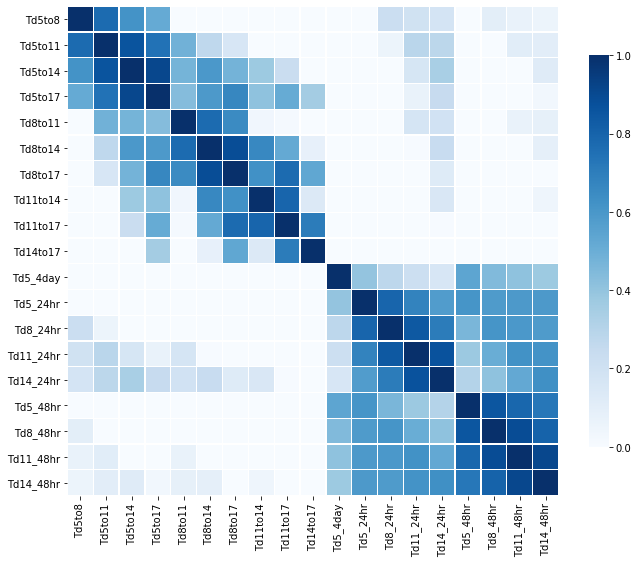

In [15]:
# nb most of the derived variables are strongly correlated to each other 
# and therefore we can't use them all in predictions
fig, ax = plt.subplots(figsize=(11, 9))
df_m = fg_aut[td_trends].corr()
# plot heatmap
sns.heatmap(df_m, cmap="Blues", vmin= 0.0, vmax=df_m.max().max(), #square=True,
           linewidth=0.3, cbar_kws={"shrink": .8})

/home/bou/py37/lib64/python3.7/site-packages/pandas/core/indexes/base.py:111: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


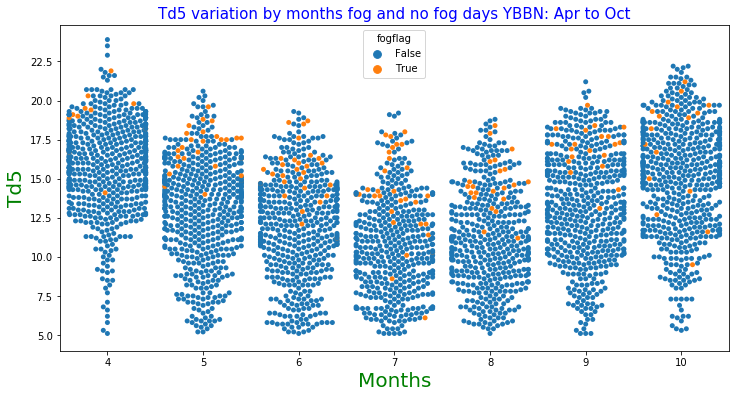

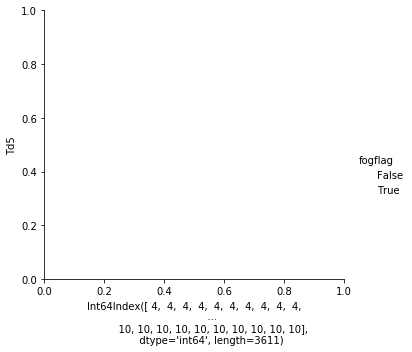

In [16]:
#https://drawingfromdata.com/pandas/seaborn/matplotlib/visualization/2020/11/01/setting-figure-size-matplotlib-seaborn.html
import seaborn as sns
sta = station ='YBBN'
fg_JJA= fg_aut.loc[fg_aut.index.month.isin([4,5,6,7,8,9,10])].dropna(subset=["Td5","fogflag"])
fg_JJA=fg_JJA.loc[fg_JJA['Td5']>5]
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.catplot(data=fg_JJA, kind="swarm", x=fg_JJA.index.month, y="Td5", 
             hue="fogflag",ax=ax)  # col="rain_flag"
title = f'Td5 variation by months fog and no fog days {station}: {fg_JJA.index[0].strftime("%b")} to {fg_JJA.index[-1].strftime("%b")}'
ax.set_title(title, color='b',fontsize=15)
ax.set_ylabel('Td5', color='g', fontsize=20)
ax.set_xlabel('Months', color='g', fontsize=20);
plt.savefig(f'./fg_plots/{sta}_3pmTd_spread_by_month.eps', format='eps', dpi=1000)
plt.show();

In [17]:
'''Look at distribution of Td and TmTd at each synoptic hour'''
# Lets look at our foggiest months first
fg_mnth = fg_aut.loc[fg_aut.index.month.isin([4,5,6,7,8,9,10])]
print(fg_mnth.loc[~fg_mnth['fogflag']]['Td5'].describe(),'\n\n',
      fg_mnth.loc[fg_mnth['fogflag']]['Td5'].describe(),'\n')
fg_mnth.loc[~fg_mnth['fogflag']]['TmTd5'].describe(),fg_mnth.loc[fg_mnth['fogflag']]['TmTd5'].describe()
# 75% of fog days have 3pm Td more than ~ 14.2 (mean 15.8+/-2.8 so 13-18.6) [5-16 fog free days]
# and 75% Td Sep < 7.5                         (mean 5.9 +/- 2.8, i.e 3-8)  [10.7+/-5.8 or 5-16 fog free days]

count    4065.000000
mean       11.226790
std         5.947759
min       -16.900000
25%         8.500000
50%        12.300000
75%        15.500000
max        23.900000
Name: Td5, dtype: float64 

 count    155.000000
mean      15.821935
std        2.751889
min        4.000000
25%       14.200000
50%       16.100000
75%       17.700000
max       21.900000
Name: Td5, dtype: float64 



(count    4065.000000
 mean       10.731759
 std         5.837367
 min         0.200000
 25%         7.100000
 50%         9.500000
 75%        12.800000
 max        42.900000
 Name: TmTd5, dtype: float64, count    155.000000
 mean       5.898065
 std        2.770753
 min        0.700000
 25%        4.300000
 50%        5.800000
 75%        7.450000
 max       15.900000
 Name: TmTd5, dtype: float64)

In [18]:
'''Look at distribution of Td and TmTd at each synoptic hour'''
# Here we look at all months - not just the foggy months
# to see if any sig difference in stats
'''  These are stats for foggiest months - Apr to Oct
# 75% of fog days have 3pm Td more than ~ 14.2 (mean 15.8+/-2.8 so 13-18.6) [5-16 fog free days]
# and 75% Td Sep < 7.5                         (mean 5.9 +/- 2.8, i.e 3-8)  [10.7+/-5.8 or 5-16 fog free days]

There is little difference so we stick to suing stats for the entire dataset and not look at just foggy months
'''
print(fg_aut.loc[~fg_aut['fogflag']]['Td5'].describe(),'\n\n',fg_aut.loc[fg_aut['fogflag']]['Td5'].describe())
fg_aut.loc[~fg_aut['fogflag']]['TmTd5'].describe(),fg_aut.loc[fg_aut['fogflag']]['TmTd5'].describe()
# upto 75% of fog days have 3pm Td more than ~ 14 (mean 16+/-3 so 13-19) [8-20 fog free days]
# and 75% Td Sep < 7.4                          (mean 5.8 +/- 2.8, i.e 3 to 8) [10+/-5 or 5-15 fog free days]

count    7093.000000
mean       14.323276
std         6.182898
min       -16.900000
25%        11.200000
50%        15.500000
75%        18.700000
max        26.300000
Name: Td5, dtype: float64 

 count    171.000000
mean      16.333918
std        3.120693
min        4.000000
25%       14.300000
50%       16.300000
75%       18.200000
max       23.800000
Name: Td5, dtype: float64


(count    7093.000000
 mean        9.611518
 std         5.154315
 min         0.200000
 25%         6.600000
 50%         8.800000
 75%        11.200000
 max        42.900000
 Name: TmTd5, dtype: float64, count    171.000000
 mean       5.811111
 std        2.826918
 min        0.100000
 25%        4.150000
 50%        5.800000
 75%        7.400000
 max       15.900000
 Name: TmTd5, dtype: float64)

In [19]:
print(fg_aut.loc[~fg_aut['fogflag']]['Td8'].describe(),'\n\n',
      fg_aut.loc[fg_aut['fogflag']]['Td8'].describe(),'\n')
fg_aut.loc[~fg_aut['fogflag']]['TmTd8'].describe(),fg_aut.loc[fg_aut['fogflag']]['TmTd8'].describe()
# upto 75% of fog days have 6pm Td more than ~ 15 (mean 16.6+/-2.4 ~ 14-19) [12+/-5 ~ 7-17 fog free days]
# and 75% 6pm Td sep < 3  (mean 2 +/- 1, i.e 1 to 3) [6+/-4 or 2-10 fog free days]

count    7106.000000
mean       15.146116
std         5.414797
min       -11.900000
25%        12.500000
50%        16.000000
75%        18.900000
max        27.100000
Name: Td8, dtype: float64 

 count    173.000000
mean      17.094798
std        2.769440
min        7.700000
25%       15.400000
50%       17.000000
75%       18.600000
max       25.000000
Name: Td8, dtype: float64 



(count    7106.000000
 mean        6.163313
 std         3.943530
 min         0.100000
 25%         3.800000
 50%         5.600000
 75%         7.500000
 max        38.200000
 Name: TmTd8, dtype: float64, count    173.000000
 mean       2.282081
 std        1.073503
 min        0.400000
 25%        1.400000
 50%        2.100000
 75%        2.900000
 max        6.000000
 Name: TmTd8, dtype: float64)

In [20]:
print(fg_aut.loc[~fg_aut['fogflag']]['Td11'].describe(),'\n\n',
      fg_aut.loc[fg_aut['fogflag']]['Td11'].describe(),'\n')
fg_aut.loc[~fg_aut['fogflag']]['TmTd11'].describe(),fg_aut.loc[fg_aut['fogflag']]['TmTd11'].describe()
# upto 75% of fog days have 9pm Td more than ~ 15 (mean 16.4+/-2.6 so 14-19) [12+/-5 7-19 fog free days]
# and 75% 9pm Td sep < 1.5 mean 1 +/- 1, i.e 0 to 2) [5+/-4 or 1-9 fog free days]

count    7122.000000
mean       15.191084
std         5.396503
min       -10.200000
25%        12.400000
50%        16.100000
75%        19.100000
max        27.100000
Name: Td11, dtype: float64 

 count    173.000000
mean      16.887283
std        3.019676
min        6.400000
25%       14.900000
50%       17.000000
75%       18.600000
max       25.200000
Name: Td11, dtype: float64 



(count    7122.000000
 mean        4.668478
 std         3.254267
 min         0.200000
 25%         2.600000
 50%         4.100000
 75%         5.900000
 max        32.600000
 Name: TmTd11, dtype: float64, count    173.000000
 mean       1.267630
 std        0.804705
 min        0.000000
 25%        0.800000
 50%        1.000000
 75%        1.600000
 max        4.900000
 Name: TmTd11, dtype: float64)

In [21]:
print(fg_aut.loc[~fg_aut['fogflag']]['Td14'].describe(),'\n\n',
      fg_aut.loc[fg_aut['fogflag']]['Td14'].describe(),'\n')
fg_aut.loc[~fg_aut['fogflag']]['TmTd14'].describe(),fg_aut.loc[fg_aut['fogflag']]['TmTd14'].describe()
# upto 75% of fog days have 12am Td more than ~ 14 (mean 15+/-3 so 12-18) [12+/-5 7-17 fog free days] 
# and 75% 12am Td sep < .9 (mean 0.7 +/- 0.5, i.e 0.2 to 1.2) [4+/-3 or 1-7 fog free days]

count    7113.000000
mean       14.777112
std         5.461207
min        -9.000000
25%        11.700000
50%        15.600000
75%        18.900000
max        27.100000
Name: Td14, dtype: float64 

 count    173.000000
mean      15.931792
std        3.294494
min        4.000000
25%       14.000000
50%       16.000000
75%       17.800000
max       24.900000
Name: Td14, dtype: float64 



(count    7113.000000
 mean        3.715521
 std         2.844346
 min         0.000000
 25%         1.800000
 50%         3.100000
 75%         4.800000
 max        28.200000
 Name: TmTd14, dtype: float64, count    173.000000
 mean       0.727168
 std        0.489793
 min        0.000000
 25%        0.400000
 50%        0.600000
 75%        0.900000
 max        3.400000
 Name: TmTd14, dtype: float64)

## Confusion matrix

see https://medium.com/@kbrook10/day-11-machine-learning-using-knn-k-nearest-neighbors-with-scikit-learn-350c3a1402e6

cmat = confusion_matrix(y_test, pred)

to access individual values cmat[actual_class_lable , predicted_class_lable ]

https://towardsdatascience.com/meet-the-hardest-functions-of-pandas-part-ii-f8029a2b0c9b

    
crosstab produces a dataframe that can be rounded given all numeric
```
print('TN - True Negative {}'.format(cmat[0,0]))  cmat[False,False]  # 0 False, 1 True
print('FP - False Positive {}'.format(cmat[0,1])) cmat[False,True]  Actually False/1 but Predicted 1/True so False +ve prediction 
print('FN - False Negative {}'.format(cmat[1,0])) cmat[True, False] Actually True/1 but Predicted 0/False so False -ve prediction 
print('TP - True Positive {}'.format(cmat[1,1]))  cmat[True, True]

print(f'TN - True Negative {tn}')
print(f'FP - False Positive {fp}')
print(f'FN - False Negative {fn}')
print(f'TP - True Positive  {tp}')


print(f'Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print(f'Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

print(f'Accuracy Rate: {(tn+tp)/(tn+tp+fp+fn)*100:.2f}%')
print(f'Misclassification Rate: {(fp+fn)/(tn+tp+fp+fn)*100:.2f}%')

Notice the huge class imbalance - fog free days constitue ~ 97.6% of the data, fog days ~ 2.4%
The strength of this new variable "TmTdOnly_trend_5to14" demonstrated by fact that it 
correctly identifies 95% of 97.6% fog free days
and gets about 1% of the 2.4% fog days
TmTdOnly_trend_5to14, TmTd_trends_5to14
```

In [22]:
# create new explanatory variables that can explain the variance in data between fog and no fog days
'''
The range of the parameters are mean +/- 1 std -> this explains about 68 to 70% of variance 

NOTE: WHile the IQR ranges is middle 50% of the distribution so from 25th to 75th percentile
mean+/-1std  is like the middle 68% of distribution - so captures more variance in data
and in deriving our new explanatory variable we will use the 1std thresholds.


upto 75% of fog days have 3pm Td more than ~ 14 (mean 16+/-3 so 13-19) [8-20 fog free days]
and 75% Td Sep < 8 (mean 6 +/- 3, i.e 3 to 9)         [10+/-5 or 5-15 fog free days]

upto 75% of fog days have 6pm Td more than ~ 15 (mean 17+/-2 so 15-19) [10-20 fog free days]
and 75% 6pm Td sep < 3  (mean 2 +/- 1, i.e 1 to 3)     [6+/-3 or 3-9 fog free days]

upto 75% of fog days have 9pm Td more than ~ 15 (mean 17+/-3 so 14-20) [10-20 fog free days]
and 75% 9pm Td sep < 2 (mean 1 +/- 1, i.e 0 to 2)     [5+/-3 or 2-8 fog free days]

upto 75% of fog days have 12am Td more than ~ 12 (mean 16+/-3 so 13-19) [10-20 fog free days] 
and 75% 12am Td sep < .9 (mean .7+/-.5, i.e .2 to 1.2) [4+/-3 or 1-7 fog free days]

using the 75 percentile thresholds above for Td and TmTd we can build this bool variable
'''

'''
td_bool_cols = ['TmTd_trend_5to8','TmTd_trend_5to11','TmTd_trend_5to14',\
               'TmTd_trend_8to11','TmTd_trend_8to14','TmTd_trend_11to14','TmTdOnly_trend_5to14']
'''

# store performace metrics for each of the predcitor variables 

smry1=[]


print(fg_aut['TmTd_trend_5to8'].value_counts())
print(fg_aut.loc[fg_aut['TmTd_trend_5to8'],'fogflag'].value_counts())

cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd_trend_5to8'],
            margins=True)
'''
           FORECAST
           --------------------
           False      True  ALL
OBS: False  tn         fp   total_actual_no_fg_days
   : True   fn         tp   total_actual_fg_days
     ALL    no_fg_fcst total_fcst_fg_days
'''

tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 

ACC = (tn+tp)/(tn+tp+fp+fn)*100
ERR = (fp+fn)/(tn+tp+fp+fn)*100 
smry1.append(['TmTd_trend_5to8',tp,tn,fp,fn])

print(f"\nTP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")

print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
Giving FPR or false alarm rate of {FAR:.0f}%')

print(f'\nPOD (recall or TPR): {POD:.0f}% of the {tp+fn} fog cases detected correctly' )
print(f'{tn /cross.loc[False,"All"]*100:.0f}% of the {fp+tn} no fog days identified correctly.' )

print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')

if (POD > 60) & (FAR < 40):
    print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")

cross

False    5834
True     1473
Name: TmTd_trend_5to8, dtype: int64
False    1348
True      125
Name: fogflag, dtype: int64

TP=125	FN=48	TN=5786	FP=1348

1473 days when fog forecast,
tp=125 days or about 8% of the days actually get fog [precision].
Giving FPR or false alarm rate of 19%

POD (recall or TPR): 72% of the 173 fog cases detected correctly
81% of the 7134 no fog days identified correctly.

Overall Accuracy Rate: 81% (includes correct no fog predictions as well!)
Misclassification Rate: 19%  (wrong fog and no fog predictions)

###########################
CONSIDER THIS CONDITION FOR FOG FORECASTING!


TmTd_trend_5to8  False  True   All
fogflag                           
False             5786  1348  7134
True                48   125   173
All               5834  1473  7307

In [23]:
'''
td_bool_cols = ['TmTd_trend_5to8','TmTd_trend_5to11','TmTd_trend_5to14',\
               'TmTd_trend_8to11','TmTd_trend_8to14','TmTd_trend_11to14','TmTdOnly_trend_5to14']
'''
print(fg_aut['TmTd_trend_5to11'].value_counts())
print(fg_aut.loc[fg_aut['TmTd_trend_5to11'],'fogflag'].value_counts())

cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd_trend_5to11'],
            margins=True)

tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 

ACC = (tn+tp)/(tn+tp+fp+fn)*100
ERR = (fp+fn)/(tn+tp+fp+fn)*100
smry1.append(['TmTd_trend_5to11',tp,tn,fp,fn])

print(f"\nTP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")

print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
Giving FPR or false alarm rate of {FAR:.0f}%')

print(f'\nPOD (recall or TPR): {POD:.0f}% of the {tp+fn} fog cases detected correctly' )
print(f'{tn /cross.loc[False,"All"]*100:.0f}% of the {fp+tn} no fog days identified correctly.' )

print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')

if (POD > 60) & (FAR < 40):
    print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
cross

False    6397
True      910
Name: TmTd_trend_5to11, dtype: int64
False    794
True     116
Name: fogflag, dtype: int64

TP=116	FN=57	TN=6340	FP=794

910 days when fog forecast,
tp=116 days or about 13% of the days actually get fog [precision].
Giving FPR or false alarm rate of 11%

POD (recall or TPR): 67% of the 173 fog cases detected correctly
89% of the 7134 no fog days identified correctly.

Overall Accuracy Rate: 88% (includes correct no fog predictions as well!)
Misclassification Rate: 12%  (wrong fog and no fog predictions)

###########################
CONSIDER THIS CONDITION FOR FOG FORECASTING!


TmTd_trend_5to11  False  True   All
fogflag                            
False              6340   794  7134
True                 57   116   173
All                6397   910  7307

In [24]:
# 75% thresholds 
fg_aut['TmTd_trend_5to14'] = \
    (fg_aut['Td5']>14.2)   & (fg_aut['Td8']>15.3)  & (fg_aut['Td11']>13.7) & (fg_aut['Td14']>13.7) & \
    (fg_aut['TmTd5']<7.5)  & (fg_aut['TmTd8']<2.8) & (fg_aut['TmTd11']<1.5) & (fg_aut['TmTd14']<1) & \
    (fg_aut['TmTd14']<fg_aut['TmTd11']) & \
    (fg_aut['TmTd11']<fg_aut['TmTd8']) & \
    (fg_aut['TmTd8']<fg_aut['TmTd5']) 

cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd_trend_5to14'],
            margins=True)
tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 

ACC = (tn+tp)/(tn+tp+fp+fn)*100
ERR = (fp+fn)/(tn+tp+fp+fn)*100


print(f"\nTP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")

print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
Giving FPR or false alarm rate of {FAR:.0f}%')

print(f'\nPOD (recall or TPR): {POD:.0f}% of the fog cases detected correctly' )
print(f'{tn /cross.loc[False,"All"]*100:.0f}% of no fog days identified correctly.' )

print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')

if (POD > 60) & (FAR < 40):
    print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
print(cross)
print("============================================")


# 75% thresholds round up or down to next number
fg_aut['TmTd_trend_5to14'] = \
    (fg_aut['Td5']>14)   & (fg_aut['Td8']>15)  & (fg_aut['Td11']>13) & (fg_aut['Td14']>13) & \
    (fg_aut['TmTd5']<8)  & (fg_aut['TmTd8']<3) & (fg_aut['TmTd11']<2) & (fg_aut['TmTd14']<1) & \
    (fg_aut['TmTd14']<fg_aut['TmTd11']) & \
    (fg_aut['TmTd11']<fg_aut['TmTd8']) & \
    (fg_aut['TmTd8']<fg_aut['TmTd5']) 

cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd_trend_5to14'],
            margins=True)
tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 

ACC = (tn+tp)/(tn+tp+fp+fn)*100
ERR = (fp+fn)/(tn+tp+fp+fn)*100

print(f"\nTP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")

print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
Giving FPR or false alarm rate of {FAR:.0f}%')

print(f'\nPOD (recall or TPR): {POD:.0f}% of the fog cases detected correctly' )
print(f'{tn /cross.loc[False,"All"]*100:.0f}% of no fog days identified correctly.' )

print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')

if (POD > 60) & (FAR < 40):
    print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
print(cross)
print("============================================")

# thresholds that give best results by reducing/incr thresholds by 1 degree
fg_aut['TmTd_trend_5to14'] = \
    (fg_aut['Td5']>13)   & (fg_aut['Td8']>14)  & (fg_aut['Td11']>12) & (fg_aut['Td14']>12) & \
    (fg_aut['TmTd5']<9)  & (fg_aut['TmTd8']<4) & (fg_aut['TmTd11']<3) & (fg_aut['TmTd14']<2) & \
    (fg_aut['TmTd14']<fg_aut['TmTd11']) & \
    (fg_aut['TmTd11']<fg_aut['TmTd8']) & \
    (fg_aut['TmTd8']<fg_aut['TmTd5']) 

cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd_trend_5to14'],
            margins=True)

tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 

ACC = (tn+tp)/(tn+tp+fp+fn)*100
ERR = (fp+fn)/(tn+tp+fp+fn)*100

print(f"\nTP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")

print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
Giving FPR or false alarm rate of {FAR:.0f}%')

print(f'\nPOD (recall or TPR): {POD:.0f}% of the fog cases detected correctly' )
print(f'{tn /cross.loc[False,"All"]*100:.0f}% of no fog days identified correctly.' )

print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')

if (POD > 60) & (FAR < 40):
    print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
print(cross)
print("============================================")


TP=40	FN=133	TN=7065	FP=69

109 days when fog forecast,
tp=40 days or about 37% of the days actually get fog [precision].
Giving FPR or false alarm rate of 1%

POD (recall or TPR): 23% of the fog cases detected correctly
99% of no fog days identified correctly.

Overall Accuracy Rate: 97% (includes correct no fog predictions as well!)
Misclassification Rate: 3%  (wrong fog and no fog predictions)
TmTd_trend_5to14  False  True   All
fogflag                            
False              7065    69  7134
True                133    40   173
All                7198   109  7307

TP=52	FN=121	TN=7025	FP=109

161 days when fog forecast,
tp=52 days or about 32% of the days actually get fog [precision].
Giving FPR or false alarm rate of 2%

POD (recall or TPR): 30% of the fog cases detected correctly
98% of no fog days identified correctly.

Overall Accuracy Rate: 97% (includes correct no fog predictions as well!)
Misclassification Rate: 3%  (wrong fog and no fog predictions)
TmTd_trend_5to14 

In [25]:
# this make lot of sense but bad scores
fg_aut['TmTd_trend_5to11'] = \
    (fg_aut['Td5'] < fg_aut['Td8'])  & (fg_aut['Td8']<fg_aut['Td11']) & \
    (fg_aut['TmTd11']<fg_aut['TmTd8']) & \
    (fg_aut['TmTd8']<fg_aut['TmTd5']) 


pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd_trend_5to11'],
            margins=True)

TmTd_trend_5to11  False  True   All
fogflag                            
False              4913  2221  7134
True                132    41   173
All                5045  2262  7307

In [26]:
'''
td_bool_cols = ['TmTd_trend_5to8','TmTd_trend_5to11','TmTd_trend_5to14',\
               'TmTd_trend_8to11','TmTd_trend_8to14','TmTd_trend_11to14','TmTdOnly_trend_5to14']
'''


print(fg_aut['TmTd_trend_5to14'].value_counts())
print(fg_aut.loc[fg_aut['TmTd_trend_5to14'],'fogflag'].value_counts())

cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd_trend_5to14'],
            margins=True)

tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 

ACC = (tn+tp)/(tn+tp+fp+fn)*100
ERR = (fp+fn)/(tn+tp+fp+fn)*100
smry1.append(['TmTd_trend_5to14',tp,tn,fp,fn])


print(f"\nTP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")

print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
Giving FPR or false alarm rate of {FAR:.0f}%')

print(f'\nPOD (recall or TPR): {POD:.0f}% of the {tp+fn} fog cases detected correctly' )
print(f'{tn /cross.loc[False,"All"]*100:.0f}% of the {fp+tn} no fog days identified correctly.' )

print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')

if (POD > 60) & (FAR < 40):
    print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
cross

False    6821
True      486
Name: TmTd_trend_5to14, dtype: int64
False    390
True      96
Name: fogflag, dtype: int64

TP=96	FN=77	TN=6744	FP=390

486 days when fog forecast,
tp=96 days or about 20% of the days actually get fog [precision].
Giving FPR or false alarm rate of 5%

POD (recall or TPR): 55% of the 173 fog cases detected correctly
95% of the 7134 no fog days identified correctly.

Overall Accuracy Rate: 94% (includes correct no fog predictions as well!)
Misclassification Rate: 6%  (wrong fog and no fog predictions)


TmTd_trend_5to14  False  True   All
fogflag                            
False              6744   390  7134
True                 77    96   173
All                6821   486  7307

In [27]:
'''
td_bool_cols = ['TmTd_trend_5to8','TmTd_trend_5to11','TmTd_trend_5to14',\
               'TmTd_trend_8to11','TmTd_trend_8to14','TmTd_trend_11to14','TmTdOnly_trend_5to14']
'''
print(fg_aut['TmTd_trend_8to11'].value_counts())
print(fg_aut.loc[fg_aut['TmTd_trend_8to11'],'fogflag'].value_counts())

cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd_trend_8to11'],
            margins=True)

tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 

ACC = (tn+tp)/(tn+tp+fp+fn)*100
ERR = (fp+fn)/(tn+tp+fp+fn)*100
smry1.append(['TmTd_trend_8to11',tp,tn,fp,fn])


print(f"\nTP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")

print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
Giving FPR or false alarm rate of {FAR:.0f}%')

print(f'\nPOD (recall or TPR): {POD:.0f}% of the {tp+fn} fog cases detected correctly' )
print(f'{tn /cross.loc[False,"All"]*100:.0f}% of the {fp+tn} no fog days identified correctly.' )

print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')

if (POD > 60) & (FAR < 40):
    print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
cross

False    6174
True     1133
Name: TmTd_trend_8to11, dtype: int64
False    998
True     135
Name: fogflag, dtype: int64

TP=135	FN=38	TN=6136	FP=998

1133 days when fog forecast,
tp=135 days or about 12% of the days actually get fog [precision].
Giving FPR or false alarm rate of 14%

POD (recall or TPR): 78% of the 173 fog cases detected correctly
86% of the 7134 no fog days identified correctly.

Overall Accuracy Rate: 86% (includes correct no fog predictions as well!)
Misclassification Rate: 14%  (wrong fog and no fog predictions)

###########################
CONSIDER THIS CONDITION FOR FOG FORECASTING!


TmTd_trend_8to11  False  True   All
fogflag                            
False              6136   998  7134
True                 38   135   173
All                6174  1133  7307

In [28]:
'''
td_bool_cols = ['TmTd_trend_5to8','TmTd_trend_5to11','TmTd_trend_5to14',\
               'TmTd_trend_8to11','TmTd_trend_8to14','TmTd_trend_11to14','TmTdOnly_trend_5to14']
'''
print(fg_aut['TmTd_trend_8to14'].value_counts())
print(fg_aut.loc[fg_aut['TmTd_trend_8to14'],'fogflag'].value_counts())

cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd_trend_8to14'],
            margins=True)

tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 

ACC = (tn+tp)/(tn+tp+fp+fn)*100
ERR = (fp+fn)/(tn+tp+fp+fn)*100
smry1.append(['TmTd_trend_8to14',tp,tn,fp,fn])

print(f"\nTP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")

print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
Giving FPR or false alarm rate of {FAR:.0f}%')

print(f'\nPOD (recall or TPR): {POD:.0f}% of the {tp+fn} fog cases detected correctly' )
print(f'{tn /cross.loc[False,"All"]*100:.0f}% of the {fp+tn} no fog days identified correctly.' )

print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')

if (POD > 60) & (FAR < 40):
    print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
cross

False    6707
True      600
Name: TmTd_trend_8to14, dtype: int64
False    495
True     105
Name: fogflag, dtype: int64

TP=105	FN=68	TN=6639	FP=495

600 days when fog forecast,
tp=105 days or about 18% of the days actually get fog [precision].
Giving FPR or false alarm rate of 7%

POD (recall or TPR): 61% of the 173 fog cases detected correctly
93% of the 7134 no fog days identified correctly.

Overall Accuracy Rate: 92% (includes correct no fog predictions as well!)
Misclassification Rate: 8%  (wrong fog and no fog predictions)

###########################
CONSIDER THIS CONDITION FOR FOG FORECASTING!


TmTd_trend_8to14  False  True   All
fogflag                            
False              6639   495  7134
True                 68   105   173
All                6707   600  7307

In [29]:
'''
td_bool_cols = ['TmTd_trend_5to8','TmTd_trend_5to11','TmTd_trend_5to14',\
               'TmTd_trend_8to11','TmTd_trend_8to14','TmTd_trend_11to14','TmTdOnly_trend_5to14']
'''
print(fg_aut['TmTd_trend_11to14'].value_counts())
print(fg_aut.loc[fg_aut['TmTd_trend_11to14'],'fogflag'].value_counts())

cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd_trend_11to14'],
            margins=True)

tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 

ACC = (tn+tp)/(tn+tp+fp+fn)*100
ERR = (fp+fn)/(tn+tp+fp+fn)*100
smry1.append(['TmTd_trend_11to14',tp,tn,fp,fn])


print(f"\nTP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")

print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
Giving FPR or false alarm rate of {FAR:.0f}%')

print(f'\nPOD (recall or TPR): {POD:.0f}% of the {tp+fn} fog cases detected correctly' )
print(f'{tn /cross.loc[False,"All"]*100:.0f}% of the {fp+tn} no fog days identified correctly.' )

print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')

if (POD > 60) & (FAR < 40):
    print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
cross

False    6228
True     1079
Name: TmTd_trend_11to14, dtype: int64
False    957
True     122
Name: fogflag, dtype: int64

TP=122	FN=51	TN=6177	FP=957

1079 days when fog forecast,
tp=122 days or about 11% of the days actually get fog [precision].
Giving FPR or false alarm rate of 13%

POD (recall or TPR): 71% of the 173 fog cases detected correctly
87% of the 7134 no fog days identified correctly.

Overall Accuracy Rate: 86% (includes correct no fog predictions as well!)
Misclassification Rate: 14%  (wrong fog and no fog predictions)

###########################
CONSIDER THIS CONDITION FOR FOG FORECASTING!


TmTd_trend_11to14  False  True   All
fogflag                             
False               6177   957  7134
True                  51   122   173
All                 6228  1079  7307

In [30]:
# only consider TD seperation - reduces confounding bias as Td and Td seperation are related
fg_aut['TmTdOnly_trend_5to14'] = \
    (fg_aut['TmTd5']<9)  & (fg_aut['TmTd8']<3) & (fg_aut['TmTd11']<2) & (fg_aut['TmTd14']<1) & \
    (fg_aut['TmTd14']<fg_aut['TmTd11']) & \
    (fg_aut['TmTd11']<fg_aut['TmTd8']) & \
    (fg_aut['TmTd8']<fg_aut['TmTd5']) 

print(fg_aut['TmTdOnly_trend_5to14'].value_counts())

print(fg_aut.loc[fg_aut['TmTdOnly_trend_5to14'],'fogflag'].value_counts())

cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTdOnly_trend_5to14'],
            margins=True)


tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 

ACC = (tn+tp)/(tn+tp+fp+fn)*100
ERR = (fp+fn)/(tn+tp+fp+fn)*100

smry1.append(['TmTdOnly_trend_5to14',tp,tn,fp,fn])



print(f"\nTP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")

print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
Giving FPR or false alarm rate of {FAR:.0f}%')

print(f'\nPOD (recall or TPR): {POD:.0f}% of the {tp+fn} fog cases detected correctly' )
print(f'{tn /cross.loc[False,"All"]*100:.0f}% of the {fp+tn} no fog days identified correctly.' )

print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')

if (POD > 60) & (FAR < 40):
    print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
cross


# captures about 77 out of 167 Brisbane fog days <->  45% , FAR 168 negligible given the MASSIVE class imbalance

False    7062
True      245
Name: TmTdOnly_trend_5to14, dtype: int64
False    168
True      77
Name: fogflag, dtype: int64

TP=77	FN=96	TN=6966	FP=168

245 days when fog forecast,
tp=77 days or about 31% of the days actually get fog [precision].
Giving FPR or false alarm rate of 2%

POD (recall or TPR): 45% of the 173 fog cases detected correctly
98% of the 7134 no fog days identified correctly.

Overall Accuracy Rate: 96% (includes correct no fog predictions as well!)
Misclassification Rate: 4%  (wrong fog and no fog predictions)


TmTdOnly_trend_5to14  False  True   All
fogflag                                
False                  6966   168  7134
True                     96    77   173
All                    7062   245  7307

In [31]:
# only looking at Td values here - reduces confounding bias as Td and Td seperation related
fg_aut['Td_only_trend_5to14'] = \
    (fg_aut['Td5']>13)   & (fg_aut['Td8']>14)   & (fg_aut['Td11']>12) & (fg_aut['Td14']>12)
                            
print(fg_aut['Td_only_trend_5to14'].value_counts())

# of about 176 days that have the right trend , 62 lead to fog with 114 false leads
print(fg_aut.loc[fg_aut['Td_only_trend_5to14'],'fogflag'].value_counts())

cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['Td_only_trend_5to14'],
            margins=True)


tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 

ACC = (tn+tp)/(tn+tp+fp+fn)*100
ERR = (fp+fn)/(tn+tp+fp+fn)*100
smry1.append(['Td_only_trend_5to14',tp,tn,fp,fn])


print(f"\nTP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")

print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
Giving FPR or false alarm rate of {FAR:.0f}%')

print(f'\nPOD (recall or TPR): {POD:.0f}% of the {tp+fn} fog cases detected correctly' )
print(f'{tn /cross.loc[False,"All"]*100:.0f}% of the {fp+tn} no fog days identified correctly.' )

print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')

if (POD > 60) & (FAR < 40):
    print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
cross


# captures about 126 out of 167 Brisbane fog days!! almost 75% but FAR of 3822 days is FAR OUT!
# Td_only_trend_5to11 has similar outcomes

True     4419
False    2888
Name: Td_only_trend_5to14, dtype: int64
False    4274
True      145
Name: fogflag, dtype: int64

TP=145	FN=28	TN=2860	FP=4274

4419 days when fog forecast,
tp=145 days or about 3% of the days actually get fog [precision].
Giving FPR or false alarm rate of 60%

POD (recall or TPR): 84% of the 173 fog cases detected correctly
40% of the 7134 no fog days identified correctly.

Overall Accuracy Rate: 41% (includes correct no fog predictions as well!)
Misclassification Rate: 59%  (wrong fog and no fog predictions)


Td_only_trend_5to14  False  True   All
fogflag                               
False                 2860  4274  7134
True                    28   145   173
All                   2888  4419  7307

In [32]:
cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTdOnly_trend_5to14'],
            margins=True)

print(f'We correctly identified {cross.loc[True,True]  /cross.loc[True,"All"]* 100:.0f}% of the fog cases' )
print(f'We correctly identified {cross.loc[False,False]/cross.loc[False,"All"]*100:.0f}% fog free days' )

tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

print(f'Accuracy Rate: {(tn+tp)/(tn+tp+fp+fn)*100:.0f}%')
print(f'Misclassification Rate: {(fp+fn)/(tn+tp+fp+fn)*100:.0f}%')

cross

We correctly identified 45% of the fog cases
We correctly identified 98% fog free days
Accuracy Rate: 96%
Misclassification Rate: 4%


TmTdOnly_trend_5to14  False  True   All
fogflag                                
False                  6966   168  7134
True                     96    77   173
All                    7062   245  7307

In [33]:
# normalize values 
cross=round(
      pd.crosstab(index=fg_aut['fogflag'],
                  columns=fg_aut['TmTdOnly_trend_5to14'],
                  margins=True,
                 normalize=True) , 3)

#to append % sign 1st convert to str and concatenate % sign
cross.astype(str)+'%'

TmTdOnly_trend_5to14   False    True     All
fogflag                                     
False                 0.953%  0.023%  0.976%
True                  0.013%  0.011%  0.024%
All                   0.966%  0.034%    1.0%

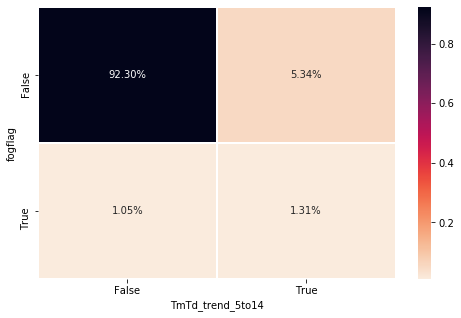

In [34]:
# to view cross tables as heat map
def plot_heatmap(cross_table, fmt='g'):
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.heatmap(cross_table,
                annot=True,
                fmt=fmt,
                cmap='rocket_r',
                linewidths=.5,
                ax=ax)
    plt.show();
    
cross=pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd_trend_5to14'],
            normalize=True)

plot_heatmap(cross, fmt='.2%')

In [35]:
# Td 3pm last 48hr and last 4 days
'''
fg_aut['Td5_24hr']=fg_aut['Td5'].diff(periods=1) # 24hr trend Td 3pm
fg_aut['Td5_48hr']=fg_aut['Td5'].diff(periods=2) # 48hr trend Td 3pm
fg_aut['TmTd5_24hr']=fg_aut['TmTd5'].diff(periods=1) # 24hr trend Td Sep 3pm
fg_aut['TmTd5_48hr']=fg_aut['TmTd5'].diff(periods=2) # 48hr trend Td Sep 3pm
'''
print(pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['Td5_48hr']>0,
            margins=True))

print(pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['Td5_4day']>0,
            margins=True))

print(pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd5_48hr']>0,
            margins=True))


Td5_48hr  False  True   All
fogflag                    
False      3419  3715  7134
True         39   134   173
All        3458  3849  7307
Td5_4day  False  True   All
fogflag                    
False      3577  3557  7134
True         25   148   173
All        3602  3705  7307
TmTd5_48hr  False  True   All
fogflag                      
False        3742  3392  7134
True          126    47   173
All          3868  3439  7307


In [36]:
# Bryans Rule of thumb Td 3pm 16C

'''
 'index':['TmTd_trend_5to8','TmTd_trend_5to11','TmTd_trend_5to14','TmTd_trend_8to11','TmTd_trend_8to14',\
           'TmTd_trend_11to14','TmTdOnly_trend_5to14','Td_only_trend_5to14',\
           'Td5_48hr', 'Td5_4day','TmTd5_48hr','Bryans_Td5gt16'],\
'tn':[6396,6773,7020,6712,6999,6827,6966,3312,3419,3577,3742,3883],
        'tp':[97  ,  84,  62,  94,  69,  84,  77, 126, 134,148,47, 94],
        'fp':[738 , 361, 114, 422, 135, 307, 168,3822, 3715,3557,3392,3251],
        'fn':[76  ,  89, 111,  79, 104,  89,  96,  47,  39,  25,  126, 79]


>75% 0f cases sfc wind direction 3pm < 80 and 6pm <100 for fog days
> 75% of cases sfc wind speeds <= 5 at 12am and 3am fog days
RH > 75% cases 3pm >60, 6pm > 80, 9pm > 90%

TmTd 6pm < 3 in 85% of fog cases

'''

pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['Td5']>16,
            margins=True)

Td5      False  True   All
fogflag                   
False     3883  3251  7134
True        79    94   173
All       3962  3345  7307


## Precision tp/(tp+fp)
Measures how well your classifiers positive class predictions (fog predictions) worked out, i.e out of all the days we predicted fog will occur, how many actually turned out to be true.

*number of correct positive predictions divided by total number of positive predictions.*


## Recall  tp/(tp+fn)  [similar to POD]

Measures how well your classifier predicted +ve fog days , i.e out of all the days we observed fog in our training data, how many were correctly predicted by our classifier - So what proportion of positive cases were detected by our model (POD).

*number of correct positive predictions divided by total number of actual positive cases.*

This shifts our focus from how much a positive score actually matters, to an understanding of **how effective our model is at identifying any positive cases that are present** (because a false negative is actually a positive). As the number of false negatives grow, there is no increase to the numerator of true positives, and the recall gets lower and lower. 



## F1-Score    precision * recall / ( precision + recall)
The F1-Score is the perfect way in which we can get a better sense of model performance when we have imbalanced data since accuracy alone isn’t a good metric. F1-Score is a harmonic average (max value is the arithmetic mean) of the precision and recall score.

An ROC curve plots the true positive rate (recall or POD) on the y-axis versus the false positive rate (FAR) on the x-axis. 

The true positive rate (TPR) is the probability of detecting (POD) positive cases or recall  and 
the false positive rate (FPR) or false alarm rate is the probability of a false alarm = fp / (fp+tn)

POD = recall = no of correct detect (TP) divide by total no +ve cases (tp+fn)
FAR = FPR    = no of false alarms (FP) divide by total no of negative cases (fp+tn)

Both of these can be calculated from the confusion matrix:

Quantify a model’s ROC curve by calculating the total Area Under the Curve (AUC),a metric which falls between 0 and 1 with a higher number indicating better classification performance.


In [37]:
# summary of various Td and TmTd variables

'''
see also https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall
https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/

this is the results when we used all the months (thresholds slightlyl diff) 
'''
smry=pd.DataFrame(
    data={
     'index':['TmTd_trend_5to8','TmTd_trend_5to11','TmTd_trend_5to14','TmTd_trend_8to11','TmTd_trend_8to14',\
           'TmTd_trend_11to14','TmTdOnly_trend_5to14','Td_only_trend_5to14',\
           'Td5_48hr', 'Bryans_Td5gt16'],\
        'tn':[6396,6773,7020,6712,6999,6827,6966,3312,3419,3883],
        'tp':[97  ,  84,  62,  94,  69,  84,  77, 126, 134, 94],
        'fp':[738 , 361, 114, 422, 135, 307, 168,3822, 3715,3251],
        'fn':[76  ,  89, 111,  79, 104,  89,  96,  47,  39,  79]}).set_index('index')

smry2=pd.DataFrame(smry1).set_index(0).iloc[:,:4]
smry2.columns=['TP','TN','FP','FN'] #,'POD','PREC','FAR','ACC','ERR']
smry2.index.name='predictor'

# What proportion of actual fog days (actual positives) was identified correctly?
# recall OR HIT RATE prob of detection 
# we want to maximise this
smry2['POD_TPR'] = round(smry2['TP']/ (smry2['TP'] + smry2['FN'] ),2)

# a false positive ratio (also known as fall-out or false alarm ratio)
# fraction of no fog days that we got wrong (we predicted fog but did not happen)
# we want to minimize this
smry2['FAR_FPR'] = round(smry2['FP']/(smry2['FP']+smry2['TN']),2)  
                               
# What proportion of +ve fog predictions (positive identifications) was actually correct?
# fog predictions that were verified true out of all fog predictions
# we want this to be high - at least 15 to 20% would be good
smry2['PREC'] = round(smry2['TP']/ (smry2['TP'] + smry2['FP'] ),2)  

# fraction of predictions that were correct (both for fog and non fog days)
# we want this to be high - at least 80% better if >90%
smry2['ACC'] = round((smry2['TP'] + smry2['TN'])/smry2.sum(axis=1),2)

# we want this to be low - below 20%, better if <10%
smry2['ERR'] = round((smry2['FP'] + smry2['FN'])/smry2.sum(axis=1),2)

#If we want to create a balanced classification model with the 
#optimal balance of recall and precision, then we try to maximize the F1 score.
# NB : We don't really want a balaced calssification - we want to maximise recall
smry2['F1'] = round( (smry2['PREC'] * smry2['POD_TPR']) / (smry2['PREC']+smry2['POD_TPR']),2)

'''
If we considrered data Apr to Oct only
TmTd_trend_5to8		    91	3661	423	66
TmTd_trend_5to11	    78	3859	225	79
TmTd_trend_5to14	    89	3835	249	68
TmTd_trend_8to11	    86	3828	256	71
TmTd_trend_8to14	    64	3995	89	93
TmTd_trend_11to14	    76	3887	197	81
TmTdOnly_trend_5to14    73	3955	129	84
Td_only_trend_5to14	  129	2570	1514 28
'''
smry2

TP    TN    FP  FN  POD_TPR  FAR_FPR  PREC   ACC   ERR  \
predictor                                                                       
TmTd_trend_5to8       125  5786  1348  48     0.72     0.19  0.08  0.81  0.19   
TmTd_trend_5to11      116  6340   794  57     0.67     0.11  0.13  0.88  0.12   
TmTd_trend_5to14       96  6744   390  77     0.55     0.05  0.20  0.94  0.06   
TmTd_trend_8to11      135  6136   998  38     0.78     0.14  0.12  0.86  0.14   
TmTd_trend_8to14      105  6639   495  68     0.61     0.07  0.18  0.92  0.08   
TmTd_trend_11to14     122  6177   957  51     0.71     0.13  0.11  0.86  0.14   
TmTdOnly_trend_5to14   77  6966   168  96     0.45     0.02  0.31  0.96  0.04   
Td_only_trend_5to14   145  2860  4274  28     0.84     0.60  0.03  0.41  0.59   

                        F1  
predictor                   
TmTd_trend_5to8       0.07  
TmTd_trend_5to11      0.11  
TmTd_trend_5to14      0.15  
TmTd_trend_8to11      0.10  
TmTd_trend_8to14      0.14  
TmTd_trend_11to14     0.10  
TmTdOnly_trend_5to14  0.18  
Td_only_trend_5to14   0.03

In [38]:
# use the fog flag variable to figure days with fog in dataset
fg_days = fg_aut.loc[fg_aut['fogflag']]; 
print(fg_days.shape)
fg_free_days = fg_aut.loc[~fg_aut['fogflag']]
print(fg_free_days.shape)

(173, 103)
(7134, 103)


In [39]:
# grab fog dates with vis<=1 and lasting more than 2 hour
fg_mnth = fg_aut.loc[fg_aut.index.month.isin([4,5,6,7,8,9,10])]
#fg_days = fg_mnth.loc[fg_mnth['fogflag']]; 
print(f"WInter fog days {fg_days.shape}")
mask_bad_fog = (fg_days['min_vis']<=1) & (fg_days['fg_duration']>=1)

bad_fg_days = fg_days.loc[mask_bad_fog]  #real bad fog days
bad_fg_days.loc[:,['min_vis','fg_duration']].describe()

WInter fog days (173, 103)


min_vis  fg_duration
count  123.000000   123.000000
mean     0.223659     3.997642
std      0.205104     2.404973
min      0.000000     1.000000
25%      0.100000     2.005000
50%      0.150000     3.330000
75%      0.325000     5.715000
max      1.000000    11.000000

In [40]:
# ```pandas.Index.difference
# Index.difference(self, other, sort=None)
# Return a new Index with elements from the index that are not in other.
# This is the set difference of two Index objects```

'''
173 fog days in data - 167 after dropping nulls. Of these
119 dates/days have the real bad fog days, vis<2km and duration >1hrs
remainder 6915 days/dates no fog days -but may contain fog days vis>2km and duration<1hr) 
'''
print(f'The remaining days/dates outside the {bad_fg_days.shape[0]} real fog dates={(fg_aut.index).difference(bad_fg_days.index).shape}')

not_in_bad_fg_days =     fg_aut.loc[(fg_aut.index).difference(bad_fg_days.index)]
print(not_in_bad_fg_days.shape)  # this gives correct shape

'''some days in remainder (about 173-125=48 will have fogflag set to True
which will cause some issues down the line if we won't set it to False!'''
not_in_bad_fg_days['fogflag'].value_counts()

The remaining days/dates outside the 123 real fog dates=(7183,)
(7184, 103)


False    7134
True       50
Name: fogflag, dtype: int64

In [41]:
'''hash table or dict mapping between months of the year 
(numeric 1 to 12 to text labels Jan Feb etc )
for x-axis tick mark labelling'''

dict_mon = dict(zip(
    [1,2,3,4,5,6,7,8,9,10,11,12],
    ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]))

print(fg_days.groupby(fg_days.index.month).size())

fogs_per_month = \
    pd.DataFrame(
              list(
                 zip(np.arange(2,13,1),fg_days.groupby(fg_days.index.month).size())
                  )
                )  
fogs_per_month.columns = ['month','Fog days per month']

fogs_per_month['month'] = pd.to_datetime(fogs_per_month['month'],format='%m')
fogs_per_month=fogs_per_month.set_index('month',drop=True)
fogs_per_month.index = fogs_per_month.index.strftime('%b')
fogs_per_month

2      2
3      6
4     11
5     26
6     30
7     30
8     23
9     20
10    17
11     5
12     3
dtype: int64


Fog days per month
Feb                   2
Mar                   6
Apr                  11
May                  26
Jun                  30
Jul                  30
Aug                  23
Sep                  20
Oct                  17
Nov                   5
Dec                   3

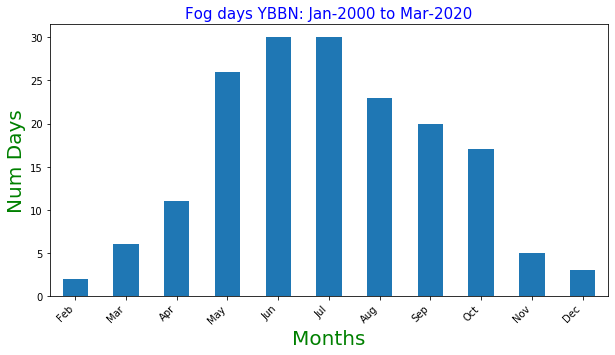

In [42]:
sta='YBBN'
xlabels=[]
fg_days_by_month = fg_days.groupby(fg_days.index.month).size()
fig, ax = plt.subplots(figsize=(10,5), nrows=1, ncols=1 )
fg_days_by_month.plot( kind='bar', ax=ax)
#fg_days_by_month.plot( kind='line',color='r', ax=ax)

title = f'Fog days {station}: {fg_aut.index[0].strftime("%b-%Y")} to {fg_aut.index[-1].strftime("%b-%Y")}'
ax.set_title(title, color='b',fontsize=15)
ax.set_ylabel('Num Days', color='g', fontsize=20)
ax.set_xlabel('Months', color='g', fontsize=20)
# g.get_xticks() [ 0  1  2  3  4  5  6  7  8  9 10]

if fg_days.groupby(fg_days.index.month).size().index[0] == 1:
    xlabels=[dict_mon[x+1] for x in ax.get_xticks()]
elif fg_days.groupby(fg_days.index.month).size().index[0] == 2:
    xlabels=[dict_mon[x+2] for x in ax.get_xticks()]
    
# xlabels=list( map( lambda x : dict_mon[x], ax.get_xticks()+2) )  # both give same result

# xlabels = ['{:,.2f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels,rotation=45, horizontalalignment='right')
#g.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.tick_params(labelsize=10)
plt.savefig(f'./fg_plots/{sta}_Monthly_Fog_Days', format='eps', dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[ 0  1  2  3  4  5  6  7  8  9 10]


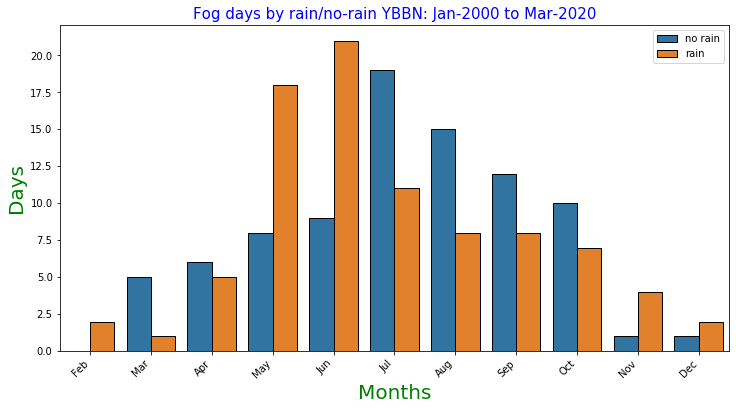

In [43]:
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.countplot(x=fg_days.index.month,
              hue='rain_flag',
              data=fg_days,
              ax=ax, edgecolor='k');
title = f'Fog days by rain/no-rain {station}: {fg_aut.index[0].strftime("%b-%Y")} to {fg_aut.index[-1].strftime("%b-%Y")}'
ax.set_title(title, color='b',fontsize=15)
ax.set_ylabel('Days', color='g', fontsize=20)
ax.set_xlabel('Months', color='g', fontsize=20)
print(ax.get_xticks()) #[ 0  1  2  3  4  5  6  7  8  9 10]

if fg_days.groupby(fg_days.index.month).size().index[0] == 1:
    xlabels=[dict_mon[x+1] for x in ax.get_xticks()]
elif fg_days.groupby(fg_days.index.month).size().index[0] == 2:
    xlabels=[dict_mon[x+2] for x in ax.get_xticks()]
    
ax.set_xticklabels(xlabels, rotation=45, 
                  horizontalalignment='right',fontsize=20)
ax.tick_params(labelsize=10)
my_labels = ['no rain', 'rain']
plt.legend(labels = my_labels)
plt.savefig(f'./fg_plots/{sta}_Monthly_Fog_Days_by_rain_norain', format='eps', dpi=1000)

In [44]:
# find fog days per year - annual count fog days
years = fg_days.groupby(fg_days.index.year).size().index
fg_days_per_year=list(fg_days.groupby(fg_days.index.year).size().values)
fogs_per_year= pd.DataFrame(list(zip(years,fg_days_per_year)))
fogs_per_year.columns = ['Year','Fog days per year']
fogs_per_year['Year'] = pd.to_datetime(fogs_per_year['Year'],format='%Y')
fogs_per_year=fogs_per_year.set_index('Year',drop=True)
fogs_per_year.index = fogs_per_year.index.strftime('%Y')
fogs_per_year.sort_index(ascending=False).head(10)  # only showinf last 10 years here

Fog days per year
2019                  7
2018                  8
2017                 14
2016                  8
2015                  8
2014                  7
2013                  7
2012                  8
2011                  5
2010                  7

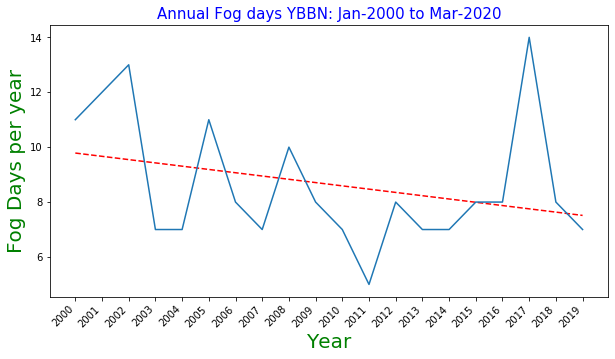

In [45]:
# get a trend line using Numpy polyfit method is used to fit the trend line
x = np.array(fogs_per_year.index.astype(int)) #x,y need to be 1-d arrays
y = np.array(fogs_per_year.values.flatten())
z = np.polyfit(x,y,1)
p = np.poly1d(z)
fig, ax = plt.subplots(figsize=(10,5), nrows=1, ncols=1 )
ax.plot(x,p(x),"r--")
ax.plot(x, y)

title = f'Annual Fog days {station}: {fg_aut.index[0].strftime("%b-%Y")} to {fg_aut.index[-1].strftime("%b-%Y")}'
ax.set_title(title, color='b',fontsize=15)
ax.set_ylabel('Fog Days per year', color='g', fontsize=20)
ax.set_xlabel('Year', color='g', fontsize=20)

xlabels = fogs_per_year.index
plt.xticks(x, labels=xlabels)
ax.set_xticklabels(xlabels,rotation=45, horizontalalignment='right');

# slight decreasing trend but average about 8 fog days per year
plt.savefig(f'./fg_plots/{sta}_Annual_Fog_Days_Trend', format='eps', dpi=1000)

In [46]:
x,y

(array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]),
 array([11, 12, 13,  7,  7, 11,  8,  7, 10,  8,  7,  5,  8,  7,  7,  8,  8,
        14,  8,  7]))

In [47]:
fg_aut.loc[fg_aut['fogflag']].head()

avID  man  aut  rain24hr  fogflag  min_vis  fg_onset  fg_finish  \
2000-05-24  YBBN      6    4      19.0     True     0.10     18.15      22.45   
2000-05-26  YBBN      0    1       2.2     True     0.45     16.15      16.45   
2000-06-20  YBBN      0    1       0.2     True     0.80     15.45      16.15   
2000-06-27  YBBN      4    6       0.2     True     0.30     12.45      23.15   
2000-07-24  YBBN      3    0       NaN     True     0.15     16.15      18.07   

            fg_duration    wind5  ...  wspd8  wdir11  wspd11  wdir14  wspd14  \
2000-05-24         4.30   160/06  ...    5.0    60.0     7.0    30.0     8.0   
2000-05-26         0.30   060/07  ...    9.0   360.0     6.0   310.0     4.0   
2000-06-20         0.30   030/04  ...    0.0   350.0     4.0   320.0     4.0   
2000-06-27        10.30   120/06  ...    3.0   270.0     4.0   220.0     4.0   
2000-07-24         1.52   040/12  ...   10.0   360.0     5.0   320.0     3.0   

           wdir17  wspd17  wdir20  wspd20  Td_only_trend_5to14  
2000-05-24  230.0     5.0   230.0     5.0                 True  
2000-05-26  310.0     3.0   320.0     4.0                 True  
2000-06-20    0.0     0.0   230.0     4.0                 True  
2000-06-27  220.0     4.0   260.0     4.0                False  
2000-07-24  230.0     3.0   250.0     3.0                False  

[5 rows x 103 columns]

In [48]:
# we create a copy of the dataframe, add columns for month and year
# We need to aggregate those values by month
# then we group the new columns and get the count/size 
fg_days = fg_aut.loc[fg_aut['fogflag']]
df_m = fg_days.copy()

print(df_m.index.month.unique().values)
print(df_m.index.year.unique().values)

df_m['month'] = df_m.index.month 
df_m['year'] = df_m.index.year 

# this would do the same 
df_m['month'] = [i.month for i in df_m.index]
df_m['year'] = [i.year for i in df_m.index]

# group by month and year, get the average
df_m = df_m.groupby(['month', 'year']).size()
print(df_m.index)
df_m.head()

[ 5  6  7  8  9 10  4 11 12  3  2]
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019]
MultiIndex([( 2, 2008),
            ( 2, 2018),
            ( 3, 2002),
            ( 3, 2004),
            ( 3, 2006),
            ( 3, 2007),
            ( 3, 2019),
            ( 4, 2001),
            ( 4, 2002),
            ( 4, 2003),
            ...
            (10, 2015),
            (10, 2017),
            (10, 2019),
            (11, 2001),
            (11, 2003),
            (11, 2006),
            (11, 2016),
            (12, 2001),
            (12, 2004),
            (12, 2005)],
           names=['month', 'year'], length=106)


month  year
2      2008    1
       2018    1
3      2002    1
       2004    2
       2006    1
dtype: int64

In [49]:
# unstack the indexes
'''
Pivot a level of the (necessarily hierarchical) index labels, 
returning a DataFrame having a new level of column labels whose inner-most level 
consists of the pivoted index labels
'''
# we can unstack one level of the multiindex and move it into the columns
# unstacking year moves year into columns - but we want months into colums
df_m.unstack(level='year').head(2)  # same as df_m.unstack(level=1)

year   2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  \
month                                                                           
2       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   
3       NaN   NaN   1.0   NaN   2.0   NaN   1.0   1.0   NaN   NaN   NaN   NaN   

year   2012  2013  2014  2015  2016  2017  2018  2019  
month                                                  
2       NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN  
3       NaN   NaN   NaN   NaN   NaN   NaN   NaN   1.0

In [50]:
print(dict_mon)
# unstack the months
df_m=df_m.unstack(level='month')\
    .fillna(0)\
    .rename(columns=lambda x: dict_mon[x])\
    .sort_index(ascending=False)
df_m

{1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}


month  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                        
2019   0.0  1.0  0.0  0.0  1.0  1.0  2.0  0.0  2.0  0.0  0.0
2018   1.0  0.0  0.0  1.0  2.0  2.0  1.0  1.0  0.0  0.0  0.0
2017   0.0  0.0  1.0  5.0  0.0  3.0  4.0  0.0  1.0  0.0  0.0
2016   0.0  0.0  0.0  2.0  0.0  3.0  0.0  1.0  0.0  2.0  0.0
2015   0.0  0.0  0.0  3.0  2.0  1.0  0.0  1.0  1.0  0.0  0.0
2014   0.0  0.0  0.0  1.0  2.0  2.0  0.0  2.0  0.0  0.0  0.0
2013   0.0  0.0  0.0  0.0  3.0  1.0  1.0  2.0  0.0  0.0  0.0
2012   0.0  0.0  2.0  0.0  1.0  1.0  1.0  2.0  1.0  0.0  0.0
2011   0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0
2010   0.0  0.0  2.0  2.0  0.0  2.0  0.0  1.0  0.0  0.0  0.0
2009   0.0  0.0  0.0  0.0  4.0  1.0  2.0  0.0  1.0  0.0  0.0
2008   1.0  0.0  0.0  1.0  5.0  2.0  0.0  1.0  0.0  0.0  0.0
2007   0.0  1.0  0.0  3.0  0.0  0.0  0.0  2.0  1.0  0.0  0.0
2006   0.0  1.0  0.0  0.0  1.0  2.0  3.0  0.0  0.0  1.0  0.0
2005   0.0  0.0  0.0  0.0  2.0  2.0  1.0  2.0  3.0  0.0  1.0
2004   0.0  2.0  1.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0
2003   0.0  0.0  1.0  0.0  2.0  1.0  1.0  0.0  1.0  1.0  0.0
2002   0.0  1.0  1.0  3.0  0.0  1.0  3.0  3.0  1.0  0.0  0.0
2001   0.0  0.0  2.0  1.0  2.0  1.0  1.0  1.0  2.0  1.0  1.0
2000   0.0  0.0  0.0  2.0  2.0  2.0  3.0  1.0  1.0  0.0  0.0

In [51]:
# row and col sumes to get totals
print(df_m.sum(axis='rows'),"\n",df_m.sum(axis='columns'), "\n")
print(df_m.max())
df_m.max().max()

month
Feb     2.0
Mar     6.0
Apr    11.0
May    26.0
Jun    30.0
Jul    30.0
Aug    23.0
Sep    20.0
Oct    17.0
Nov     5.0
Dec     3.0
dtype: float64 
 year
2019     7.0
2018     8.0
2017    14.0
2016     8.0
2015     8.0
2014     7.0
2013     7.0
2012     8.0
2011     5.0
2010     7.0
2009     8.0
2008    10.0
2007     7.0
2006     8.0
2005    11.0
2004     7.0
2003     7.0
2002    13.0
2001    12.0
2000    11.0
dtype: float64 

month
Feb    1.0
Mar    2.0
Apr    2.0
May    5.0
Jun    5.0
Jul    3.0
Aug    4.0
Sep    3.0
Oct    3.0
Nov    2.0
Dec    1.0
dtype: float64


5.0

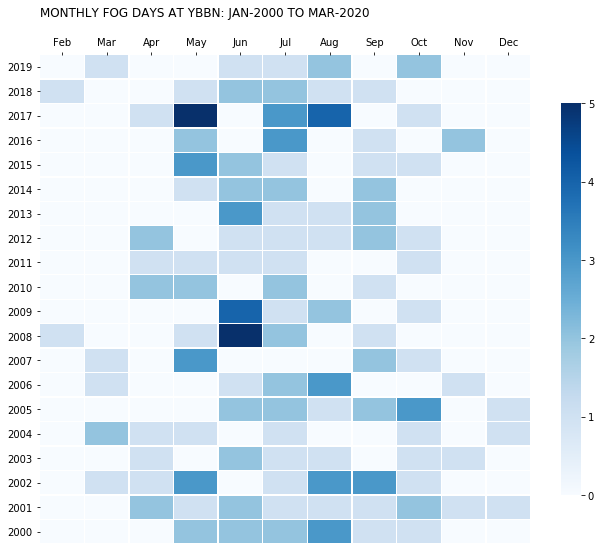

In [52]:
# use Seaborn’s .heatmap

'''use a sequential cmap with only two colors.
We can also make the limits of the colormap explicit by defining vmin and vmax.
Pandas .min and .max can help us figure out what are the best values for those.
'''

fig, ax = plt.subplots(figsize=(11, 9))

# plot heatmap
sns.heatmap(df_m, cmap="Blues", vmin= 0.0, vmax=df_m.max().max(), #square=True,
           linewidth=0.3, cbar_kws={"shrink": .8})

# xticks - move the ticks to the top of the chart to improve the visualization 
# and make it look more like a table.
ax.xaxis.tick_top()
# xticks_labels = dict_mon.values()  # includes Jan but we have no data for Jan
xticks_labels =['Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(11) + .5, labels=xticks_labels)


# get rid of the x and y labels since the values in our axis are quite self-explaining
plt.xlabel('')
plt.ylabel('')

# title

title = f'Monthly Fog days at {station}: \
{fg_aut.index[0].strftime("%b-%Y")} to {fg_aut.index[-1].strftime("%b-%Y")}\n'.upper()
plt.title(title, loc='left')
plt.savefig(f'./fg_plots/{sta}_Monthly_Fog_Days_by_year', format='eps', dpi=1000)
plt.show()

In [53]:
# GET SOI data
# http://www.bom.gov.au/climate/current/soihtm1.shtml
'''
import requests
url = 'http://www.bom.gov.au/climate/current/soihtm1.shtml'
soi_data = requests.get(url)
soi = pd.read_html(soi_data.text)  # ValueError: No tables found

However the table is there - even beautifulsoup bs4 has trouble extracting 
the table data !!!

We manually extract the table data and save the html coded data as soi_data.txt
'''

import datetime
# create list of months ['Jan','Feb',.....'Dec']
months = [datetime.date(2000, m, 1).strftime('%b') for m in range(1, 13)]

# we manually cut out table data from html file and save as .txt file
soi = pd.read_html('soi_data.txt',index_col=0, parse_dates=True)

len(soi), len(soi[0])
#(1, 145)   - its single dimesion list shape 1 not 2!!!
# however the 1st item in list is a 2D table !!
print('soi[0].shape',soi[0].shape)
print(soi[0][:2]) # get 1st 2 rows of data

# convert to DataFrame
soi = pd.DataFrame(soi[0])
soi.columns = months  # change column label from numbers to equivalent month names
# soi.index = soi.index.strftime('%Y')  # only keep the year for index labels
soi.index = soi.index.year  # since its datetime we can just keep year

soi = soi.head(21)  # only keep last 20 years data since Year 2000

soi = soi[months].apply(pd.to_numeric, errors='coerce') # force data numeric
# soi['winter_avg'] = (soi['May']+soi['Jun']+soi['Jul']+soi['Aug'])/4
soi['annual_avg_SOI'] = round(soi.mean(axis=1,skipna=True),2)

# not sure why avg using sum/len andm mean() give diff answers
print(f"\nMean SOI 2019: {soi.loc[2019].sum()/12:.2f}, {soi.loc[2019].mean():.2f}") 
print(f"Mean SOI 2018: {soi.loc[2018].sum()/12:.2f}, {soi.loc[2018].mean():.2f}") 

print(soi.shape)
soi.head(3)

soi[0].shape (145, 12)
             1     2    3    4    5     6    7     8      9     10    11    12
0                                                                             
2020-01-01  1.3  -2.2 -5.2 -0.5  2.8  -9.6  4.2     -      -     -     -     -
2019-01-01 -0.6 -13.5 -6.8 -1.3 -9.0 -10.4 -5.6  -4.4  -12.4  -5.6  -9.3  -5.5

Mean SOI 2019: -7.62, -7.03
Mean SOI 2018: 1.03, 0.95
(21, 13)


Jan   Feb   Mar  Apr  May   Jun  Jul  Aug   Sep  Oct  Nov  Dec  \
0                                                                      
2020  1.3  -2.2  -5.2 -0.5  2.8  -9.6  4.2  NaN   NaN  NaN  NaN  NaN   
2019 -0.6 -13.5  -6.8 -1.3 -9.0 -10.4 -5.6 -4.4 -12.4 -5.6 -9.3 -5.5   
2018  8.9  -6.0  10.5  4.5  2.1  -5.5  1.6 -6.9 -10.0  3.0 -0.1  9.3   

      annual_avg_SOI  
0                     
2020           -1.31  
2019           -7.03  
2018            0.95

In [54]:
def color_soi(value):
  """
  Colors elements in a dateframe green if TmTd < 1 
  and red if TmTd < 1. Else leave it black.
  """

  if value < -1:
    color = 'red'
  elif value > 1:
    color = 'blue'
  else:
    color = 'black'

  return 'color: %s' % color

soi = pd.merge(left=soi, right=fogs_per_year, how='left', left_index=True, right_index=True)
soi.style.applymap(color_soi,subset=soi.columns)

In [55]:
soi['May'].corr(soi['Fog days per year'], method='pearson')

nan

In [56]:
print(soi.index) # convert index in years from string to datetime  Index dtype='object'
soi.index = pd.to_datetime(soi.index, format='%Y').year
soi.index # Int64Index dtype='int64'   
# Still not date time but we can slice like 2000:2019 now which we can't with objext index

Index([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000],
      dtype='object', name=0)


Int64Index([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
            2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000],
           dtype='int64', name=0)

In [57]:
years= np.arange(start=2000,stop=2020,step=1)   # get int year values 2000 to 2019 
months= ['Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
soi=soi.loc[years,months].sort_index(ascending=False)
soi.head()

Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  Dec
0                                                                    
2019 -13.5  -6.8  -1.3  -9.0 -10.4  -5.6  -4.4 -12.4  -5.6  -9.3 -5.5
2018  -6.0  10.5   4.5   2.1  -5.5   1.6  -6.9 -10.0   3.0  -0.1  9.3
2017  -2.2   5.1  -6.3   0.5 -10.4   8.1   3.3   6.9   9.1  11.8 -1.4
2016 -19.7  -4.7 -22.0   2.8   5.8   4.2   5.3  13.5  -4.3  -0.7  2.6
2015   0.6 -11.2  -3.8 -13.7 -12.0 -14.7 -19.8 -17.8 -20.2  -5.3 -9.1

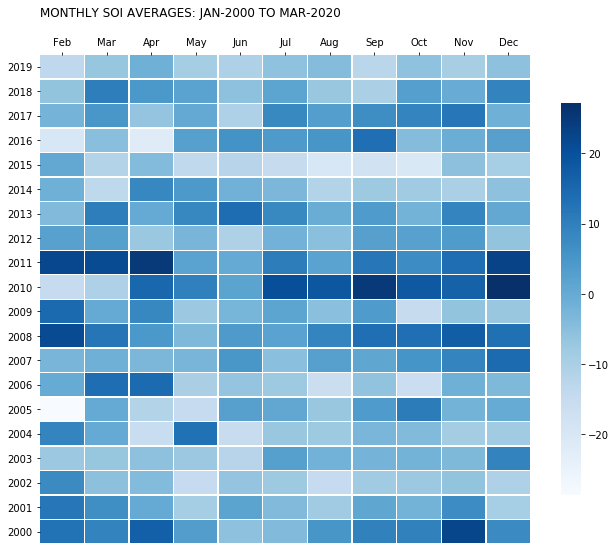

In [58]:
# use Seaborn’s .heatmap

'''use a sequential cmap with only two colors.
We can also make the limits of the colormap explicit by defining vmin and vmax.
Pandas .min and .max can help us figure out what are the best values for those.
'''

fig, ax = plt.subplots(figsize=(11, 9))

# plot heatmap
sns.heatmap(soi, cmap="Blues", vmin= soi.min().min(), vmax=soi.max().max(), #square=True,
           linewidth=0.3, cbar_kws={"shrink": .8})

# xticks - move the ticks to the top of the chart to improve the visualization 
# and make it look more like a table.
ax.xaxis.tick_top()
# xticks_labels = dict_mon.values()  # includes Jan but we have no data for Jan
xticks_labels =['Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(11) + .5, labels=xticks_labels)


# get rid of the x and y labels since the values in our axis are quite self-explaining
plt.xlabel('')
plt.ylabel('')

# title

title = f'Monthly SOI Averages: \
{fg_aut.index[0].strftime("%b-%Y")} to {fg_aut.index[-1].strftime("%b-%Y")}\n'.upper()
plt.title(title, loc='left')
plt.savefig(f'./fg_plots/{sta}_Monthly_SOI', format='eps', dpi=1000)
plt.show()

In [59]:
# we can compute correlation between monthly fog counts and monthly soi values
# now we have got data in same shape
# REFER https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c
print(soi.shape,'\n', soi.columns,'\n', soi.index)
print(df_m.shape,'\n', df_m.columns,'\n', df_m.index)

(20, 11) 
 Index(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec'],
      dtype='object') 
 Int64Index([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
            2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000],
           dtype='int64', name=0)
(20, 11) 
 Index(['Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
       'Dec'],
      dtype='object', name='month') 
 Int64Index([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
            2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000],
           dtype='int64', name='year')


In [60]:
# Use corrwith() function to find the correlation among two dataframe objects along the column axis
# To find the correlation among the 
# columns of df1 and df2 along the column axis  (default)
df_m.corrwith(soi, axis = 'rows') 

month
Feb    0.192491
Mar   -0.089219
Apr    0.003035
May    0.061074
Jun    0.281099
Jul    0.350141
Aug   -0.180001
Sep   -0.063998
Oct    0.056382
Nov   -0.131793
Dec   -0.303537
dtype: float64

```
Some correlation between LaNina (+ve SOI) months and high number of fog days - about +30 to +40% for Months June and July. This makes sense as LaNina associated with high moisture content (above average ocean temps and above average rainfall over eastern QLD).

Strong -ve correlation for Dec -30% i.e LaNina years have fewer fog days while ElNino years deliver more fog days - makes sense.

TODO

Do a lagged correlation - so number of fog days in a month with SOI from previous month

Correlation between Monthly rainfall values (or rain days) and SOI index - test the hypothesis that LaNina equates to above average rainfall over SE QLD.

Correlation between Monthly rainfall values or even betetr number of rain days per month) and monthly fog counts - to see if more rain days give us more fog days.

Might need to use time series correlation for lagged correlation..

see https://towardsdatascience.com/finding-correlations-in-time-series-data-845e5dc538c4

```

In [61]:
# Use corrwith() function to find the correlation among two dataframe objects along the column axis
# To find the correlation among the 
# columns of df1 and df2 along the column axis 
df_m.corrwith(soi, axis = 'columns') 

year
2019    0.356106
2018   -0.579136
2017    0.091420
2016    0.359738
2015   -0.375963
2014    0.179359
2013    0.434312
2012   -0.263725
2011   -0.377253
2010    0.273840
2009   -0.215569
2008   -0.372526
2007   -0.262990
2006   -0.286639
2005    0.721102
2004    0.143654
2003   -0.275740
2002   -0.606353
2001   -0.369828
2000   -0.719691
dtype: float64

In [62]:
#```
# Handling Axes object to label x-axis tick marks etc
# 
# https://stackoverflow.com/questions/23969619/plotting-with-seaborn-using-the-matplotlib-object-oriented-interface
# see also
# https://stackoverflow.com/questions/27019079/move-seaborn-plot-legend-to-a-different-position/
# 
# The plotting functions in seaborn are broadly divided into two classes
# 
# - "Axes-level" functions, including regplot, boxplot, kdeplot, and many others
# - "Figure-level" functions, including lmplot, factorplot, jointplot and one or two others
# 
# The first group is identified by taking an explicit ax argument and returning an Axes object. 
# As this suggests, you can use them in an "object oriented" style by passing your Axes to them:
# 
# f, (ax1, ax2) = plt.subplots(2)
# sns.regplot(x, y, ax=ax1)
# sns.kdeplot(x, ax=ax2)
# 
# Axes-level functions will only draw onto an Axes and won't otherwise mess with the figure, 
# so they can coexist perfectly happily in an object-oriented matplotlib script.
# 
# The second group of functions (Figure-level) are distinguished by the fact that the resulting plot can 
# potentially include several Axes which are always organized in a "meaningful" way. 
# That means that the functions need to have total control over the figure, so it isn't possible to plot,
# say, an lmplot onto one that already exists. Calling the function always initializes a figure and 
# sets it up for the specific plot it's drawing.
# 
# However, once you've called lmplot, it will return an object of the type FacetGrid. 
# This object has some methods for operating on the resulting plot that know a bit about the structure of the plot. 
# It also exposes the underlying figure and array of axes at the FacetGrid.fig and FacetGrid.axes arguments.
# The jointplot function is very similar, but it uses a JointGrid object.
# So you can still use these functions in an object-oriented context, but all of your customization has to come 
# after you've called the function.
#```
bad_fg_days.columns
bad_fg_days.tail()


avID  man  aut  rain24hr  fogflag  min_vis  fg_onset  fg_finish  \
2018-09-08  YBBN     10    3       5.2     True     0.05     14.23      19.49   
2019-06-15  YBBN      9    0       0.0     True     0.05     19.28      22.27   
2019-08-07  YBBN      3    3       2.6     True     0.10     19.42      21.15   
2019-08-18  YBBN     16    5       0.0     True     0.05     14.53      22.15   
2019-10-19  YBBN      2    0       6.2     True     0.50     13.15      14.15   

            fg_duration    wind5  ...  wspd8  wdir11  wspd11  wdir14  wspd14  \
2018-09-08         5.26   030/09  ...    6.0   330.0     4.0   200.0     7.0   
2019-06-15         2.59   060/07  ...    2.0    60.0     3.0    20.0     4.0   
2019-08-07         1.33   050/06  ...    0.0   250.0     8.0    10.0     6.0   
2019-08-18         7.22   060/09  ...    6.0    20.0     4.0   320.0     1.0   
2019-10-19         1.00   040/07  ...   10.0   360.0     7.0   300.0     5.0   

           wdir17  wspd17  wdir20  wspd20  Td_only_trend_5to14  
2018-09-08  200.0     3.0   240.0     6.0                 True  
2019-06-15  210.0     4.0   230.0     5.0                 True  
2019-08-07  210.0     4.0   320.0     3.0                 True  
2019-08-18    0.0     0.0     0.0     0.0                 True  
2019-10-19  230.0     5.0   240.0     7.0                 True  

[5 rows x 103 columns]

{1: '3 pm', 2: '6 pm', 3: '9 pm', 4: '12 am', 5: '3 am', 6: '6 am'}
[1 2 3 4 5 6]
['3 pm', '6 pm', '9 pm', '12 am', '3 am', '6 am']


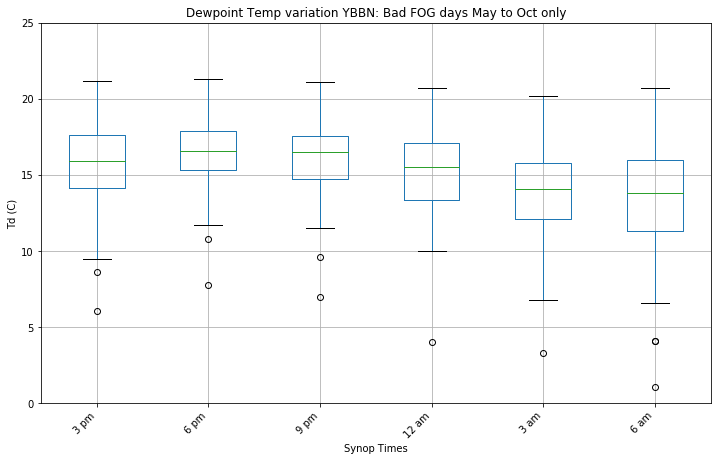

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(12,7))
bad_fg_days.loc[bad_fg_days.index.month.isin([5,6,7,8,9,10])]\
    .boxplot(column=['Td5','Td8','Td11','Td14','Td17','Td20'], ax=ax)
ax.set_title(f'Dewpoint Temp variation {station}: Bad FOG days May to Oct only')


dict_synop_times=dict(zip(ax.get_xticks(),
                          ['3 pm','6 pm','9 pm','12 am','3 am','6 am']))
print(dict_synop_times)
print(ax.get_xticks())  # interestingly xticks starts at 1 not 0??
xlabels = [dict_synop_times[x] for x in ax.get_xticks()]
print(xlabels)

xlabels = [dict_synop_times[x] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
ax.set_ylabel("Td (C)")  
ax.set_xlabel("Synop Times")  
ax.set_ylim(0,25)    # seems good y-axis range for coastal locations
if station in ['YTWB','YBOK','YBWW']:
    ax.set_ylim(-10,20)
plt.show()


[1 2 3 4 5 6]


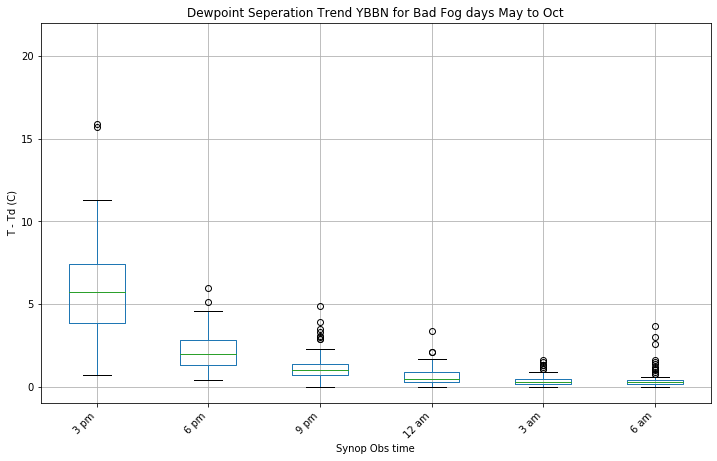

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(12,7))
bad_fg_days.loc[bad_fg_days.index.month.isin([5,6,7,8,9,10])]\
    .boxplot(column=['TmTd5','TmTd8','TmTd11','TmTd14','TmTd17','TmTd20'],ax=ax)
ax.set_title(f'Dewpoint Seperation Trend {station} for Bad Fog days May to Oct')
print(ax.get_xticks())  
xlabels = [dict_synop_times[x] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
ax.set_ylabel("T - Td (C)")  
ax.set_xlabel("Synop Obs time")  
ax.set_ylim(-1,22)    # seems good y-axis range for YBBN (5, 25)
plt.show()

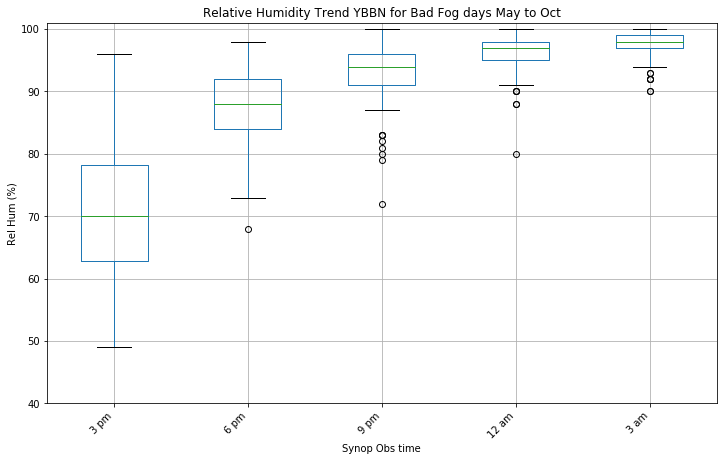

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(12,7))
bad_fg_days.loc[bad_fg_days.index.month.isin([5,6,7,8,9,10])].boxplot(column=['RH5','RH8','RH11','RH14','RH17'], ax=ax)
ax.set_title(f'Relative Humidity Trend {station} for Bad Fog days May to Oct')
xlabels = [dict_synop_times[x] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
ax.set_ylabel("Rel Hum (%)")  
ax.set_xlabel("Synop Obs time")  
ax.set_ylim(40,101)
plt.show()

In [66]:
fg_month_rain = fg_days['rain_flag'].groupby(fg_days.index.month).value_counts()
fg_month_rain

    rain_flag
2   True          2
3   False         5
    True          1
4   False         6
    True          5
5   True         18
    False         8
6   True         21
    False         9
7   False        19
    True         11
8   False        15
    True          8
9   False        12
    True          8
10  False        10
    True          7
11  True          4
    False         1
12  True          2
    False         1
Name: rain_flag, dtype: int64

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[ 0  1  2  3  4  5  6  7  8  9 10 11]


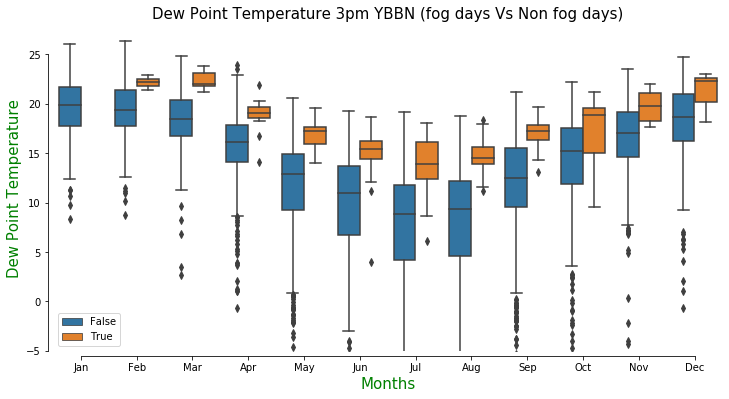

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(x=fg_aut.index.month, 
              y='Td5',
              hue='fogflag',
              data=fg_aut,ax=ax)
ax.set_title(f'Dew Point Temperature 3pm {station} (fog days Vs Non fog days)', fontsize=15)
ax.set_xlabel('Months', color='g', fontsize=15)
ax.set_ylabel('Dew Point Temperature', color='g', fontsize=15)
print(ax.get_xticks())# [ 0  1  2  3  4  5  6  7  8  9 10 11]  NB counts from 0, Jan is 1
xlabels = [dict_mon[x+1] for x in ax.get_xticks()] 
ax.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
ax.set_ylim(-5,28)
if station in ['YTWB','YBOK','YBWW']:
    ax.set_ylim(-10,25)
ax.legend(loc='lower left')#,labels=['no fog','fog'])
sns.despine(offset=5, trim=True)
plt.savefig(f'./fg_plots/{sta}_3pm_Td_Fog_nofog_days', format='eps', dpi=1000)

In [68]:
fg_aut.loc[fg_aut.index.month.isin([6,7,8]),['fogflag','Td14']].\
    groupby([pd.Grouper(freq="y"),'fogflag']).describe().info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 39 entries, (2000-12-31 00:00:00, False) to (2019-12-31 00:00:00, True)
Data columns (total 8 columns):
(Td14, count)    39 non-null float64
(Td14, mean)     39 non-null float64
(Td14, std)      38 non-null float64
(Td14, min)      39 non-null float64
(Td14, 25%)      39 non-null float64
(Td14, 50%)      39 non-null float64
(Td14, 75%)      39 non-null float64
(Td14, max)      39 non-null float64
dtypes: float64(8)
memory usage: 2.8 KB


In [69]:
fg_aut.loc[fg_aut.index.month.isin([6,7,8]),['fogflag','Td11']].\
    groupby([pd.Grouper(freq="y"),'fogflag']).quantile(q=(0.2,0.8)).tail()

Td11
           fogflag           
2018-12-31 True    0.8  15.10
2019-12-31 False   0.2   6.40
                   0.8  14.10
           True    0.2  14.10
                   0.8  15.88

In [70]:
# July 12am Td variation fog VS no fog days
JJA_Td = fg_aut.loc[fg_aut.index.month.isin([6,7,8]),
                    ['rain_flag','fogflag','Td5','Td8','Td11','Td14','Td17','Td20']].\
        groupby(['rain_flag','fogflag']).\
        quantile(q=(0.2,0.5,0.8))

julyTd = fg_aut.loc[fg_aut.index.month.isin([6,7,8]),
                    ['rain_flag','fogflag','Td5','Td8','Td11','Td14','Td17','Td20']].\
        groupby(['rain_flag','fogflag']).\
        quantile(q=(0.2,0.5,0.8))

print(julyTd.info(),"\n\n", julyTd.index,"\n\n", julyTd.columns)
julyTd

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12 entries, (False, False, 0.2) to (True, True, 0.8)
Data columns (total 6 columns):
Td5     12 non-null float64
Td8     12 non-null float64
Td11    12 non-null float64
Td14    12 non-null float64
Td17    12 non-null float64
Td20    12 non-null float64
dtypes: float64(6)
memory usage: 870.0 bytes
None 

 MultiIndex([(False, False, 0.2),
            (False, False, 0.5),
            (False, False, 0.8),
            (False,  True, 0.2),
            (False,  True, 0.5),
            (False,  True, 0.8),
            ( True, False, 0.2),
            ( True, False, 0.5),
            ( True, False, 0.8),
            ( True,  True, 0.2),
            ( True,  True, 0.5),
            ( True,  True, 0.8)],
           names=['rain_flag', 'fogflag', None]) 

 Index(['Td5', 'Td8', 'Td11', 'Td14', 'Td17', 'Td20'], dtype='object')


Td5    Td8   Td11   Td14   Td17   Td20
rain_flag fogflag                                              
False     False   0.2   2.36   5.56   4.90   4.40   3.70   3.20
                  0.5   8.40  10.60   9.85   8.70   7.80   7.10
                  0.8  12.00  13.44  12.90  11.80  10.96  10.30
          True    0.2  12.42  14.14  13.60  11.34   9.84   8.54
                  0.5  14.20  15.40  15.30  14.20  12.50  11.40
                  0.8  15.88  16.82  16.50  15.98  14.10  13.30
True      False   0.2   9.70  10.70  10.30   9.90   9.40   8.72
                  0.5  12.60  13.20  13.05  12.80  12.20  11.80
                  0.8  15.18  15.50  15.20  14.80  14.60  14.20
          True    0.2  13.90  14.30  14.00  12.78  11.18  10.78
                  0.5  15.50  15.65  14.95  14.40  13.85  13.20
                  0.8  16.82  17.04  17.04  16.52  15.92  15.22

In [71]:
idx = pd.IndexSlice
postrain_fog_Td_stats = julyTd.loc[idx[True,True,:], ['Td5','Td8','Td11','Td14']]
#postrain_fog_Td_stats.drop(labels=['rain_flag','fogflag'], axis=0, level = [0,1])
# https://www.w3resource.com/pandas/dataframe/dataframe-drop.php

postrain_fog_Td_stats.drop(index='rain_flag', level=0, inplace=True)
postrain_fog_Td_stats.drop(index='fogflag', level=0, inplace=True)
postrain_fog_Td_stats

Td5    Td8   Td11   Td14
rain_flag fogflag                                
True      True    0.2  13.90  14.30  14.00  12.78
                  0.5  15.50  15.65  14.95  14.40
                  0.8  16.82  17.04  17.04  16.52

In [72]:
dry_fg = julyTd.loc[idx[False,True,:], ['Td5']].droplevel(level=[0,1]).values.flatten()
dry_fg

array([12.42, 14.2 , 15.88])

In [73]:
dry_no_fg=julyTd.loc[idx[False,False,:], ['Td5']].droplevel(level=[0,1]).values.flatten()
dry_no_fg

array([ 2.36,  8.4 , 12.  ])

                         Td5    Td8
rain_flag fogflag                  
False     True    0.2  12.42  14.14
                  0.5  14.20  15.40
                  0.8  15.88  16.82


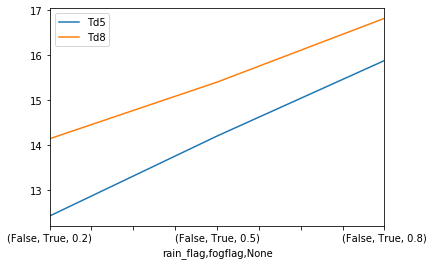

In [74]:
'''dry = rain24 > 0
if dry:
    if (Td_3pm > dry_fg[0]) & (Td_3pm > dry_fg[1])
'''

idx = pd.IndexSlice
print(julyTd.loc[idx[False,True,:], ['Td5','Td8']])
julyTd.loc[idx[False,True,:], ['Td5','Td8']].plot()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


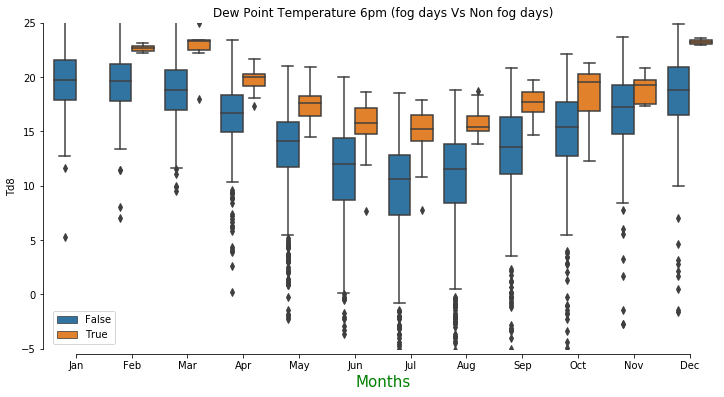

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
# sns.set(style="ticks", palette="pastel")
sns.boxplot(x=fg_aut.index.month, 
            y='Td8', 
            hue='fogflag',
            ax=ax, data=fg_aut)
ax.set_title("Dew Point Temperature 6pm (fog days Vs Non fog days)")
ax.set_xlabel('Months', color='g', fontsize=15)
xlabels = [dict_mon[x+1] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
ax.legend(loc='lower left')
ax.set_ylim(-5,25)
if station in ['YTWB','YBOK','YBWW']:
    ax.set_ylim(-10,28)
sns.despine(offset=5, trim=True)
plt.savefig(f'./fg_plots/{sta}_6pm_Td_Fog_nofog_days', format='eps', dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


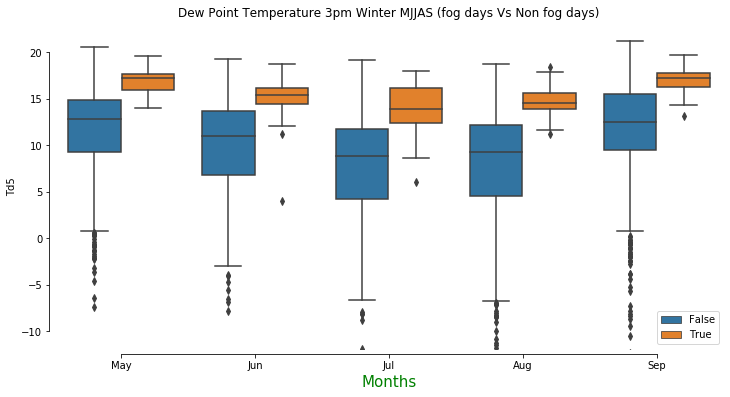

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
# sns.set(style="ticks", palette="pastel")
dat = fg_aut.loc[fg_aut.index.month.isin([5,6,7,8,9]),:]
sns.boxplot(x=dat.index.month, 
            y='Td5', 
            hue='fogflag',
            ax=ax, data=dat)
ax.set_title("Dew Point Temperature 3pm Winter MJJAS (fog days Vs Non fog days)")
ax.set_xlabel('Months', color='g', fontsize=15)
xlabels = ['May','Jun', 'Jul','Aug','Sep']
ax.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
ax.legend(loc='lower right')
ax.set_ylim(dat['Td5'].min()+5,dat['Td5'].max()+2)
sns.despine(offset=5, trim=True);  # x-axis tick labels won't rotate with this line
plt.savefig(f'./fg_plots/{sta}_3pm_Td_Fog_nofog_days_MJJAS', format='eps', dpi=1000)


In [77]:
fg_aut.loc[fg_aut.index.month.isin([6,7,8]),
                    ['fogflag','Td5','Td8','Td11','Td14','Td17','Td20']].\
        groupby('fogflag').\
        quantile(q=(0.05,0.2,0.5,0.8,0.95))

Td5    Td8   Td11   Td14    Td17   Td20
fogflag                                               
False   0.05  -2.9  -0.40   0.30   0.70   0.745   0.60
        0.20   3.8   6.90   6.00   5.30   4.500   4.00
        0.50   9.7  11.40  10.80   9.80   9.200   8.50
        0.80  13.3  14.20  13.90  13.10  12.400  11.90
        0.95  16.2  16.60  16.20  15.50  15.200  14.76
True    0.05  10.3  11.72  11.71  10.11   7.550   4.46
        0.20  13.1  14.24  14.00  12.08  10.940   9.50
        0.50  14.6  15.50  15.30  14.30  13.000  12.00
        0.80  16.3  16.96  16.76  16.40  14.840  14.64
        0.95  18.0  18.17  17.69  17.38  16.790  16.29

In [78]:
MJJAS_Td = fg_aut.loc[fg_aut.index.month.isin([6,7,8]),
                    ['fogflag','Td5','Td8','Td11','Td14','Td17','Td20']].\
        groupby('fogflag').\
        quantile(q=(0.05,0.2,0.5,0.8,0.95))
idx = pd.IndexSlice
MJJAS_Td.loc[idx[True,:], ['Td5','Td8']]

Td5    Td8
fogflag                  
True    0.05  10.3  11.72
        0.20  13.1  14.24
        0.50  14.6  15.50
        0.80  16.3  16.96
        0.95  18.0  18.17

In [79]:
# grab median 3pm Td for fog (=True) days only
MJJAS_Td.loc[idx[True,0.5], 'Td5']

14.6

In [80]:
'''
https://towardsdatascience.com/resampling-methods-for-inference-analysis-e75fecfefcb2

https://towardsdatascience.com/new-python-library-for-statistical-tests-simpler-than-statsmodels-richer-than-scipy-stats-ff380d4673c0


'''

td5 = fg_aut.loc[fg_aut.index.month.isin([6,7,8]),['fogflag','Td5','Td8','Td11']]
td5.loc[td5['fogflag'], 'Td5'] # extract Td5 values for fog days

# median
print(f"Median 3pm Td for fog days={np.median(td5.loc[td5['fogflag'], 'Td5']):.2f}, \
Median 3pm Td for non fog days={np.median(td5.loc[~td5['fogflag'], 'Td5']):.2f}")

# Mean 3pm Td fog days and non-fog days
print(f"\nMean 3pm Td for fog days={np.mean(td5.loc[td5['fogflag'], 'Td5']):.2f}, \
Mean 3pm Td for fog days={np.mean(td5.loc[~td5['fogflag'], 'Td5']):.2f}\n\n")

#95% Confidence Interval --> np.percentile(series, [2.5, 97.5])
print(f"95% Confidence Interval for 3pm Td fog days {np.percentile(td5.loc[td5['fogflag'], 'Td5'], [2.5, 97.5])}")
print(f"90% Confidence Interval for 3pm Td fog days {np.percentile(td5.loc[td5['fogflag'], 'Td5'], [5, 95])}")
print(f"80% Confidence Interval for 3pm Td fog days {np.percentile(td5.loc[td5['fogflag'], 'Td5'], [10, 90])}")
print(f"50% CI (IQR q1/25th to q3/75 percentile ??) {np.percentile(td5.loc[td5['fogflag'], 'Td5'], [25, 75])}")



Median 3pm Td for fog days=nan, Median 3pm Td for non fog days=nan

Mean 3pm Td for fog days=14.51, Mean 3pm Td for fog days=8.49


95% Confidence Interval for 3pm Td fog days [nan nan]
90% Confidence Interval for 3pm Td fog days [nan nan]
80% Confidence Interval for 3pm Td fog days [nan nan]
50% CI (IQR q1/25th to q3/75 percentile ??) [nan nan]


 https://sites.google.com/site/davidsstatistics/home/notched-box-plots
 
 https://www.nature.com/articles/nmeth.2813.pdf?origin=ppub
     
 Box plots are a simple but powerful graphing tool that can be used in place of histograms to address both goals. Whereas histograms require a sample size of at least 30 to be useful, box plots require a sample size of only 5, provide more detail in the tails of the distribution and are more readily compared across three or more samples.
 
 Box plots characterize a sample using the 25th, 50th and 75th percentiles—also known as the lower quartile (Q1), median (m or Q2) and upper quartile (Q3)—and the interquartile range (IQR = Q3 – Q1), which covers the central 50% of the data. Quartiles are insensitive to outliers and preserve information about the center and spread. Consequently, they are preferred over the mean and s.d. for population distributions that are asymmetric or irregularly shaped and for samples with extreme outliers.
 
 The core element that gives the box plot its name is a box whose length is the IQR and whose width is arbitrary. A line inside the box shows the median, which is not necessarily central. Whiskers are conventionally extended to the most extreme data point that is no more than 1.5 × IQR from the edge of the box (Tukey style) or all the way to minimum and maximum of the data values (Spear style)
 
  The 1.5 multiplier corresponds to approximately ±2.7s (where s is s.d.) and 99.3% coverage of the data for a normal distribution. Outliers beyond the whiskers may be individually plotted. Box plot construction requires a sample of at least n = 5 (preferably larger)
 
  Highly skewed distributions appear in box plot form with a markedly shorter whisker-and-box region and an absence of outliers on the side opposite the skew. Keep in mind that for small sample sizes, which do not necessarily represent the distribution well, these features may appear by chance.
 
 see also
 https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

In [81]:
fg_JJA = fg_aut[( fg_aut.index.month.isin([5,6,7,8,9]))]
fg_JJA.loc[fg_JJA['fogflag']]['Td5'].mean(), fg_JJA.loc[fg_JJA['fogflag']]['Td5'].median()

(15.377952755905511, 15.7)

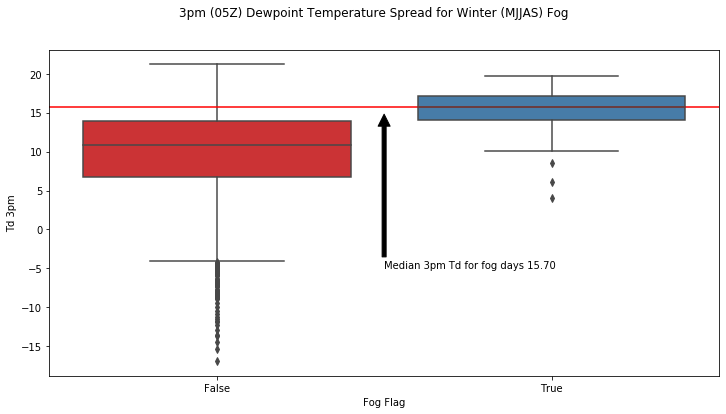

In [82]:
#print(fg_aut.columns)

'''Here we can see where the rule of thumb for 3pm Td > 16 for fog days 
come from - the median TD for winter fog is about 15C


By comparision median for non fog winter days is about 10 ~ Q1 for fog days

Better rule of thum for winter fog days - consider fog if Td > Q3 (no fog days) ~ 13
and high chance if Td > 14C '''

fg_JJA = fg_aut[( fg_aut.index.month.isin([5,6,7,8,9]))]
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(x='fogflag', y='Td5', data=fg_JJA,  palette='Set1',ax=ax)

fig.suptitle('3pm (05Z) Dewpoint Temperature Spread for Winter (MJJAS) Fog')
ax.set_xlabel('Fog Flag')
ax.set_ylabel('Td 3pm')
# ax.legend(['Fog', 'No Fog'],loc='lower right')
# sns.despine(offset=10, trim=True)
ax.axhline(y=fg_JJA.loc[fg_JJA['fogflag']]['Td5'].median(),
           color='red')# ymin=0, ymax=1)
ax.annotate(f"Median 3pm Td for fog days {fg_JJA.loc[fg_JJA['fogflag']]['Td5'].median():.2f}", 
            xy=(0.5, 15), xytext=(0.5, -5),
            arrowprops=dict(facecolor='black', shrink=0.01))

plt.savefig(f'./fg_plots/{sta}_3pm_Td_Fog_nofog_days_MJJAS_median_annotation', format='eps', dpi=1000)

In [83]:
fg_JJA.loc[fg_JJA['fogflag']]['Td5'].describe()

count    127.000000
mean      15.377953
std        2.491857
min        4.000000
25%       14.050000
50%       15.700000
75%       17.200000
max       19.700000
Name: Td5, dtype: float64

In [84]:
fg_JJA.loc[fg_JJA['fogflag']]['Td5'].quantile(.25)

14.05

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

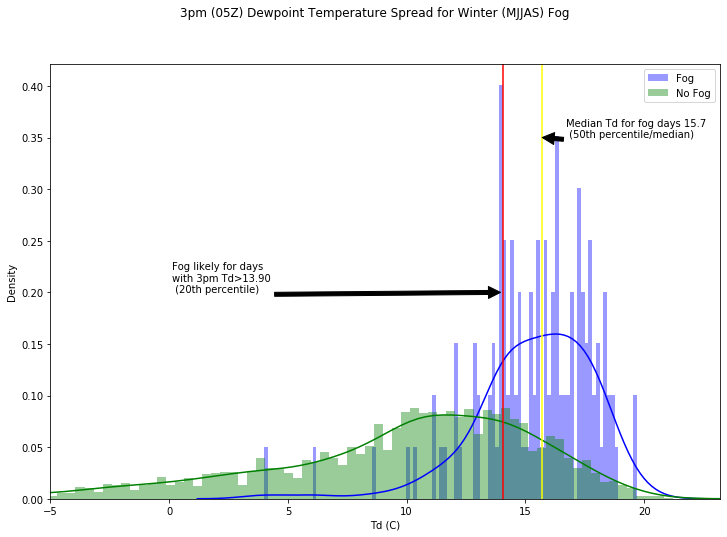

In [85]:
'''
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html
text : str
The text of the annotation. s is a deprecated synonym for this parameter.

xy : (float, float)
The point (x,y) to annotate.

xytext : (float, float), optional
The position (x,y) to place the text at. If None, defaults to xy.
'''
fg_JJA = fg_aut[( fg_aut.index.month.isin([5,6,7,8,9]))].dropna(subset=['fogflag','Td5'])
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12,8))#,sharex=True,sharey=True)
sns.distplot(fg_JJA.loc[fg_JJA['fogflag'],'Td5'].values, kde=True, color='blue', bins=100,ax=ax)
sns.distplot(fg_JJA.loc[~fg_JJA['fogflag'],'Td5'].values, kde=True, color='green', bins=100,ax=ax)

ax.legend(['Fog', 'No Fog'])
fig.suptitle('3pm (05Z) Dewpoint Temperature Spread for Winter (MJJAS) Fog\n')
ax.set_xlabel('Td (C)')
#ax.set_xlim(fg_JJA['Td8'].min()+1,fg_JJA['Td8'].max()+1)
ax.set_xlim(-5,fg_JJA['Td5'].max()+2)
ax.set_ylabel('Density')

ax.axvline(x=fg_JJA.loc[fg_JJA['fogflag']]['Td5'].quantile(.25),
           color='red')# ymin=0, ymax=1)
ax.annotate(f"Fog likely for days \nwith 3pm Td>{fg_JJA.loc[fg_JJA['fogflag']]['Td5'].quantile(.2):.2f}\n (20th percentile)", 
            xy=(fg_JJA.loc[fg_JJA['fogflag']]['Td5'].quantile(.25), 0.2), xytext=(0.1, 0.2),
            arrowprops=dict(facecolor='black', shrink=0.01))

ax.axvline(x=fg_JJA.loc[fg_JJA['fogflag']]['Td5'].quantile(.5),
           color='yellow')# ymin=0, ymax=1)
ax.annotate(f"Median Td for fog days {fg_JJA.loc[fg_JJA['fogflag']]['Td5'].quantile(.5)} \n (50th percentile/median)",
            xy=(fg_JJA.loc[fg_JJA['fogflag']]['Td5'].quantile(.5), 0.35),
            xytext=(fg_JJA.loc[fg_JJA['fogflag']]['Td5'].quantile(.5)+1, 0.35),
            arrowprops=dict(facecolor='black', shrink=0.01))
# see more annotation shere

# https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html
plt.savefig(f'./fg_plots/{sta}_3pm_Td_Fog_nofog_days_MJJAS_q25_q50_annotation', format='eps', dpi=1000)

In [86]:
#for td in fg_aut['Td5'].quantile([.2,.5,.55,.6]):
#for td in [13,14,15]:
for td in [15,16,17]:    
#for td in [14,15,16]:
    cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=(fg_aut['Td5']>td),
            margins=True)
    
    tn=cross.loc[False,False]
    fp=cross.loc[False,True]
    fn=cross.loc[True,False]
    tp=cross.loc[True,True]
    
    POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
    PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
    FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 
    
    ACC = (tn+tp)/(tn+tp+fp+fn)*100
    ERR = (fp+fn)/(tn+tp+fp+fn)*100
    
    print(f"\nTd5 >{td:.2f}: TP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")
    
    print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
    tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
    Giving FPR or false alarm rate of {FAR:.0f}%')

    print(f'\nPOD (recall or TPR): {POD:.0f}% of the fog cases detected correctly' )
    print(f'{tn /cross.loc[False,"All"]*100:.0f}% of no fog days identified correctly.' )

    print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
    print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')
    
    if (POD > 60) & (FAR < 40):
        print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
    print(cross)
    print("============================================")
   
'''
upto 75% of fog days have 3pm Td more than ~ 14 (mean 16+/-3 so 13-19) [8-20 fog free days]
and 75% Td Sep < 8 (mean 6 +/- 3, i.e 3 to 9)         [10+/-5 or 5-15 fog free days]

upto 75% of fog days have 6pm Td more than ~ 15 (mean 17+/-2 so 15-19) [10-20 fog free days]
and 75% 6pm Td sep < 3  (mean 2 +/- 1, i.e 1 to 3)     [6+/-3 or 3-9 fog free days]

upto 75% of fog days have 9pm Td more than ~ 15 (mean 17+/-3 so 14-20) [10-20 fog free days]
and 75% 9pm Td sep < 2 (mean 1 +/- 1, i.e 0 to 2)     [5+/-3 or 2-8 fog free days]

upto 75% of fog days have 12am Td more than ~ 12 (mean 16+/-3 so 13-19) [10-20 fog free days] 
and 75% 12am Td sep < .9 (mean .7+/-.5, i.e .2 to 1.2) [4+/-3 or 1-7 fog free days]
'''
# best Td5  > 15 POD 65%, FAR 53! ACC 47%
# best Td8  > 16 POD 65%, FAR 49%, ACC 51%!
# best Td11 > 16 POD 62%, FAR 50%, ACC 50%!
# best Td14 > 15 POD 63%, FAR 54%, ACC 46%!
# best Td5_48hr trend > +1 , POD 66%, FAR 41%


Td5 >15.00: TP=113	FN=60	TN=3343	FP=3791

3904 days when fog forecast,
    tp=113 days or about 3% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 53%

POD (recall or TPR): 65% of the fog cases detected correctly
47% of no fog days identified correctly.

Overall Accuracy Rate: 47% (includes correct no fog predictions as well!)
Misclassification Rate: 53%  (wrong fog and no fog predictions)
Td5      False  True   All
fogflag                   
False     3343  3791  7134
True        60   113   173
All       3403  3904  7307

Td5 >16.00: TP=94	FN=79	TN=3883	FP=3251

3345 days when fog forecast,
    tp=94 days or about 3% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 46%

POD (recall or TPR): 54% of the fog cases detected correctly
54% of no fog days identified correctly.

Overall Accuracy Rate: 54% (includes correct no fog predictions as well!)
Misclassification Rate: 46%  (wrong fog and no fog predictions)
Td5      False 

'\nupto 75% of fog days have 3pm Td more than ~ 14 (mean 16+/-3 so 13-19) [8-20 fog free days]\nand 75% Td Sep < 8 (mean 6 +/- 3, i.e 3 to 9)         [10+/-5 or 5-15 fog free days]\n\nupto 75% of fog days have 6pm Td more than ~ 15 (mean 17+/-2 so 15-19) [10-20 fog free days]\nand 75% 6pm Td sep < 3  (mean 2 +/- 1, i.e 1 to 3)     [6+/-3 or 3-9 fog free days]\n\nupto 75% of fog days have 9pm Td more than ~ 15 (mean 17+/-3 so 14-20) [10-20 fog free days]\nand 75% 9pm Td sep < 2 (mean 1 +/- 1, i.e 0 to 2)     [5+/-3 or 2-8 fog free days]\n\nupto 75% of fog days have 12am Td more than ~ 12 (mean 16+/-3 so 13-19) [10-20 fog free days] \nand 75% 12am Td sep < .9 (mean .7+/-.5, i.e .2 to 1.2) [4+/-3 or 1-7 fog free days]\n'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

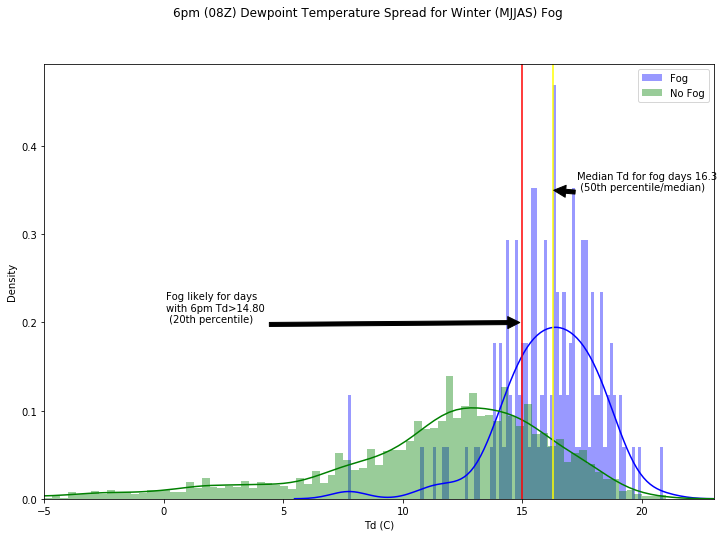

In [87]:

fg_JJA = fg_aut[( fg_aut.index.month.isin([5,6,7,8,9]))].dropna(subset=['fogflag','Td8'])
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12,8))#,sharex=True,sharey=True)
sns.distplot(fg_JJA.loc[fg_JJA['fogflag'],'Td8'].values, kde=True, color='blue', bins=100,ax=ax)
sns.distplot(fg_JJA.loc[~fg_JJA['fogflag'],'Td8'].values, kde=True, color='green', bins=100,ax=ax)

ax.legend(['Fog', 'No Fog'])
fig.suptitle('6pm (08Z) Dewpoint Temperature Spread for Winter (MJJAS) Fog\n')
ax.set_xlabel('Td (C)')
#ax.set_xlim(fg_JJA['Td8'].min()+1,fg_JJA['Td8'].max()+1)
ax.set_xlim(-5,fg_JJA['Td8'].max()+2)
ax.set_ylabel('Density')

ax.axvline(x=fg_JJA.loc[fg_JJA['fogflag']]['Td8'].quantile(.25),
           color='red')# ymin=0, ymax=1)
ax.annotate(f"Fog likely for days \nwith 6pm Td>{fg_JJA.loc[fg_JJA['fogflag']]['Td8'].quantile(.20):.2f}\n (20th percentile)", 
            xy=(fg_JJA.loc[fg_JJA['fogflag']]['Td8'].quantile(.25), 0.2), xytext=(0.1, 0.2),
            arrowprops=dict(facecolor='black', shrink=0.01))

ax.axvline(x=fg_JJA.loc[fg_JJA['fogflag']]['Td8'].quantile(.5),
           color='yellow')# ymin=0, ymax=1)
ax.annotate(f"Median Td for fog days {fg_JJA.loc[fg_JJA['fogflag']]['Td8'].quantile(.5)} \n (50th percentile/median)",
            xy=(fg_JJA.loc[fg_JJA['fogflag']]['Td8'].quantile(.5), 0.35),
            xytext=(fg_JJA.loc[fg_JJA['fogflag']]['Td8'].quantile(.5)+1, 0.35),
            arrowprops=dict(facecolor='black', shrink=0.01))

plt.savefig(f'./fg_plots/{sta}_6pm_Td_Fog_nofog_days_MJJAS_q25_q50_annotation', format='eps', dpi=1000)

In [88]:
for td in [15,15.5,16,16.5]:

    cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=(fg_aut['Td8']>td),
            margins=True)
    
    tn=cross.loc[False,False]
    fp=cross.loc[False,True]
    fn=cross.loc[True,False]
    tp=cross.loc[True,True]
    
    POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
    PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
    FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 
    
    ACC = (tn+tp)/(tn+tp+fp+fn)*100
    ERR = (fp+fn)/(tn+tp+fp+fn)*100
    
    print(f"\nTd8 >{td:.2f}: TP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")
    
    print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
    tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
    Giving FPR or false alarm rate of {FAR:.0f}%')

    print(f'\nPOD (recall or TPR): {POD:.0f}% of the fog cases detected correctly' )
    print(f'{tn /cross.loc[False,"All"]*100:.0f}% of no fog days identified correctly.' )

    print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
    print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')
    
    if (POD > 60) & (FAR < 40):
        print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
    print(cross)
    print("============================================")
    
# best Td5 about 16 POD 65%, FAR 49%, ACC 51%!


Td8 >15.00: TP=137	FN=36	TN=3037	FP=4097

4234 days when fog forecast,
    tp=137 days or about 3% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 57%

POD (recall or TPR): 79% of the fog cases detected correctly
43% of no fog days identified correctly.

Overall Accuracy Rate: 43% (includes correct no fog predictions as well!)
Misclassification Rate: 57%  (wrong fog and no fog predictions)
Td8      False  True   All
fogflag                   
False     3037  4097  7134
True        36   137   173
All       3073  4234  7307

Td8 >15.50: TP=124	FN=49	TN=3343	FP=3791

3915 days when fog forecast,
    tp=124 days or about 3% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 53%

POD (recall or TPR): 72% of the fog cases detected correctly
47% of no fog days identified correctly.

Overall Accuracy Rate: 47% (includes correct no fog predictions as well!)
Misclassification Rate: 53%  (wrong fog and no fog predictions)
Td8      Fals

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

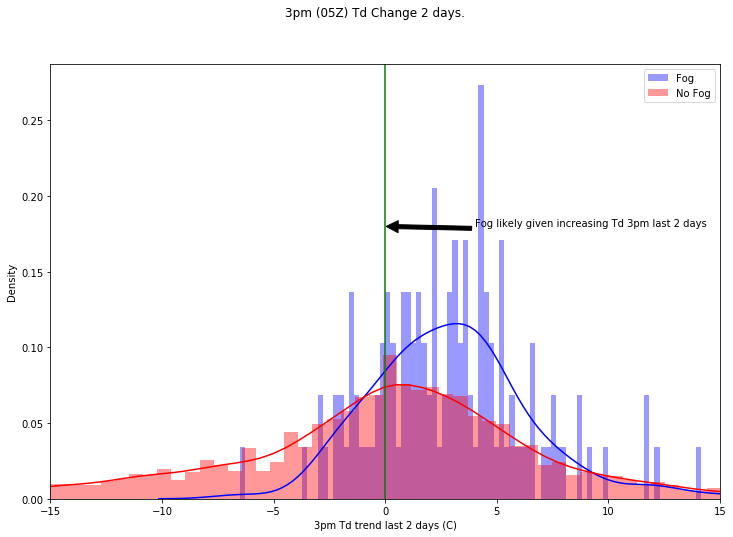

In [89]:
fg_JJA = fg_aut[( fg_aut.index.month.isin([5,6,7,8,9]))].dropna(subset=['fogflag','Td5_48hr'])
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12,8))#,sharex=True,sharey=True)
sns.distplot(fg_JJA.loc[fg_JJA['fogflag'],'Td5_48hr'].values, kde=True, color='blue', bins=100,ax=ax)
sns.distplot(fg_JJA.loc[~fg_JJA['fogflag'],'Td5_48hr'].values, kde=True, color='red', bins=100,ax=ax)

ax.legend(['Fog', 'No Fog'])
fig.suptitle(f'3pm (05Z) Td Change 2 days.')
ax.set_xlabel('3pm Td trend last 2 days (C)')
ax.set_ylabel('Density')
ax.set_xlim(-15,15)
ax.axvline(x=0,color='green')# ymin=0, ymax=1)
ax.annotate('Fog likely given increasing Td 3pm last 2 days', xy=(0, 0.18), xytext=(4, 0.18),
            arrowprops=dict(facecolor='black', shrink=0.01))

plt.savefig(f'./fg_plots/{sta}_3pm_Td_Fog_nofog_days_48HrTdTrend', format='eps', dpi=1000)

In [90]:
for td in [-1,0,1,2]:

    cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=(fg_aut['Td5_48hr']>td),
            margins=True)
    
    tn=cross.loc[False,False]
    fp=cross.loc[False,True]
    fn=cross.loc[True,False]
    tp=cross.loc[True,True]
    
    POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
    PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
    FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 
    
    ACC = (tn+tp)/(tn+tp+fp+fn)*100
    ERR = (fp+fn)/(tn+tp+fp+fn)*100
    
    print(f"\nTd5_48hr >{td:.2f}: TP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")
    
    print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
    tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
    Giving FPR or false alarm rate of {FAR:.0f}%')

    print(f'\nPOD (recall or TPR): {POD:.0f}% of the fog cases detected correctly' )
    print(f'{tn /cross.loc[False,"All"]*100:.0f}% of no fog days identified correctly.' )

    print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
    print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')
    
    if (POD > 60) & (FAR < 40):
        print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
    print(cross)
    print("============================================")
# best Td5_48hr trend > +1 , POD 66%, FAR 41%


Td5_48hr >-1.00: TP=147	FN=26	TN=2682	FP=4452

4599 days when fog forecast,
    tp=147 days or about 3% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 62%

POD (recall or TPR): 85% of the fog cases detected correctly
38% of no fog days identified correctly.

Overall Accuracy Rate: 39% (includes correct no fog predictions as well!)
Misclassification Rate: 61%  (wrong fog and no fog predictions)
Td5_48hr  False  True   All
fogflag                    
False      2682  4452  7134
True         26   147   173
All        2708  4599  7307

Td5_48hr >0.00: TP=134	FN=39	TN=3419	FP=3715

3849 days when fog forecast,
    tp=134 days or about 3% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 52%

POD (recall or TPR): 77% of the fog cases detected correctly
48% of no fog days identified correctly.

Overall Accuracy Rate: 49% (includes correct no fog predictions as well!)
Misclassification Rate: 51%  (wrong fog and no fog predictions)

In [91]:
cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=(fg_aut['Td5_48hr']>2),
            margins=True)
    
tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]
    
smry1.append(['Td5_48hr',tp,tn,fp,fn])
cross

Td5_48hr  False  True   All
fogflag                    
False      4908  2226  7134
True         79    94   173
All        4987  2320  7307

In [92]:
from scipy import stats

fg_JJA = fg_aut[( fg_aut.index.month.isin([5,6,7,8,9]))]
td5_fg_days    = fg_JJA.loc[fg_JJA['fogflag'],'Td5'].dropna().values
td5_no_fg_days = fg_JJA.loc[~fg_JJA['fogflag'],'Td5'].dropna().values

mean_td5_fg =np.median(td5_fg_days) #.mean()
mean_td5_no_fg =np.median(td5_no_fg_days) #.mean()

std_err_fg = td5_fg_days.std()/np.sqrt(len(td5_fg_days))
std_err_no_fg = td5_no_fg_days.std()/np.sqrt(len(td5_no_fg_days))

print(f'Mean Td at 3pm for fog days = {mean_td5_fg} with standard error of {std_err_fg}') 
print(f'Mean Td at 3pm for fog days = {mean_td5_no_fg} with standard error of {std_err_no_fg}') 

confidence = 0.9  # 90% CI
h=std_err_fg*stats.t.ppf((1+confidence)/2,len(td5_fg_days))
if mean_td5_fg-h <= 20 <= mean_td5_fg+h:
    interval_90_count*=1
       
'''
https://machinelearningmastery.com/confidence-intervals-for-machine-learning/

A confidence interval is a bounds on the estimate of a population variable. 
It is an interval statistic used to quantify the uncertainty on an estimate.

Commonly used number of standard deviations from the Gaussian distribution and their 
corresponding significance level are as follows:

1.64 (90%)
1.96 (95%)
2.33 (98%)
2.58 (99%)

interval = z * sqrt( (error * (1 - error)) / n)
'''
# Note Median Td 3 pm for fog days ~ 16C

# binomial confidence interval
from math import sqrt
interval = 1.64 * sqrt( (std_err_fg * (1 - std_err_fg)) / len(td5_fg_days))
print('%.3f' % interval)

Mean Td at 3pm for fog days = 15.7 with standard error of 0.22024429530302128
Mean Td at 3pm for fog days = 10.9 with standard error of 0.10933424826952434
0.060


In [93]:
'''
fg_days = fg_aut.loc[fg_aut['fogflag']]; 
fg_free_days = fg_aut.loc[~fg_aut['fogflag']]

mask = (fg_days['min_vis']<=2) & (fg_days['fg_duration']>=1)
bad_fg_days = fg_days.loc[mask]
not_in_bad_fg_days = \
    fg_aut.loc[(fg_aut.index).difference(bad_fg_days.index)]
'''

#  https://www.kite.com/python/answers/how-to-compute-the-confidence-interval-of-a-sample-statistic-in-python
'''
confidence_level = 0.95
degrees_freedom = sample.size - 1
sample_mean = np.mean(sample)
sample_standard_error = scipy.stats.sem(sample)
confidence_interval = scipy.stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
'''

from scipy import stats
from scipy.stats import sem, t
confidence_level = 0.90  # 90% confidence interval

fg_JJA = fg_aut[( fg_aut.index.month.isin([5,6,7,8,9]))]
td5_fg_days    = fg_JJA.loc[fg_JJA['fogflag'],'Td5'].dropna().values
td5_no_fg_days = fg_JJA.loc[~fg_JJA['fogflag'],'Td5'].dropna().values

mean_fg =    np.median(td5_fg_days) #.mean()
mean_fg =    np.mean(td5_fg_days)
mean_no_fg = np.median(td5_no_fg_days) #.mean()
mean_no_fg = np.mean(td5_no_fg_days)

se_fg =    td5_fg_days.std() / np.sqrt(len(td5_fg_days))
se_fg =   sem(td5_fg_days)  # sample_standard_error=scipy.stats.sem(sample)
se_no_fg = td5_no_fg_days.std()/np.sqrt(len(td5_no_fg_days))
se_no_fg= sem(td5_no_fg_days)

# n = len(data)  m = mean(data)  std_err = sem(data)


h1 = se_fg    * t.ppf((1 + confidence_level) / 2, len(td5_fg_days)    - 1)
h2 = se_no_fg * t.ppf((1 + confidence_level) / 2, len(td5_no_fg_days) - 1)

print(f'Mean Td at 3pm for fog days = {mean_fg:.1f} with standard error of {se_fg:.1f}\n90% Confidence Interval : {(mean_fg-h1):.1f} to {(mean_fg+h1):.1f}') 
print(f'Mean Td at 3pm for no fog days = {mean_no_fg:.1f} with standard error of {se_no_fg:.1f}\n90% Confidence Interval : {(mean_no_fg-h2):.1f} to {(mean_no_fg+h2):.1f}') 

degrees_freedom=len(td5_fg_days)- 1
confidence_interval = np.round(stats.t.interval(confidence_level, degrees_freedom, mean_fg, se_fg),1)
confidence_interval


Mean Td at 3pm for fog days = 15.4 with standard error of 0.2
90% Confidence Interval : 15.0 to 15.7
Mean Td at 3pm for no fog days = 9.7 with standard error of 0.1
90% Confidence Interval : 9.5 to 9.9


array([15. , 15.7])

In [94]:
print(td5_fg_days.std()/np.sqrt(len(td5_fg_days)),sem(td5_fg_days))
print(td5_no_fg_days.std()/np.sqrt(len(td5_no_fg_days)),sem(td5_no_fg_days))

0.22024429530302128 0.22111655335142308
0.10933424826952434 0.10935316913983464


In [95]:
'''
https://towardsdatascience.com/resampling-methods-for-inference-analysis-e75fecfefcb2
https://towardsdatascience.com/new-python-library-for-statistical-tests-simpler-than-statsmodels-richer-than-scipy-stats-ff380d4673c0
'''

td5 = fg_aut.loc[fg_aut.index.month.isin([6,7,8]),['fogflag','Td5','Td8','Td11']].dropna()
td5.loc[td5['fogflag'], 'Td5'] # extract Td5 values for fog days

# median
print(f"Median 3pm Td for fog days={np.median(td5.loc[td5['fogflag'], 'Td5']):.2f}, \
Median 3pm Td for non fog days={np.median(td5.loc[~td5['fogflag'], 'Td5']):.2f}")

# Mean 3pm Td fog days and non-fog days
print(f"\nMean 3pm Td for fog days={np.mean(td5.loc[td5['fogflag'], 'Td5']):.2f}, \
Mean 3pm Td for fog days={np.mean(td5.loc[~td5['fogflag'], 'Td5']):.2f}\n\n")

#95% Confidence Interval --> np.percentile(series, [2.5, 97.5])
print(f"95% Confidence Interval for 3pm Td fog days {np.percentile(td5.loc[td5['fogflag'], 'Td5'], [2.5, 97.5])}")
print(f"90% Confidence Interval for 3pm Td fog days {np.percentile(td5.loc[td5['fogflag'], 'Td5'], [5, 95])}")
print(f"80% Confidence Interval for 3pm Td fog days {np.percentile(td5.loc[td5['fogflag'], 'Td5'], [10, 90])}")
print(f"50% CI (IQR q1/25th to q3/75 percentile ??) {np.percentile(td5.loc[td5['fogflag'], 'Td5'], [25, 75])}")

Median 3pm Td for fog days=14.60, Median 3pm Td for non fog days=9.80

Mean 3pm Td for fog days=14.51, Mean 3pm Td for fog days=8.49


95% Confidence Interval for 3pm Td fog days [ 8.6 18.5]
90% Confidence Interval for 3pm Td fog days [10.3 18. ]
80% Confidence Interval for 3pm Td fog days [11.6 17.6]
50% CI (IQR q1/25th to q3/75 percentile ??) [13.7 16.1]


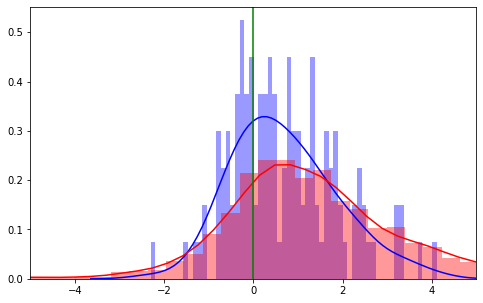

In [96]:
fg_JJA = fg_aut[( fg_aut.index.month.isin([5,6,7,8,9]))].dropna(subset=['fogflag','Td5to8'])
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8,5))#,sharex=True,sharey=True)
sns.distplot(fg_JJA.loc[fg_JJA['fogflag'],'Td5to8'].values, kde=True, color='blue', bins=100,ax=ax)
sns.distplot(fg_JJA.loc[~fg_JJA['fogflag'],'Td5to8'].values, kde=True, color='red', bins=100,ax=ax)
ax.set_xlim(-5,5)
ax.axvline(x=0,color='green')# ymin=0, ymax=1)

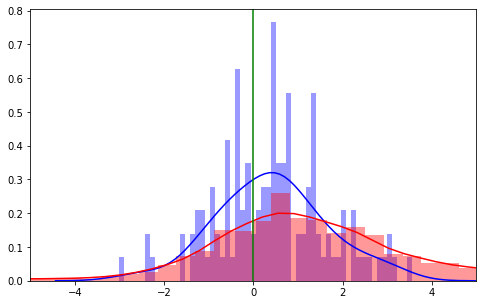

In [97]:
fg_JJA = fg_aut[( fg_aut.index.month.isin([5,6,7,8,9]))].dropna(subset=['fogflag','Td5to11'])
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8,5))#,sharex=True,sharey=True)
sns.distplot(fg_JJA.loc[fg_JJA['fogflag'],'Td5to11'].values, kde=True, color='blue', bins=100,ax=ax)
sns.distplot(fg_JJA.loc[~fg_JJA['fogflag'],'Td5to11'].values, kde=True, color='red', bins=100,ax=ax)
ax.set_xlim(-5,5)
ax.axvline(x=0,color='green')# ymin=0, ymax=1)

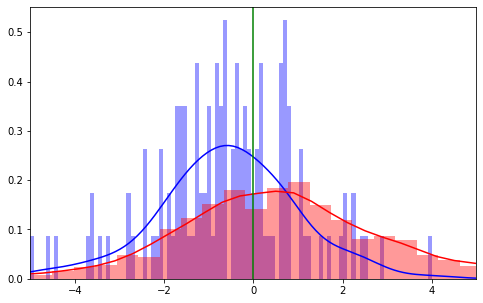

In [98]:
fg_JJA = fg_aut[( fg_aut.index.month.isin([5,6,7,8,9]))].dropna(subset=['fogflag','Td5to14'])
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8,5))#,sharex=True,sharey=True)
sns.distplot(fg_JJA.loc[fg_JJA['fogflag'],'Td5to14'].values, kde=True, color='blue', bins=100,ax=ax)
sns.distplot(fg_JJA.loc[~fg_JJA['fogflag'],'Td5to14'].values, kde=True, color='red', bins=100,ax=ax)
ax.set_xlim(-5,5)
ax.axvline(x=0,color='green')# ymin=0, ymax=1)

In [99]:
'''Dat is in wide/fat table format at the moment - makes some plotting tasks difficult with seaborn
We need to transform data into narrow but long format - using stack() to get columns into rows
stack(),pivot(),melt() basically do similar things - we use melt()

So only the columns where index/label starts with T or Td followed by one or more digit
only one or two digits \d{1,2}, \d* (says zero or more), \d+ (one or more)
'''
fg_aut.loc[:,(fg_aut.columns.str.contains(pat = '^(T|Td)\d+', regex = True))].tail()


/home/bou/py37/lib64/python3.7/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


T5   Td5    T8   Td8   T11  Td11   T14  Td14   T17  Td17  ...  \
2020-03-24  22.6  18.6  22.4  18.2  21.3  18.1  20.8  18.2  20.2  18.8  ...   
2020-03-25  25.7  16.0  21.8  16.0  20.7  16.6  19.1  17.3  17.5  16.1  ...   
2020-03-26  26.6  17.5  23.7  18.1  23.5  18.6  20.4  19.0  19.9  18.0  ...   
2020-03-27  23.0  17.9  21.0  16.2  20.8  15.9  19.7  15.5  18.8  15.0  ...   
2020-03-28  25.7  18.6  23.1  19.7  22.3  19.6  21.5  19.1  19.2  18.7  ...   

            Td5to8  Td5to11  Td5to14  Td5to17  Td8to11  Td8to14  Td8to17  \
2020-03-24    -0.4     -0.5     -0.4      0.2     -0.1      0.0      0.6   
2020-03-25     0.0      0.6      1.3      0.1      0.6      1.3      0.1   
2020-03-26     0.6      1.1      1.5      0.5      0.5      0.9     -0.1   
2020-03-27    -1.7     -2.0     -2.4     -2.9     -0.3     -0.7     -1.2   
2020-03-28     1.1      1.0      0.5      0.1     -0.1     -0.6     -1.0   

            Td11to14  Td11to17  Td14to17  
2020-03-24       0.1       0.7       0.6  
2020-03-25       0.7      -0.5      -1.2  
2020-03-26       0.4      -0.6      -1.0  
2020-03-27      -0.4      -0.9      -0.5  
2020-03-28      -0.5      -0.9      -0.4  

[5 rows x 31 columns]

In [100]:
''' ******   Temperature Melt()  '''
dfT = pd.melt(
    fg_aut.loc[:,(fg_aut.columns.str.contains(pat = '^T\d+', regex = True))].reset_index(),
              id_vars='index',
              value_vars=['T5','T8','T11','T14','T17','T20'],
              var_name='T',
              value_name="T_val")
#print(dfT.loc[dfT['index']=='2020-03-17'].tail(),"\n")
dfT.set_index(keys=pd.to_datetime(dfT['index']), drop=True,inplace=bool(1))
#print(dfT.loc[dfT['index']=='2020-03-17'].tail(),"\n")
dfT.drop(columns=['index'],inplace=bool(1))
dfT.loc['2020-03-17'].tail(6)

T  T_val
index                 
2020-03-17   T5   24.9
2020-03-17   T8   23.0
2020-03-17  T11   21.7
2020-03-17  T14   18.7
2020-03-17  T17   17.3
2020-03-17  T20   17.0

In [101]:
# Now the data for each synop time is in different rows we can plot data for different synop times in same plot


''' ******   Temperature Melt()  '''
dfT = pd.melt(
    fg_aut.loc[:,(fg_aut.columns.str.contains(pat = '^T\d+', regex = True))].reset_index(),
              id_vars='index',
              value_vars=['T5','T8','T11','T14','T17','T20'],
              var_name='T',
              value_name="T_val")
dfT.set_index(keys=pd.to_datetime(dfT['index']), drop=True,inplace=bool(1))
dfT.drop(columns=['index'],inplace=bool(1))

''' ******   Dewpoint Melt()  '''
dfTd = pd.melt(
    fg_aut.loc[:,(fg_aut.columns.str.contains(pat = '^Td\d+',
                                                         regex = True))].reset_index(),
              id_vars='index',
              value_vars=['Td5','Td8','Td11','Td14','Td17','Td20'],
              var_name='Td',
              value_name="Td_val")
dfTd.set_index(keys=pd.to_datetime(dfTd['index']), drop=True,inplace=bool(1))
dfTd.drop(columns=['index'],inplace=bool(1))

''' ******   Seperation Melt()  '''
dfTmTd =  pd.melt(
    fg_aut.loc[:,(fg_aut.columns.str.contains("TmTd\d+"))].reset_index(),
              id_vars='index',
              value_vars=['TmTd5','TmTd8','TmTd11','TmTd14','TmTd17','TmTd20'],
              var_name='TmTd',
              value_name="TmTd_val")
dfTmTd.set_index(keys=pd.to_datetime(dfTmTd['index']), drop=True,inplace=bool(1))
dfTmTd.drop(columns=['index'],inplace=bool(1))

''' ******   RH Melt()  '''
dfRH = pd.melt(
    fg_aut.loc[:,(fg_aut.columns.str.contains("RH\d+"))].reset_index(),
              id_vars='index',
              value_vars=['RH5','RH8','RH11','RH14','RH17','RH20'],
              var_name='RH',
              value_name="RH_val")
dfRH.set_index(keys=pd.to_datetime(dfRH['index']), drop=True,inplace=bool(1))
dfRH.drop(columns=['index'],inplace=bool(1))

''' ******   QNH Melt()  '''
dfQNH = pd.melt(
    fg_aut.loc[:,(fg_aut.columns.str.contains("QNH\d+"))].reset_index(),
              id_vars='index',
              value_vars=['QNH5','QNH8','QNH11','QNH14','QNH17','QNH20'],
              var_name='QNH',
              value_name="QNH_val")
dfQNH.set_index(keys=pd.to_datetime(dfQNH['index']), drop=True,inplace=bool(1))
dfQNH.drop(columns=['index'],inplace=bool(1))

''' ******   Precip Melt()  '''
dfpptn = pd.melt(
    fg_aut.loc[:,(fg_aut.columns.str.contains("pptn\d+"))].reset_index(),
              id_vars='index',
              value_vars=['pptn5','pptn8','pptn11','pptn14','pptn17','pptn20'],
              var_name='pptn',
              value_name="pptn_val")
dfpptn.set_index(keys=pd.to_datetime(dfpptn['index']), drop=True,inplace=bool(1))
dfpptn.drop(columns=['index'],inplace=bool(1))

''' ******   Surface Wind SPD Melt()  '''
dfwspd = pd.melt(
    fg_aut.loc[:,(fg_aut.columns.str.contains("wspd\d+"))].reset_index(),
              id_vars='index',
              value_vars=['wspd5','wspd8','wspd11','wspd14','wspd17','wspd20'],
              var_name='wspd',
              value_name="wspd_val")
dfwspd.set_index(keys=pd.to_datetime(dfwspd['index']), drop=True,inplace=bool(1))
dfwspd.drop(columns=['index'],inplace=bool(1))

''' ******   Surface Wind DIR Melt()  '''
dfwdir = pd.melt(
    fg_aut.loc[:,(fg_aut.columns.str.contains("wdir\d+"))].reset_index(),
              id_vars='index',
              value_vars=['wdir5','wdir8','wdir11','wdir14','wdir17','wdir20'],
              var_name='wdir',
              value_name="wdir_val")
dfwdir.set_index(keys=pd.to_datetime(dfwdir['index']), drop=True,inplace=bool(1))
dfwdir.drop(columns=['index'],inplace=bool(1))

''' JOIN THE INDIVIDUAL DATA FRAMES - COLUMN WISE JOIN AXIS=1 '''
fg_temp = pd.concat([dfT,dfTd,dfTmTd,dfRH,dfQNH,dfpptn,dfwspd,dfwdir], axis=1,join='inner')
fg_temp.shape
fg_temp.head()

'''  MERGE fogflag from original fg data '''
fg_melt = fg_temp.merge(fg_aut['fogflag'],left_index=True,right_index=True,how='left')
fg_melt.loc['2019-06-20']

T  T_val    Td  Td_val    TmTd  TmTd_val    RH  RH_val    QNH  \
2019-06-20   T5   19.6   Td5    11.0   TmTd5       8.6   RH5    58.0   QNH5   
2019-06-20   T8   18.2   Td8    12.0   TmTd8       6.2   RH8    67.0   QNH8   
2019-06-20  T11   17.3  Td11    12.4  TmTd11       4.9  RH11    73.0  QNH11   
2019-06-20  T14   16.5  Td14    11.7  TmTd14       4.8  RH14    73.0  QNH14   
2019-06-20  T17   16.1  Td17    11.5  TmTd17       4.6  RH17    74.0  QNH17   
2019-06-20  T20   14.5  Td20    10.9  TmTd20       3.6  RH20    79.0  QNH20   

            QNH_val    pptn  pptn_val    wspd  wspd_val    wdir  wdir_val  \
2019-06-20   1019.3   pptn5       0.0   wspd5       5.0   wdir5     180.0   
2019-06-20   1020.3   pptn8       0.0   wspd8       4.0   wdir8     170.0   
2019-06-20   1020.5  pptn11       0.0  wspd11       5.0  wdir11     180.0   
2019-06-20   1019.7  pptn14       0.0  wspd14       7.0  wdir14     210.0   
2019-06-20   1018.8  pptn17       0.0  wspd17       8.0  wdir17     210.0   
2019-06-20   1018.4  pptn20       0.0  wspd20       7.0  wdir20     210.0   

            fogflag  
2019-06-20    False  
2019-06-20    False  
2019-06-20    False  
2019-06-20    False  
2019-06-20    False  
2019-06-20    False

In [102]:
print(fg_melt.columns)
fg_aut.loc[:,(fg_aut.columns.str.contains("wdir\d+"))].tail(2)

Index(['T', 'T_val', 'Td', 'Td_val', 'TmTd', 'TmTd_val', 'RH', 'RH_val', 'QNH',
       'QNH_val', 'pptn', 'pptn_val', 'wspd', 'wspd_val', 'wdir', 'wdir_val',
       'fogflag'],
      dtype='object')


wdir5  wdir8  wdir11  wdir14  wdir17  wdir20
2020-03-27  170.0  150.0   190.0   200.0   200.0   220.0
2020-03-28  120.0   90.0   120.0   130.0   210.0   250.0

Int64Index([2012, 2016, 2017, 2015, 2007, 2018, 2014, 2013, 2019, 2010, 2009,
            2008, 2006, 2005, 2003, 2004, 2011, 2000, 2002, 2001, 2020],
           dtype='int64')


[Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019')]

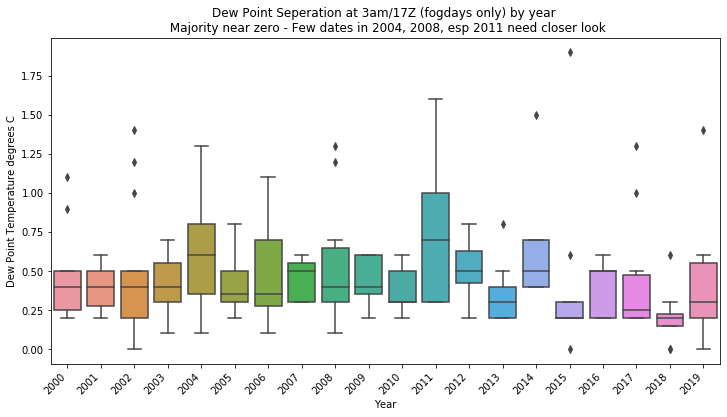

In [103]:
# simple way to get unique values for range of years for data
print(fg_aut.index.year.value_counts().index)

# xlabels = [dict_mon[x+1] for x in g.get_xticks()]
# g.set_xticklabels(xlabels)

fg_MJJAS = fg_melt[( fg_melt.index.month.isin([5,6,7,8,9]))]
'''
https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib
https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-1-29c9478a8700
'''
fig, ax = plt.subplots(1, 1, figsize=(12,6))
#ax.set_xlim=(5,9)
#ax.set_ylim=0,5
dat = fg_aut.loc[fg_aut['fogflag'] & (fg_aut['TmTd17']< 2)]
sns.boxplot(x=dat.index.year,
            y='TmTd17', 
            ax=ax, data=dat)
ax.set_title("Dew Point Seperation at 3am/17Z (fogdays only) by year "+"\n"+" Majority near zero - Few dates in 2004, 2008, esp 2011 need closer look")
ax.set_xlabel("Year")
ax.set_ylabel("Dew Point Temperature degrees C")
#print(list(ax.get_xticklabels()))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


{0: '3 pm', 1: '6 pm', 2: '9 pm', 3: '12 am', 4: '3 am', 5: '6 am'}
['3 pm', '6 pm', '9 pm', '12 am', '3 am', '6 am']


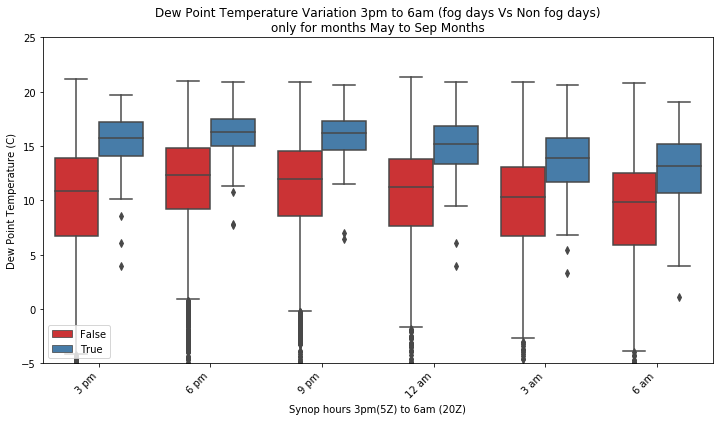

In [104]:
fg_MJJAS = fg_melt[( fg_melt.index.month.isin([5,6,7,8,9]))]
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(x='Td',
            y='Td_val',
            data=fg_MJJAS,
            ax=ax,hue='fogflag', palette='Set1')

dict_synop_times=dict(zip(ax.get_xticks(),['3 pm','6 pm','9 pm','12 am','3 am','6 am']))
print(dict_synop_times)

ax.set_title("Dew Point Temperature Variation 3pm to 6am (fog days Vs Non fog days)"+"\n"+"only for months May to Sep Months")
xlabels = [dict_synop_times[x] for x in ax.get_xticks()]
print(xlabels)
ax.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel("Synop hours 3pm(5Z) to 6am (20Z)")
ax.set_ylabel("Dew Point Temperature (C)")
if station in ['YTWB','YBOK','YBWW']:
    ax.set_ylim(-10,20)#fg_MJJAS['Td_val'].max())
else:
    ax.set_ylim(-5,25)#fg_MJJAS['Td_val'].max())
ax.legend(loc='lower left')

plt.savefig(f'./fg_plots/{sta}_3pm_to_6am_Td_variation_fog_nofog_days', format='eps', dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


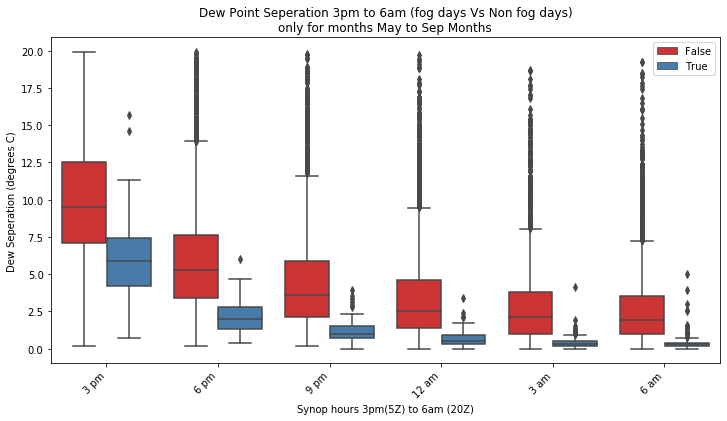

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(x='TmTd',
            y='TmTd_val',
            data=fg_MJJAS.loc[fg_MJJAS['TmTd_val'] < 20],
            ax=ax,hue='fogflag', palette='Set1')

ax.set_title("Dew Point Seperation 3pm to 6am (fog days Vs Non fog days)"+             "\nonly for months May to Sep Months")
xlabels = [dict_synop_times[x] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel("Synop hours 3pm(5Z) to 6am (20Z)")
ax.set_ylabel("Dew Seperation (degrees C)")
#ax.set_xlim=(5,9)
#ax.set_ylim=(0,25)
ax.legend(loc='upper right')

plt.savefig(f'./fg_plots/{sta}_3pm_to_6am_TdSeperation_variation_fog_nofog_days', format='eps', dpi=1000)

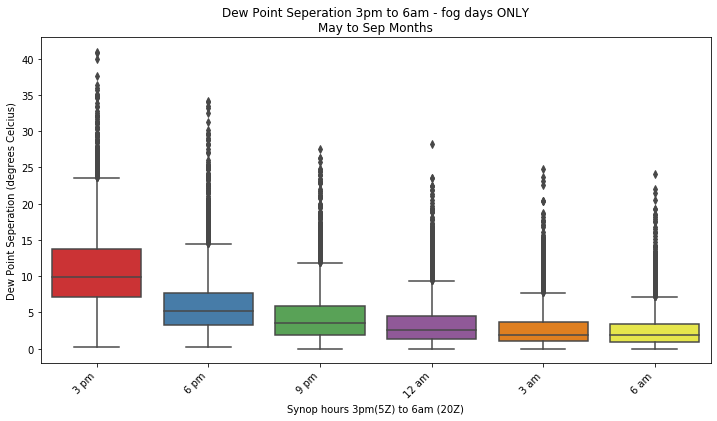

In [106]:
fg_aut.loc[:,(fg_aut.columns.str.contains("TmTd"))].describe()
tmtd_fog_days = fg_aut.loc[fg_aut['fogflag']]

'''Note that for fog days the 14Z and 17Z seperation is <1C in about 75% of the fog cases
Actually middle 50% of cases is between 0.4 to 0.6 @ 14Z, lowest 0.2 to 0.4 @17Z
Replace fog search using Temeprature (no predictabily - see below - with Td Seperation)
'''
tmtd_fog_days.loc[:,(tmtd_fog_days.columns.str.contains("TmTd"))].describe()
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(x='TmTd',
            y='TmTd_val',
            data=fg_MJJAS, #.loc[fg_MJJAS['TmTd_val'] < 20],
            ax=ax,palette='Set1')

ax.set_title("Dew Point Seperation 3pm to 6am - fog days ONLY"+"\nMay to Sep Months")
xlabels = [dict_synop_times[x] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
ax.set_xlabel("Synop hours 3pm(5Z) to 6am (20Z)")
ax.set_ylabel("Dew Point Seperation (degrees Celcius)")
#ax.legend(loc='upper right')

plt.savefig(f'./fg_plots/{sta}_3pm_to_6am_Td_variation_fog_days', format='eps', dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

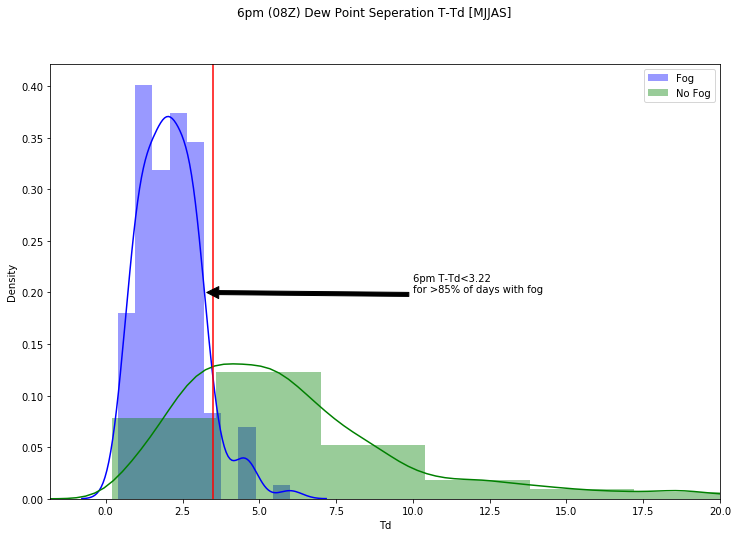

In [107]:

'''
Note that for 6pm Td depression between 0 and about 3, 
the density of fog outcomes is 3 to 4 times density of no fog outcomes
i.e chance of fog on such days 3 to 4 times higher than no fog outcome
'''

fg_JJA = fg_aut[( fg_aut.index.month.isin([5,6,7,8,9]))].dropna(subset=['fogflag','TmTd8'])
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12,8))#,sharex=True,sharey=True)
sns.distplot(fg_JJA.loc[fg_JJA['fogflag'],'TmTd8'].values, kde=True, color='blue', bins=10,ax=ax)
sns.distplot(fg_JJA.loc[~fg_JJA['fogflag'],'TmTd8'].values, kde=True, color='green', bins=10,ax=ax)

ax.legend(['Fog', 'No Fog'])
fig.suptitle(f'6pm (08Z) Dew Point Seperation T-Td [MJJAS]')
ax.set_xlabel('Td')
ax.set_xlim(fg_JJA['TmTd8'].min()-2,20)
ax.set_ylabel('Density')
ax.axvline(x=3.5,color='red')# ymin=0, ymax=1)
ax.annotate(f"6pm T-Td<{fg_aut.loc[fg_aut['fogflag']]['TmTd8'].quantile(.85):.2f}\nfor >85% of days with fog",
            xy=(fg_aut.loc[fg_aut['fogflag']]['TmTd8'].quantile(.85), 0.2), xytext=(10, 0.2),
            arrowprops=dict(facecolor='black', shrink=0.01))

plt.savefig(f'./fg_plots/{sta}_6pm_Td_Seperation_fog_nofog_days_annotation', format='eps', dpi=1000)

In [108]:
cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd5'] < 7,
            margins=True)

tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

print(cross,"\n")
smry1.append(['TmTd5_lt7',tp,tn,fp,fn])



cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd8'] < 3.2,
            margins=True)

tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 

ACC = (tn+tp)/(tn+tp+fp+fn)*100
ERR = (fp+fn)/(tn+tp+fp+fn)*100

smry1.append(['TmTd8_lt3',tp,tn,fp,fn])

print(f"\nTP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")

print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
Giving FPR or false alarm rate of {FAR:.0f}%')

print(f'\nPOD (recall or TPR): {POD:.0f}% of the {tp+fn} fog cases detected correctly' )
print(f'{tn /cross.loc[False,"All"]*100:.0f}% of the {fp+tn} no fog days identified correctly.' )

print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')

if (POD > 60) & (FAR < 40):
    print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
cross

TmTd5    False  True   All
fogflag                   
False     5122  2012  7134
True        57   116   173
All       5179  2128  7307 


TP=146	FN=27	TN=5835	FP=1299

1445 days when fog forecast,
tp=146 days or about 10% of the days actually get fog [precision].
Giving FPR or false alarm rate of 18%

POD (recall or TPR): 84% of the 173 fog cases detected correctly
82% of the 7134 no fog days identified correctly.

Overall Accuracy Rate: 82% (includes correct no fog predictions as well!)
Misclassification Rate: 18%  (wrong fog and no fog predictions)

###########################
CONSIDER THIS CONDITION FOR FOG FORECASTING!


TmTd8    False  True   All
fogflag                   
False     5835  1299  7134
True        27   146   173
All       5862  1445  7307

In [109]:
#https://mode.com/example-gallery/python_dataframe_styling/
# https://towardsdatascience.com/style-pandas-dataframe-like-a-master-6b02bf6468b0
def color_tmtd(value):
  """
  Colors elements in a dateframe green if TmTd < 1 
  and red if TmTd < 1. Else leave it black.
  """

  if value < 1:
    color = 'green'
  elif value > 2:
    color = 'red'
  else:
    color = 'black'

  return 'color: %s' % color

# see 95% quantile value for 6pm T-Td for fog =True days
julyTmTd = fg_aut.loc[fg_aut.index.month.isin([6,7,8]),\
                      ['fogflag','TmTd5','TmTd8','TmTd11','TmTd14','TmTd17','TmTd20']].\
                groupby(['fogflag']).\
                quantile(q=(0.05,0.2,0.5,0.8,0.95))

#julyTmTd.loc[idx[True,:], ['TmTd5','TmTd8']].style.\
julyTmTd.loc[:, ['TmTd5','TmTd8']].style.\
applymap(color_tmtd, subset=['TmTd8']) # only styling 3pm T-Td
#format({'TmTd8': "{:.2%}"}) to applay any foramting as well

In [110]:
# can also check for rain/no rain seperation as well
julyTmTd = fg_aut.loc[fg_aut.index.month.isin([6,7,8]),\
                      ['rain_flag','fogflag','TmTd5','TmTd8','TmTd11','TmTd14','TmTd17','TmTd20']].\
                groupby(['rain_flag','fogflag']).\
                quantile(q=(0.05,0.2,0.5,0.8,0.95))

julyTmTd.loc[idx[:,True,:], ['TmTd5','TmTd8']].style.\
applymap(color_tmtd, subset=['TmTd8']) # only styling 3pm T-Td

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


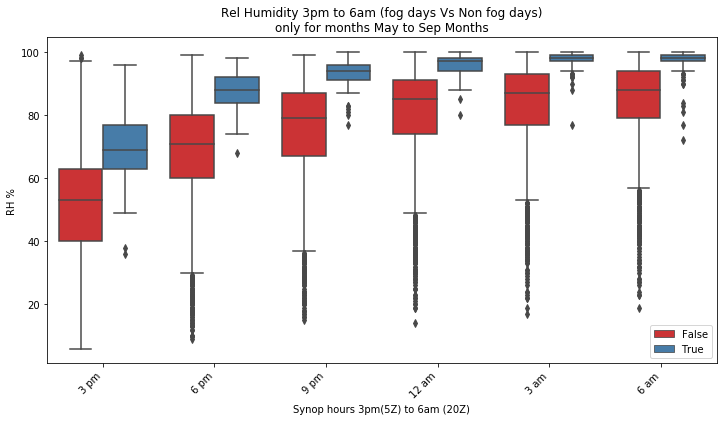

In [111]:
'''Note that for fog days the 14Z and 17Z RH is 94% or 96% in about 75% of the fog cases
Actually middle 50% of cases is between 94 to 96 @ 14Z, and 96-97% @17Z
Note no overlap of mid 50% distribution between fog and non fog days
    Fog days 75% of cases have RH > 94/96% @14/17Z
non Fog days 75% of cases have RH < 89/92% @14/17Z
Excellent prediction variable for fog
Replace fog search using Temperature (no predictabily - see below - with RH)
'''
# fog_days.loc[:,(fog_days.columns.str.contains("RH"))].describe()

#fig=plt.figure(figsize=(10,5))
#ax = fig.add_axes([0, 0, 1, 1])
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(x='RH',
            y='RH_val',
            data=fg_MJJAS,#.loc[fg_MJJAS['RH_val'] > 40],
            ax=ax,hue='fogflag', palette='Set1')

ax.set_title("Rel Humidity 3pm to 6am (fog days Vs Non fog days)"+             "\nonly for months May to Sep Months")
xlabels = [dict_synop_times[x] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
ax.set_xlabel("Synop hours 3pm(5Z) to 6am (20Z)")
ax.set_ylabel("RH %")
ax.legend(loc='lower right')

plt.savefig(f'./fg_plots/{sta}_3pm_to_6am_RH_variation_fog_days', format='eps', dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

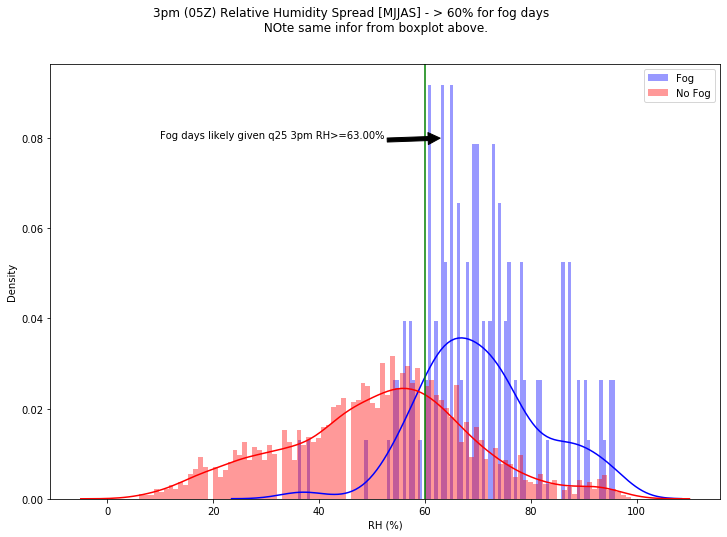

In [112]:
fg_JJA = fg_aut[( fg_aut.index.month.isin([5,6,7,8,9]))].dropna(subset=['fogflag','RH5'])
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(12,8))#,sharex=True,sharey=True)
sns.distplot(fg_JJA.loc[fg_JJA['fogflag'],'RH5'].values, kde=True, color='blue', bins=100,ax=ax)
sns.distplot(fg_JJA.loc[~fg_JJA['fogflag'],'RH5'].values, kde=True, color='red', bins=100,ax=ax)

ax.legend(['Fog', 'No Fog'])
fig.suptitle(f'3pm (05Z) Relative Humidity Spread [MJJAS] - > 60% for fog days            \n NOte same infor from boxplot above.')
ax.set_xlabel('RH (%)')
ax.set_ylabel('Density')
ax.axvline(x=60,color='green')# ymin=0, ymax=1)
ax.annotate(f"Fog days likely given q25 3pm RH>={fg_aut.loc[fg_aut['fogflag']]['RH5'].quantile(.25):.2f}%",
            xy=(fg_aut.loc[fg_aut['fogflag']]['RH5'].quantile(.25), 0.08), xytext=(10, 0.08),
            arrowprops=dict(facecolor='black', shrink=0.01))

plt.savefig(f'./fg_plots/{sta}_3pm_RH_Fog_nofog_days_MJJAS_q50_annotation', format='eps', dpi=1000)

In [113]:
cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['RH5'] > 65,
            margins=True)

tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

print(cross,"\n")
smry1.append(['RH5_gt65',tp,tn,fp,fn])

RH5      False  True   All
fogflag                   
False     5148  1986  7134
True        61   112   173
All       5209  2098  7307 



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


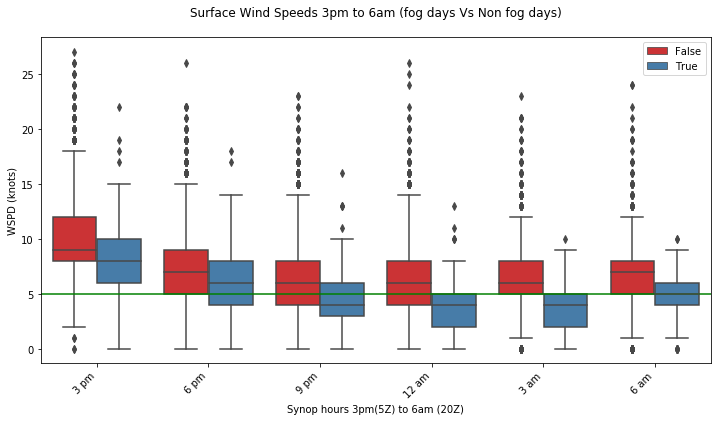

In [114]:
# Rule out fog at YBBN if winds greater than 10 knots 9pm onwards 
# best conditions winds less than 5 knots 12am onwards.

fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(x='wspd',
            y='wspd_val',
            data=fg_MJJAS,
            ax=ax,hue='fogflag', palette='Set1')

ax.set_title("Surface Wind Speeds 3pm to 6am (fog days Vs Non fog days)"+
             "\n"+"")
xlabels = [dict_synop_times[x] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
ax.set_xlabel("Synop hours 3pm(5Z) to 6am (20Z)")
ax.set_ylabel("WSPD (knots)")
ax.legend(loc='upper right')
ax.axhline(y=5,color='green',linestyle='-')# ymin=0, ymax=1)
#ax.axhline(y=10,color='green',linestyle='-')# ymin=0, ymax=1)
#ax.annotate('Fog days likely given 3pm RH>=60%', xy=(60, 0.08), xytext=(10, 0.08),
#            arrowprops=dict(facecolor='black', shrink=0.01))


plt.savefig(f'./fg_plots/{sta}_SynopHoursWinds_fog_nofog_days_MJJAS', format='eps', dpi=1000)

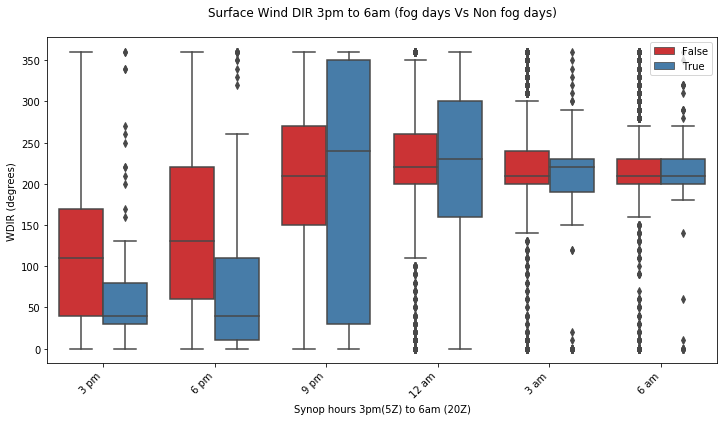

In [115]:
# Note this is not the best plot cause it treats wind dir as a numeric quantity
# However visual does suggest that fog more likely at YBBN for winds from NE quadrant 3pm and 6pm - actually about 3 times as likely for winds about and north of NE, ie.e for directions NE,NNE and N.

fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(x='wdir',
            y='wdir_val',
            data=fg_MJJAS,
            ax=ax,hue='fogflag', palette='Set1')

ax.set_title("Surface Wind DIR 3pm to 6am (fog days Vs Non fog days)"+
             "\n"+"")
xlabels = [dict_synop_times[x] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
ax.set_xlabel("Synop hours 3pm(5Z) to 6am (20Z)")
ax.set_ylabel("WDIR (degrees)")
ax.legend(loc='upper right')

## >75% 0f cases sfc wind direction 3pm < 80 and 6pm <100 for fog days

## > 75% of cases sfc wind speeds <= 5 at 12am and 3am fog days

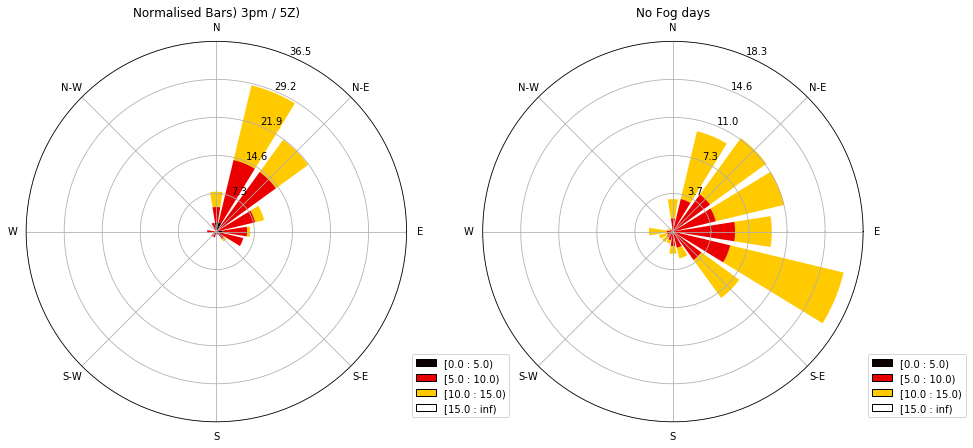

In [116]:
from windrose import WindroseAxes
from windrose import plot_windrose
import matplotlib.cm as cm

wind_3pm_fg = fg_days[['wdir5', 'wspd5']].rename( columns={'wdir5': 'direction', 'wspd5': 'speed'})
wind_3pm_nofg = fg_free_days[['wdir5', 'wspd5']].rename( columns={'wdir5': 'direction', 'wspd5': 'speed'})

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,
                              figsize=(15,12), 
                              subplot_kw=dict(projection='windrose')) #,sharex=True, sharey=True)

if station == 'YTWB':
    plot_windrose(wind_3pm_fg, kind='bar', 
              normed=True, bins=np.arange(0,30,5), 
              cmap=cm.hot, lw=3,ax=ax1)
    plot_windrose(wind_3pm_nofg, kind='bar', 
              normed=True, bins=np.arange(0,30,5), 
              cmap=cm.hot, lw=3,ax=ax2)
else:
    plot_windrose(wind_3pm_fg, kind='bar', 
              normed=True, bins=np.arange(0,20,5), 
              cmap=cm.hot, lw=3,ax=ax1)
    plot_windrose(wind_3pm_nofg, kind='bar', 
              normed=True, bins=np.arange(0,20,5), 
              cmap=cm.hot, lw=3,ax=ax2)
    
    
ax1.legend(bbox_to_anchor=(1, 0))
ax1.set_title("Normalised Bars) 3pm / 5Z)")
#ax2.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
    
ax2.legend(bbox_to_anchor=(1, 0))
ax2.set_title("No Fog days")

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


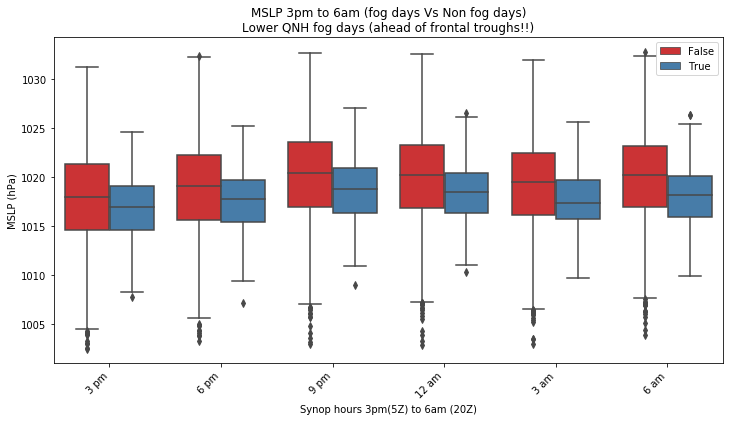

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(x='QNH',
            y='QNH_val',
            data=fg_MJJAS.loc[fg_MJJAS['QNH_val'] > 1002],
            ax=ax,hue='fogflag', palette='Set1')

ax.set_title("MSLP 3pm to 6am (fog days Vs Non fog days)"+
             "\n"+"Lower QNH fog days (ahead of frontal troughs!!)")
xlabels = [dict_synop_times[x] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
ax.set_xlabel("Synop hours 3pm(5Z) to 6am (20Z)")
ax.set_ylabel("MSLP (hPa)")
ax.legend(loc='upper right')

plt.savefig(f'./fg_plots/{sta}_MSLP_SynopHours_fog_nofog_days', format='eps', dpi=1000)

Text(0, 0.5, 'Density')

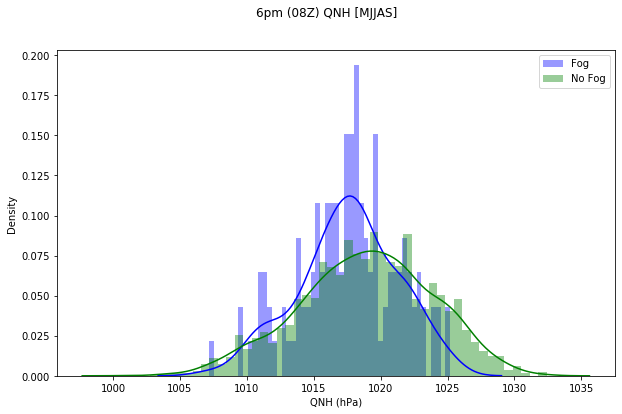

In [118]:
fg_JJA = fg_aut[( fg_aut.index.month.isin([5,6,7,8,9]))].dropna(subset=['fogflag','QNH8'])
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,6))#,sharex=True,sharey=True)
sns.distplot(fg_JJA.loc[fg_JJA['fogflag'],'QNH8'].values, kde=True, color='blue', bins=50,ax=ax)
sns.distplot(fg_JJA.loc[~fg_JJA['fogflag'],'QNH8'].values, kde=True, color='green', bins=50,ax=ax)

ax.legend(['Fog', 'No Fog'])
fig.suptitle(f'6pm (08Z) QNH [MJJAS]')
ax.set_xlabel('QNH (hPa)')
ax.set_ylabel('Density')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

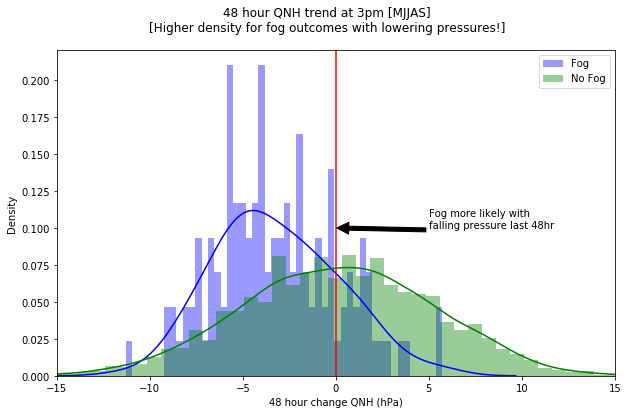

In [119]:
# QNH at synop times are NOT VERY GOOD DISCRIMINATOR between Fog/No Fog Events! BUT QNH trends do.
# 
# Note the quite Bell shaped/normal distribution 48hr change in QNH trend QNH(12am)
# QNH(-48hr) at for no fog outcomes. For fog days however, strongly skewed with majority lowering QNH trend - i.e below 0hpa. Some overlap with no fog outcomes but lowering QNH more convinving for fog outcomes. Some value in considering 24/28 hr QNH trend as fog predictor for YBBN at least.


'''
Density of fog outcomes at least 2 times that of non fog for QNH trend between -3 and -8
'''

fg_JJA = fg_aut[( fg_aut.index.month.isin([5,6,7,8,9]))].dropna(subset=['QNH5_48hr'])
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,6))#,sharex=True,sharey=True)
sns.distplot(fg_JJA.loc[fg_JJA['fogflag'],'QNH5_48hr'].values, kde=True, color='blue', bins=50,ax=ax)
sns.distplot(fg_JJA.loc[~fg_JJA['fogflag'],'QNH5_48hr'].values, kde=True, color='green', bins=50,ax=ax)

ax.legend(['Fog', 'No Fog'])
fig.suptitle('48 hour QNH trend at 3pm [MJJAS]\n[Higher density for fog outcomes with lowering pressures!]')
ax.set_xlabel('48 hour change QNH (hPa)')
ax.set_ylabel('Density')
ax.set_xlim(-15,15)
ax.axvline(x=0,color='red')# ymin=0, ymax=1)
ax.annotate('Fog more likely with\nfalling pressure last 48hr', xy=(0, 0.1), xytext=(5, 0.1),
            arrowprops=dict(facecolor='black', shrink=0.01))

plt.savefig(f'./fg_plots/{sta}_3pm_MSLP_48hr_Trend_fog_nofog_days', format='eps', dpi=1000)

In [120]:
# 48 hour pressure drop of more than 2hPa
cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['QNH5_48hr'] < -3,
            margins=True)

tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

smry1.append(['QNH5_48hr_ltm3',tp,tn,fp,fn])

POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 

ACC = (tn+tp)/(tn+tp+fp+fn)*100
ERR = (fp+fn)/(tn+tp+fp+fn)*100

print(f"\nTP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")

print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
Giving FPR or false alarm rate of {FAR:.0f}%')

print(f'\nPOD (recall or TPR): {POD:.0f}% of the {tp+fn} fog cases detected correctly' )
print(f'{tn /cross.loc[False,"All"]*100:.0f}% of the {fp+tn} no fog days identified correctly.' )

print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')

if (POD > 60) & (FAR < 40):
    print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
cross



TP=92	FN=81	TN=5296	FP=1838

1930 days when fog forecast,
tp=92 days or about 5% of the days actually get fog [precision].
Giving FPR or false alarm rate of 26%

POD (recall or TPR): 53% of the 173 fog cases detected correctly
74% of the 7134 no fog days identified correctly.

Overall Accuracy Rate: 74% (includes correct no fog predictions as well!)
Misclassification Rate: 26%  (wrong fog and no fog predictions)


QNH5_48hr  False  True   All
fogflag                     
False       5296  1838  7134
True          81    92   173
All         5377  1930  7307

Text(0, 0.5, 'Temperature (degrees C)')

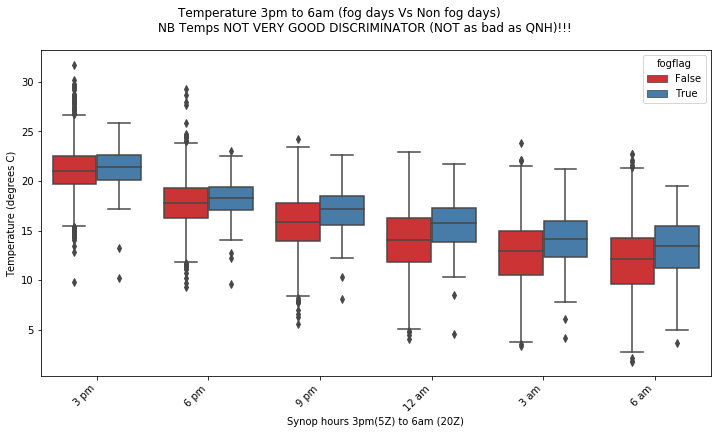

In [121]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(x='T',
            y='T_val',
            data=fg_MJJAS,
            ax=ax,hue='fogflag', palette='Set1')

fig.suptitle(f'Temperature 3pm to 6am (fog days Vs Non fog days)             \nNB Temps NOT VERY GOOD DISCRIMINATOR (NOT as bad as QNH)!!!')
xlabels = [dict_synop_times[x] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
ax.set_xlabel("Synop hours 3pm(5Z) to 6am (20Z)")
ax.set_ylabel("Temperature (degrees C)")

Text(0, 0.5, 'Density')

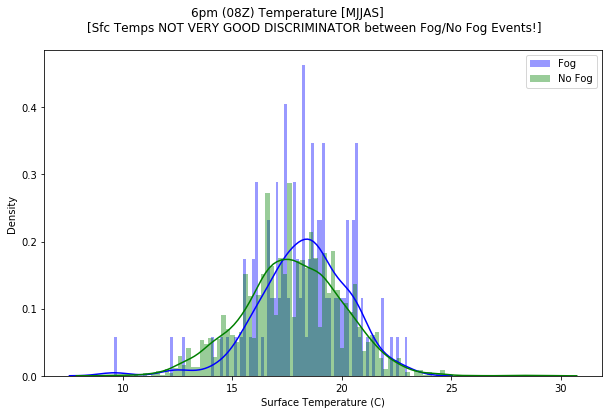

In [122]:
fg_JJA = fg_aut[( fg_aut.index.month.isin([5,6,7,8,9]))].dropna(subset=['fogflag','T8'])
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,6))#,sharex=True,sharey=True)
sns.distplot(fg_JJA.loc[fg_JJA['fogflag'],'T8'].values, kde=True, color='blue', bins=100,ax=ax)
sns.distplot(fg_JJA.loc[~fg_JJA['fogflag'],'T8'].values, kde=True, color='green', bins=100,ax=ax)

ax.legend(['Fog', 'No Fog'])
fig.suptitle('6pm (08Z) Temperature [MJJAS]              \n[Sfc Temps NOT VERY GOOD DISCRIMINATOR between Fog/No Fog Events!]')
ax.set_xlabel('Surface Temperature (C)')
ax.set_ylabel('Density')

Text(2.5, 0.4, 'Fog more likely with\nlowering seperation last 24/48hr')

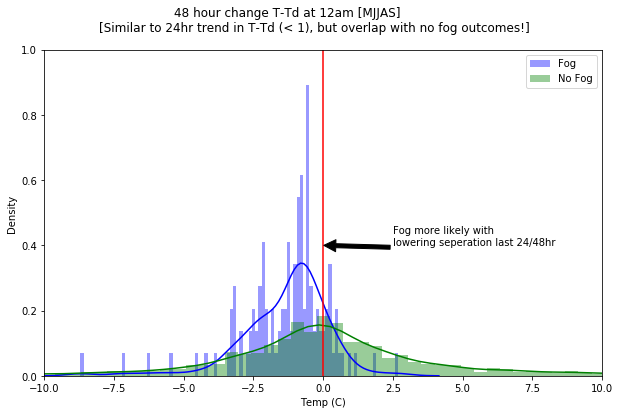

In [123]:
# HIgher chance fog if Td sep trend 48hr 0 to -3
# Normally distributed 24hr change in Td seperation T-Td around 0deg at 12am for no fog outcomes. 
# For fog days however, strongly skewed with majority 80 to 90% less than 1.
# No surprise here although this part of distribution also overlaps with no fog outcomes So marginal value at best.

fg_JJA = fg_aut[( fg_aut.index.month.isin([5,6,7,8,9]))].dropna(subset=['fogflag','TmTd14_48hr'])
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,6))#,sharex=True,sharey=True)
sns.distplot(fg_JJA.loc[fg_JJA['fogflag'],'TmTd14_48hr'].values, kde=True, color='blue', bins=100,ax=ax)
sns.distplot(fg_JJA.loc[~fg_JJA['fogflag'],'TmTd14_48hr'].values, kde=True, color='green', bins=100,ax=ax)

ax.legend(['Fog', 'No Fog'])
fig.suptitle('48 hour change T-Td at 12am [MJJAS]              \n[Similar to 24hr trend in T-Td (< 1), but overlap with no fog outcomes!]')
ax.set_xlabel('Temp (C)')
ax.set_ylabel('Density')
ax.set_ylim(0,1)
ax.set_xlim(-10,10)
ax.axvline(x=0,color='red')# ymin=0, ymax=1)
ax.annotate('Fog more likely with\nlowering seperation last 24/48hr', xy=(0, 0.4), xytext=(2.5, 0.4),
            arrowprops=dict(facecolor='black', shrink=0.01))

In [124]:
# https://pbpython.com/pandas-crosstab.html
cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd_trend_5to14'],
            margins=True)

tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 

ACC = (tn+tp)/(tn+tp+fp+fn)*100
ERR = (fp+fn)/(tn+tp+fp+fn)*100

print(f"\nTP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")

print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
Giving FPR or false alarm rate of {FAR:.0f}%')

print(f'\nPOD (recall or TPR): {POD:.0f}% of the {tp+fn} fog cases detected correctly' )
print(f'{tn /cross.loc[False,"All"]*100:.0f}% of the {fp+tn} no fog days identified correctly.' )

print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')

if (POD > 60) & (FAR < 40):
    print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
cross


TP=96	FN=77	TN=6744	FP=390

486 days when fog forecast,
tp=96 days or about 20% of the days actually get fog [precision].
Giving FPR or false alarm rate of 5%

POD (recall or TPR): 55% of the 173 fog cases detected correctly
95% of the 7134 no fog days identified correctly.

Overall Accuracy Rate: 94% (includes correct no fog predictions as well!)
Misclassification Rate: 6%  (wrong fog and no fog predictions)


TmTd_trend_5to14  False  True   All
fogflag                            
False              6744   390  7134
True                 77    96   173
All                6821   486  7307

In [125]:
'''No fog days 97.6% of days
      fog days 2.4%
   Fog forecast for 2.4% of the days
Fog not forecast 97.6% 
      '''
round(pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd_trend_5to14'],
            margins=True,margins_name="Total",normalize=True)*100,1)

TmTd_trend_5to14  False  True  Total
fogflag                             
False              92.3   5.3   97.6
True                1.1   1.3    2.4
Total              93.3   6.7  100.0

In [126]:
round(fg_aut['TmTd_trend_5to14'].\
      groupby(fg_aut['fogflag']).value_counts(normalize=True)*100,1)

fogflag  TmTd_trend_5to14
False    False               94.5
         True                 5.5
True     True                55.5
         False               44.5
Name: TmTd_trend_5to14, dtype: float64

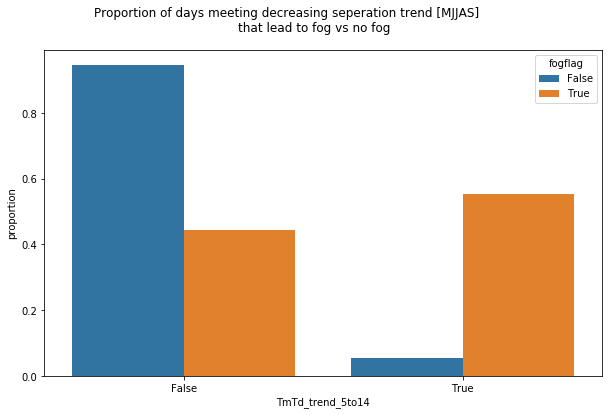

In [127]:
'''
Fog outcome higher (75%) for days meeting decreasing Td seperation between 5Z and 17Z - false alarms 10%
For days not meeting trend about 85% of days did not have fog, but about 25% did - can miss 25% of events!!

good predictive skills!!!
'''

fg_aut['fogflag'].groupby(fg_aut['TmTd_trend_5to14']).value_counts(normalize=True)
percentage = lambda i: len(i) / float(len(x)) * 100

#fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,6))
#sns.countplot(x="TmTd_trend_8to17", hue="fogflag",  estimator=percentage,data=fg_aut)

# https://stackoverflow.com/questions/35692781/python-plotting-percentage-in-seaborn-bar-plot

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,6))
fig.suptitle('Proportion of days meeting decreasing seperation trend [MJJAS]              \nthat lead to fog vs no fog')
x, y, hue = "TmTd_trend_5to14", "proportion","fogflag"

(fg_aut['TmTd_trend_5to14']
 .groupby(fg_aut['fogflag'])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x='TmTd_trend_5to14', y='proportion', hue='fogflag'));


In [128]:
pd.crosstab(fg_aut['TmTd_trend_5to14'],fg_aut['fogflag']) == \
fg_aut.groupby(['TmTd_trend_5to14', 'fogflag'])['fogflag'].count().unstack().fillna(0)

fogflag           False  True 
TmTd_trend_5to14              
False              True   True
True               True   True

In [129]:
fg_aut.pivot_table(index='fogflag', 
                   columns='TmTd_trend_5to14', 
                   aggfunc={'fogflag':len})

fogflag      
TmTd_trend_5to14   False True 
fogflag                       
False               6744   390
True                  77    96

In [130]:
fg_aut['TmTd_trend_5to14'].\
      groupby(fg_aut['fogflag']).value_counts().unstack()

TmTd_trend_5to14  False  True 
fogflag                       
False              6744    390
True                 77     96

In [131]:
pd.crosstab(index=fg_aut['fogflag'],
            columns=fg_aut['TmTd_trend_5to14'])

TmTd_trend_5to14  False  True 
fogflag                       
False              6744    390
True                 77     96

(0.2, 11.60517480737105)

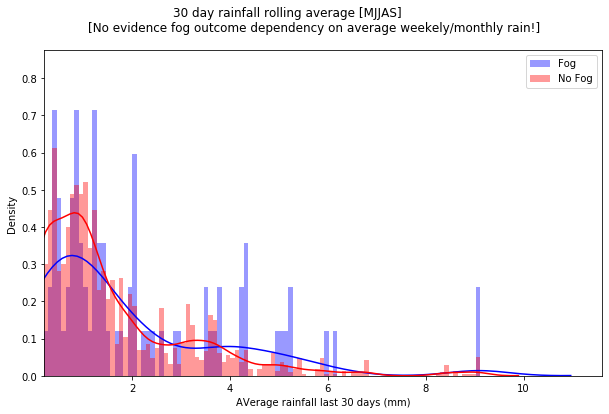

In [132]:
# fg_aut['avg_mthly_rain'] = fg_aut.loc[:,'rain24hr'].rolling(window=30).mean() # 30 day rolling mean`

fg_JJA = fg_aut[( fg_aut.index.month.isin([5,6,7,8,9]))].dropna(subset=['avg_mthly_rain'])
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,6))#,sharex=True,sharey=True)
sns.distplot(fg_JJA.loc[fg_JJA['fogflag'],'avg_mthly_rain'].values, kde=True, color='blue', bins=100,ax=ax)
sns.distplot(fg_JJA.loc[~fg_JJA['fogflag'],'avg_mthly_rain'].values, kde=True, color='red', bins=100,ax=ax)

ax.legend(['Fog', 'No Fog'])
fig.suptitle('30 day rainfall rolling average [MJJAS]              \n[No evidence fog outcome dependency on average weekely/monthly rain!]')
ax.set_xlabel('AVerage rainfall last 30 days (mm)')
ax.set_ylabel('Density')
ax.set_xlim(0.2,)

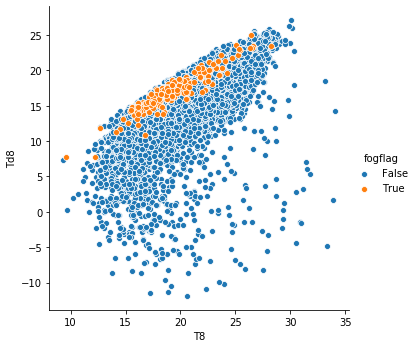

In [133]:
bad_fg_days.columns

sns.pairplot(x_vars=['T8'], y_vars=['Td8'], 
             data=fg_aut,  hue="fogflag", height=5)


In [134]:
fg_aut['T17'].corr(fg_aut['Td17'], method='spearman') #pearson') 90-92%
fg_aut['Td17'].corr(fg_aut['QNH17'], method='spearman') #pearson')


-0.5175621345405105

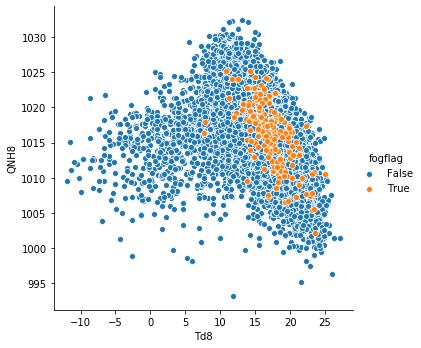

In [135]:
sns.pairplot(x_vars=['Td8'], y_vars=['QNH8'], 
             data=fg_aut,  hue="fogflag", height=5)

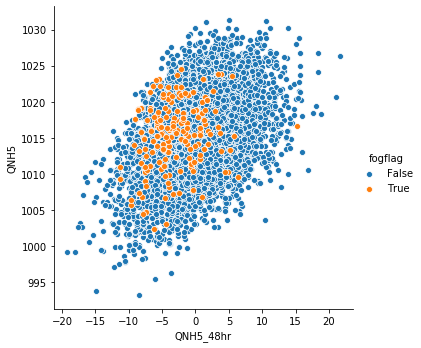

In [136]:
'''Higher Td > 10 associated with fog events
No sig relatiosnhip with QNH
However majority of fog cases in YBBN ssociated with falling
QNH trend ove 48 hours - most Brissy fog events with approaching 
westerly trough/frontal systems'''
sns.pairplot(x_vars=['QNH5_48hr'], y_vars=['QNH5'], 
             data=fg_aut,  hue="fogflag", height=5)

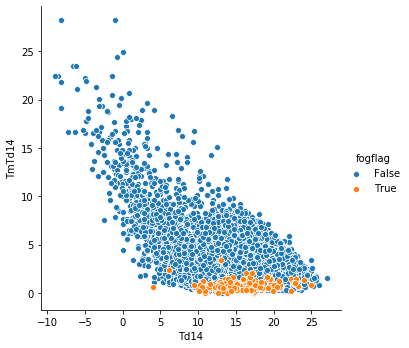

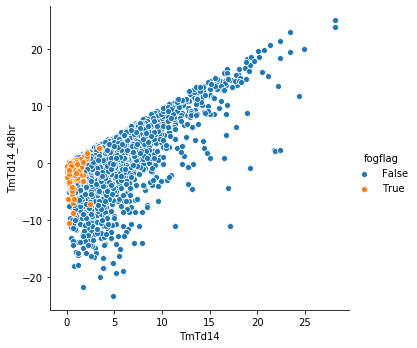

In [137]:
sns.pairplot(x_vars=['Td14'], y_vars=['TmTd14'], 
             data=fg_aut,  hue="fogflag", height=5)
sns.pairplot(x_vars=['TmTd14'], y_vars=['TmTd14_48hr'], 
             data=fg_aut,  hue="fogflag", height=5)

In [138]:
# We get fog data from Robs and align my start date with his
rob_dates = bous.get_fog_data_robs_FCT(station=station,get_dates_only="Yep")
print(f'Only {rob_dates.shape[0]} fog days for Brisbane in Robs data!')
print(f'From start_date:{rob_dates[0]} to end_date:{rob_dates[-1]}')


Getting fog data for YBBN derived using ROBS FCT
Only 46 fog days for Brisbane in Robs data!
From start_date:2008-05-16 to end_date:2018-09-08


In [139]:
#df = bous.process_climate_zone_csv_2020('app/data/HM01X_Data_040842.txt')
#ff = bous.process_climate_zone_csv_2020('YBBN')
#ff.tail()

In [140]:
'''Now grab climate zone data file for station '''
#from utility_functions_sep2018 import process_climate_zone_csv_2020
#from utility_functions_sep2018 import get_sounding_data
#from utility_functions_sep2018 import get_climatological_fog_probability

import pickle
import os
station=station
df  = pickle.load(
                open(
                os.path.join('app','data', station+'_aws.pkl'), 'rb'))

'''
# If/When data file is updated
df = bous.process_climate_zone_csv_2020('app/data/HM01X_Data_040842.txt')

# filter 1800Z - actually 3am/1700z data so between_time('16:50','17:10')
'''
print(f'Number of days in dataset:\
{pd.date_range(start=df.index[0],end=df.index[-1],freq="D").shape[0]},\n\
From start_date={df.index[0]} to end_date={df.index[-1]}')


Number of days in dataset:7569,
From start_date=2000-01-01 00:00:00 to end_date=2020-09-20 18:30:00


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372074 entries, 2000-01-01 00:00:00 to 2020-09-20 18:30:00
Data columns (total 42 columns):
AvID            372074 non-null object
M_type          372074 non-null object
pptn10min       371719 non-null float64
pptnSince9      368817 non-null float64
T               372006 non-null float64
Td              371993 non-null float64
RH              371993 non-null float64
WS              372035 non-null float64
WDir            372022 non-null float64
MaxGust10min    369550 non-null float64
QNH             370234 non-null float64
CL1_amnt        263180 non-null float64
CL1_ht          263118 non-null float64
CL2_amnt        149751 non-null float64
CL2_ht          149750 non-null float64
CL3_amnt        56033 non-null float64
CL3_ht          56033 non-null float64
Ceil1_amnt      372074 non-null object
Ceil1_ht        161406 non-null float64
Ceil2_amnt      372074 non-null object
Ceil2_ht        88399 non-null float64
Ceil3_amnt      372074

In [142]:
# not good - have 100ft cloud in results - we want > 1000ft
df.query(('Ceil1_ht > 1000' and 'Ceil1_amnt.str.contains("SCT|BKN|OVC")') or \
         ('Ceil2_ht > 1000' and 'Ceil2_amnt.str.contains("SCT|BKN|OVC")') or  \
         ('Ceil3_ht > 1000' and 'Ceil3_amnt.str.contains("SCT|BKN|OVC")'))[['Ceil1_ht','Ceil1_amnt','Ceil2_ht','Ceil2_amnt','Ceil3_ht','Ceil3_amnt']].head()

Ceil1_ht Ceil1_amnt  Ceil2_ht Ceil2_amnt  Ceil3_ht  \
date                                                                      
2000-07-24 16:30:00     100.0        BKN       NaN                  NaN   
2000-07-24 17:00:00     400.0        BKN       NaN                  NaN   
2000-07-24 17:52:00     100.0        SCT       NaN                  NaN   
2000-07-24 18:30:00     100.0        SCT       NaN                  NaN   
2000-07-25 19:00:00    3500.0        SCT       NaN                  NaN   

                    Ceil3_amnt  
date                            
2000-07-24 16:30:00             
2000-07-24 17:00:00             
2000-07-24 17:52:00             
2000-07-24 18:30:00             
2000-07-25 19:00:00

In [143]:
# not good - still have 100ft cloud in results - we want > 1000ft
df.query('Ceil1_ht > 1000' and 'Ceil1_amnt.str.contains("SCT|BKN|OVC")')         [['Ceil1_ht','Ceil1_amnt']].head()


Ceil1_ht Ceil1_amnt
date                                    
2000-07-24 16:30:00     100.0        BKN
2000-07-24 17:00:00     400.0        BKN
2000-07-24 17:52:00     100.0        SCT
2000-07-24 18:30:00     100.0        SCT
2000-07-25 19:00:00    3500.0        SCT

In [144]:
# chaining queries work
df.query('Ceil1_ht > 500').query('Ceil1_amnt.str.contains("SCT|BKN|OVC")')[['Ceil1_ht','Ceil1_amnt']].head()

Ceil1_ht Ceil1_amnt
date                                    
2000-07-25 19:00:00    3500.0        SCT
2000-07-26 01:30:00    5000.0        SCT
2000-07-26 02:00:00    5200.0        OVC
2000-07-26 02:30:00    6100.0        SCT
2000-07-26 03:00:00    5500.0        SCT

In [145]:
cldy_days =   set(
    np.unique((df.query('Ceil1_ht > 500').query('Ceil1_amnt.str.contains("BKN|OVC")')).index.date))\
.union(
  set(
    np.unique((df.query('Ceil2_ht > 500').query('Ceil2_amnt.str.contains("BKN|OVC")')).index.date)))\
.union(
    set(
    np.unique((df.query('Ceil3_ht > 500').query('Ceil3_amnt.str.contains("BKN|OVC")')).index.date)))

print(len(sorted(cldy_days, reverse=True)))
# sorted(cldy_days, reverse=True)

5936


In [146]:
# no ned for np.unique - sets only have unique values anyway
cldy_days =   set(
    (df.query('Ceil1_ht > 500').query('Ceil1_amnt.str.contains("BKN|OVC")')).index.date)\
.union(
  set(
    (df.query('Ceil2_ht > 500').query('Ceil2_amnt.str.contains("BKN|OVC")')).index.date))\
.union(
    set(
    (df.query('Ceil3_ht > 500').query('Ceil3_amnt.str.contains("BKN|OVC")')).index.date))

len(sorted(cldy_days, reverse=True))

5936

In [147]:
# does it really matter if cld if FEW or SCT or BKN or OVC 
# just the fact there is cloud above 500ft is sufficient!
cldy_days =   set(
    (df.query('Ceil1_ht > 500')).index.date)\
.union(
  set(
    (df.query('Ceil2_ht > 500')).index.date))\
.union(
    set(
    (df.query('Ceil3_ht > 500')).index.date))

len(sorted(cldy_days, reverse=True))

6433

In [148]:
# thats too many cloudy days!!!!!!!!! 6282???
len(np.unique(df.index.date))


7567

In [149]:
# extract data for 12am, 3am, 5am  also merge in fogflag for those days
# note fog flag is for calendar days starting 00Z or actually 0200 UTC 
# e.g Fog flag for Wed 11th Nov is actually for fog that occurs
# anytime from 0000Z/0200Z Wed 11th to 2330Z Wed 11th (actuall allow upto 0200Z Thu 12th !!)
# so no problem merging with aws data as that also for UTC date starting 00 UTC 11th to 00Z Thu 12th

'''
7394 days
between_time('16:50','17:10') - 7445 rows - too many (resample('D') fix!)
between_time('16:55','17:05') - 7381 about 15 less days
between_time('16:59','17:01') - 7358 about 44 fewer days
'''
dat11 = df[['WDir','WS','T','Td','RH','pptnSince9','vis','vis_aws','PW','QNH',
   'Ceil1_ht','Ceil1_amnt','Ceil2_ht','Ceil2_amnt','Ceil3_ht','Ceil3_amnt']]\
.between_time('10:50','11:10').resample('D').first().loc[df.index[0]:df.index[-1]]
dat11 = pd.merge(left=dat11,right=fg_aut[['fogflag']],left_index=True, right_index=True, how='left')

dat14 = df[['WDir','WS','T','Td','RH','pptnSince9','vis','vis_aws','PW','QNH',
   'Ceil1_ht','Ceil1_amnt','Ceil2_ht','Ceil2_amnt','Ceil3_ht','Ceil3_amnt']]\
.between_time('13:50','14:10').resample('D').first().loc[df.index[0]:df.index[-1]]
dat14 = pd.merge(left=dat14,right=fg_aut[['fogflag']],left_index=True, right_index=True, how='left')

dat17 = df[['WDir','WS','T','Td','RH','pptnSince9','vis','vis_aws','PW','QNH',
   'Ceil1_ht','Ceil1_amnt','Ceil2_ht','Ceil2_amnt','Ceil3_ht','Ceil3_amnt']]\
.between_time('16:50','17:10').resample('D').first().loc[df.index[0]:df.index[-1]]
dat17 = pd.merge(left=dat17,right=fg_aut[['fogflag']],left_index=True, right_index=True, how='left')

dat23 = df[['WDir','WS','T','Td','RH','pptnSince9','vis','vis_aws','PW','QNH',
   'Ceil1_ht','Ceil1_amnt','Ceil2_ht','Ceil2_amnt','Ceil3_ht','Ceil3_amnt']]\
.between_time('22:50','23:10').resample('D').first().loc[df.index[0]:df.index[-1]]
dat23 = pd.merge(left=dat23,right=fg_aut[['fogflag']],left_index=True, right_index=True, how='left')

dat05 = df[['WDir','WS','T','Td','RH','pptnSince9','vis','vis_aws','PW','QNH',
   'Ceil1_ht','Ceil1_amnt','Ceil2_ht','Ceil2_amnt','Ceil3_ht','Ceil3_amnt']]\
.between_time('04:50','05:10').resample('D').first().loc[df.index[0]:df.index[-1]]
dat05 = pd.merge(left=dat05,right=fg_aut[['fogflag']],left_index=True, right_index=True, how='left')

In [150]:
fg_aut.index

DatetimeIndex(['2000-01-01', '2000-01-01', '2000-01-02', '2000-01-03',
               '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-08', '2000-01-09',
               ...
               '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-28'],
              dtype='datetime64[ns]', length=7307, freq=None)

In [151]:
# print(dat14.query('Ceil3_ht > 1000').query('Ceil3_amnt.str.contains("BKN|OVC")').shape)

cldy_days =   set(
    (dat11.query('Ceil1_ht > 1000')).index.date)\
.union(
  set(
    (dat11.query('Ceil2_ht > 1000')).index.date))\
.union(
    set(
    (dat11.query('Ceil3_ht > 1000')).index.date))

print(fg_aut.shape[0],len(cldy_days))
# very handy isin() to flag days with cloud cover
print (dat11.index.isin(cldy_days))

dat11['cldy'] = dat11.index.isin(cldy_days)

cldy_days =   set(
    (dat14.query('Ceil1_ht > 1000')).index.date)\
.union(
  set(
    (dat14.query('Ceil2_ht > 1000')).index.date))\
.union(
    set(
    (dat14.query('Ceil3_ht > 1000')).index.date))

print(fg_aut.shape[0],len(cldy_days))
dat14['cldy'] = dat14.index.isin(cldy_days)

cldy_days =   set(
    (dat17.query('Ceil1_ht > 1000')).index.date)\
.union(
  set(
    (dat17.query('Ceil2_ht > 1000')).index.date))\
.union(
    set(
    (dat17.query('Ceil3_ht > 1000')).index.date))

print(fg_aut.shape[0],len(cldy_days))
dat17['cldy'] = dat17.index.isin(cldy_days)

7307 3340
[False False False ...  True  True False]
7307 3472
7307 3291


In [152]:
'''About 3200 cloud days out of 7392 days is just under half - plausible!! although still seems many

Check below confirms that days clasified cloudy has some SCT or BKN cld cove above 1000ft '''

dat14[['cldy','Ceil1_ht','Ceil1_amnt','Ceil2_ht','Ceil2_amnt','Ceil3_ht','Ceil3_amnt']].loc[dat14['cldy']]

#Would need pd.get_dummies() to use this flag variable for model training

cldy  Ceil1_ht Ceil1_amnt  Ceil2_ht Ceil2_amnt  Ceil3_ht  \
2000-01-09  True    6100.0        SCT    8300.0        SCT   12000.0   
2000-01-12  True    9000.0        SCT       NaN                  NaN   
2000-02-08  True    3600.0        SCT    7600.0        SCT   10000.0   
2000-02-11  True    6100.0        OVC       NaN                  NaN   
2000-02-12  True    3400.0        SCT    4300.0        SCT       NaN   
...          ...       ...        ...       ...        ...       ...   
2020-09-07  True   11500.0        OVC       NaN                  NaN   
2020-09-09  True    3400.0        BKN       NaN                  NaN   
2020-09-17  True    2100.0        OVC       NaN                  NaN   
2020-09-18  True    3500.0        SCT    4400.0        SCT    5800.0   
2020-09-20  True    1600.0        SCT       NaN                  NaN   

           Ceil3_amnt  
2000-01-09        OVC  
2000-01-12             
2000-02-08        OVC  
2000-02-11             
2000-02-12             
...               ...  
2020-09-07             
2020-09-09             
2020-09-17             
2020-09-18        OVC  
2020-09-20             

[3472 rows x 7 columns]

In [153]:
#fig, ax = plt.subplots(1, 1, figsize=(10,5))
#sns.catplot(x="cldy", y="Ceil1_ht", hue="fogflag", kind="swarm", data=dat14,ax=ax)
#ax.set_title("Dew Point Temperature 3am (fog days Vs Non fog days)")
#ax.set_xlabel('Months', color='g', fontsize=15)
#xlabels = [dict_mon[x+1] for x in ax.get_xticks()]
#ax.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
#ax.legend(loc='lower left')
#sns.despine(offset=5, trim=True)  # x-axis tick labels won't rotate with this line

In [154]:
imp.reload(bous)

<module 'utility_functions_sep2018' from '/mnt/shared/stats-R/flask_projects/avguide/utility_functions_sep2018.py'>

In [155]:
import os
time='1700'
os.path.join(cur_dir,'app','data',station+'_sonde_'+time+'_aws.pkl')

'/home/bou/shared/stats-R/flask_projects/avguide/app/data/YBBN_sonde_1700_aws.pkl'

In [156]:
# Now merge with sonde 900hpa data - to get 23Z sonde pass time='23'
# If we have a new data grab - need to run this script again
# sonde = bous.batch_process_F160_hanks(station='YBBN',time='1700')
# otherwise just load pickled sonde file

# sonde = bous.get_sounding_data(station='YBBN',time='17')  obseleted
time='2300'
sonde = pickle.load(
            open(os.path.join(cur_dir,'app','data',station+'_sonde_'+time+'_aws.pkl'), 'rb'))
sonde = sonde.dropna(axis='rows', how='all')
print(f'Sonde data shape {sonde.shape} - from {sonde.index[0]} to {sonde.index[-1]}')

# only keep sonde data for period we have fog dates/data
sonde = sonde.loc[fg_aut.index[0]:fg_aut.index[-1]]
print(f'Sonde data new size/shape {sonde.shape}')

'''To trully be able to capture seasonal variations
    we have to convert calendar day to a categorical variable.
    We can bin months like this '''
    # DJF 'summer',MAM  'autumn', JJA 'winter', SON 'spring'
seasons = {'summer': [12, 1, 2], 'autumn': [3, 4, 5],
               'winter': [6, 7, 8], 'spring': [9, 10, 11]}

sonde['season'] = ''
for k, v in enumerate(seasons):
    # print (v,seasons[v])
    # print(obs.index.month.isin(seasons[v]))
    sonde.loc[sonde.index.month.isin(seasons[v]), 'season'] = v

# get some lapse rates to see association between stability and fog freq
# note sfc_T is actually is lowest level temp data 
# may not be really at surface but okay for most cases

sonde['lr_sfc_850']=sonde['sfc_T'] - sonde['T850']
sonde['lr_850_500']=sonde['T850'] - sonde['T500']
#sonde['mid_rh']=    sonde['T700'] - sonde['Td700']
sonde['mid_rh']=  (
    (sonde['T850'] - sonde['Td850'])+\
    (sonde['T700'] - sonde['Td700'])+\
    (sonde['T500'] - sonde['Td500']))/3
print(sonde.shape)
print(sonde['lr_850_500'].isnull().sum())
print(sonde['lr_sfc_850'].isnull().sum())

# get fogflag into sonde data
# don't as sonde data may be UTC date for sonding times 17Z and 19Z and 23Z
# sonde = pd.merge(left=sonde,right=fg_aut[['fogflag']],left_index=True, right_index=True, how='left')
# sonde['fogflag']=np.where(sonde["fogflag"] == True, True, False)
sonde17 = sonde
print(sonde17.columns)
sonde17.tail(2)


Sonde data shape (6964, 26) - from 2000-02-05 00:00:00 to 2020-06-07 00:00:00
Sonde data new size/shape (6895, 26)
(6895, 30)
39
19
Index(['sfc_P', 'sfc_T', 'sfc_Td', 'sfc_wdir', 'sfc_wspd', 'P910', 'T910',
       'Td910', '900_wdir', '900_WS', 'P850', 'T850', 'Td850', '850_wdir',
       '850_WS', 'P700', 'T700', 'Td700', '700_wdir', '700_WS', 'P500', 'T500',
       'Td500', '500_wdir', '500_WS', 'tmp_rate850_500', 'season',
       'lr_sfc_850', 'lr_850_500', 'mid_rh'],
      dtype='object')


sfc_P  sfc_T  sfc_Td  sfc_wdir  sfc_wspd   P910  T910  Td910  \
2020-03-27  1020.0   23.8    16.8     155.0       6.2  910.0   NaN    NaN   
2020-03-28  1019.0   23.2    19.2      90.0       7.2  910.0   NaN    NaN   

            900_wdir  900_WS  ...   P500  T500  Td500  500_wdir  500_WS  \
2020-03-27      95.0    20.6  ...  500.0 -12.3  -31.3     335.0     5.2   
2020-03-28      95.0     6.2  ...  500.0 -11.5  -43.5     265.0    17.4   

            tmp_rate850_500  season  lr_sfc_850  lr_850_500     mid_rh  
2020-03-27             24.5  autumn        11.6        24.5   8.366667  
2020-03-28             23.5  autumn        11.2        23.5  12.900000  

[2 rows x 30 columns]

In [157]:
# Now merge with sonde 900hpa data - to get 23Z sonde pass time='23'
# sonde = bous.get_sounding_data(station='YBBN',time='23')   obseleted

time='2300'
sonde = pickle.load(
            open(os.path.join(cur_dir,'app','data',station+'_sonde_'+time+'_aws.pkl'), 'rb'))
sonde.dropna(axis='rows', how='all',inplace=True)

print(f'Sonde data shape {sonde.shape} - from {sonde.index[0]} to {sonde.index[-1]}')

# only keep sonde data for period we have fog dates/data
sonde = sonde.loc[fg_aut.index[0]:fg_aut.index[-1]]
print(f'Sonde data new size/shape {sonde.shape}')

'''To trully be able to capture seasonal variations
    we have to convert calendar day to a categorical variable.
    We can bin months like this '''
    # DJF 'summer',MAM  'autumn', JJA 'winter', SON 'spring'
seasons = {'summer': [12, 1, 2], 'autumn': [3, 4, 5],
               'winter': [6, 7, 8], 'spring': [9, 10, 11]}

sonde['season'] = ''
for k, v in enumerate(seasons):
    # print (v,seasons[v])
    # print(obs.index.month.isin(seasons[v]))
    sonde.loc[sonde.index.month.isin(seasons[v]), 'season'] = v

# get some lapse rates to see association between stability and fog freq
# note sfc_T is actually is lowest level temp data 
# may not be really at surface but okay for most cases

sonde['lr_sfc_850']=sonde['sfc_T'] - sonde['T850']
sonde['lr_850_500']=sonde['T850'] - sonde['T500']
#sonde['mid_rh']=    sonde['T700'] - sonde['Td700']
sonde['mid_rh']=  (
    (sonde['T850'] - sonde['Td850'])+\
    (sonde['T700'] - sonde['Td700'])+\
    (sonde['T500'] - sonde['Td500']))/3
print(sonde.shape)
print(sonde['lr_850_500'].isnull().sum())
print(sonde['lr_sfc_850'].isnull().sum())

# get fogflag into sonde data
# don't as sonde data may be UTC date for sonding times 17Z and 19Z and 23Z
# sonde = pd.merge(left=sonde,right=fg_aut[['fogflag']],left_index=True, right_index=True, how='left')
# sonde['fogflag']=np.where(sonde["fogflag"] == True, True, False)
sonde23 = sonde
print(sonde23.columns)
sonde23.tail(2)

Sonde data shape (6964, 26) - from 2000-02-05 00:00:00 to 2020-06-07 00:00:00
Sonde data new size/shape (6895, 26)
(6895, 30)
39
19
Index(['sfc_P', 'sfc_T', 'sfc_Td', 'sfc_wdir', 'sfc_wspd', 'P910', 'T910',
       'Td910', '900_wdir', '900_WS', 'P850', 'T850', 'Td850', '850_wdir',
       '850_WS', 'P700', 'T700', 'Td700', '700_wdir', '700_WS', 'P500', 'T500',
       'Td500', '500_wdir', '500_WS', 'tmp_rate850_500', 'season',
       'lr_sfc_850', 'lr_850_500', 'mid_rh'],
      dtype='object')


sfc_P  sfc_T  sfc_Td  sfc_wdir  sfc_wspd   P910  T910  Td910  \
2020-03-27  1020.0   23.8    16.8     155.0       6.2  910.0   NaN    NaN   
2020-03-28  1019.0   23.2    19.2      90.0       7.2  910.0   NaN    NaN   

            900_wdir  900_WS  ...   P500  T500  Td500  500_wdir  500_WS  \
2020-03-27      95.0    20.6  ...  500.0 -12.3  -31.3     335.0     5.2   
2020-03-28      95.0     6.2  ...  500.0 -11.5  -43.5     265.0    17.4   

            tmp_rate850_500  season  lr_sfc_850  lr_850_500     mid_rh  
2020-03-27             24.5  autumn        11.6        24.5   8.366667  
2020-03-28             23.5  autumn        11.2        23.5  12.900000  

[2 rows x 30 columns]

In [158]:
print(sonde17.shape, sonde23.shape)
sonde23.info()

(6895, 30) (6895, 30)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6895 entries, 2000-02-05 to 2020-03-28
Data columns (total 30 columns):
sfc_P              6895 non-null float64
sfc_T              6895 non-null float64
sfc_Td             6895 non-null float64
sfc_wdir           6895 non-null float64
sfc_wspd           6895 non-null float64
P910               6895 non-null float64
T910               492 non-null float64
Td910              492 non-null float64
900_wdir           6683 non-null float64
900_WS             6683 non-null float64
P850               6895 non-null float64
T850               6876 non-null float64
Td850              6876 non-null float64
850_wdir           6625 non-null float64
850_WS             6625 non-null float64
P700               6895 non-null float64
T700               6872 non-null float64
Td700              6872 non-null float64
700_wdir           6734 non-null float64
700_WS             6734 non-null float64
P500               6895 non-null fl

In [159]:
# merge sonde into aws data - this will trim aws data outside first/last fog dates
# but ensures validity/integrity fog flag - also carries fog flag from dat to sonde
# also we bring surface conditions winds, temps etc from aws data not from sonde

# # for some reason after merge - fogflag stops being boolean - fix it

aws14_sonde17 = pd.merge(
    left=dat14, 
    right=sonde17[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')
aws14_sonde17['fogflag']=np.where(aws14_sonde17["fogflag"] == True, True, False)


aws17_sonde17 = pd.merge(
    left=dat17, 
    right=sonde17[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')
aws17_sonde17['fogflag']=np.where(aws17_sonde17["fogflag"] == True, True, False)


aws17_sonde23 = pd.merge(
    left=dat17, 
    right=sonde23[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')
aws17_sonde23['fogflag']=np.where(aws17_sonde23["fogflag"] == True, True, False)

aws23_sonde23 = pd.merge(
    left=dat23, 
    right=sonde23[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')
aws23_sonde23['fogflag']=np.where(aws23_sonde23["fogflag"] == True, True, False)

aws23_sonde23.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6895 entries, 2000-02-05 to 2020-03-28
Data columns (total 25 columns):
WDir          6854 non-null float64
WS            6854 non-null float64
T             6853 non-null float64
Td            6853 non-null float64
RH            6853 non-null float64
pptnSince9    6779 non-null float64
vis           6843 non-null float64
vis_aws       6693 non-null float64
PW            481 non-null float64
QNH           6842 non-null float64
Ceil1_ht      3025 non-null float64
Ceil1_amnt    6854 non-null object
Ceil2_ht      1557 non-null float64
Ceil2_amnt    6854 non-null object
Ceil3_ht      839 non-null float64
Ceil3_amnt    6854 non-null object
fogflag       6895 non-null bool
900_wdir      6683 non-null float64
900_WS        6683 non-null float64
850_wdir      6625 non-null float64
850_WS        6625 non-null float64
season        6895 non-null object
lr_850_500    6856 non-null float64
lr_sfc_850    6876 non-null float64
mid_rh        6851 n

In [160]:
# note that fog predictions can be done two ways
# lets say its 00Z now (or 04Z or 05Z) and we would like to estimate fog potential for next day
# we can use forecast sonde data i.e +1700Z or +2300Z model sonde data
# merge that with cur_days 00Z, 02Z or 05Z aws data (for sfc T,Td,, QNH etc) 

# how do we get forecast 23Z sonde in verification studies like this 
# we just use next morning 23Z sonde since we have sonde for all days
# this is like a perfect prog method and we use this dataset for pattern matching
# so merge 05Z T,Td,QNH, winds etc and 23Z sonde 900 winds - find all matching and see fog fractions
# for matching days

aws05_sonde23_nextday = pd.merge(
    left=dat05, 
    right=sonde23[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')


# another way is use cur_days 0200 or 0500Z data and latest (past) sonde
# 23Z sonde is about 3 to 6 hours old at 05Z when doing 06Z TAF 
# so say its 0200 or 0500Z on Wed 11th Nov, we use THIS mornings 23Z sonde
# which would be dated/stamped Tue 10th Nov 2300 (Note UTC date 10th, but calendar date 11th) 
# Merging works on index - so cols from two frames joined on matching dates 
# so we would need to reindex our sonde data so that Tue 10th Nov data gets index/or date Wed 11th Nov !!!
# i.e we need to increment each of the index/dates by one day - then merge would get effect/data we want

# to test this approach we need to 
sonde23_sameday = sonde23.set_index(sonde23.index + pd.Timedelta(str(1) + ' days'))
aws05_sonde23_sameday = pd.merge(
    left=dat05, 
    right=sonde23_sameday[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')

In [161]:
sonde23.tail()

sfc_P  sfc_T  sfc_Td  sfc_wdir  sfc_wspd   P910  T910  Td910  \
2020-03-24  1021.0   22.6    18.2     205.0       4.2  910.0   NaN    NaN   
2020-03-25  1020.0   25.4    16.4     160.0       6.2  910.0   NaN    NaN   
2020-03-26  1021.0   23.2    17.2     190.0       6.2  910.0   NaN    NaN   
2020-03-27  1020.0   23.8    16.8     155.0       6.2  910.0   NaN    NaN   
2020-03-28  1019.0   23.2    19.2      90.0       7.2  910.0   NaN    NaN   

            900_wdir  900_WS  ...   P500  T500  Td500  500_wdir  500_WS  \
2020-03-24      90.0    16.4  ...  500.0  -9.7  -32.7     245.0    17.4   
2020-03-25     115.0     8.2  ...  500.0 -10.5  -38.5     260.0    27.8   
2020-03-26     150.0    13.4  ...  500.0 -11.5  -32.5     250.0    13.4   
2020-03-27      95.0    20.6  ...  500.0 -12.3  -31.3     335.0     5.2   
2020-03-28      95.0     6.2  ...  500.0 -11.5  -43.5     265.0    17.4   

            tmp_rate850_500  season  lr_sfc_850  lr_850_500     mid_rh  
2020-03-24             20.9  autumn        11.4        20.9   8.633333  
2020-03-25             22.3  autumn        13.6        22.3  20.666667  
2020-03-26             21.7  autumn        13.0        21.7   8.866667  
2020-03-27             24.5  autumn        11.6        24.5   8.366667  
2020-03-28             23.5  autumn        11.2        23.5  12.900000  

[5 rows x 30 columns]

In [162]:
sonde23_sameday.tail()

sfc_P  sfc_T  sfc_Td  sfc_wdir  sfc_wspd   P910  T910  Td910  \
2020-03-25  1021.0   22.6    18.2     205.0       4.2  910.0   NaN    NaN   
2020-03-26  1020.0   25.4    16.4     160.0       6.2  910.0   NaN    NaN   
2020-03-27  1021.0   23.2    17.2     190.0       6.2  910.0   NaN    NaN   
2020-03-28  1020.0   23.8    16.8     155.0       6.2  910.0   NaN    NaN   
2020-03-29  1019.0   23.2    19.2      90.0       7.2  910.0   NaN    NaN   

            900_wdir  900_WS  ...   P500  T500  Td500  500_wdir  500_WS  \
2020-03-25      90.0    16.4  ...  500.0  -9.7  -32.7     245.0    17.4   
2020-03-26     115.0     8.2  ...  500.0 -10.5  -38.5     260.0    27.8   
2020-03-27     150.0    13.4  ...  500.0 -11.5  -32.5     250.0    13.4   
2020-03-28      95.0    20.6  ...  500.0 -12.3  -31.3     335.0     5.2   
2020-03-29      95.0     6.2  ...  500.0 -11.5  -43.5     265.0    17.4   

            tmp_rate850_500  season  lr_sfc_850  lr_850_500     mid_rh  
2020-03-25             20.9  autumn        11.4        20.9   8.633333  
2020-03-26             22.3  autumn        13.6        22.3  20.666667  
2020-03-27             21.7  autumn        13.0        21.7   8.866667  
2020-03-28             24.5  autumn        11.6        24.5   8.366667  
2020-03-29             23.5  autumn        11.2        23.5  12.900000  

[5 rows x 30 columns]

In [163]:
# note aws data at 0500Z for 26th and 27th March
dat05.loc['26-03-2020':'28-03-2020']

WDir    WS     T    Td    RH  pptnSince9   vis  vis_aws  PW  \
2020-03-26  100.0   8.9  26.6  17.5  57.0         0.0  10.0     10.0 NaN   
2020-03-27  170.0  11.1  23.0  17.9  73.0         0.0  10.0     10.0 NaN   
2020-03-28  120.0   8.9  25.7  18.6  65.0         0.0  10.0     10.0 NaN   

               QNH  Ceil1_ht Ceil1_amnt  Ceil2_ht Ceil2_amnt  Ceil3_ht  \
2020-03-26  1018.5    3300.0        SCT       NaN                  NaN   
2020-03-27  1019.7    1900.0        BKN    4400.0        BKN    9700.0   
2020-03-28  1017.5    7300.0        BKN       NaN                  NaN   

           Ceil3_amnt fogflag  
2020-03-26              False  
2020-03-27        OVC   False  
2020-03-28              False

In [164]:
# note sonde23 data for 26th and 27th March
sonde23.loc['26-03-2020':'28-03-2020', [ '900_wdir', '900_WS','850_wdir','850_WS'] ]

900_wdir  900_WS  850_wdir  850_WS
2020-03-26     150.0    13.4     125.0    17.4
2020-03-27      95.0    20.6     110.0    13.4
2020-03-28      95.0     6.2      80.0     8.2

In [165]:
''' The simple merge with no reindexing works as expected '''
aws05_sonde23_nextday.loc['26-03-2020':'28-03-2020']

WDir    WS     T    Td    RH  pptnSince9   vis  vis_aws  PW  \
2020-03-26  100.0   8.9  26.6  17.5  57.0         0.0  10.0     10.0 NaN   
2020-03-27  170.0  11.1  23.0  17.9  73.0         0.0  10.0     10.0 NaN   
2020-03-28  120.0   8.9  25.7  18.6  65.0         0.0  10.0     10.0 NaN   

               QNH  ...  Ceil3_amnt fogflag  900_wdir 900_WS  850_wdir 850_WS  \
2020-03-26  1018.5  ...               False     150.0   13.4     125.0   17.4   
2020-03-27  1019.7  ...         OVC   False      95.0   20.6     110.0   13.4   
2020-03-28  1017.5  ...               False      95.0    6.2      80.0    8.2   

            season  lr_850_500  lr_sfc_850     mid_rh  
2020-03-26  autumn        21.7        13.0   8.866667  
2020-03-27  autumn        24.5        11.6   8.366667  
2020-03-28  autumn        23.5        11.2  12.900000  

[3 rows x 25 columns]

In [166]:
'''However notice how the sonde data for 26-03-2020  and 27-03-2020
gets merged with aws data for 27th and 28th respectively in aws05_sonde23_sameday dataset

this is cause of
sonde23_new = sonde23.set_index(sonde23.index + pd.Timedelta(str(1) + ' days'))
'''
aws05_sonde23_sameday.loc['26-03-2020':'28-03-2020']

WDir    WS     T    Td    RH  pptnSince9   vis  vis_aws  PW  \
2020-03-26  100.0   8.9  26.6  17.5  57.0         0.0  10.0     10.0 NaN   
2020-03-27  170.0  11.1  23.0  17.9  73.0         0.0  10.0     10.0 NaN   
2020-03-28  120.0   8.9  25.7  18.6  65.0         0.0  10.0     10.0 NaN   

               QNH  ...  Ceil3_amnt fogflag  900_wdir 900_WS  850_wdir 850_WS  \
2020-03-26  1018.5  ...               False     115.0    8.2      80.0    9.2   
2020-03-27  1019.7  ...         OVC   False     150.0   13.4     125.0   17.4   
2020-03-28  1017.5  ...               False      95.0   20.6     110.0   13.4   

            season  lr_850_500  lr_sfc_850     mid_rh  
2020-03-26  autumn        22.3        13.6  20.666667  
2020-03-27  autumn        21.7        13.0   8.866667  
2020-03-28  autumn        24.5        11.6   8.366667  

[3 rows x 25 columns]

We will try to run pattern matching both ways -
so using either 0200, 0400, or 0500Z obs for day we need want to run predictions for the 0606 TAF obviously

but either 
1. use forecast sonde data as in aws05_sonde23   (since we running predictions in hindsight we actually have this forecast sodes!!)


2. use current days latest sonde (which would be 23Z/9am sonde for current day )


We run using both approaches and see which has better skills

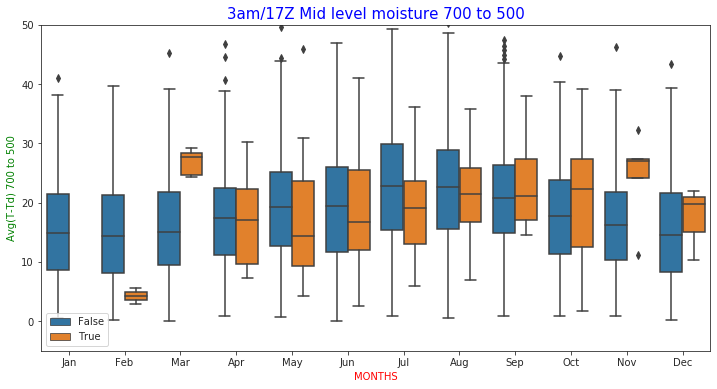

In [167]:
#Just checking for Mid level moisture
import seaborn as sns
sns.set_style('ticks')
fig, ax = plt.subplots(1, 1, figsize=(12,6))
# fig.set_size_inches(11.7,8.27) # the size of A4 paper
sns.boxplot(ax=ax,
              x=aws17_sonde17.index.month,
              y='mid_rh',#y='lr_850_500',
              hue='fogflag',
              data=aws17_sonde17)

ax.set_title("3am/17Z Mid level moisture 700 to 500", color='b',fontsize=15)
ax.set_ylabel('Avg(T-Td) 700 to 500', color='g', fontsize=10)
ax.set_ylim(-5,50)  #plt.ylim(0,20) #plt.ylim(10,36)
ax.set_xlabel('MONTHS', color='r', fontsize=10)
xlabels = [dict_mon[x+1] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
ax.legend(loc='lower left')
ax.tick_params(labelsize=10)

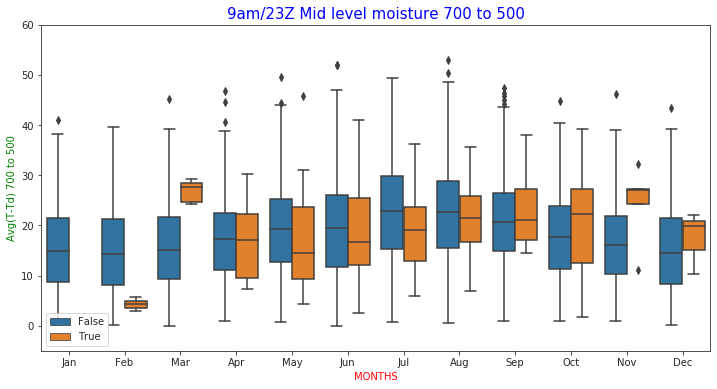

In [168]:
'''Just checking for Mid level moisture'''
import seaborn as sns
sns.set_style('ticks')
fig, ax = plt.subplots(1, 1, figsize=(12,6))
# fig.set_size_inches(11.7,8.27) # the size of A4 paper
sns.boxplot(ax=ax,
              x=aws23_sonde23.index.month,
              y='mid_rh',#y='lr_850_500',
              hue='fogflag',
              data=aws23_sonde23)

ax.set_title("9am/23Z Mid level moisture 700 to 500", color='b',fontsize=15)
ax.set_ylabel('Avg(T-Td) 700 to 500', color='g', fontsize=10)
ax.set_ylim(-5,60)  #plt.ylim(0,20) #plt.ylim(10,36)
ax.set_xlabel('MONTHS', color='r', fontsize=10)
xlabels = [dict_mon[x+1] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
ax.legend(loc='lower left')
ax.tick_params(labelsize=10)

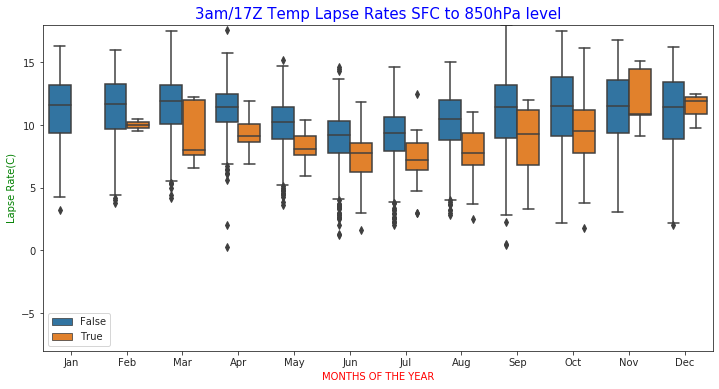

In [169]:
'''Just checking for stable lapse rates sfc to 850 @ 23Z/9am
Looks like GOOD discriminator between fog/no fog from Mar to Aug - possibly til Oct
with stable lapse rates < 10-11 with fog cases 
Little overlap of middle 50% (25th to 75th percentile)  
so looks like 9am sonde (although released around time fog is clearing)
has some predictive capability for fog that formed few hours earlier.
This would make sense esp. in winter when surface mixing starts quite late around 8/9am
'''
import seaborn as sns
sns.set_style('ticks')
fig, ax = plt.subplots(1, 1, figsize=(12,6))
# fig.set_size_inches(11.7,8.27) # the size of A4 paper
sns.boxplot(ax=ax,
              x=aws17_sonde17.index.month,
              y='lr_sfc_850',#y='lr_850_500',
              hue='fogflag',
              data=aws17_sonde17)

ax.set_ylim(-8,18)  #plt.ylim(0,20) #plt.ylim(10,36)
ax.set_title("3am/17Z Temp Lapse Rates SFC to 850hPa level", color='b',fontsize=15)
ax.set_ylabel('Lapse Rate(C)', color='g', fontsize=10)
ax.set_xlabel('MONTHS OF THE YEAR', color='r', fontsize=10)
xlabels = [dict_mon[x+1] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
ax.legend(loc='lower left')
ax.tick_params(labelsize=10)

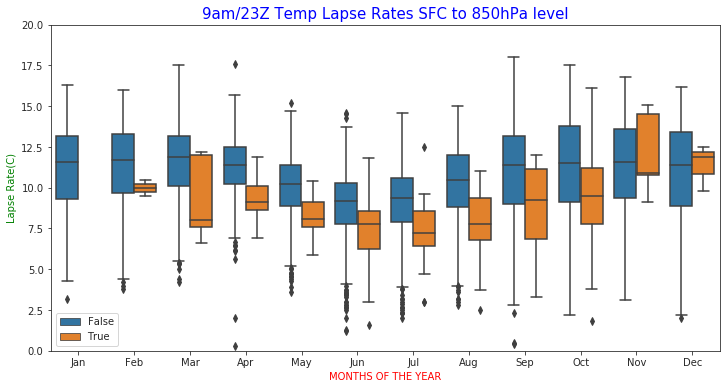

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(ax=ax,
              x=aws23_sonde23.index.month,
              y='lr_sfc_850',#y='lr_850_500',
              hue='fogflag',
              data=aws23_sonde23)

ax.set_ylim(0,20)#plt.ylim(0,20) #plt.ylim(10,36)
ax.set_title("9am/23Z Temp Lapse Rates SFC to 850hPa level", color='b',fontsize=15)
ax.set_ylabel('Lapse Rate(C)', color='g', fontsize=10)
ax.set_xlabel('MONTHS OF THE YEAR', color='r', fontsize=10)
xlabels = [dict_mon[x+1] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
ax.legend(loc='lower left')
ax.tick_params(labelsize=10)

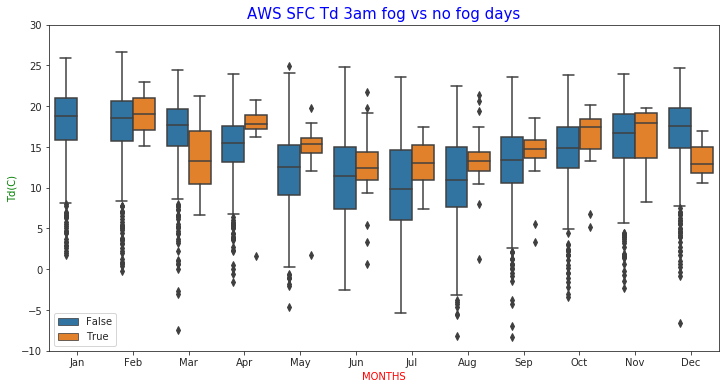

In [171]:
'''Using Td from aws data at 17z/3am Td
quite a lot of overlap with no fog days during MJJA - not very useful !!
'''
fig, ax = plt.subplots(1, 1, figsize=(12,6))
# the size of A4 paper
# fig.set_size_inches(11.7,8.27)
#fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(ax=ax,
              x=aws17_sonde17.index.month,
              y='Td',
              hue='fogflag',
              data=aws17_sonde17)

ax.set_ylim(-10,30)  #plt.ylim(0,20) #plt.ylim(10,36)
ax.set_title("AWS SFC Td 3am fog vs no fog days", color='b',fontsize=15)
ax.set_ylabel('Td(C)', color='g', fontsize=10)
ax.set_xlabel('MONTHS', color='r', fontsize=10)
xlabels = [dict_mon[x+1] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
ax.legend(loc='lower left')
ax.tick_params(labelsize=10)


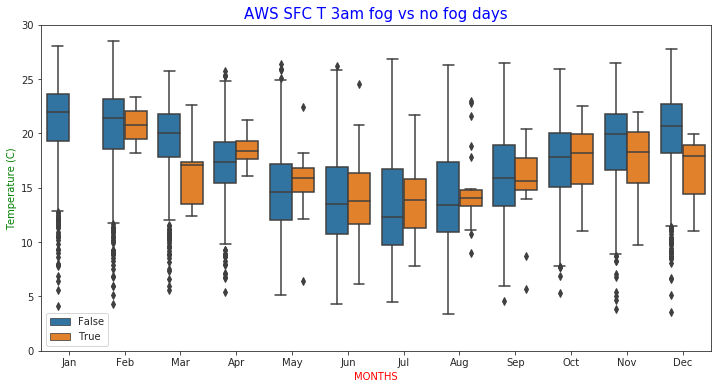

In [172]:

'''Surface T not great discriminator for fog/no fog seperation'''
fig, ax = plt.subplots(1, 1, figsize=(12,6))
# the size of A4 paper
# fig.set_size_inches(11.7,8.27)
#fig,ax = plt.subplots(figsize=(10,6))
sns.boxplot(ax=ax,
              x=aws17_sonde17.index.month,
              y='T',
              hue='fogflag',
              data=aws17_sonde17)

ax.set_ylim(0,30)  #plt.ylim(0,20) #plt.ylim(10,36)
ax.set_title("AWS SFC T 3am fog vs no fog days", color='b',fontsize=15)
ax.set_ylabel('Temperature (C)', color='g', fontsize=10)
ax.set_xlabel('MONTHS', color='r', fontsize=10)
xlabels = [dict_mon[x+1] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
ax.tick_params(labelsize=10)
ax.legend(loc='lower left')


In [173]:
aws17_sonde17['TmTd'] = aws17_sonde17['T'] - aws17_sonde17['Td']
print(aws17_sonde17.shape)
aws = aws17_sonde17[pd.notnull(aws17_sonde17['TmTd'])]
print(aws.shape)

(6895, 27)
(6857, 27)


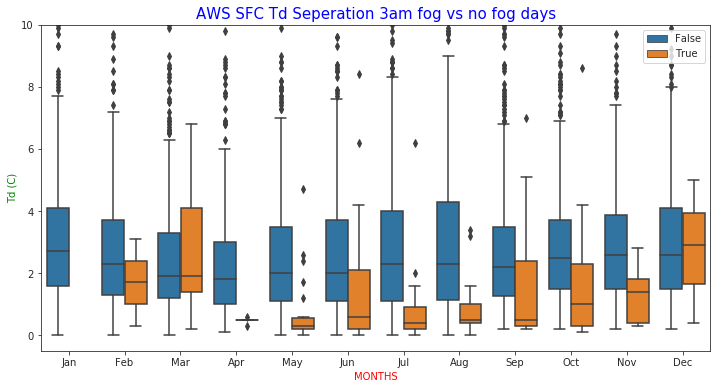

In [174]:

'''Surface Td seperation great discriminator for fog/no fog seperation
TmTd means all below 1 for fog days, fog non-fog days means all above 2
so possible use for seperation
 
esp MJJA when almost no overlap of mid 50% of distribution between fog and non fog events
'''
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(ax=ax,
            x=aws.index.month,
            y='TmTd',
            hue='fogflag',
            data=aws)

ax.set_ylim(-0.5,10)  #plt.ylim(0,20) #plt.ylim(10,36)
ax.set_title("AWS SFC Td Seperation 3am fog vs no fog days", color='b',fontsize=15)
ax.set_ylabel('Td (C)', color='g', fontsize=10)
ax.set_xlabel('MONTHS', color='r', fontsize=10)
xlabels = [dict_mon[x+1] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
ax.tick_params(labelsize=10)
ax.legend(loc='upper right')

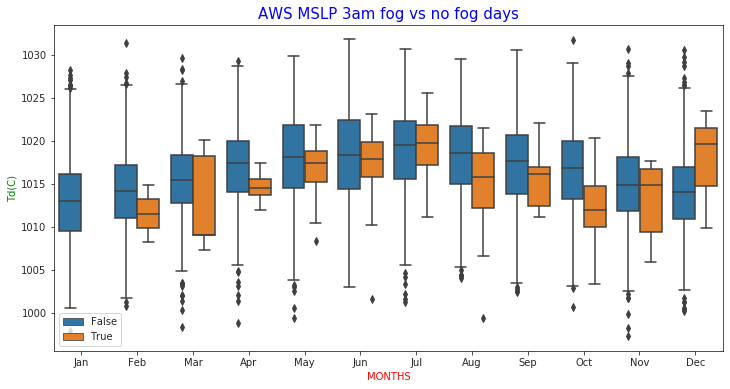

In [175]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
# the size of A4 paper
# fig.set_size_inches(11.7,8.27)
#fig,ax = plt.subplots(figsize=(10,6))
ax=sns.boxplot(ax=ax,
            x=aws17_sonde17.index.month,
            y='QNH',
            hue='fogflag',
            data=aws17_sonde17)

ax.set_title("AWS MSLP 3am fog vs no fog days", color='b',fontsize=15)
ax.set_ylabel('Td(C)', color='g', fontsize=10)
ax.set_xlabel('MONTHS', color='r', fontsize=10)
xlabels = [dict_mon[x+1] for x in ax.get_xticks()]
ax.set_xticklabels(xlabels)
ax.tick_params(labelsize=10)
ax.legend(loc='lower left')

In [176]:
# list of bins (limits) used for wind speeds knots
# 0-2knots, , 2-4 knots, ... 8 to 10 knots
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

Strongest wind at 3am/1700Z = 10.0 knots, lightest = 0.0


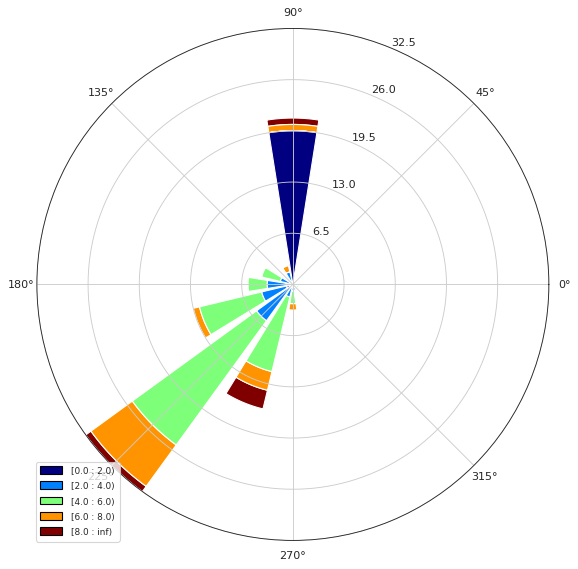

In [177]:
from windrose import WindroseAxes
import matplotlib.cm as cm

#bad_fg_days
#not_in_bad_fg_days

fg_days=fg_aut.loc[fg_aut['fogflag']]; fg_days.shape
fg_free_days=fg_aut.loc[~fg_aut['fogflag']]
# fg_aut.columns
'''
https://windrose.readthedocs.io/en/latest/usage.html
Other possible type of windrose plots
stacked histogram representation, not normed, with bins limits'''
# ax.box(wd, ws, bins=np.arange(0, 10, 2))
'''windrose in filled representation, with a controled colormap'''
# ax.contourf(wd, ws, bins=np.arange(0, 10, 2), cmap=cm.hot)
'''Same as above, but with contours over each filled region'''
# ax.contourf(wd, ws, bins=np.arange(0, 10, 2), cmap=cm.hot)
# ax.contour(wd, ws, bins=np.arange(0, 10, 2), colors='black')
'''without filled regions'''
# ax.contour(wd, ws, bins=np.arange(0, 10, 2), cmap=cm.hot, lw=3)

#wd=not_in_bad_fg_days['wdir17'].values
#ws=not_in_bad_fg_days['wspd17'].values
# BOTH fg_free and no_in_bad_fg give SAME result
#wd=fg_free_days['wdir17'].values
#ws=fg_free_days['wspd17'].values
'''
Fog-less days twice as likely to have S'thly winds - 10% vs <5%
and also      twice as likely to have SSW    winds 31% vs 14% 
So less likely fog with SE to SSW sector winds

The higher freq of nthly winds for fog days could be calm winds
translated to nthly winds
SW winds - more than twice as likely for fog days 31% vs 12%
Fog days have cases with winds with any easterly component
'''

'''

# grab fog dates with vis<2 and lasting more than 2 hour
Already done arlier
mask = (fg_days['min_vis']<=2) & (fg_days['fg_duration']>=1)

bad_fg_days = fg_days.loc[mask]  #real bad fog days
bad_fg_days.loc[:,['min_vis','fg_duration']].describe()
'''
# BOTH fg_days and bad_fg_days give SIMILAR result
wd=bad_fg_days['wdir17'].values
ws=bad_fg_days['wspd17'].values

#wd=fg_free_days['wdir17'].values
#ws=fg_free_days['wspd17'].values


print(f'Strongest wind at 3am/1700Z = {ws.max()} knots, lightest = {ws.min()}')
'''Hardly any fog cases with winds stronger than 10 knots at 17Z'''
np.arange(0, 10, 2)
ax = WindroseAxes.from_ax()
#ax.contour(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot, lw=3)
#ax.set_legend()
'''A stacked histogram with normed (displayed in percent) results'''
ax.bar(wd, ws, bins=np.arange(0, 10, 2), normed=True, nsector=16)
ax.set_legend()


# The computed values used to plot the windrose with the ax._info dictionnary :
# - ax._info['bins'] : list of bins (limits) used for wind speeds. 
# If not set in the call, bins will be set to 6 parts between wind speed min and max.
# 
# - ax._info['dir'] : list of directions “boundaries” used to compute the distribution by wind direction sector. 
# This can be set by the nsector parameter (see below).
# 
# - ax._info['table'] : the resulting table of the computation. 
# It’s a 2D histogram, where each line represents a wind speed class, 
# and each column represents a wind direction class.
# 

In [178]:
'''
wd=bad_fg_days['wdir17'].values
ws=bad_fg_days['wspd17'].values
ax.bar(wd, ws, bins=np.arange(0, 10, 2), normed=True, nsector=16)
'''
table = ax._info['table']
print(table.shape)
'''  5 rows for each speed class
    16 cols for each direction class '''

print(f'Frequency of 2 to 4 kt winds {sum(table[2,:]):.0f}%')  #2-4 knot wind speed class
pd.DataFrame(table[2,:]).squeeze()

(5, 16)
Frequency of 2 to 4 kt winds 45%


0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.813008
6      0.000000
7      0.000000
8      1.626016
9      9.756098
10    19.512195
11     8.130081
12     2.439024
13     2.439024
14     0.000000
15     0.000000
Name: 0, dtype: float64

In [179]:
print(ax._info['bins'])
# https://realpython.com/how-to-use-numpy-arange/
np.arange(10,step=2)
for i,n in enumerate(np.arange(10,step=2)):
    print(f'Frequency of {n} to {n+2} kt winds:{table[i,:].sum():.1f}%')

[0, 2, 4, 6, 8, inf]
Frequency of 0 to 2 kt winds:21.1%
Frequency of 2 to 4 kt winds:17.9%
Frequency of 4 to 6 kt winds:44.7%
Frequency of 6 to 8 kt winds:12.2%
Frequency of 8 to 10 kt winds:4.1%


In [180]:
''' ->axis=1 - horizontal row sums i.e ACROSS column axis
20% 0-2, 19% 2-4kt, 44% 4-6kt, 12% 5-8kt, 4% 8-10kt '''
table.sum(axis=1)

array([21.13821138, 17.88617886, 44.71544715, 12.19512195,  4.06504065])

In [181]:
dirs=('N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW')
# these are the direction bins
list(zip(dirs,ax._info['dir']))

[('N', 348.75),
 ('NNE', 11.25),
 ('NE', 33.75),
 ('ENE', 56.25),
 ('E', 78.75),
 ('ESE', 101.25),
 ('SE', 123.75),
 ('SSE', 146.25),
 ('S', 168.75),
 ('SSW', 191.25),
 ('SW', 213.75),
 ('WSW', 236.25),
 ('W', 258.75),
 ('WNW', 281.25),
 ('NW', 303.75),
 ('NNW', 326.25)]

In [182]:
'''For FOG days 
SW winds most common - 31% of cases, followed by N (21%) - mostly calm
SSW 17%, WSW 15%'''

table.sum(axis=0) # OR  np.sum(table, axis=0) sum ACROSS rows so individual column sums
sorted(
       list(zip(dirs,np.around(table.sum(axis=0),decimals=1),ax._info['dir'])), 
       key = lambda x: x[1],
       reverse=True)

# list(zip(dirs,np.around(table.sum(axis=0),decimals=1)))


[('SW', 32.5, 213.75),
 ('N', 21.1, 348.75),
 ('SSW', 16.3, 191.25),
 ('WSW', 13.0, 236.25),
 ('W', 5.7, 258.75),
 ('WNW', 4.1, 281.25),
 ('S', 3.3, 168.75),
 ('NNW', 2.4, 326.25),
 ('ESE', 0.8, 101.25),
 ('SSE', 0.8, 146.25),
 ('NNE', 0.0, 11.25),
 ('NE', 0.0, 33.75),
 ('ENE', 0.0, 56.25),
 ('E', 0.0, 78.75),
 ('SE', 0.0, 123.75),
 ('NW', 0.0, 303.75)]

In [183]:
#dict_dir=dict(zip(np.arange(16), dirs))
#dict_dir
# In[120]:
np.sum(table, axis=0)


array([21.13821138,  0.        ,  0.        ,  0.        ,  0.        ,
        0.81300813,  0.        ,  0.81300813,  3.25203252, 16.2601626 ,
       32.5203252 , 13.00813008,  5.69105691,  4.06504065,  0.        ,
        2.43902439])

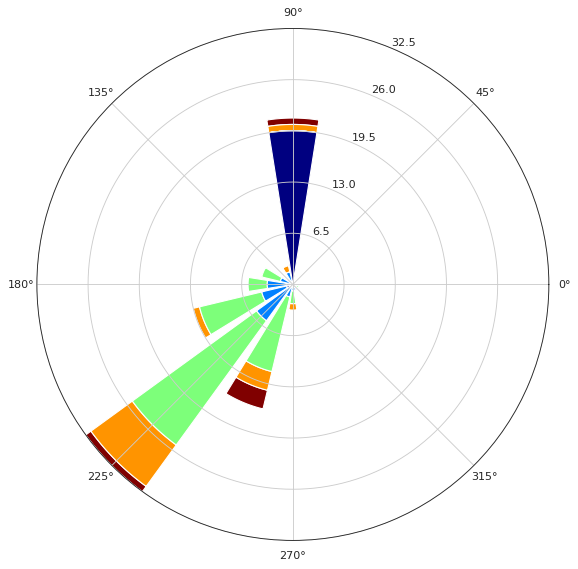

In [184]:

wd=bad_fg_days['wdir17'].values
ws=bad_fg_days['wspd17'].values
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, bins=np.arange(0, 10, 2), normed=True, nsector=16)


In [185]:
wd_freq=np.sum(table, axis=0)
wd_freq

array([21.13821138,  0.        ,  0.        ,  0.        ,  0.        ,
        0.81300813,  0.        ,  0.81300813,  3.25203252, 16.2601626 ,
       32.5203252 , 13.00813008,  5.69105691,  4.06504065,  0.        ,
        2.43902439])

In [186]:

list(zip(ax._info['dir']))

[(348.75,),
 (11.25,),
 (33.75,),
 (56.25,),
 (78.75,),
 (101.25,),
 (123.75,),
 (146.25,),
 (168.75,),
 (191.25,),
 (213.75,),
 (236.25,),
 (258.75,),
 (281.25,),
 (303.75,),
 (326.25,)]

[Text(0.0, 0, 'N'),
 Text(0.7853981633974483, 0, 'NNE'),
 Text(1.5707963267948966, 0, 'NE'),
 Text(2.356194490192345, 0, 'ENE'),
 Text(3.141592653589793, 0, 'E'),
 Text(3.9269908169872414, 0, 'ESE'),
 Text(4.71238898038469, 0, 'SE'),
 Text(5.497787143782138, 0, 'SSE')]

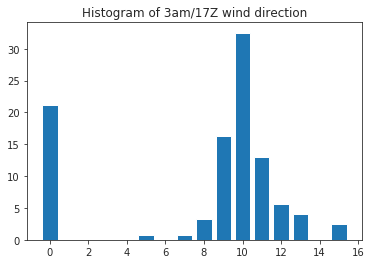

In [187]:
# Frequency bar plot for each direction - vertical column sums i.e ACROSS axis=0
wd=bad_fg_days['wdir17'].values
ws=bad_fg_days['wspd17'].values
wd_freq = np.sum(table, axis=0)
direction = ax._info['dir']
plt.bar(np.arange(16), wd_freq, align='center')
xlabels = ('N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW')
#xticks=np.arange(16)

dict_dir=dict(zip(np.arange(16), dirs))
plt.title('Histogram of 3am/17Z wind direction')

ax.set_xticklabels(xlabels)
xlabels = [dict_dir[x] for x in np.arange(16)]
ax.set_xticklabels(xlabels)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


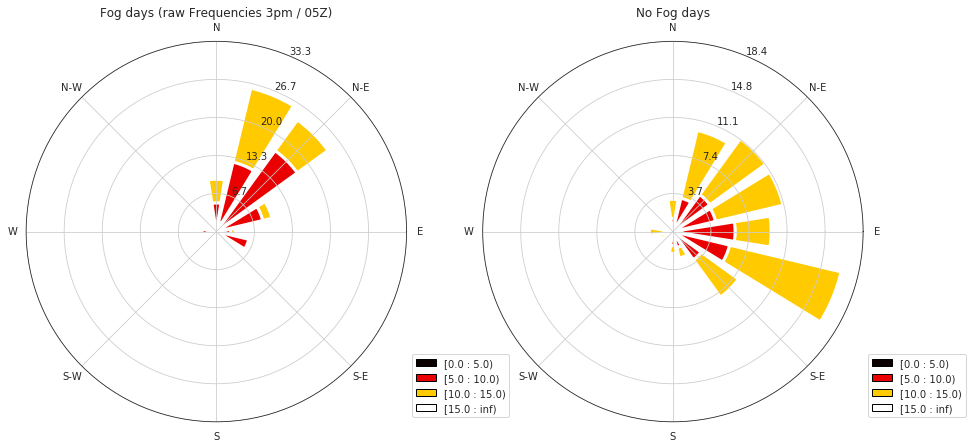

In [188]:
'''
df: Pandas DataFrame with DateTimeIndex as index and at least 2 columns ('speed' and 'direction').
var_name : name of var column name ; default value is VAR_DEFAULT='speed'
direction_name : name of direction column name ; default value is DIR_DEFAULT='direction'
kind : kind of plot (might be either, 'contour', 'contourf', 'bar', 'box', 'pdf')
'''
from windrose import plot_windrose
wdir='wdir5'
wspd='wspd5'

wind_df_fg = bad_fg_days[[wdir, wspd]].rename( columns={wdir: 'direction', wspd: 'speed'})
wind_df_nofg = not_in_bad_fg_days[[wdir, wspd]].rename( columns={wdir: 'direction', wspd: 'speed'})

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,
                              figsize=(15,12), 
                              subplot_kw=dict(projection='windrose')) #,sharex=True, sharey=True)
#ax1.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
# fig.suptitle('Surface Winds Fog Days (left) Vs Fog Free days Brisbane')

plot_windrose(wind_df_fg, kind='bar', 
              normed=True, bins=np.arange(0,20,5), 
              cmap=cm.hot, lw=3,ax=ax1)
ax1.legend(bbox_to_anchor=(1, 0))
ax1.set_title("Fog days (raw Frequencies 3pm / 05Z)")
#ax2.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)

plot_windrose(wind_df_nofg, kind='bar', 
              normed=True, bins=np.arange(0,20,5), 
              cmap=cm.hot, lw=3,ax=ax2)
ax2.legend(bbox_to_anchor=(1, 0))
ax2.set_title("No Fog days")

plt.savefig(f'./fg_plots/{sta}_3pm_WindRoses_fog_nofog_days', format='eps', dpi=1000)

plt.show();
# 3pm, 5Z sfc winds
# Note predominant moderate 10 to 15 knots NE breeze for fog days and E/SE 10/15 kts winds for no fog days
# light W/SW and SE 5 to 10 knots fog fog days and stronger W'ly (10/15) for no fog 

In [189]:
# NOTE : just considering easterly sector/semicircle winds (N thru E to S) only here 
print(fg_aut.loc[fg_aut['fogflag'] & ((fg_aut['wdir5']>0) & (fg_aut['wdir5']<180)),'wdir5'].describe())

# mid 50% 20 to 60 degrees
# mid 70% 10 to 80 (mean+/- 1std,  45 +/- 35) 
# so rough direction cut off for 3pm wind direction for fog days 080 degrees

fg_aut.loc[~fg_aut['fogflag'] & ((fg_aut['wdir5']>0) & (fg_aut['wdir5']<180)),'wdir5'].describe()
# mid 50% 30 to 120 degrees
# mid 70% 30 to 120 (mean+/- 1std,  75 +/- 45) 

count    156.000000
mean      46.410256
std       33.580884
min       10.000000
25%       20.000000
50%       40.000000
75%       60.000000
max      170.000000
Name: wdir5, dtype: float64


count    6156.000000
mean       74.082196
std        44.592412
min        10.000000
25%        30.000000
50%        70.000000
75%       120.000000
max       170.000000
Name: wdir5, dtype: float64

In [190]:
for dir in [50,60,70]:  # mean+/- 1std --> 40+/-30

    cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=(fg_aut['wdir5']>340)|(fg_aut['wdir5']<dir),
            margins=True)
    
    tn=cross.loc[False,False]
    fp=cross.loc[False,True]
    fn=cross.loc[True,False]
    tp=cross.loc[True,True]
    
    POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
    PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
    FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 
    
    ACC = (tn+tp)/(tn+tp+fp+fn)*100
    ERR = (fp+fn)/(tn+tp+fp+fn)*100
    
    print(f"\nWind Direction {dir}: TP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")
    
    print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
    tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
    Giving FPR or false alarm rate of {FAR:.0f}%')

    print(f'\nPOD (recall or TPR): {POD:.0f}% of the fog cases detected correctly' )
    print(f'{tn /cross.loc[False,"All"]*100:.0f}% of no fog days identified correctly.' )

    print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
    print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')
    
    if (POD > 60) & (FAR < 40):
        print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
    print(cross)
    print("============================================")
    
# No changge in metrics between 45 and 50 deg, 55 and 60, 65 and 70
# so we just go 10deg increments. Also Note precision doesn't change 
# TPR/recall/POD in 50 to 60% range unacceptable, we need at least 60% detection accuracy
# FPR or FAR more than 40% also no acceptable, means 40% or more fog predictions are wrong

# wdir5  < 60 deg and wdir5  > 340 looks like good cut off 
# wdir8  < 50 deg and wdir8  > 340 looks like good cut off 
# wdir11 < 30 deg and wdir11 > 290 looks like good cut off 
# wdir14 < 15 deg and wdir14 > 230 (or even 240) best POD / FAR balance


Wind Direction 50: TP=98	FN=75	TN=4960	FP=2174

2272 days when fog forecast,
    tp=98 days or about 4% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 30%

POD (recall or TPR): 57% of the fog cases detected correctly
70% of no fog days identified correctly.

Overall Accuracy Rate: 69% (includes correct no fog predictions as well!)
Misclassification Rate: 31%  (wrong fog and no fog predictions)
wdir5    False  True   All
fogflag                   
False     4960  2174  7134
True        75    98   173
All       5035  2272  7307

Wind Direction 60: TP=118	FN=55	TN=4531	FP=2603

2721 days when fog forecast,
    tp=118 days or about 4% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 36%

POD (recall or TPR): 68% of the fog cases detected correctly
64% of no fog days identified correctly.

Overall Accuracy Rate: 64% (includes correct no fog predictions as well!)
Misclassification Rate: 36%  (wrong fog and no fog predictions)



In [191]:
cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=(fg_aut['wdir5']>340)|(fg_aut['wdir5']<60),
            margins=True)
    
tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

smry1.append(['wdir5_lt60_gt340',tp,tn,fp,fn])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


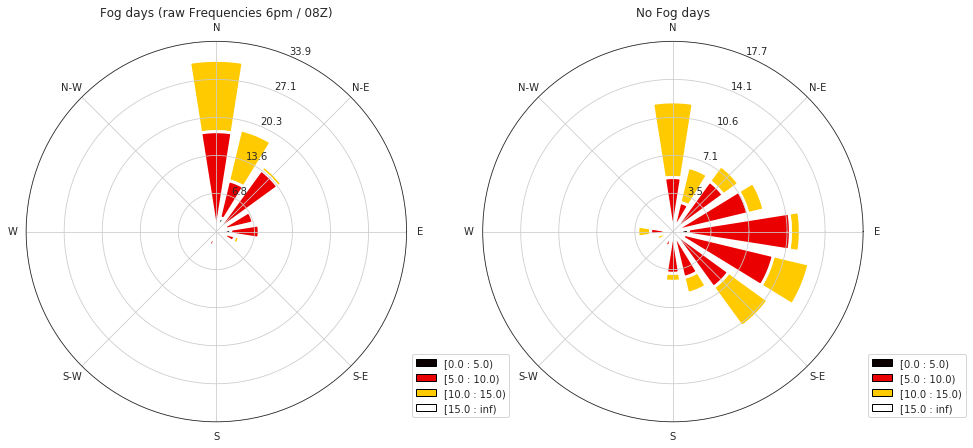

In [192]:
wdir='wdir8'
wspd='wspd8'
wind_df_fg = bad_fg_days[[wdir, wspd]].rename( columns={wdir: 'direction', wspd: 'speed'})
wind_df_nofg = not_in_bad_fg_days[[wdir, wspd]].rename( columns={wdir: 'direction', wspd: 'speed'})

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,
                              figsize=(15,12), 
                              subplot_kw=dict(projection='windrose')) #,sharex=True, sharey=True)
#ax1.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
# fig.suptitle('Surface Winds Fog Days (left) Vs Fog Free days Brisbane')

plot_windrose(wind_df_fg, kind='bar', 
              normed=True, bins=np.arange(0,20,5), 
              cmap=cm.hot, lw=3,ax=ax1)
ax1.legend(bbox_to_anchor=(1, 0))
ax1.set_title("Fog days (raw Frequencies 6pm / 08Z)")
#ax2.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)

plot_windrose(wind_df_nofg, kind='bar', 
              normed=True, bins=np.arange(0,20,5),
              cmap=cm.hot, lw=3,ax=ax2)
ax2.legend(bbox_to_anchor=(1, 0))
ax2.set_title("No Fog days")

plt.savefig(f'./fg_plots/{sta}_6pm_WindRoses_fog_nofog_days', format='eps', dpi=1000)
plt.show();
# 6pm.8Z
# Note predominant moderate 10 to 15 knots NE breeze for fog days and E to S 10/15 kts winds for no fog days
# light SW 5 to 10 knots fog fog days but stronger W'ly (10/15) for no fog 

In [193]:
# NOTE : just considering easterly sector/semicircle winds (N thru E to S) only here 
print(fg_aut.loc[fg_aut['fogflag'] & ((fg_aut['wdir8']>0) & (fg_aut['wdir8']<180)),'wdir8'].describe())

# mid 50% 10 to 60 degrees
# mid 70% 0 to 80 (mean+/- 1std,  40 +/- 40) 
# so rough direction cut off for 3pm wind direction for fog days 080 degrees

fg_aut.loc[~fg_aut['fogflag'] & ((fg_aut['wdir8']>0) & (fg_aut['wdir8']<180)),'wdir8'].describe()
# mid 50% 30 to 120 degrees
# mid 70% 30 to 130 (mean+/- 1std,  80 +/- 50)

count    132.000000
mean      43.181818
std       38.290137
min       10.000000
25%       10.000000
50%       30.000000
75%       62.500000
max      170.000000
Name: wdir8, dtype: float64


count    5730.000000
mean       81.493892
std        49.789945
min        10.000000
25%        30.000000
50%        90.000000
75%       120.000000
max       170.000000
Name: wdir8, dtype: float64

In [194]:
for dir in [40,50,60]:

    cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=(fg_aut['wdir8']>340)|(fg_aut['wdir8']<dir),
            margins=True)
    
    tn=cross.loc[False,False]
    fp=cross.loc[False,True]
    fn=cross.loc[True,False]
    tp=cross.loc[True,True]
    
    POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
    PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
    FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 
    
    ACC = (tn+tp)/(tn+tp+fp+fn)*100
    ERR = (fp+fn)/(tn+tp+fp+fn)*100
    
    print(f"\nWind Direction {dir}: TP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")
    
    print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
    tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
    Giving FPR or false alarm rate of {FAR:.0f}%')

    print(f'\nPOD (recall or TPR): {POD:.0f}% of the fog cases detected correctly' )
    print(f'{tn /cross.loc[False,"All"]*100:.0f}% of no fog days identified correctly.' )

    print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
    print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')
    
    if (POD > 60) & (FAR < 40):
        print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
    print(cross)
    print("============================================")

# wdir8  < 50 deg and   wdir8  > 340 looks like good cut off 


Wind Direction 40: TP=99	FN=74	TN=5248	FP=1886

1985 days when fog forecast,
    tp=99 days or about 5% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 26%

POD (recall or TPR): 57% of the fog cases detected correctly
74% of no fog days identified correctly.

Overall Accuracy Rate: 73% (includes correct no fog predictions as well!)
Misclassification Rate: 27%  (wrong fog and no fog predictions)
wdir8    False  True   All
fogflag                   
False     5248  1886  7134
True        74    99   173
All       5322  1985  7307

Wind Direction 50: TP=113	FN=60	TN=5057	FP=2077

2190 days when fog forecast,
    tp=113 days or about 5% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 29%

POD (recall or TPR): 65% of the fog cases detected correctly
71% of no fog days identified correctly.

Overall Accuracy Rate: 71% (includes correct no fog predictions as well!)
Misclassification Rate: 29%  (wrong fog and no fog predictions)



In [195]:
cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=(fg_aut['wdir8']>340)|(fg_aut['wdir8']<50),
            margins=True)
    
tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

smry1.append(['wdir8_lt50_gt340',tp,tn,fp,fn])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


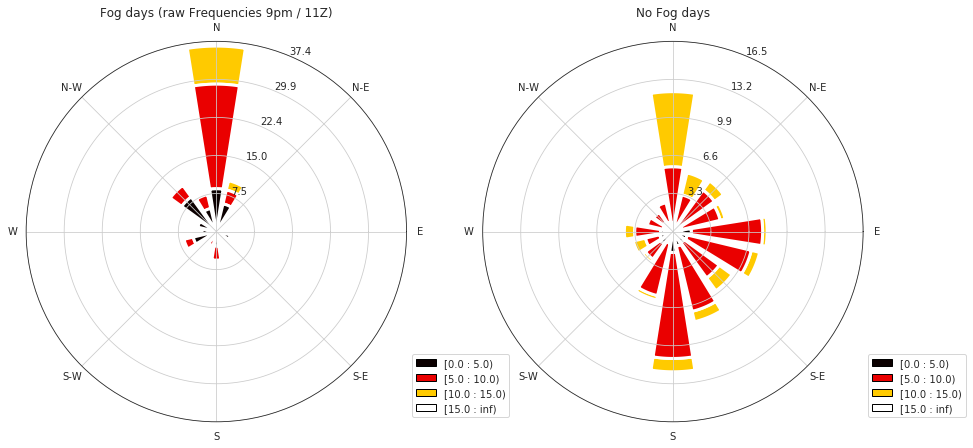

In [196]:
wdir='wdir11'
wspd='wspd11'
wind_df_fg = bad_fg_days[[wdir, wspd]].rename( columns={wdir: 'direction', wspd: 'speed'})
wind_df_nofg = not_in_bad_fg_days[[wdir, wspd]].rename( columns={wdir: 'direction', wspd: 'speed'})

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,
                              figsize=(15,12), 
                              subplot_kw=dict(projection='windrose')) #,sharex=True, sharey=True)
#ax1.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
# fig.suptitle('Surface Winds Fog Days (left) Vs Fog Free days Brisbane')

plot_windrose(wind_df_fg, kind='bar', 
              normed=True, bins=np.arange(0,20,5), 
              cmap=cm.hot, lw=3,ax=
              ax1)
ax1.legend(bbox_to_anchor=(1, 0))
ax1.set_title("Fog days (raw Frequencies 9pm / 11Z)")
#ax2.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)

plot_windrose(wind_df_nofg, kind='bar', 
              normed=True, bins=np.arange(0,20,5), 
              cmap=cm.hot, lw=3,ax=ax2)
ax2.legend(bbox_to_anchor=(1, 0))
ax2.set_title("No Fog days")

plt.savefig(f'./fg_plots/{sta}_9pm_WindRoses_fog_nofog_days', format='eps', dpi=1000)
plt.show();
# 9pm/11Z
# Note predominant moderate 10 to 15 knots NW to NE breeze for fog days and E to S 10/15 kts winds for no fog days
# light SW 5 to 10 knots fog fog days but stronger W'ly (10/15) for no fog 

In [197]:
# NOTE :
print(fg_aut.loc[fg_aut['fogflag'] ,'wdir11'].describe())

# mid 50% 20 to 350 degrees   (NW through to NE)
# so rough direction cut off for 3pm wind direction for fog days 080 degrees

fg_aut.loc[~fg_aut['fogflag'],'wdir11'].describe()
# mid 50% 80 to 230 degrees ENE through S to SW

count    173.000000
mean     198.554913
std      146.194732
min        0.000000
25%       20.000000
50%      240.000000
75%      350.000000
max      360.000000
Name: wdir11, dtype: float64


count    7122.000000
mean      161.163999
std       106.994042
min         0.000000
25%        80.000000
50%       150.000000
75%       230.000000
max       360.000000
Name: wdir11, dtype: float64

In [198]:
for dir in [20,30,40]:
    cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=(fg_aut['wdir11']>290)|(fg_aut['wdir11']<dir),
            margins=True)
   
    tn=cross.loc[False,False]
    fp=cross.loc[False,True]
    fn=cross.loc[True,False]
    tp=cross.loc[True,True]
    
    POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
    PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
    FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 
    
    ACC = (tn+tp)/(tn+tp+fp+fn)*100
    ERR = (fp+fn)/(tn+tp+fp+fn)*100
    
    print(f"\nWind Direction {dir}: TP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")
    
    print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
    tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
    Giving FPR or false alarm rate of {FAR:.0f}%')

    print(f'\nPOD (recall or TPR): {POD:.0f}% of the fog cases detected correctly' )
    print(f'{tn /cross.loc[False,"All"]*100:.0f}% of no fog days identified correctly.' )

    print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
    print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')
    
    if (POD >=60) & (FAR < 40):
        print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
    print(cross)
    print("============================================")

# wdir11 < 30deg and wdir11 > 290 looks like good cut off  


Wind Direction 20: TP=103	FN=70	TN=5375	FP=1759

1862 days when fog forecast,
    tp=103 days or about 6% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 25%

POD (recall or TPR): 60% of the fog cases detected correctly
75% of no fog days identified correctly.

Overall Accuracy Rate: 75% (includes correct no fog predictions as well!)
Misclassification Rate: 25%  (wrong fog and no fog predictions)
wdir11   False  True   All
fogflag                   
False     5375  1759  7134
True        70   103   173
All       5445  1862  7307

Wind Direction 30: TP=117	FN=56	TN=5187	FP=1947

2064 days when fog forecast,
    tp=117 days or about 6% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 27%

POD (recall or TPR): 68% of the fog cases detected correctly
73% of no fog days identified correctly.

Overall Accuracy Rate: 73% (includes correct no fog predictions as well!)
Misclassification Rate: 27%  (wrong fog and no fog predictions)

In [199]:
cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=(fg_aut['wdir11']>340)|(fg_aut['wdir11']<40),
            margins=True)
    
tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

smry1.append(['wdir11_lt40_gt340',tp,tn,fp,fn])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


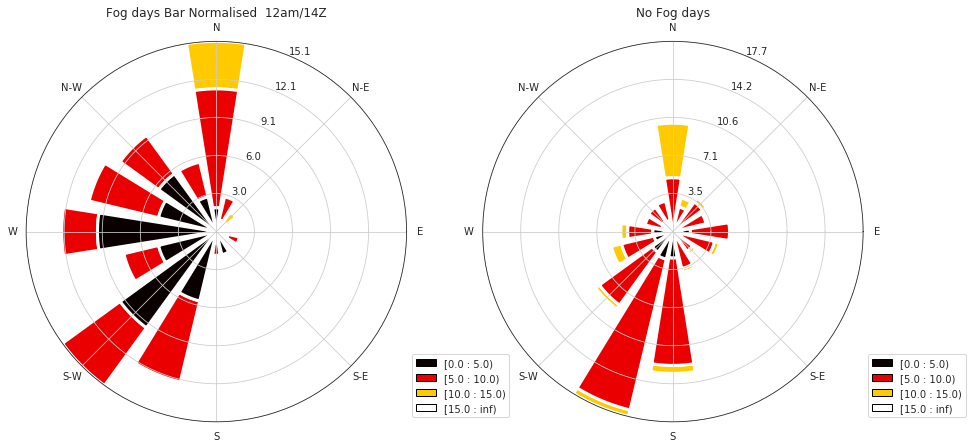

In [200]:
'''
For fog days, 17Z sfc winds are more SW (Avg direction about 225 degrees) than non-fog days when its more SSW (about 202 deg)
Better look at winds earlier in the night or evening cause by 17Z/3am winds by default from SW quarter around this time

Afternoon/evening sfc winds 3pm 6pm 9pm are best for discriminating bet fog and no fog events 

For fog days                            For fog free days
~10/7% cases sfc winds SW'lies 2-4 knots   ~10 cases sfc winds SSW'lies 2-4 knots
~40/28% cases sfc winds SW'lies 4-6 knots   ~450/7% cases sfc winds SSW'lies 4-6 knots
~50/35% cases sfc winds SW'lies 6-8 knots   ~1500/20% cases sfc winds SSW'lies 6-8 knots

Just based on 17Z/3am surface winds - more than 60% of fog cases associated with at least 4 knots winds (so generally advected fog)
'''

wdir='wdir14'
wspd='wspd14'
wind_df_fg = bad_fg_days[[wdir, wspd]].rename( columns={wdir: 'direction', wspd: 'speed'})
wind_df_nofg = not_in_bad_fg_days[[wdir, wspd]].rename( columns={wdir: 'direction', wspd: 'speed'})

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,
                              figsize=(15,12), 
                              subplot_kw=dict(projection='windrose')) #,sharex=True, sharey=True)
#ax1.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
# fig.suptitle('Surface Winds Fog Days (left) Vs Fog Free days Brisbane')

plot_windrose(wind_df_fg, kind='bar', 
              normed=True, bins=np.arange(0,20,5), 
              cmap=cm.hot, lw=3,ax=ax1)
ax1.legend(bbox_to_anchor=(1, 0))
ax1.set_title("Fog days Bar Normalised  12am/14Z")
#ax2.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)

plot_windrose(wind_df_nofg, kind='bar', 
              normed=True, bins=np.arange(0,20,5), 
              cmap=cm.hot, lw=3,ax=ax2)
ax2.legend(bbox_to_anchor=(1, 0))
ax2.set_title("No Fog days")

plt.savefig(f'./fg_plots/{sta}_12am_WindRoses_fog_nofog_days', format='eps', dpi=1000)
plt.show();

In [201]:
# NOTE :
print(fg_aut.loc[fg_aut['fogflag'] ,'wdir14'].describe())

# mid 50% 240 to 310 SW to NW 
# so rough direction cut off for 3pm wind direction for fog days 080 degrees

fg_aut.loc[~fg_aut['fogflag'],'wdir14'].describe()
# mid 50% 120 to 250 SE to SW

count    173.000000
mean     215.433526
std      118.544773
min        0.000000
25%      170.000000
50%      240.000000
75%      310.000000
max      360.000000
Name: wdir14, dtype: float64


count    7113.000000
mean      188.723464
std        99.416046
min         0.000000
25%       120.000000
50%       200.000000
75%       250.000000
max       360.000000
Name: wdir14, dtype: float64

In [202]:
for dir in [220,230,240]:

    cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=(fg_aut['wdir14']>dir) | (fg_aut['wdir14']<15) ,
            margins=True)
    
    tn=cross.loc[False,False]
    fp=cross.loc[False,True]
    fn=cross.loc[True,False]
    tp=cross.loc[True,True]
    
    POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
    PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
    FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 
    
    ACC = (tn+tp)/(tn+tp+fp+fn)*100
    ERR = (fp+fn)/(tn+tp+fp+fn)*100
    
    print(f"\nWind Direction {dir}: TP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")
    
    print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
    tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
    Giving FPR or false alarm rate of {FAR:.0f}%')

    print(f'\nPOD (recall or TPR): {POD:.0f}% of the fog cases detected correctly' )
    print(f'{tn /cross.loc[False,"All"]*100:.0f}% of no fog days identified correctly.' )

    print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
    print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')
    
    if (POD > 60) & (FAR < 40):
        print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
    print(cross)
    print("============================================")
    
# wdir14 < 15 deg and wdir14 > 230 (or even 240) best POD / FAR balance 


Wind Direction 220: TP=123	FN=50	TN=4405	FP=2729

2852 days when fog forecast,
    tp=123 days or about 4% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 38%

POD (recall or TPR): 71% of the fog cases detected correctly
62% of no fog days identified correctly.

Overall Accuracy Rate: 62% (includes correct no fog predictions as well!)
Misclassification Rate: 38%  (wrong fog and no fog predictions)

###########################
CONSIDER THIS CONDITION FOR FOG FORECASTING!
wdir14   False  True   All
fogflag                   
False     4405  2729  7134
True        50   123   173
All       4455  2852  7307

Wind Direction 230: TP=114	FN=59	TN=4649	FP=2485

2599 days when fog forecast,
    tp=114 days or about 4% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 35%

POD (recall or TPR): 66% of the fog cases detected correctly
65% of no fog days identified correctly.

Overall Accuracy Rate: 65% (includes correct no fog predictio

In [203]:
cross = pd.crosstab(index=fg_aut['fogflag'],
            columns=(fg_aut['wdir14']>230)|(fg_aut['wdir14']<15),
            margins=True)
    
tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

smry1.append(['wdir14_gt230_lt15',tp,tn,fp,fn])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


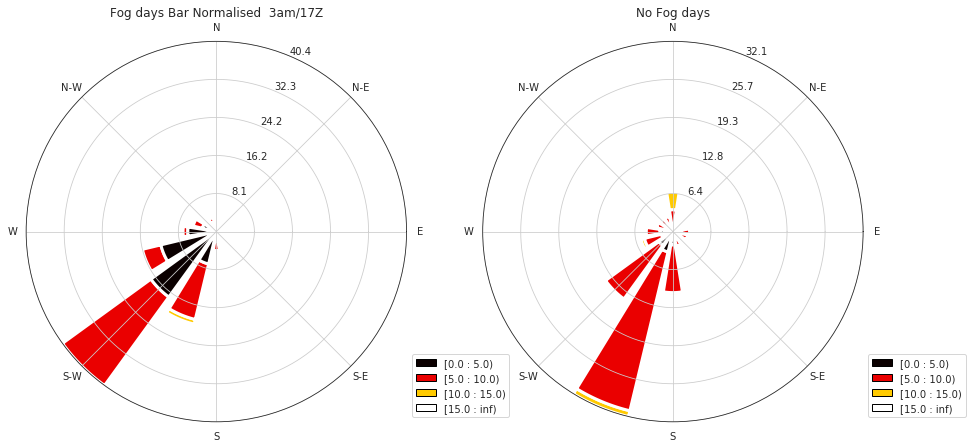

In [204]:
wdir='wdir17'
wspd='wspd17'
wind_df_fg = bad_fg_days[[wdir, wspd]].rename( columns={wdir: 'direction', wspd: 'speed'})
wind_df_nofg = not_in_bad_fg_days[[wdir, wspd]].rename( columns={wdir: 'direction', wspd: 'speed'})

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,
                              figsize=(15,12), 
                              subplot_kw=dict(projection='windrose')) #,sharex=True, sharey=True)
#ax1.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
# fig.suptitle('Surface Winds Fog Days (left) Vs Fog Free days Brisbane')


'''
if station == 'YTWB':
    plot_windrose(wind_3am_fg, kind='bar', 
              normed=True, bins=np.arange(0,30,5), 
              cmap=cm.hot, lw=3,ax=ax1)
    plot_windrose(wind_3am_nofg, kind='bar', 
              normed=True, bins=np.arange(0,30,5), 
              cmap=cm.hot, lw=3,ax=ax2)
else:
    plot_windrose(wind_3am_fg, kind='bar', 
              normed=True, bins=np.arange(0,20,5), 
              cmap=cm.hot, lw=3,ax=ax1)
    plot_windrose(wind_3am_nofg, kind='bar', 
              normed=True, bins=np.arange(0,20,5), 
              cmap=cm.hot, lw=3,ax=ax2)

'''
plot_windrose(wind_df_fg, kind='bar', 
              normed=True, bins=np.arange(0,20,5), 
              cmap=cm.hot, lw=3,ax=ax1)
ax1.legend(bbox_to_anchor=(1, 0))
ax1.set_title("Fog days Bar Normalised  3am/17Z")
#ax2.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)

plot_windrose(wind_df_nofg, kind='bar', 
              normed=True, bins=np.arange(0,20,5), 
              cmap=cm.hot, lw=3,ax=ax2)
ax2.legend(bbox_to_anchor=(1, 0))
ax2.set_title("No Fog days")

plt.savefig(f'./fg_plots/{sta}_3am_WindRoses_fog_nofog_days', format='eps', dpi=1000)
plt.show();

In [205]:
# NOTE :
print(fg_aut.loc[fg_aut['fogflag'] ,'wdir17'].describe())

# mid 50% 240 to 310 SW to NW 
# so rough direction cut off for 3pm wind direction for fog days 080 degrees

fg_aut.loc[~fg_aut['fogflag'],'wdir17'].describe()
# mid 50% 120 to 250 SE to SW

count    173.000000
mean     182.774566
std      104.416101
min        0.000000
25%      180.000000
50%      220.000000
75%      240.000000
max      360.000000
Name: wdir17, dtype: float64


count    7109.000000
mean      201.146434
std        83.294702
min         0.000000
25%       180.000000
50%       210.000000
75%       230.000000
max       360.000000
Name: wdir17, dtype: float64

In [206]:
aws05_sonde23_sameday['fogflag']= aws05_sonde23_sameday['fogflag'].astype(bool)
aws05_sonde23_sameday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6895 entries, 2000-02-06 to 2020-03-29
Data columns (total 25 columns):
WDir          6843 non-null float64
WS            6843 non-null float64
T             6842 non-null float64
Td            6842 non-null float64
RH            6842 non-null float64
pptnSince9    6795 non-null float64
vis           6829 non-null float64
vis_aws       6694 non-null float64
PW            513 non-null float64
QNH           6830 non-null float64
Ceil1_ht      2500 non-null float64
Ceil1_amnt    6844 non-null object
Ceil2_ht      1283 non-null float64
Ceil2_amnt    6844 non-null object
Ceil3_ht      723 non-null float64
Ceil3_amnt    6844 non-null object
fogflag       6895 non-null bool
900_wdir      6683 non-null float64
900_WS        6683 non-null float64
850_wdir      6625 non-null float64
850_WS        6625 non-null float64
season        6895 non-null object
lr_850_500    6856 non-null float64
lr_sfc_850    6876 non-null float64
mid_rh        6851 n

In [207]:
snd900 = aws05_sonde23_sameday.loc[:,['fogflag','900_wdir','900_WS']]\
        .rename(columns={'900_wdir': 'direction', '900_WS': 'speed'})
snd900 = snd900.dropna(subset=['fogflag','direction','speed'])

snd900['fogflag']= snd900['fogflag'].astype(bool)

snd900_fg =   snd900.loc[snd900['fogflag']]
snd900_nofg = snd900.loc[~snd900['fogflag']]
snd900.tail()

fogflag  direction  speed
2020-03-25    False       90.0   16.4
2020-03-26    False      115.0    8.2
2020-03-27    False      150.0   13.4
2020-03-28    False       95.0   20.6
2020-03-29     True       95.0    6.2

In [208]:
snd900.info()
snd900.isnull().sum()
# snd900['direction']=snd900['direction'].astype("Float32").astype("Int32")
# snd900['speed']=snd900['speed'].astype("Int32")
print(snd900[snd900['speed'].isnull()])
snd900['speed'].isnull().any()
#snd900['speed'] = pd.to_numeric(snd900['speed'], errors='coerce')
#snd900['speed'] = snd900.dropna(subset=['speed'])
#snd900['speed'] = snd900['speed'].astype(int)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6683 entries, 2000-02-18 to 2020-03-29
Data columns (total 3 columns):
fogflag      6683 non-null bool
direction    6683 non-null float64
speed        6683 non-null float64
dtypes: bool(1), float64(2)
memory usage: 163.2 KB
Empty DataFrame
Columns: [fogflag, direction, speed]
Index: []


False

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


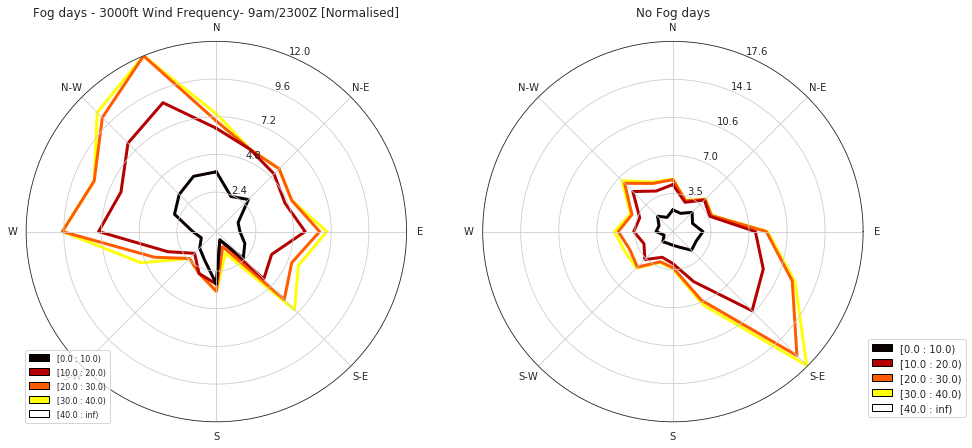

In [209]:
import matplotlib.pyplot as plt
from windrose import plot_windrose
import matplotlib.cm as cm


fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,
                              figsize=(15,12), 
                              subplot_kw=dict(projection='windrose')) 
#,sharex=True, sharey=True)
#ax1.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
# fig.suptitle('Surface Winds Fog Days (left) Vs Fog Free days Brisbane')
plot_windrose(snd900_fg, 
              kind='contour', 
              normed=True, 
              bins=np.arange(0,50,10), 
              cmap=cm.hot, lw=3,ax=ax1)
#ax1.legend(bbox_to_anchor=(1, 0))
ax1.set_title("Fog days - 3000ft Wind Frequency- 9am/2300Z [Normalised]")

#ax2.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
plot_windrose(snd900_nofg, 
              kind='contour', 
              normed=True, 
              bins=np.arange(0,50,10), 
              cmap=cm.hot, lw=3,ax=ax2)
ax2.legend(bbox_to_anchor=(1, 0))
ax2.set_title("No Fog days")

plt.savefig(f'./fg_plots/{sta}_3000ft_WindContours_fog_nofog_days', format='eps', dpi=1000)
plt.show();

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


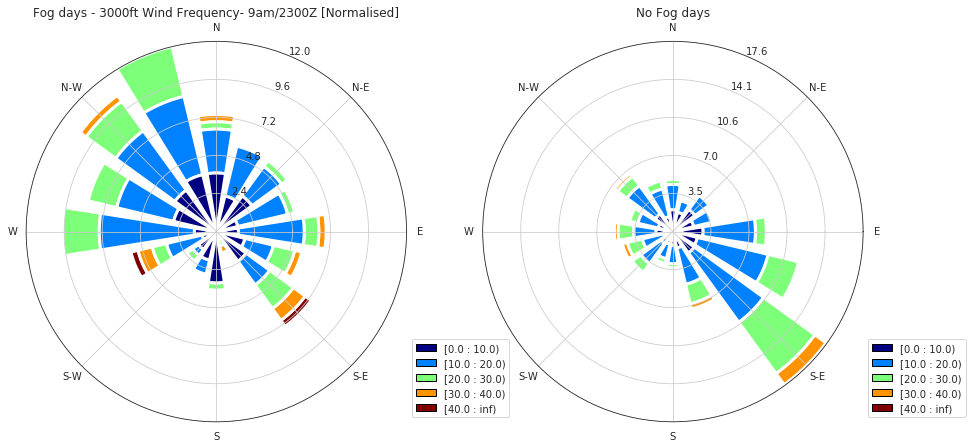

In [210]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,
                              figsize=(15,12), 
                              subplot_kw=dict(projection='windrose')) 
#,sharex=True, sharey=True)
#ax1.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
# fig.suptitle('Surface Winds Fog Days (left) Vs Fog Free days Brisbane')
plot_windrose(snd900_fg, 
              kind='bar', 
              normed=True, 
              bins=np.arange(0,50,10),lw=3,ax=ax1)
ax1.legend(bbox_to_anchor=(1, 0))
# cmap=cm.hot does not look good here
ax1.set_title("Fog days - 3000ft Wind Frequency- 9am/2300Z [Normalised]")

#ax2.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
plot_windrose(snd900_nofg, 
              kind='bar', 
              normed=True, 
              bins=np.arange(0,50,10),lw=3,ax=ax2)
ax2.legend(bbox_to_anchor=(1, 0))
ax2.set_title("No Fog days")

plt.savefig(f'./fg_plots/{sta}_3000ft_WindRoses_fog_nofog_days', format='eps', dpi=1000)
plt.show();

In [211]:
# NOTE :
print(snd900.loc[snd900['fogflag'] ,'direction'].describe())

# mid 50% 190-320 degrees   (sw to nw)
# rough direction cut off for 900 wind direction for fog days >190 degrees

snd900.loc[~snd900['fogflag'] ,'direction'].describe()
# mid 50% 100 to 250 degrees E to SSW

count    216.000000
mean     204.560185
std      113.705724
min        5.000000
25%       98.750000
50%      240.000000
75%      310.000000
max      360.000000
Name: direction, dtype: float64


count    6467.000000
mean      172.411474
std        95.428137
min         0.000000
25%       105.000000
50%       145.000000
75%       255.000000
max       360.000000
Name: direction, dtype: float64

In [212]:
for dir in [50,60,70]:

    cross = pd.crosstab(index=snd900['fogflag'],
            columns=(snd900['direction']<dir) | (snd900['direction']>240) ,
            margins=True)
    
    tn=cross.loc[False,False]
    fp=cross.loc[False,True]
    fn=cross.loc[True,False]
    tp=cross.loc[True,True]
    
    POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
    PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
    FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 
    
    ACC = (tn+tp)/(tn+tp+fp+fn)*100
    ERR = (fp+fn)/(tn+tp+fp+fn)*100
    
    print(f"\nWind Direction {dir}: TP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")
    
    print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
    tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
    Giving FPR or false alarm rate of {FAR:.0f}%')

    print(f'\nPOD (recall or TPR): {POD:.0f}% of the fog cases detected correctly' )
    print(f'{tn /cross.loc[False,"All"]*100:.0f}% of no fog days identified correctly.' )

    print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
    print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')
    
    if (POD > 60) & (FAR < 40):
        print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
    print(cross)
    print("============================================")
    
# 900wdir < 60 deg and 900wdir > 240 best POD (77%) / FAR (38%) balance 
# 850wdir < 40 deg and 850wdir > 240 best POD (68%) / FAR (35%) balance 


Wind Direction 50: TP=133	FN=83	TN=4127	FP=2340

2473 days when fog forecast,
    tp=133 days or about 5% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 36%

POD (recall or TPR): 62% of the fog cases detected correctly
64% of no fog days identified correctly.

Overall Accuracy Rate: 64% (includes correct no fog predictions as well!)
Misclassification Rate: 36%  (wrong fog and no fog predictions)

###########################
CONSIDER THIS CONDITION FOR FOG FORECASTING!
direction  False  True   All
fogflag                     
False       4127  2340  6467
True          83   133   216
All         4210  2473  6683

Wind Direction 60: TP=136	FN=80	TN=3998	FP=2469

2605 days when fog forecast,
    tp=136 days or about 5% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 38%

POD (recall or TPR): 63% of the fog cases detected correctly
62% of no fog days identified correctly.

Overall Accuracy Rate: 62% (includes correct no fog p

In [213]:
cross = pd.crosstab(index=snd900['fogflag'],
            columns=(snd900['direction']<50) | (snd900['direction']>240) ,
            margins=True)
    
tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

smry1.append(['wdir3000_gt240_lt50',tp,tn,fp,fn])

Index(['fogflag', 'direction', 'speed'], dtype='object') (216, 3)


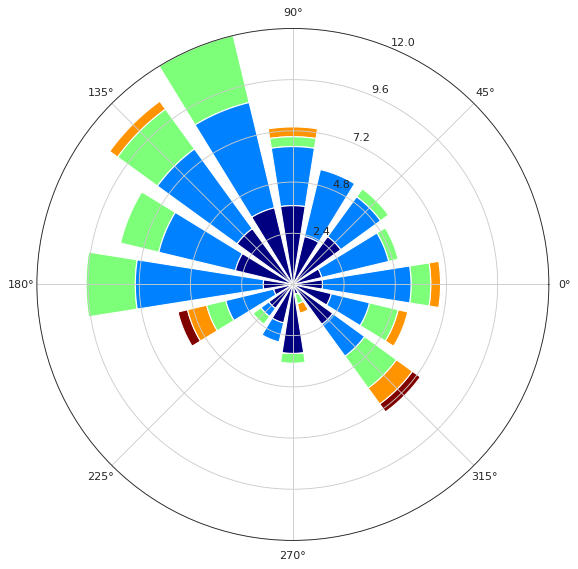

In [214]:

'''
Looks like 3000ft direction can be quite good discriminator fog days vs non-fog Days
Fog days winds predominantly from NW to SW sectors
Non-Fog days winds predominantly from E thru S i.e SE sector
wid speeds not really strong discriminator
'''
from windrose import WindroseAxes
print(snd900_fg.columns,snd900_fg.shape)
wd=snd900_fg['direction'].values
ws=snd900_fg['speed'].values
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, bins=np.arange(0,50,10), normed=True, nsector=16)

/home/bou/py37/lib64/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


(105, 3)


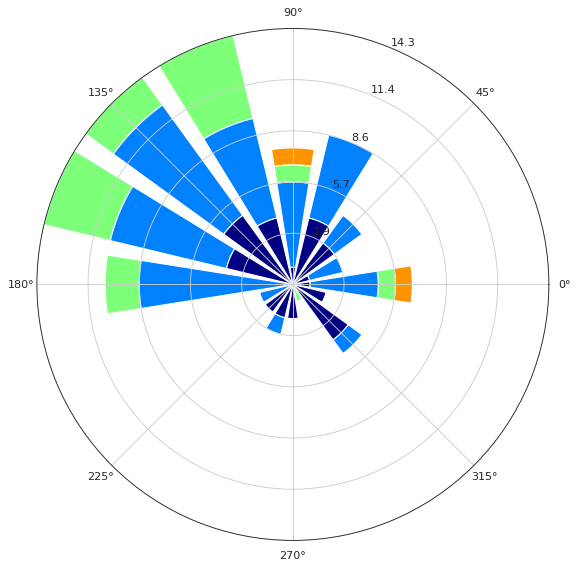

In [215]:
mask1 = (fg_days['min_vis']<=1) & (fg_days['fg_duration']>=1)

#real bad fog days
snd_900_bad_fg_days = snd900.loc[(fg_days.loc[mask1]).index].dropna(subset=['direction'])
print(snd_900_bad_fg_days.shape)
wd=snd_900_bad_fg_days['direction'].values
ws=snd_900_bad_fg_days['speed'].values
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, bins=np.arange(0,50,10), normed=True, nsector=16)


In [216]:
table = ax._info['table']  # 5 rows for each speed bin, 16 cols for direction bin
table.shape
dirs=('N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW')
print(table[0,:].sum(),table[1,:].sum(),table[2,:].sum(),table[3,:].sum(),table[4,:].sum())
# row sums Percentage or ferquency of wind speeds in this bin
'''40% of fog cases had 3000ft winds 0-10 knots
   42% of fog cases had 3000ft winds 10-20 knots
   15% of fog cases had 3000ft winds 20-30 knots, only 3% 30-40, 0% 40+
   > 83% of fog cases wind below 20 knots
   > 97% of fog cases wind below 30 knots
'''
table.sum(axis=1)

33.33333333333333 49.52380952380952 15.238095238095237 1.9047619047619047 0.0


array([33.33333333, 49.52380952, 15.23809524,  1.9047619 ,  0.        ])

In [217]:
table.sum(axis=0) # OR  np.sum(table, axis=0) sum ACROSS rows so column sums
dir_frq=list(zip(dirs,table.sum(axis=0)))
'''
6 most common gradient wind direction for fog days in the NW and SW sectors
NNW,NW,WNW,W,WSW  ~ 60% and including SW,SSW,S 7%,4%,6%  
about 75% or 3/4 of all fog cases
Least likely gradient wind directions (freq <5%) N through E to S
'''
sorted(
       list(zip(dirs,np.around(table.sum(axis=0),decimals=0))), 
       key = lambda x: x[1],
       reverse=True)

[('WNW', 14.0),
 ('NW', 14.0),
 ('NNW', 14.0),
 ('W', 10.0),
 ('NNE', 9.0),
 ('N', 8.0),
 ('E', 7.0),
 ('NE', 5.0),
 ('SE', 5.0),
 ('ENE', 3.0),
 ('SSW', 3.0),
 ('ESE', 2.0),
 ('S', 2.0),
 ('SW', 2.0),
 ('WSW', 2.0),
 ('SSE', 1.0)]

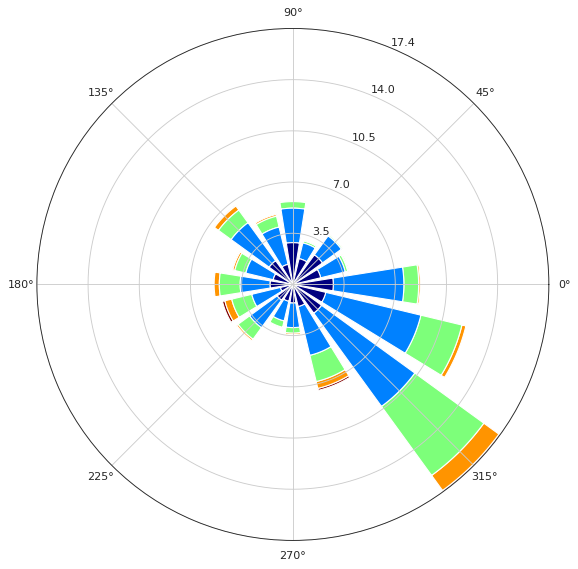

In [218]:
wd=snd900_nofg['direction'].values
ws=snd900_nofg['speed'].values
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, bins=np.arange(0,50,10), normed=True, nsector=16)


In [219]:
table = ax._info['table']  # 5 rows for each speed bin, 16 cols for direction bin
table.shape
dirs=('N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW')
table[0,:].sum(),table[1,:].sum(),table[2,:].sum(),table[3,:].sum(),table[4,:].sum()
# row sums Percentage or ferquency of wind speeds in this bin
table.sum(axis=1)


array([29.03974022, 46.66769754, 19.60723674,  4.03587444,  0.64945106])

In [220]:

'''23% of fog cases had 3000ft winds 0-10 knots
   48% of fog cases had 3000ft winds 10-20 knots
   21% of fog cases had 3000ft winds 20-30 knots, only 4% 30-40, <1% 40+
   > 85% of fog cases wind below 20 knots
   > 97% of fog cases wind below 30 knots
'''
table.sum(axis=0)
dir_frq=list(zip(dirs,table.sum(axis=0)))
'''
6 most common gradient wind direction (>10%) for no fog days in the SE,ESE,E sectors
Least likely gradient wind directions (freq <5%) N through E to S
'''
sorted(
       list(zip(dirs,np.around(table.sum(axis=0),decimals=0))), 
       key = lambda x: x[1],
       reverse=True)

[('SE', 17.0),
 ('ESE', 12.0),
 ('E', 9.0),
 ('SSE', 7.0),
 ('NW', 7.0),
 ('N', 6.0),
 ('SW', 5.0),
 ('WSW', 5.0),
 ('W', 5.0),
 ('NNW', 5.0),
 ('NE', 4.0),
 ('ENE', 4.0),
 ('WNW', 4.0),
 ('NNE', 3.0),
 ('S', 3.0),
 ('SSW', 3.0)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


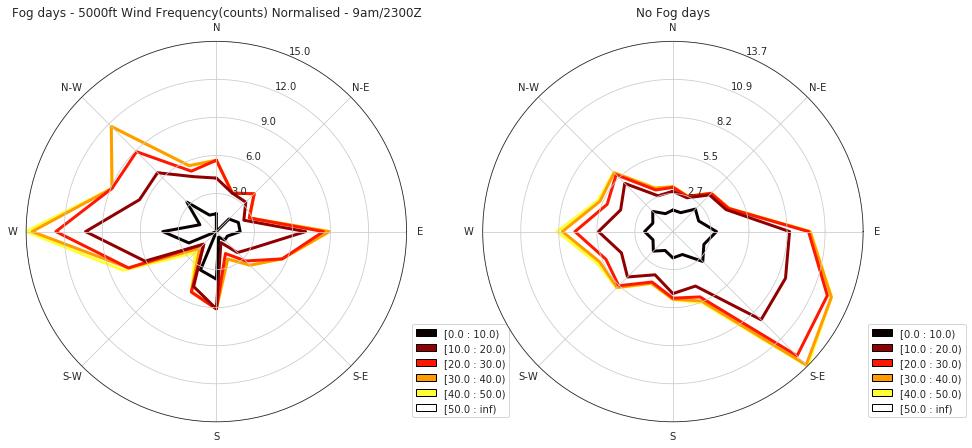

In [221]:
snd850 = aws05_sonde23_sameday.loc[:,['fogflag','850_wdir','850_WS']]\
        .rename(columns={'850_wdir': 'direction', '850_WS': 'speed'})
snd850 = snd850.dropna(subset=['fogflag','direction','speed'])

snd850['fogflag']= snd850['fogflag'].astype(bool)

snd850_fg =   snd850.loc[snd850['fogflag']]
snd850_nofg = snd850.loc[~snd850['fogflag']]

snd850_fg['speed'].max(),snd850_nofg['speed'].max()

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,
                              figsize=(15,12), 
                              subplot_kw=dict(projection='windrose')) #,sharex=True, sharey=True)
#ax1.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
# fig.suptitle('Surface Winds Fog Days (left) Vs Fog Free days Brisbane')
plot_windrose(snd850_fg, kind='contour', 
              normed=True, bins=np.arange(0,60,10), 
              cmap=cm.hot, lw=3,ax=ax1)
ax1.legend(bbox_to_anchor=(1, 0))
ax1.set_title("Fog days - 5000ft Wind Frequency(counts) Normalised - 9am/2300Z")
#ax2.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
plot_windrose(snd850_nofg, kind='contour', 
              normed=True, bins=np.arange(0,60,10), 
              cmap=cm.hot, lw=3,ax=ax2)
ax2.legend(bbox_to_anchor=(1, 0))
ax2.set_title("No Fog days")

plt.savefig(f'./fg_plots/{sta}_5000ft_WindContours_fog_nofog_days', format='eps', dpi=1000)
plt.show();

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


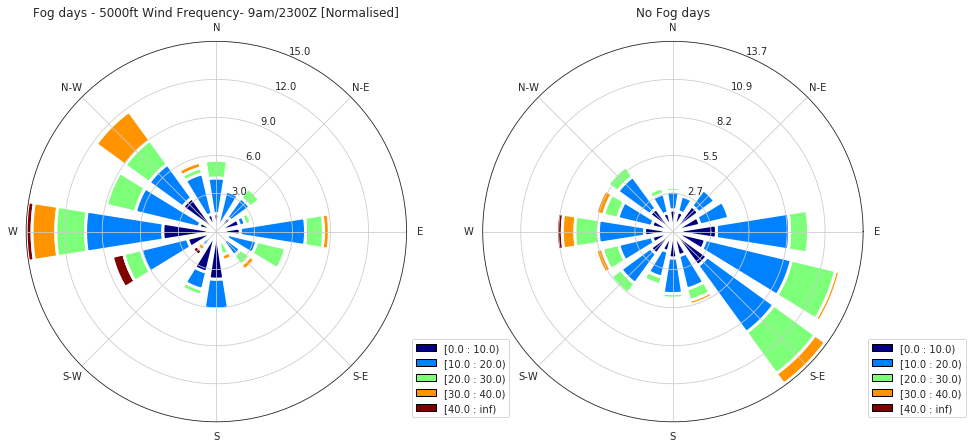

In [222]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,
                              figsize=(15,12), 
                              subplot_kw=dict(projection='windrose')) 
#,sharex=True, sharey=True)
#ax1.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
# fig.suptitle('Surface Winds Fog Days (left) Vs Fog Free days Brisbane')
plot_windrose(snd850_fg, 
              kind='bar', 
              normed=True, 
              bins=np.arange(0,50,10),lw=3,ax=ax1)
ax1.legend(bbox_to_anchor=(1, 0))
# cmap=cm.hot does not look good here
ax1.set_title("Fog days - 5000ft Wind Frequency- 9am/2300Z [Normalised]")

#ax2.contourf(wd, ws, bins=np.arange(0, 8, 1), cmap=cm.hot)
plot_windrose(snd850_nofg, 
              kind='bar', 
              normed=True, 
              bins=np.arange(0,50,10),lw=3,ax=ax2)
ax2.legend(bbox_to_anchor=(1, 0))
ax2.set_title("No Fog days")

plt.savefig(f'./fg_plots/{sta}_5000ft_WindRoses_fog_nofog_days', format='eps', dpi=1000)
plt.show()

In [223]:
# NOTE :
print(snd850.loc[snd850['fogflag'] ,'direction'].describe())

# mid 50% 220-300 degrees   (sw to nw)
# rough direction cut off for 900 wind direction for fog days >220 degrees

snd850.loc[~snd850['fogflag'] ,'direction'].describe()
# mid 50% 100 to 260 degrees E to SW

count    213.000000
mean     210.633803
std       99.856960
min        5.000000
25%      115.000000
50%      245.000000
75%      295.000000
max      360.000000
Name: direction, dtype: float64


count    6412.000000
mean      175.485028
std        91.784839
min         0.000000
25%       105.000000
50%       150.000000
75%       260.000000
max       360.000000
Name: direction, dtype: float64

In [224]:
for dir in [30,40,50]:

    cross = pd.crosstab(index=snd850['fogflag'],
            columns=(snd850['direction']<dir) | (snd850['direction']>240) ,
            margins=True)
    
    tn=cross.loc[False,False]
    fp=cross.loc[False,True]
    fn=cross.loc[True,False]
    tp=cross.loc[True,True]
    
    POD  = tp/(tp+fn)*100  # recall or TPR: fraction of fog days that get detected 
    PREC = tp/(tp+fp)*100 # fraction of fog(=True) forecasts that were correct
    FAR  = fp/(fp+tn)*100  # FPR fraction of no fog days that we got wrong 
    
    ACC = (tn+tp)/(tn+tp+fp+fn)*100
    ERR = (fp+fn)/(tn+tp+fp+fn)*100
    
    print(f"\nWind Direction {dir}: TP={tp}\tFN={fn}\tTN={tn}\tFP={fp}")
    
    print(f'\n{cross.loc["All",True]} days when fog forecast,\n\
    tp={tp} days or about {PREC:.0f}% of the days actually get fog [precision].\n\
    Giving FPR or false alarm rate of {FAR:.0f}%')

    print(f'\nPOD (recall or TPR): {POD:.0f}% of the fog cases detected correctly' )
    print(f'{tn /cross.loc[False,"All"]*100:.0f}% of no fog days identified correctly.' )

    print(f'\nOverall Accuracy Rate: {ACC:.0f}% (includes correct no fog predictions as well!)')
    print(f'Misclassification Rate: {ERR:.0f}%  (wrong fog and no fog predictions)')
    
    if (POD > 60) & (FAR < 40):
        print("\n###########################\nCONSIDER THIS CONDITION FOR FOG FORECASTING!")
    print(cross)
    print("============================================")
    
# 900wdir < 60 deg and 900wdir > 240 best POD (77%) / FAR (38%) balance 
# 850wdir < 40 deg and 850wdir > 240 best POD (68%) / FAR (35%) balance  


Wind Direction 30: TP=114	FN=99	TN=4293	FP=2119

2233 days when fog forecast,
    tp=114 days or about 5% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 33%

POD (recall or TPR): 54% of the fog cases detected correctly
67% of no fog days identified correctly.

Overall Accuracy Rate: 67% (includes correct no fog predictions as well!)
Misclassification Rate: 33%  (wrong fog and no fog predictions)
direction  False  True   All
fogflag                     
False       4293  2119  6412
True          99   114   213
All         4392  2233  6625

Wind Direction 40: TP=119	FN=94	TN=4197	FP=2215

2334 days when fog forecast,
    tp=119 days or about 5% of the days actually get fog [precision].
    Giving FPR or false alarm rate of 35%

POD (recall or TPR): 56% of the fog cases detected correctly
65% of no fog days identified correctly.

Overall Accuracy Rate: 65% (includes correct no fog predictions as well!)
Misclassification Rate: 35%  (wrong fog and no fog pr

In [225]:
cross = pd.crosstab(index=snd850['fogflag'],
            columns=(snd850['direction']<50) | (snd850['direction']>240) ,
            margins=True)
    
tn=cross.loc[False,False]
fp=cross.loc[False,True]
fn=cross.loc[True,False]
tp=cross.loc[True,True]

smry1.append(['wdir5000_gt240_lt50',tp,tn,fp,fn])

/home/bou/py37/lib64/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially

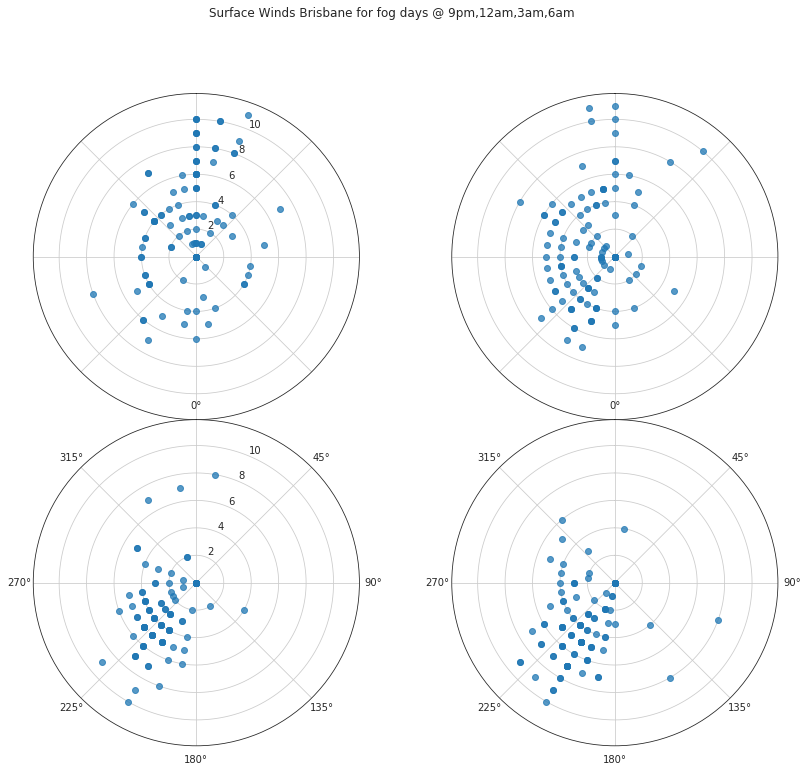

In [226]:
'''
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
11Z,14Z,17Z,20Z as 2by2 grid subplots 2 rows, 2 cols
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

fig, axs = plt.subplots(
    nrows=2,ncols=2,
    figsize=(15,12), 
    subplot_kw=dict(projection='polar'),
    sharex=True, sharey=True,
    gridspec_kw={'hspace': 0, 'wspace': 0})

(ax1, ax2), (ax3, ax4) = axs

fig.suptitle('Surface Winds Brisbane for fog days @ 9pm,12am,3am,6am')
ax1.scatter(x=np.deg2rad(bad_fg_days['wdir11'].values), 
            y=bad_fg_days['wspd11'].values, cmap='hsv', alpha=0.75)
ax2.scatter(x=np.deg2rad(bad_fg_days['wdir14'].values), 
            y=bad_fg_days['wspd14'].values, cmap='hsv', alpha=0.75)
ax3.scatter(x=np.deg2rad(bad_fg_days['wdir17'].values), 
            y=bad_fg_days['wspd17'].values, cmap='hsv', alpha=0.75)
ax4.scatter(x=np.deg2rad(bad_fg_days['wdir20'].values), 
            y=bad_fg_days['wspd20'].values, cmap='hsv', alpha=0.75)

for ax in axs.flat:
    ax.label_outer()
    #ax.set_title('11Z') #'Text' object is not callable
    ax.set_theta_zero_location('N', offset=0)
    ax.set_theta_direction('clockwise')
 
plt.savefig(f'./fg_plots/{sta}_sfc_WindScatter_fog_days', format='eps', dpi=1000)
plt.show();
    

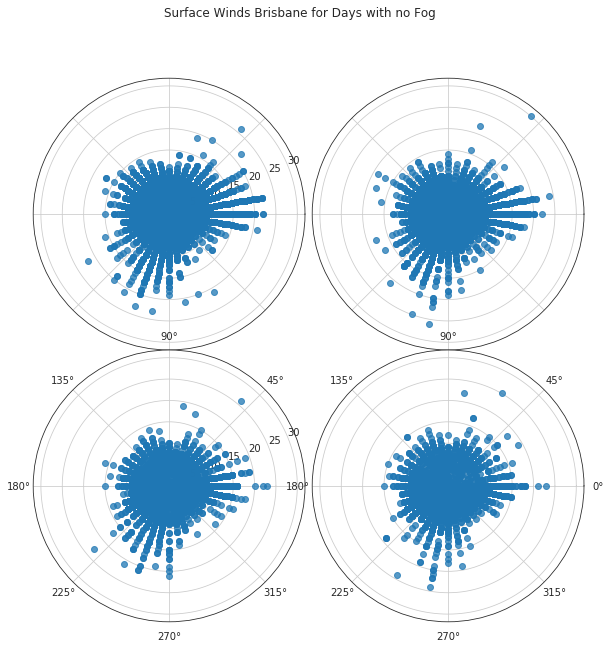

In [227]:
'''
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
11Z,14Z,17Z,20Z as 2by2 grid subplots 2 rows, 2 cols Fog Free days
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

fig, axs = plt.subplots(
    nrows=2,ncols=2,
    figsize=(10,10), 
    subplot_kw=dict(projection='polar'),
    sharex=True, sharey=True,
    gridspec_kw={'hspace': 0, 'wspace': 0})

(ax1, ax2), (ax3, ax4) = axs

fig.suptitle('Surface Winds Brisbane for Days with no Fog')
ax1.scatter(x=np.deg2rad(fg_free_days['wdir11'].values), 
            y=fg_free_days['wspd11'].values, cmap='hsv', alpha=0.75)
ax2.scatter(x=np.deg2rad(fg_free_days['wdir14'].values), 
            y=fg_free_days['wspd14'].values, cmap='hsv', alpha=0.75)
ax3.scatter(x=np.deg2rad(fg_free_days['wdir17'].values), 
            y=fg_free_days['wspd17'].values, cmap='hsv', alpha=0.75)
ax4.scatter(x=np.deg2rad(fg_free_days['wdir20'].values), 
            y=fg_free_days['wspd20'].values, cmap='hsv', alpha=0.75)

for ax in axs.flat:
    ax.label_outer()
    #ax.set_title('11Z') #'Text' object is not callable
    ax.set_theta_zero_location


In [228]:
'''
Make some rules around Td, Td trends, TmTd, gradient wind dir and predict for outcome
Done earlier
'''

'\nMake some rules around Td, Td trends, TmTd, gradient wind dir and predict for outcome\nDone earlier\n'

In [229]:
smry2=pd.DataFrame(smry1).set_index(0).iloc[:,:4]
smry2.columns=['TP','TN','FP','FN'] #,'POD','PREC','FAR','ACC','ERR']
smry2.index.name='predictor'

# What proportion of actual fog days (actual positives) was identified correctly?
# recall OR HIT RATE prob of detection 
# we want to maximise this
smry2['POD_TPR'] = round(smry2['TP']/ (smry2['TP'] + smry2['FN'] ),2)

# a false positive ratio (also known as fall-out or false alarm ratio)
# fraction of no fog days that we got wrong (we predicted fog but did not happen)
# we want to minimize this
smry2['FAR_FPR'] = round(smry2['FP']/(smry2['FP']+smry2['TN']),2)  
                               
# What proportion of +ve fog predictions (positive identifications) was actually correct?
# fog predictions that were verified true out of all fog predictions
# we want this to be high - at least 15 to 20% would be good
smry2['PREC'] = round(smry2['TP']/ (smry2['TP'] + smry2['FP'] ),2)  

# fraction of predictions that were correct (both for fog and non fog days)
# we want this to be high - at least 80% better if >90%
smry2['ACC'] = round((smry2['TP'] + smry2['TN'])/smry2.sum(axis=1),2)

# we want this to be low - below 20%, better if <10%
smry2['ERR'] = round((smry2['FP'] + smry2['FN'])/smry2.sum(axis=1),2)

#If we want to create a balanced classification model with the 
#optimal balance of recall and precision, then we try to maximize the F1 score.
# NB : We don't really want a balaced calssification - we want to maximise recall
smry2['F1'] = round( (smry2['PREC'] * smry2['POD_TPR']) / (smry2['PREC']+smry2['POD_TPR']),2)
smry2

TP    TN    FP  FN  POD_TPR  FAR_FPR  PREC   ACC   ERR  \
predictor                                                                       
TmTd_trend_5to8       125  5786  1348  48     0.72     0.19  0.08  0.81  0.19   
TmTd_trend_5to11      116  6340   794  57     0.67     0.11  0.13  0.88  0.12   
TmTd_trend_5to14       96  6744   390  77     0.55     0.05  0.20  0.94  0.06   
TmTd_trend_8to11      135  6136   998  38     0.78     0.14  0.12  0.86  0.14   
TmTd_trend_8to14      105  6639   495  68     0.61     0.07  0.18  0.92  0.08   
TmTd_trend_11to14     122  6177   957  51     0.71     0.13  0.11  0.86  0.14   
TmTdOnly_trend_5to14   77  6966   168  96     0.45     0.02  0.31  0.96  0.04   
Td_only_trend_5to14   145  2860  4274  28     0.84     0.60  0.03  0.41  0.59   
Td5_48hr               94  4908  2226  79     0.54     0.31  0.04  0.68  0.32   
TmTd5_lt7             116  5122  2012  57     0.67     0.28  0.05  0.72  0.28   
TmTd8_lt3             146  5835  1299  27     0.84     0.18  0.10  0.82  0.18   
RH5_gt65              112  5148  1986  61     0.65     0.28  0.05  0.72  0.28   
QNH5_48hr_ltm3         92  5296  1838  81     0.53     0.26  0.05  0.74  0.26   
wdir5_lt60_gt340      118  4531  2603  55     0.68     0.36  0.04  0.64  0.36   
wdir8_lt50_gt340      113  5057  2077  60     0.65     0.29  0.05  0.71  0.29   
wdir11_lt40_gt340      98  5396  1738  75     0.57     0.24  0.05  0.75  0.25   
wdir14_gt230_lt15     114  4649  2485  59     0.66     0.35  0.04  0.65  0.35   
wdir3000_gt240_lt50   133  4127  2340  83     0.62     0.36  0.05  0.64  0.36   
wdir5000_gt240_lt50   123  4109  2303  90     0.58     0.36  0.05  0.64  0.36   

                        F1  
predictor                   
TmTd_trend_5to8       0.07  
TmTd_trend_5to11      0.11  
TmTd_trend_5to14      0.15  
TmTd_trend_8to11      0.10  
TmTd_trend_8to14      0.14  
TmTd_trend_11to14     0.10  
TmTdOnly_trend_5to14  0.18  
Td_only_trend_5to14   0.03  
Td5_48hr              0.04  
TmTd5_lt7             0.05  
TmTd8_lt3             0.09  
RH5_gt65              0.05  
QNH5_48hr_ltm3        0.05  
wdir5_lt60_gt340      0.04  
wdir8_lt50_gt340      0.05  
wdir11_lt40_gt340     0.05  
wdir14_gt230_lt15     0.04  
wdir3000_gt240_lt50   0.05  
wdir5000_gt240_lt50   0.05

In [230]:
smry2.columns

Index(['TP', 'TN', 'FP', 'FN', 'POD_TPR', 'FAR_FPR', 'PREC', 'ACC', 'ERR',
       'F1'],
      dtype='object')

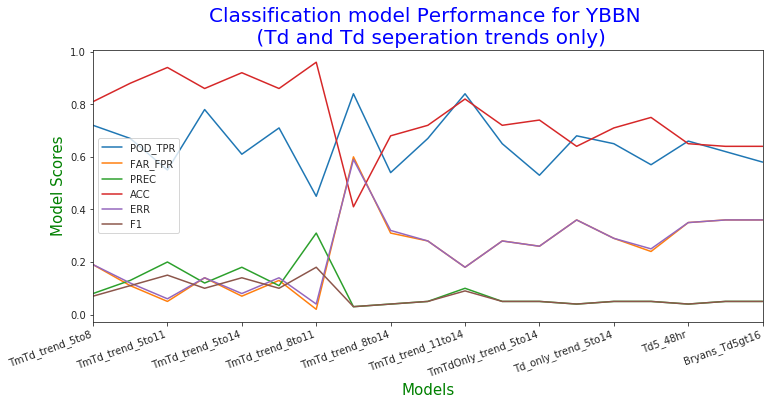

In [231]:
fig, ax = plt.subplots(figsize=(12,5), nrows=1, ncols=1 )

smry2[['POD_TPR', 'FAR_FPR', 'PREC', 'ACC', 'ERR','F1']].plot( kind='line', ax=ax)
title = f'Classification model Performance for {station} \n (Td and Td seperation trends only)'
ax.set_title(title, color='b',fontsize=20)
ax.set_ylabel('Model Scores', color='g', fontsize=15)
ax.set_xlabel('Models', color='g', fontsize=15)

xlabels = smry.index
plt.xticks(ax.get_xticks(), labels=xlabels)
ax.set_xticklabels(xlabels,rotation=20, horizontalalignment='right');


##### Dew Point Seperation trends (TmTd) better predictor for fog outcome than Td alone (Bryans 3pm Td>16) or Td trends (subdiurnal 3pm to 12am or daily - 3pmTd 4 day trend) 

TmTd_trend_5to8 and 8to11 best also 11to14 and TmTdOnly_trend_5to14

```
The Td thresholds used earlier were (mean - 1std)
as in this condition below
(fg_aut['Td5']>13)   & (fg_aut['Td8']>15)  & (fg_aut['Td11']>14) & (fg_aut['Td14']>13)

The tests for slightlymore restrictive conditions for each synop hour Td is given below

Td5  > 15 POD 65%, FAR 53! ACC 47%
Td8  > 16 POD 65%, FAR 49%, ACC 51%!
Td11 > 16 POD 62%, FAR 50%, ACC 50%!
Td14 > 15 POD 63%, FAR 54%, ACC 46%!
Td5_48hr trend > +1 , POD 66%, FAR 41%



We have also looked at sfc winds and 900/850 later in this notebook 
and the verification stats for those are summarised here as well

TPR/recall/POD in 50 to 60% range unacceptable, need >60% detection accuracy
FPR or FAR more than 40% also no acceptable, means >40% fog predictions are wrong

wdir5  < 70 deg and wdir5  > 340   POD (74%) / FAR (42%) 
wdir8  < 60 deg and wdir8  > 340   POD (71%) / FAR (34%) 
wdir11 < 40 deg and wdir11 > 290   POD (71%) / FAR (30%) 
wdir14 < 15 deg and wdir14 > 220   POD (71%) / FAR (38%) 

900wdir < 60 deg and 900wdir > 240 best POD (77%) / FAR (38%) balance 
850wdir < 40 deg and 850wdir > 240 best POD (68%) / FAR (35%) balance

```

In [232]:
#obs_4day=aws17_sonde23.loc[dat17.index[-1]]
obs_4day=aws05_sonde23_nextday.loc['2020-03-25']

print(obs_4day.isnull()['T'] or obs_4day.isnull()['Td'] or 
      obs_4day.isnull()['lr_sfc_850'] or obs_4day.isnull()['QNH'] or 
      obs_4day.isnull()['900_wdir'] or obs_4day.isnull()['900_WS'])

obs_4day

False


WDir               70
WS                  7
T                25.7
Td                 16
RH                 55
pptnSince9          0
vis                10
vis_aws            10
PW                NaN
QNH            1018.2
Ceil1_ht         4700
Ceil1_amnt        BKN
Ceil2_ht         5200
Ceil2_amnt        OVC
Ceil3_ht          NaN
Ceil3_amnt           
fogflag         False
900_wdir          115
900_WS            8.2
850_wdir           80
850_WS            9.2
season         autumn
lr_850_500       22.3
lr_sfc_850       13.6
mid_rh        20.6667
Name: 2020-03-25 00:00:00, dtype: object

In [233]:
# aws05_sonde23        aws and sonde data same utc data (3pm obs and 9am sonde next morning/day)
# aws05_sonde23_new    aws and sonde data same calender data ( so 9am sonde and 3pm obs)

print(aws05_sonde23_nextday.index[0],aws05_sonde23_nextday.index[-1])
print(aws05_sonde23_sameday.index[0],aws05_sonde23_sameday.index[-1])

dat14.index[0],dat14.index[-1]

2000-02-05 00:00:00 2020-03-28 00:00:00
2000-02-06 00:00:00 2020-03-29 00:00:00


(Timestamp('2000-01-01 00:00:00'), Timestamp('2020-09-20 00:00:00'))

In [234]:
print(aws05_sonde23_sameday['fogflag'].unique())
print("\n",aws05_sonde23_sameday['fogflag'].value_counts())


########################################################
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$

# change data used for fog pattern matching
aws_sonde_daily=aws05_sonde23_sameday.dropna(subset=['fogflag'])
#aws_sonde_daily['fogflag'].astype(bool,inplace=True)

#######################################################
print("\n",aws_sonde_daily['fogflag'].value_counts())

nan_value = float("NaN")

# Convert NaN values to empty string

aws_sonde_daily.replace("", nan_value, inplace=True)
aws_sonde_daily.dropna(subset=['fogflag'],inplace=True)

# why such big increase in number of fog days - maybe some NaNs got converted to fog days

[False  True]

 False    6659
True      236
Name: fogflag, dtype: int64

 False    6659
True      236
Name: fogflag, dtype: int64


In [235]:
aws_sonde_daily['fogflag'].astype(bool,inplace=True)
aws_sonde_daily['fogflag'].value_counts()

False    6659
True      236
Name: fogflag, dtype: int64

In [236]:
# REDO input data
sonde23_sameday = sonde23.set_index(sonde23.index + pd.Timedelta(str(1) + ' days'))
aws05_sonde23_sameday = pd.merge(
    left=dat05, 
    right=sonde23_sameday[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')

print(aws05_sonde23_sameday['fogflag'].unique()) # [False nan True]

print(aws05_sonde23_sameday['fogflag'].value_counts())
#False    6306
#True      151
# think the NaN don't get counted as no count for NaNs


print("\n\nNumber of NaNs in response variable fogflag =",aws05_sonde23_sameday.isna().sum()['fogflag'])

aws05_sonde23_sameday['fogflag']=aws05_sonde23_sameday['fogflag'].astype(bool)


print(aws05_sonde23_sameday['fogflag'].unique())  # [False True]  no Nans now!

print(aws05_sonde23_sameday['fogflag'].value_counts())

# I think the Nans converted to True when did astype(bool) !!!! 
# Positive class went from 151 to 151 + 434 = 585  !!!!!!!! wow!!
#False    6306
#True      585

[False nan True]
False    6659
True      161
Name: fogflag, dtype: int64


Number of NaNs in response variable fogflag = 75
[False  True]
False    6659
True      236
Name: fogflag, dtype: int64


In [237]:
# REDO input data  and delay astype(bool) conversion until after dropna()

sonde23_sameday = sonde23.set_index(sonde23.index + pd.Timedelta(str(1) + ' days'))
aws05_sonde23_sameday = pd.merge(
    left=dat05, 
    right=sonde23_sameday[['900_wdir', '900_WS','850_wdir', '850_WS',\
                 'season', 'lr_850_500','lr_sfc_850','mid_rh']],
    left_index=True, right_index=True, how='right')

print(aws05_sonde23_sameday['fogflag'].unique())  # [False True]  no Nans now!
print(aws05_sonde23_sameday['fogflag'].value_counts())


aws05_sonde23_sameday.dropna(subset=['fogflag'], inplace=True)
aws05_sonde23_sameday['fogflag']=aws05_sonde23_sameday['fogflag'].astype(bool)


print(aws05_sonde23_sameday['fogflag'].unique())  # [False True]  no Nans now!
print(aws05_sonde23_sameday['fogflag'].value_counts())

#False    6306
#True      151

[False nan True]
False    6659
True      161
Name: fogflag, dtype: int64
[False  True]
False    6659
True      161
Name: fogflag, dtype: int64


In [238]:
# about 151 fog days
aws_sonde_daily=aws05_sonde23_sameday
print(aws_sonde_daily.loc[
    aws_sonde_daily['fogflag']]['fogflag'].value_counts())
# about 6400 fog free days
print(aws_sonde_daily.loc[
    ~aws_sonde_daily['fogflag']]['fogflag'].value_counts())
aws_sonde_daily['fogflag'].value_counts()

True    161
Name: fogflag, dtype: int64
False    6659
Name: fogflag, dtype: int64


False    6659
True      161
Name: fogflag, dtype: int64

In [239]:
# we lost about 11 fog days during data cleaning stage
fg_aut['fogflag'].value_counts()

False    7134
True      173
Name: fogflag, dtype: int64

In [240]:
what

NameError: name 'what' is not defined

In [ ]:
# ### Resample only 50% of no fog days

# In[151]:


# grab all fog days
fg_days_sample = aws_sonde_daily.loc[aws_sonde_daily['fogflag']==True]

print("Fog_days_sample.shape=",fg_days_sample.shape)
# grab ONLY 1/2 or 50% of the no fog days
no_fog_days_sample = aws_sonde_daily.loc[aws_sonde_daily['fogflag']==False].sample(frac=0.5, replace=False,random_state=99,axis=0)

# we still have 20 times as many no fog days 
print("No_fog_days_sample.shape=",no_fog_days_sample.shape)
no_fog_days_sample['fogflag'].value_counts()  # none true so great

# MERGE / join with fg days
sample = pd.concat([fg_days_sample,no_fog_days_sample],axis=0)
print("Sample shape=",sample.shape)
sample['fogflag'].value_counts()

In [ ]:
imp.reload(bous)

In [ ]:
# search window 5 weeks/35 days wide either side of day
# generate dates for which forecast sought
# dates = pd.date_range(start='2000-01-01' , end='2020-03-08', freq='D')


#dates = pd.date_range(
#    start=aws_sonde_daily.index[0],
#    end=aws_sonde_daily.index[-1],freq='D')


# generate climatological fog probs

fogger_aws05_sonde23_sameday=\
    bous.get_climatological_fog_probability(
    station='YBBN',
    dates=aws_sonde_daily.index.sort_values(),
    aws_sonde_daily=aws_sonde_daily)


In [ ]:
dah = pd.DataFrame(fogger_aws05_sonde23_sameday).set_index('date', drop=True)
#dah.dropna(subset=['num_of_fog_days'],how='any',inplace=True)
dah['num_of_fog_days']= dah['num_of_fog_days'].astype("Int32")
#dah = dah.loc[(dah['num_of_days_match_synop_pattern']>0) & 
#           (dah['num_of_fog_days']>=0)]
dah[dah['num_of_fog_days']>1]
dah.info()
dah.tail()

In [ ]:
dah['chance']=dah['num_of_fog_days']/dah['num_of_days_match_synop_pattern']
d=dah.merge(fg_aut[['rain24hr','fogflag']], how='left', left_index=True,right_index=True)
d.dropna(subset=['chance','fogflag'],how='any',inplace=True )
d.info()
d.tail()
#d.to_csv("/home/accounts/vinorda/Downloads/fogger_aws17_sonde9am_next_day_35days_Wnd10_QNH4_noT_Td3_TmTd3.csv", sep=',', header=True, index=True)
d.to_csv("/home/bou/shared/stats-R/flask_projects/avguide/fogger_aws5_sonde9am_same_day_56days_Wnd10_QNH4_noT_Td3_TmTd3.csv", sep=',', header=True, index=True)
# set threshold sample size for matches >= 20
d.loc[d['num_of_fog_days']>=5].nlargest(n=100,columns='chance')
#d.sort_index(axis=0)

In [ ]:
d.loc['2015-05-19']

In [ ]:
'''When fogflag in object/text data type
of 6617 rows, 6496 values are either T/F - 6353 are "False", 143 "True"
121 fogflags must be NaNs then

d.shape
d['fogflag'].value_counts()
d[['fogflag','chance']].isnull().sum()

When convert fogflag from obejct to bool The NaNs get converted to True !!!!!
see value count True from 143 to 264 - inc by 121
Best to drop these NaNs before doing convert to bool
and defintely before plotting or stats

d['fogflag']=d['fogflag'].astype(bool)
d['fogflag'].value_counts()
 False 6353
 True   264 '''

#https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/
# https://pandas.pydata.org/pandas-docs/version/0.20.1/visualization.html
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
d['fogflag']=d['fogflag'].astype(bool)
sns.boxplot(x="fogflag", y="chance", data=d, ax=ax)\
.set(
    title='3pm/05Z Obs and 23Z/9am sonde data from next morning',
    xlabel='Observed/True class',
    ylabel='Proportion FG days/matching days'
)
plt.ylim(-0.01,1.)
plt.savefig(f'./fg_plots/YBBN_Proportion_FG_days_BOXPLOT_3pm_obs_sameday_56days_9amSonde.eps', format='eps', dpi=1000)

In [ ]:
print(d.loc[~d['fogflag'],'chance'].describe())
d.loc[d['fogflag'],'chance'].describe()

In [ ]:
pos_cases = d.loc[d['fogflag'],'chance']
neg_cases = d.loc[~d['fogflag'],'chance']

from scipy import stats
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8), sharex=True)   #2 rows 1 col
# Plot the PDF
pos_cases.plot(ax=axes[0], y=pos_cases, kind='hist',
        bins=50, edgecolor='k',
        #range=(0.00005,pos_cases.max()),
        density=False)\
    .set(title='PDF of fog probabilities - 3pm/05Z Obs and 23Z/9am sonde data from next morning',
        ylabel='Frequency/Counts')
#pos_cases.ylabel='Normalised Frequency'
# used min as 0.00005 0.005% to eliminate high counts for prob=0.0
# for both +ve and _ve cases
neg_cases.plot(ax=axes[1], y=neg_cases, kind='hist',
        bins=50, edgecolor='k',
        #range=(0.00005,neg_cases.max()),
        density=False)\
    .set(
    xlabel='Fraction: no.FG days/no. matching synop days',
    ylabel='Frequency/Counts')


plt.savefig(f'./fg_plots/YBBN_Frequency_Fog_Proportion_3pm_obs_sameday_56days_9amSonde.eps', format='eps', dpi=1000)

In [ ]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from scipy.stats import norm
from matplotlib import pyplot as plt


# since unbalanced case apply scaling factor to histo bin counts
fig, ax = plt.subplots(1, 1, figsize=(10,6))

N=d.shape[0]
n = N//100  # num of bins

pos_cases.plot(ax=ax,y=pos_cases, kind='hist',
        bins=n, edgecolor='k', color='b',
        range=(0.00005,pos_cases.max()),
        density=True)
neg_cases.plot(ax=ax,y=neg_cases, kind='hist',
        bins=n, edgecolor='k', color='r',alpha=0.5,
        range=(0.00005,pos_cases.max()),
        density=True)


# used min as 0.005 0.5% to eliminate high counts for prob=0.0
# for both +ve and _ve cases
p, x = np.histogram(
    pos_cases,
    bins=n,range=(0.00005,pos_cases.max()),
    density=True)

x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x=x,y=p, s=n)
ax.plot(x, f(x), c='b')

''''
You can increase or decrease s (smoothing factor)
within the UnivariateSpline function call to increase or
decrease smoothing.

Now plot PDF of probability values for non-TS days
given unbalanced we cud divide the histogram bin counts by factor u
this may look good but may lead to dodgy interpretation!!!
'''

s = neg_cases
p, x = np.histogram(
    neg_cases,
    bins=n,range=(0.005,pos_cases.max()),
    density=True) # bin it into n = N//10 bins

x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers

f = UnivariateSpline(x=x, y=p, s=n)
ax.plot(x, f(x), c='r')

ax.set_title("Predicted Probability Histograms with Spline fit")
ax.set_xlabel("FG Predictions")
ax.set_ylabel("Normalised Frequency")
ax.legend(('Fog days','No Fog days'))
ax.set_xlim(0,0.5)
#plt.savefig(f'./fg_plots/YBBN_Frequency_Fog_Proportion_3pm_obs_nxtday_9amSonde.eps', format='eps', dpi=1000)

In [ ]:
# We must first create a density estimate from our data

from scipy.stats import gaussian_kde
fig, ax = plt.subplots(1, 1, figsize=(10,6))

# Define a function for a density plot
def densityplot(x_data, density_est, x_label, y_label, title,kolor):
    ax.plot(x_data, density_est(x_data), color = kolor, lw = 4)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    #ax.set_label(leg)
    #ax.legend()

data = pos_cases
density_est = gaussian_kde(data)

# Control the 'smoothness'of the estimate. Higher values give
# smoother estimates.
density_est.covariance_factor = lambda : .25
density_est._compute_covariance()
x_data = np.arange(min(data), max(data), 0.001)

# Call the function to create plot
densityplot(x_data = x_data
            , density_est = density_est
            , x_label = 'num days FG/num days Match Pattern'
            , y_label = 'Frequency'
            , title = 'Distribution of Proportions num FG day /num days Match Synop Pattern'
            , kolor = '#539caf')

data = neg_cases
density_est = gaussian_kde(data)

density_est.covariance_factor = lambda : .25
density_est._compute_covariance()
x_data = np.arange(min(data), max(data), 0.001)

# Call the function to create plot
densityplot(x_data = x_data
            , density_est = density_est
            , x_label = 'FG Predictions (fraction FG days in matched synop days)'
            , y_label = 'Frequency'
            , title = 'Gaussian Density Plot (PDF) of FG Predictions \n3pm/05Z Obs and 23Z/9am sonde data from next morning.'
            , kolor = 'red')

ax.legend(('Fog days', 'non-Fog days'))
ax.set_xlim(0,1.0)
plt.savefig(f'./fg_plots/YBBN_GaussianDensityProportion_3pm_obs_sameday_56days_9amSonde.eps', format='eps', dpi=1000)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
for thres in [0.1,0.11,0.12,0.13,0.14,0.15]:
    fcst = d[['chance','fogflag']].copy()
    fcst['fcst'] = fcst['chance'].apply(
        lambda chance : True if chance >= thres else False)

    accuracy = accuracy_score(y_true=fcst['fogflag'].values,
                          y_pred=fcst['fcst'].values)
    print (f'\nProbability Threshold:{thres}. Accuracy:{round(accuracy, 3)}')


    cmat = confusion_matrix(y_true=fcst['fogflag'].values,
                        y_pred=fcst['fcst'].values)
    #print (cmat)
    #print ("\n", cmat.dtype)
    #print (cmat.shape)

    tn =  cmat[0,0] # +ve/True TS fcst and it happens
    tp =  cmat[1,1] #-ve/no TS fcst, and does not occur
    fp =  cmat[0,1] # +ve/True fcst, does not happen - false alarm
    fn =  cmat[1,0] # -ve/no TS fcst and it happens - missed event
    #tn, fp, fn, tp

    #print('true_negatives={}\nfalse_negatives={}\nfalse_positives={}\ntrue_positives={}'\
    #  .format(tn,fn,fp,tp))

    # so cmat is just a 2 X 2matrix
    print (' target_label | predicted_label | count ')
    print ('--------------+-----------------+-------')
    # Print out the confusion matrix.
    # NOTE: Some tools may arrange entries in a different order.
    # In our case appears to do the right thing

    for i, target_label in enumerate([False,True]):
        for j, predicted_label in enumerate([False,True]):
            print ('{0:^13} | {1:^15} | {2:5d}'.format(target_label, predicted_label, cmat[i,j]))


```

New variable introduce Td Seperation TmTd
above with TmTd  hits 80 , misses 52 , false alarms 293 < miss down 10, FAR similar

+/-5QNH/T +/-4Td +/-2TmTd +/- 10 wspd and 35 days  Fog days PDF max FRQ 5 near 0.08 to 0.15

@ P>0.10 hits 86  , misses 46 , false alarms 300 
@ P>0.11 hits 81  , misses 51 , false alarms 256 
@ P>0.12 hits 76  , misses 56 , false alarms 217 
@ P>0.13 hits 69  , misses 63 , false alarms 185 
@ P>0.14 hits 63  , misses 69 , false alarms 155 
@ P>0.15 hits 58  , misses 74 , false alarms 127 

+/-4QNH/T +/-3Td +/-2TmTd +/- 8 wspd and 35 days  Much better hits and lower misses

@ P>0.10 hits 101 , misses 31 , false alarms 307 
@ P>0.11 hits 101 , misses 31 , false alarms 269 
@ P>0.12 hits  93 , misses 39 , false alarms 224 
@ P>0.13 hits  89 , misses 43 , false alarms 191 
@ P>0.14 hits  81 , misses 51 , false alarms 168 
@ P>0.15 hits  78 , misses 54 , false alarms 142 

Lower Td seperation to 1 deg - keep everything else same
-------------------------------------------------------------
THIS IS OUR STAR!!

+/-4QNH/T +/-3Td +/-1TmTd +/- 8 wspd and 35 days  

@ P>0.10 hits 119 , misses 18 , false alarms 331 <-- highest hits,lowes miss - FAR about 15 per year not bad
@ P>0.11 hits 111 , misses 21 , false alarms 256 <-- highest hits,lowes miss
@ P>0.12 hits 109 , misses 23 , false alarms 226 <-- highest hits,lowes miss
@ P>0.13 hits 106 , misses 26 , false alarms 202 <-- highest hits,lowes miss
@ P>0.14 hits 105 , misses 27 , false alarms 192 <-- highest hits,lowes miss
@ P>0.15 hits  99 ,misses  33 ,false alarms  160 <actually quite good - low FAR about 8 per year!! peanuts 
-------------------------------------------------------------

Note that when we remove check for temperature we get exact same results as above
So including T does not explain any more variance in data 
+/-4QNH (noT) +/-3Td +/- 1TmTd +/- 8 wspd and 35 days 


Note that widening window for QNH and Td and wind speed 
So +/-5QNH/Td  +/- 2TmTd  +/- 10 wspd and 35 days  AND no Temp check!
Give results which are quite similar to what we get with these thresholds 
+/-5QNH/T +/-4Td +/-2TmTd +/- 10 wspd and 35 days 

So it increases misses AND False alarms at the same time!!! even when we drop Temp matching 
So essentially widening the match window has more matching dates which reduces fog probability -  makes sense

Shrinking TmTd to 1 from 2 does produce better results though
@ P>0.10 hits 100 , misses 32 , false alarms 296 <-- highest hits,lowes miss
@ P>0.11 hits  95 , misses 37 , false alarms 265 <-- highest hits,lowes miss
@ P>0.12 hits  91 , misses 41 , false alarms 234 <-- highest hits,lowes miss
@ P>0.13 hits  86 , misses 46 , false alarms 211 <-- highest hits,lowes miss
@ P>0.14 hits  85 , misses 47 , false alarms 187 <-- highest hits,lowes miss
@ P>0.15 hits  84(-15),misses 48(+15),false alarms 158 <actually quite good -low FAR!!

Expanding TmTd to 5 from 2 produce worse results
@ P>0.10 hits  79 , misses 58 , false alarms 352 
@ P>0.11 hits  70 , misses 67 , false alarms 294 

No luck with increasing window to 6 weeks - 42 days as well..

and +/-3 for all , +/- 5 for winds and 42 days !!
above with TmTd  hits 108 , misses 24 , false alarms 297

+/- 5 QNH, T +/- 2 Td and TmTd, +/-8 wind 35 days
above with TmTd  hits 105 , misses 27 , false alarms 302


        
3pm/5Z Observations parameters and 23Z sonde for predictions
+/-4QNH +/-3Td +/-3TmTd +/- 10 wspd and 35 days

Probability Threshold:0.1. Accuracy:0.652
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |   726
      0       |        1        |   405
      1       |        0        |    36
      1       |        1        |   102

Probability Threshold:0.11. Accuracy:0.701
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |   790
      0       |        1        |   341
      1       |        0        |    38
      1       |        1        |   100

Probability Threshold:0.12. Accuracy:0.729   <<<----Nice sweet spot
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |   832
      0       |        1        |   299
      1       |        0        |    45
      1       |        1        |    93

Probability Threshold:0.13. Accuracy:0.759
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |   876
      0       |        1        |   255
      1       |        0        |    51
      1       |        1        |    87

Probability Threshold:0.14. Accuracy:0.773
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |   896
      0       |        1        |   235
      1       |        0        |    53
      1       |        1        |    85

Probability Threshold:0.15. Accuracy:0.784
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |   920
      0       |        1        |   211
      1       |        0        |    63
      1       |        1        |    75
      
        
6pm/8Z observations parameters and 23Z sonde for predictions
+/-4QNH +/-3Td +/-3TmTd +/- 10 wspd and 35 days

Probability Threshold:0.1. Accuracy:0.735
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1023
      0       |        1        |   363
      1       |        0        |    41
      1       |        1        |    97

Probability Threshold:0.11. Accuracy:0.764
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1072
      0       |        1        |   314
      1       |        0        |    46
      1       |        1        |    92

Probability Threshold:0.12. Accuracy:0.786
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1113
      0       |        1        |   273
      1       |        0        |    53
      1       |        1        |    85

Probability Threshold:0.13. Accuracy:0.804
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1145
      0       |        1        |   241
      1       |        0        |    57
      1       |        1        |    81

Probability Threshold:0.14. Accuracy:0.821
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1175
      0       |        1        |   211
      1       |        0        |    62
      1       |        1        |    76

Probability Threshold:0.15. Accuracy:0.833
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1202
      0       |        1        |   184
      1       |        0        |    70
      1       |        1        |    68




9pm/11Z observations parameters and 23Z sonde for predictions
+/-4QNH +/-3Td +/-3TmTd +/- 10 wspd and 35 days

Probability Threshold:0.1. Accuracy:0.73
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1046
      0       |        1        |   378
      1       |        0        |    44
      1       |        1        |    93

Probability Threshold:0.11. Accuracy:0.756
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1095
      0       |        1        |   329
      1       |        0        |    52
      1       |        1        |    85

Probability Threshold:0.12. Accuracy:0.783
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1141
      0       |        1        |   283
      1       |        0        |    56
      1       |        1        |    81

Probability Threshold:0.13. Accuracy:0.811
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1189
      0       |        1        |   235
      1       |        0        |    60
      1       |        1        |    77

Probability Threshold:0.14. Accuracy:0.828
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1217
      0       |        1        |   207
      1       |        0        |    61
      1       |        1        |    76

Probability Threshold:0.15. Accuracy:0.843
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1253
      0       |        1        |   171
      1       |        0        |    74
      1       |        1        |    63


        
        
        
       
        
12am observations parameters and 23Z sonde for predictions
+/-4QNH +/-3Td +/-3TmTd +/- 10 wspd and 35 days

Test Accuracy: 0.745773
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1094
      0       |        1        |   365
      1       |        0        |    41
      1       |        1        |    97

Test Accuracy: 0.777708
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1151
      0       |        1        |   308
      1       |        0        |    47
      1       |        1        |    91

Test Accuracy: 0.793989
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1185
      0       |        1        |   274
      1       |        0        |    55
      1       |        1        |    83

Test Accuracy: 0.8134
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1220
      0       |        1        |   239
      1       |        0        |    59
      1       |        1        |    79

Test Accuracy: 0.822167
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1237
      0       |        1        |   222
      1       |        0        |    62
      1       |        1        |    76

Test Accuracy: 0.846587
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1280
      0       |        1        |   179
      1       |        0        |    66
      1       |        1        |    72

 
3am/17z parameters

Test Accuracy: 0.764877
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1218
      0       |        1        |   359
      1       |        0        |    44
      1       |        1        |    93

Test Accuracy: 0.795216
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1273
      0       |        1        |   304
      1       |        0        |    47
      1       |        1        |    90

Test Accuracy: 0.81797
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1321
      0       |        1        |   256
      1       |        0        |    56
      1       |        1        |    81

Test Accuracy: 0.833139
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1353
      0       |        1        |   224
      1       |        0        |    62
      1       |        1        |    75

Test Accuracy: 0.844224
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1377
      0       |        1        |   200
      1       |        0        |    67
      1       |        1        |    70

Test Accuracy: 0.858226
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  1406
      0       |        1        |   171
      1       |        0        |    72
      1       |        1        |    65


```


``` 
Best with +/-4QNH (noT) +/-3Td +/- 1TmTd +/- 8 wspd Lapse rate 3C and 35 days 
Test Accuracy: 0.952711
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  5520
      0       |        1        |   269
      1       |        0        |    11
      1       |        1        |   121

Test Accuracy: 0.957609
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  5553
      0       |        1        |   236
      1       |        0        |    15
      1       |        1        |   117

Test Accuracy: 0.963689
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  5589
      0       |        1        |   200
      1       |        0        |    15
      1       |        1        |   117

Test Accuracy: 0.967742
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  5617
      0       |        1        |   172
      1       |        0        |    19
      1       |        1        |   113

Test Accuracy: 0.968249
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  5621
      0       |        1        |   168
      1       |        0        |    20
      1       |        1        |   112

Test Accuracy: 0.972978
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  5652
      0       |        1        |   137
      1       |        0        |    23
      1       |        1        |   109
      
      
      
      
Ran different time - with same threholds -  got this - even better!!
Test Accuracy: 0.950911
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  5880
      0       |        1        |   298
      1       |        0        |    12
      1       |        1        |   125

Test Accuracy: 0.955661
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  5914
      0       |        1        |   264
      1       |        0        |    16
      1       |        1        |   121

Test Accuracy: 0.961837
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  5953
      0       |        1        |   225
      1       |        0        |    16
      1       |        1        |   121

Test Accuracy: 0.965796
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  5981
      0       |        1        |   197
      1       |        0        |    19
      1       |        1        |   118

Test Accuracy: 0.967063
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  5989
      0       |        1        |   189
      1       |        0        |    19
      1       |        1        |   118

Test Accuracy: 0.971496
 target_label | predicted_label | count 
--------------+-----------------+-------
      0       |        0        |  6020
      0       |        1        |   158
      1       |        0        |    22
      1       |        1        |   115

```

In [ ]:
'''Function apply_threshold() that accepts
* `probabilities` (an array of probability values)
* `threshold` (a float between 0 and 0.5)
The function returns an array,
where each element is set to +1 or -1 depending on
whether the corresponding probability exceeds `threshold`.'''
def apply_threshold(probabilities, threshold):
    predictions = np.array([ True if x > threshold else False for x in probabilities])
    return predictions

fcst.tail()
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


def apply_threshold(probabilities, threshold):
    predictions = np.array(
        [ True if x > threshold else False for x in probabilities])
    return predictions

accuracy_all =[]
precision_all = []
recall_all = []
# probabilities = model.predict_proba(test_matrix)[:,1]
# don't have an actual model yet, though analogue selection is kind of
# nearest neighbour model
threshold_values = np.linspace(0.0, 0.5, num=100)

for threshold in threshold_values:
    predictions = apply_threshold(fcst['chance'], threshold)

    accuracy = accuracy_score(
        y_true=fcst['fogflag'].values, y_pred=predictions)
    precision = precision_score(
        y_true=fcst['fogflag'].values,y_pred=predictions)
    recall =    recall_score(
        y_true=fcst['fogflag'].values,  y_pred=predictions)

    accuracy_all.append(accuracy)
    precision_all.append(precision)
    recall_all.append(recall)

# determining optimal Decision Boundary based on accuracy
index_acc =  np.argmax(accuracy_all)
index_pre =  np.argmax(precision_all)
index_rec =  np.argmax(recall_all)

opt_DB1= threshold_values[np.argmax(accuracy_all)]
opt_DB2= threshold_values[np.argmax(precision_all)]
opt_DB3= threshold_values[np.argmax(recall_all)]

print ("The optimal Decision Boundary to maximise accuracy is",opt_DB1)
print ("With Accuracy={}, Precision={}, Recall={}"
       .format(accuracy_all[index_acc],precision_all[index_acc],recall_all[index_acc]))
print ("The optimal Decision Boundary to maximise precision is",opt_DB2)
print ("With Accuracy={}, Precision={}, Recall={}"
       .format(accuracy_all[index_pre],precision_all[index_pre],recall_all[index_pre]))
print ("The optimal Decision Boundary to maximise recall is",opt_DB3)
print ("With Accuracy={}, Precision={}, Recall={}"
       .format(accuracy_all[index_rec],precision_all[index_rec],recall_all[index_rec]))

In [ ]:
def plot_pr_curve(precision, recall, title):
    plt.rcParams['figure.figsize'] = 10, 5
    plt.locator_params(axis = 'x', nbins = 5)
    plt.plot(recall, precision, 'b-', linewidth=4.0, color = '#B0017F')
    plt.title(title)
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.rcParams.update({'font.size': 16})
    plt.savefig(f'./fg_plots/YBBN_PrecissionRecallCurve_3pm_obs_sameday_56days_9amSonde.eps', format='eps', dpi=1000)

plot_pr_curve(precision_all, recall_all,
              'Precision-Recall Curve\nFor Probability thresholds 0.0 to 0.3')
''' VERY BAD - Should be hugging the top right '''

In [ ]:
from sklearn.preprocessing import binarize
'''
sklearn.preprocessing.binarize(X, threshold=0.0, copy=True)
does exactly what apply_threshold() function defined earlier'''

label=['Accuracy','Precision','Recall','MSE']
metrics = {}

# get validation metrics for all threshold values
new_threshold_values = np.linspace(0.0, 1.0, num=100)
for thres in new_threshold_values:

    pred = binarize(fcst['chance'].values.reshape(-1, 1), thres)
    acc = accuracy_score(fcst['fogflag'], pred)
    pre = precision_score(fcst['fogflag'], pred)
    rec = recall_score(fcst['fogflag'], pred)
    mse = 1-acc
    metrics[thres]=[acc,pre,rec,mse]

# changing to misclassification error
#MSE = [1 - x for x in accuracy_all]

#MSE[:5]
metrics = pd.DataFrame(metrics).T
metrics.columns = ['acc','pre','rec','mse']
metrics.index.name = "threhold"
metrics.iloc[:5,:]

In [ ]:
#plt.plot(metss,label=['Accuracy','Precision','Recall'])
# this shows that where prec/recall intersect prob value about 0.25
# good decision boundary wud be between 0.3 and point of inflection
# in accuracy and MSE curves i.e about 0.14
# also region where acuracy and recall intersect
# 0.17 is also the mean of two class probs

fig, ax = plt.subplots(1, 1, figsize=(10,5))

label=['Accuracy','Precision','Recall','MSE']
m = np.arange(4)
for m in m:
    plt.plot(metrics.iloc[:,m],label=label[m])
    #plt.rcParams['figure.figsize'] = 6, 6
#plt.xlim([0.0,0.5])
plt.ylim([0.0,1.2])
# plt.rcParams['figure.figsize'] = 6, 6
plt.axvline(x=0.06, color='k', alpha=0.3, linestyle='--')
plt.axvline(x=0.22, color='k', alpha=0.3, linestyle='--')
plt.title('Model Evaluation Metrics for FG Classsification\nDecision Boundary/Probability Thresholds 0.0 to 0.6')
plt.xlabel('Probability Thresholds for FG Classification')
plt.ylabel('Metric Values')
plt.legend(loc=4,)
plt.savefig(f'./fg_plots/YBBN_ModelEveluationMetrics_3pm_obs_sameday_56days_9amSonde.eps', format='eps', dpi=1000)

In [ ]:
from sklearn import metrics
# https://www.medcalc.org/manual/roc-curves.php

fig, ax = plt.subplots(1, 1, figsize=(10,5))

for thres in np.linspace(0.05, 0.2, num=10):
    pred = binarize(fcst['chance'].values.reshape(-1, 1), thres)
    fpr, tpr, thresholds = metrics.roc_curve(fcst['fogflag'], pred)
    plt.plot(fpr, tpr, label = str(thres))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curves for FG Classification\nDecision Boundary/Thresholds 10% to 30%')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc=4,)
plt.grid(True)

plt.savefig(f'./fg_plots/YBBN_ROCC_Curves_3pm_obs_sameday_56days_9amSonde.eps', format='eps', dpi=1000)

# green or red roc curcve fo prob 0.04 and 0.06 is good tradeoff
# Not this will produce quite high FAR - overforecasting fog!!

# Fog modelling - move to new notebook

In [ ]:
df =pd.merge(left=sonde23,right=dat17,how='left',left_index=True,right_index=True)
print(dat17.shape,sonde23.shape)
print("\n",dat17.isnull().sum(axis=0),sonde23.isnull().sum(axis=0))
df=df[['900_wdir', '900_WS', 'T850', 'Td850', '850_wdir',
       '850_WS', 'T700', 'Td700', '700_wdir', '700_WS', 'T500',
       'Td500', '500_wdir', '500_WS', 'season', 'lr_sfc_850', 'lr_850_500',
       'mid_rh', 'fogflag_x', 'WDir', 'WS', 'T', 'Td', 'RH', 'pptnSince9',
       'QNH']].dropna()
df = df.rename({'fogflag_x':'fogflag'},axis=1)  # rename fogflag
print(df.isnull().sum(axis=0))
df.shape

In [ ]:
df_test=df
print(df_test.shape)
df_test['fogflag'].value_counts()  
# only 44 fog cases with dat14/dat17 and sonde 17 - so many missing sondes 17z - no good
# Vs 132  fog cases with dat14/dat17 and sonde 23
#df_test.tail()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# testing for relationships.
# for numeric targets.
'''reg = GradientBoostingRegressor(n_estimators=100, max_depth=5,
                                learning_rate=0.1, loss='ls',
                                random_state=1)
'''
# for categorical targets.
clf = GradientBoostingClassifier(n_estimators=100, max_depth=5,
                                learning_rate=0.1, loss='deviance',
                                random_state=1)
       
# try to predict one feature using the rest of others to test collinearity, so it's easier to interpret the results
'''
for c in cols:
    # c is the thing to predict.
    
    if c not in ['rand0', 'rand1', 'rand2']: 

        X = df_test.drop([c], axis=1) # drop the thing to predict.
        X = pd.get_dummies(X)
        y = df_test[c]

        print(c)

        if c in non_numeric_columns:
            scoring = 'accuracy'
            model = clf
            scores = cross_val_score(clf, X, y, cv=5, scoring=scoring)
            print(scoring + ": %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        elif c in numeric_columns:
            scoring = 'neg_root_mean_squared_error'
            model = reg
            scores = cross_val_score(reg, X, y, cv=5, scoring=scoring)
            print(scoring.replace('neg_', '') + ": %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))
        else:
            print('what is this?')

        model.fit(X, y)
        df_importances = pd.DataFrame(data={'feature_name': X.columns, 'importance': model.feature_importances_}).sort_values(by='importance', ascending=False)
        top5_features = df_importances.iloc[:5]
        print('top 5 features:')
        print(top5_features)
'''

X = df_test.drop(['fogflag'], axis=1) # drop the thing to predict.
X = pd.get_dummies(X)
y = df_test['fogflag'].astype('int') 
print(df_test['fogflag'].astype('int').value_counts() )
scoring = 'accuracy'
model = clf
scores = cross_val_score(clf, X, y, cv=5, scoring=scoring)
print(scoring + ": %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

model.fit(X, y)
df_importances = pd.DataFrame(
    data={'feature_name': X.columns,
          'importance': model.feature_importances_}).\
sort_values(by='importance', ascending=False)

top10_features = df_importances.iloc[:10]
print('top 10 features:')
print(top10_features)

In [ ]:
top20_features = df_importances.iloc[:20]
print('top 20 features:')
print(top20_features)

In [ ]:
fg_aut.columns

In [ ]:
fg_aut.loc[:,(fg_aut.columns.str.contains(pat = '20', regex = True))].columns

In [ ]:
fg_aut.loc[:,(fg_aut.columns.str.contains(pat = '11', regex = True))].tail(1)

In [ ]:
# drop RH obs at all synop times - bext to use regex fotr this
X=fg_aut.loc[:,~(fg_aut.columns.str.contains(pat = 'RH', regex = True))]
# drop other cols
X=X.drop(labels=['avID', 'man', 'aut', 'min_vis', 'fg_onset',
       'fg_finish', 'fg_duration'],axis=1)
# grab only 14Z - 12am obs
# Choose which synop hour to match - this one matchs 14Z 
X=X.loc[:,(X.columns.str.contains(pat = '17|fogflag', regex = True))]
# fg_aut.loc[:,~(fg_aut.columns.str.contains(pat = '(5|8|11|17|20)', regex = True))]

X=pd.merge(left=X, right=sonde23[['lr_sfc_850','900_wdir']],
           how='left',left_index=True,right_index=True)
print(X.columns,X.shape)
'''
'fogflag','rain24hr','avg_wk_rain','QNH14_48hr','avg_wk_rain'
'TmTd8','TmTd11','TmTd14','TmTd17','TmTd20',
'Td8to14','Td11to17','TmTd14_24hr','TmTd17_24hr','TmTd14_48hr' '''
X=X.dropna()
X.shape

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, max_depth=5,
                                learning_rate=0.1, loss='deviance',
                                random_state=1)


y = X['fogflag'].astype('int') 
X = X.drop(['fogflag'],axis=1) # drop the thing to predict.
X = pd.get_dummies(X)

print(fg_aut['fogflag'].astype('int').value_counts() )
scoring = 'accuracy'
model = clf
scores = cross_val_score(clf, X, y, cv=5, scoring=scoring)
print(scoring + ": %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

model.fit(X, y)
df_importances = pd.DataFrame(
    data={'feature_name': X.columns, 'importance': model.feature_importances_}).\
sort_values(by='importance', ascending=False)
top10_features = df_importances.iloc[:10]
print('top 10 features:')
print(top10_features)

```
Using 14Z obs for prediction
============================
accuracy: 0.97 (+/- 0.00)
top 10 features:
   feature_name  importance
4        TmTd14    0.219200
12     900_wdir    0.068704
11   lr_sfc_850    0.059463
1          Td14    0.053134
6   TmTd14_24hr    0.052305
8    QNH14_48hr    0.050761
2         QNH14    0.050335
5       Td8to14    0.049441
3        pptn14    0.049285
10       wspd14    0.047592

Using 17Z obs for prediction
============================
accuracy: 0.98 (+/- 0.00)
top 10 features:
  feature_name  importance
4       TmTd17    0.278584
5     Td11to17    0.098352
8   lr_sfc_850    0.096142
2        QNH17    0.070426
9     900_wdir    0.053699
0          T17    0.053433
3       pptn17    0.048248
6       wdir17    0.041805
1         Td17    0.041384
7       wspd17    0.027057
9        wspd17    0.034356
```

## Handle class imbalance

```Now do the same adjusting for class imbalance 
Guess the large class imbalance is influencing feature importance
```

In [ ]:
print("Shape of data",fg_aut.shape)
print("How many fog/no fog days\n",fg_aut['fogflag'].value_counts())
print("Need only twice as many non fog days: ",fg_aut['fogflag'].value_counts()[1]*2)
no_fog_days = fg_aut.loc[~fg_aut['fogflag']]
print("Current size of no fog days: ",no_fog_days.shape[0])
'''Now to grab 320 non fog days - just get fraction of non-fog days
'''
print(f'So we need to grab just {318/no_fog_days.shape[0]}% of the non fog days')


```pandas.DataFrame.sample
DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)
Return a random sample of items from an axis of object.
```

In [ ]:
fg_days_sample = fg_aut.loc[fg_aut['fogflag']]
no_fog_days_sample = fg_aut.loc[~fg_aut['fogflag']]\
    .sample(frac=0.50, replace=False,random_state=99,axis=0)

print(no_fog_days_sample.shape)
no_fog_days_sample['fogflag'].value_counts()  # none true so great
# join with fg days
sample = pd.concat([fg_days_sample,no_fog_days_sample],axis=0)
print(sample.shape)
sample['fogflag'].value_counts()

In [ ]:
# drop RH obs at all synop times - bext to use regex fotr this
X=sample.loc[:,~(sample.columns.str.contains(pat = 'RH', regex = True))]
# drop other cols
X=X.drop(labels=['avID', 'man', 'aut', 'min_vis', 'fg_onset',
       'fg_finish', 'fg_duration'],axis=1)
# grab only 14Z - 12am obs
# Choose which synop hour to match - this one matchs 14Z 
X=X.loc[:,(X.columns.str.contains(pat = '\D8|fogflag', regex = True))]
# fg_aut.loc[:,~(fg_aut.columns.str.contains(pat = '(5|8|11|17|20)', regex = True))]

X=pd.merge(left=X, 
           right=sonde23[['lr_sfc_850','lr_850_500',
                          'mid_rh','900_wdir','900_WS']],
           how='left',left_index=True,right_index=True)
print(X.columns,X.shape)
'''
'fogflag','rain24hr','avg_wk_rain','QNH14_48hr','avg_wk_rain'
'TmTd8','TmTd11','TmTd14','TmTd17','TmTd20',
'Td8to14','Td11to17','TmTd14_24hr','TmTd17_24hr','TmTd14_48hr' '''
X=X.dropna()
X.shape

In [ ]:
# apply machine learning to sample only
clf = GradientBoostingClassifier(n_estimators=100, max_depth=5,
                                learning_rate=0.1, loss='deviance',
                                random_state=1)
y = X['fogflag'].astype('int') 
X = X.drop(['fogflag'],axis=1) # drop the thing to predict.
X = pd.get_dummies(X)

print(sample['fogflag'].astype('int').value_counts() )
scoring = 'accuracy'
model = clf
scores = cross_val_score(clf, X, y, cv=5, scoring=scoring)
print(scoring + ": %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

model.fit(X, y)
df_importances = pd.DataFrame(
    data={'feature_name': X.columns, 
          'importance': model.feature_importances_}).\
sort_values(by='importance', ascending=False)
top10_features = df_importances.iloc[:10]
print('top 10 features:')
print(top10_features)

Variables that have most impact on fog/no fog outcome prediction 
- TmTd ( explains about 45-60% of the variance) MUST HAVE 
- Td
- QNH (upto 10% variance esp 6pm data)


```
accuracy: 0.75 (+/- 0.08)
top 10 features:
     feature_name  importance - after remove TmTd
7           TmTd5    0.274842
1              T5    0.121315 - 22%
0        rain24hr    0.070495
3            QNH5    0.067141 - 11%
2             Td5    0.058930 - 21%
6     avg_wk_rain    0.048124
70  wind5_ 050/10    0.034623
78  wind5_ 060/07    0.016056
33  wind5_ 020/13    0.015588
22  wind5_ 010/20    0.013252

accuracy: 0.81 (+/- 0.07)
top 10 features:
    feature_name  importance
7          TmTd8    0.493513
3           QNH8    0.104615 - same
2            Td8    0.059085 - 33% 
6    avg_wk_rain    0.046776
0       rain24hr    0.042618
1             T8    0.042486
4          pptn8    0.024830
64  wind8_060/06    0.013165
50  wind8_040/06    0.011270
57  wind8_050/07    0.010701

accuracy: 0.95 (+/- 0.01)- with 50% of no fog days ONLY
top 10 features:
   feature_name  importance
4         TmTd8    0.202814
7      900_wdir    0.117921
6    lr_sfc_850    0.091683
2          QNH8    0.070050
1           Td8    0.068032
8        900_WS    0.060461
5       Td8to14    0.040647
3         pptn8    0.036027
9  wind8_000/00    0.019870
0            T8    0.019003

---------------------------------------------------------
accuracy: 0.85 (+/- 0.09)
top 10 features:
      feature_name  importance
7           TmTd11    0.524203
3            QNH11    0.080937 similar
1              T11    0.051385 - 17
8           wdir11    0.043006
2             Td11    0.036937 - 22
9           wspd11    0.033737
0         rain24hr    0.032487
169  wind11_250/04    0.024837
4           pptn11    0.023362
6      avg_wk_rain    0.019941

accuracy: 0.96 (+/- 0.01)  - with 50% of no fog days ONLY
top 10 features:
   feature_name  importance
4        TmTd11    0.235419
5      Td11to17    0.097654
8    lr_sfc_850    0.089612
9      900_wdir    0.060726
2         QNH11    0.045412
6        wdir11    0.045056
3        pptn11    0.040450
10       900_WS    0.039752
1          Td11    0.037673
7        wspd11    0.032150
-------------------------------------------------------
accuracy: 0.86 (+/- 0.08)
top 10 features:
   feature_name  importance
7        TmTd14    0.564622
8        wdir14    0.070851 - 10
3         QNH14    0.045600  similar
2          Td14    0.043172 - 20
9        wspd14    0.038094
0      rain24hr    0.036487
10  TmTd14_24hr    0.031913
6   avg_wk_rain    0.027405
1           T14    0.025197 - 18
4        pptn14    0.012562

accuracy: 0.96 (+/- 0.01)  - with 50% of no fog days ONLY
top 10 features:
   feature_name  importance
4        TmTd14    0.304399
12     900_wdir    0.091069
3        pptn14    0.062357
11   lr_sfc_850    0.052417
2         QNH14    0.045645
10       wspd14    0.044015
5       Td8to14    0.042976
8    QNH14_48hr    0.038007
9        wdir14    0.034179
1          Td14    0.032321
-----------------------------------------------------
accuracy: 0.87 (+/- 0.07)
top 10 features:
     feature_name  importance
7          TmTd17    0.603478
8     TmTd17_24hr    0.062976
10         wspd17    0.048170
6     avg_wk_rain    0.037558
1             T17    0.035375 - 25
3           QNH17    0.031599 -  8
2            Td17    0.023320 - 24
9          wdir17    0.019557
4          pptn17    0.012599
39  wind17_100/05    0.010449

accuracy: 0.97 (+/- 0.02)   - with 50% of no fog days ONLY
top 10 features:
   feature_name  importance
4        TmTd17    0.370585
5      Td11to17    0.103473
9      900_wdir    0.084612
8    lr_sfc_850    0.063616
3        pptn17    0.054474
2         QNH17    0.052608
1          Td17    0.038713
7        wspd17    0.036307
0           T17    0.034485
10       900_WS    0.028937

```

### `sklearn.neighbors.KNeighborsClassifier`

Defaults
-  n_neighbors : int, optional (default = 5)
- weights : str or callable, optional (default = ‘uniform’)
- algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, optional, 'auto'
- p : integer, optional (default p = 2 -> euclidean_distance (l2)
- metric : string or callable, default ‘minkowski’ (with p=2 is equivalent to the standard Euclidean metric)
- leaf_size : int, optional (default = 30), Leaf size passed to BallTree or KDTree.
```
KNeighborsClassifier(n_neighbors=10,
                            weights='uniform',
                            algorithm='auto'
                            p=2,metric=‘minkowski’)```

In [ ]:
fg_aut.columns

In [ ]:
# drop RH and surface wind obs at all synop times
dat=fg_aut.loc[:,~(fg_aut.columns.str.contains(
    pat = '(RH|wind|wdir)', regex = True))]

# drop other cols related to observed fog
dat=dat.drop(labels=['avID', 'man', 'aut', 'min_vis', 'fg_onset',
       'fg_finish', 'fg_duration'],axis=1)

# grab only 14Z/12am obs
# Choose which synop hour to match - this one matchs 14Z 
dat=dat.loc[:,(dat.columns.str.contains(
    pat = '\D14|fogflag|avg', regex = True))]
# fg_aut.loc[:,~(fg_aut.columns.str.contains(pat = '(5|8|11|17|20)', regex = True))]

dat=pd.merge(left=dat, 
           right=sonde23[['lr_sfc_850','lr_850_500',
                          'mid_rh','900_wdir','900_WS','850_wdir','850_WS']],
           how='left',left_index=True,right_index=True)
print(dat.columns,dat.shape)
dat.dropna(inplace=True)
print(f'{dat.columns}\ndat.shape:{dat.shape}\ndat.fogflag value counts\
      \n{dat["fogflag"].value_counts()}')

In [ ]:
# Train KNN using un-scaled features 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# create design matrix X and target vector y
# Note all features and response data has to be numeric
y = np.array(dat.loc[:,'fogflag'].astype('int')) # response or target
X = np.array(dat.iloc[:, 1:]) #features all except 'fogflag' columns

# instantiate learning model (k = 10 neighbours - prediction is majority voting)
knn = KNeighborsClassifier(n_neighbors=10)

# fitting the model
knn.fit(X, y)

# predict the response
pred = knn.predict(X)

# evaluate accuracy
print (accuracy_score(y, pred))

# out of all TS forecasts how many we get correct
# for every 100 TS predictions, 63 are correct
print (precision_score(y, pred))  

# out of all observed TS days how many we correctly predict
# we only succesfully predict 14 out of every 100 TS days
# this is VERY BAD - we 91% accuracy as most days we dont have TS and we correctly predict that
# but POD is only 14%
print (recall_score(y, pred))
set(y) - set(pred)

### KNeighborsClassifier Never predicts FOG !!!
`Precision is ill-defined and being set to 0.0 due to no predicted samples` Essentially it says that the prediction does not include any outcome of value 1 - FOG equal True!!!

In [ ]:
print(f'The response values can be either True(1) or False (0).\
\nUnique values in prediction are {np.unique(pred)} \nwhile unique response in actual data {np.unique(y)}')


# This just checks if .astype(int) coccrectly converts False to 0 and True to 1 - it DOES
list(
    zip(np.array(dat.loc[:,'fogflag']),
        np.array(dat.loc[:,'fogflag'].astype('int')) )
    )

### `kneighbors([X, n_neighbors, return_distance]) `

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.kneighbors

Returns indices of and distances to the neighbors of each point.
Parameters:	

X : array-like, shape (n_query, n_features), or (n_query, n_indexed) if metric == ‘precomputed’

    The query point or points. If not provided, neighbors of each indexed point are returned. In this case, the query point is not considered its own neighbor.

n_neighbors : int

    Number of neighbors to get (default is the value passed to the constructor).

return_distance : boolean, optional. Defaults to True.

    If False, distances will not be returned

Returns:	

dist : array

    Array representing the lengths to points, only present if return_distance=True

ind : array

    Indices of the nearest points in the population matrix.

In [ ]:
# Lets now pull out 10 nearest or most similar days 
# to our query date from dataset
'''
distances,indices = knn.kneighbors(X[6386,:],n_neighbors=10)'''

# note we don't want to include reponse in X matrix
# is this realle necessary
# X = np.array(ob.iloc[:, :10]) # leave out response 'TS' 
y = np.array(dat.loc[:,'fogflag'].astype('int')) # response or target
X = np.array(dat.iloc[:, 1:]) #features all except 'fogflag' columns

# Our worst fog day recently
dat.loc['2017-07-07']
#dat.iloc[5766,:]

In [ ]:
# Need to figure row index for this date
ob_no_index = dat.reset_index()
print(ob_no_index.columns) 
'''datetimeindex moves to 'index' col, 
this is good as it will help us figure which 
int row id points to which date later on
when we inspect the closest neighbours''' 

ob_no_index[ob_no_index['index'] == '2017-07-07']

In [ ]:
# Now we can pull data for query obs as follows
print(ob_no_index[ob_no_index['index']=='2017-07-07'].index)
ind = ob_no_index[ob_no_index['index']=='2017-07-07'].index[0]
# grab 1st n only elment
# check array values to see if we got correct sample
#print(X[6460,:].ndim)  # 1-D
#print(X[6460,:].shape) # 10

X[ind,:]  
# cross check with feature values above NB not scaled!

In [ ]:
print(X[ind,:].shape)
print(X[ind,:].ndim)
print(X[ind,:].reshape(1, -1).shape) # 1 X 10
print(X[ind,:].reshape(1, -1).ndim)  # 2-D

distances,indices = knn.kneighbors(
    X[ind,:].reshape(1, -1) ,
    n_neighbors=10)

In [ ]:
indices

In [ ]:
 #NB indices is 2-D - we flatten to list b4 looking up
dat.iloc[indices.flatten()]

We can see that out of 10 nearest neighbours 2 had fog 

2/10 of neighbours so 20% chance getting fog. The default classifier uses majority voting - usually P>=0.5 for precit positive case - so our query obs for '2017-07-07' gets classified as no fog we see later on. But if we set threshold >=10% then it gets fogges!!!!

To see distances as well, bit more work involved.

In [ ]:
print(indices)

neighbours = pd.DataFrame({'distance':distances.flatten(),
                         'id':indices.flatten()})
neighbours.set_index('id', inplace=True)
neighbours_best10 = \
    ob_no_index.join(neighbours,how='right').nsmallest(10,'distance')
neighbours_best10

In [ ]:
'''suppose we find 10 nearest neighbours, 
but only want to see closest 5, nsmallest()'''

neighbours = pd.DataFrame({'distance':distances.flatten(),
                         'id':indices.flatten()})
neighbours.set_index('id', inplace=True)
ob_no_index.join(neighbours,how='right').nsmallest(5,'distance')

In [ ]:
close5 = ob_no_index.join(neighbours,how='right').nsmallest(5,'distance').index.values
close5

In [ ]:
# Lets feed these 5 NN back into model and get thier predictions
# see how they go 
X5nn = np.array(dat.iloc[close5, 1:])  

# ValueError: Location based indexing can only have [integer,
# integer slice
y5nn = np.array(dat.iloc[close5,0])  

# fitting the model WE USE the MODEL FITTED/TRAINED EARLIER
# knn.fit(X, y)

'''Note the predicted probabilities have probs for both class labels
[Prob(No FG), Prob(FG)]  e.g [0.8,0.2] means 80% chance no fog, 20% chaane fog
To make prediction - the default classifier uses threshold of 50% and given the 
probs for no fog class > 50%, all cases get negative - no fog prediction!'''

# predict the response
pred = knn.predict(X5nn)
pred_probs = knn.predict_proba(X5nn)
pd.DataFrame(data = list(zip(close5,pred_probs,pred,y5nn)),
             columns=['idx','Predict Probs', 'Predict Class','Observed class']).set_index('idx')

In [ ]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

# split into train and test, 
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=42)

print (X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print (y_train[:10])  # just check if its really fog col
# instantiate learning model (k = 10)
knn = KNeighborsClassifier(n_neighbors=10)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# get probability estimates as well
pred_probs = knn.predict_proba(X_test)

''' when trained using all data
0.907740422205
0.674796747967
0.13112164297'''
# evaluate accuracy
print (accuracy_score(y_test, pred))
# out of all TS forecasts how many we get correct
print (precision_score(y_test, pred))  
# out of all observed TS days how many we correctly predict
print (recall_score(y_test, pred))

In [ ]:
# Again only negative cases in prediction
np.unique(y_test),np.unique(pred)

**`sklearn.preprocessing.scale()`**

Standardization, or mean removal and variance scaling transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

This shifts the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance).

It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. 

**If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.**

In [ ]:
print("Feature means before scaling\n",X_train.mean(axis=0))
print("Feature variance before scaling\n",X_train.std(axis=0))

In [ ]:
from sklearn.preprocessing import scale
X_train_scaled = scale(X_train)
X_test_scaled =  scale(X_test)

print("Feature means after scaling\n",X_train_scaled.mean(axis=0))
print("Feature variance before scaling\n",X_train_scaled.std(axis=0))

# Note Scaled data has zero mean 
# (near zero - see exp -14 and -16 !!!) and unit variance (1)

In [ ]:
# Train KNN using scaled features 

# instantiate learning model (k = 10)
knn = KNeighborsClassifier(n_neighbors=10)

# fitting the model
knn.fit(X_train_scaled, y_train)

# predict the response
pred = knn.predict(X_test_scaled)

# get probability estimates as well
pred_probs = knn.predict_proba(X_test_scaled)

# evaluate accuracy
print (accuracy_score(y_test, pred))
# out of all TS forecasts how many we get correct
print (precision_score(y_test, pred))  
# out of all observed TS days how many we correctly predict
print (recall_score(y_test, pred))
# similar accuracy to when we fit/trained on all data (91%)
# pre and recall improved a bit
# Accuracy ~ 0.98 for both scaled and unscaled features - no real gain
# However precision is 100% and recall 8% MASSIVE changes

### `predict_proba()` 
-    Predicts the probabilities
-    Choose the class with the highest probability

There is a 0.5 classification threshold

-    Class 1 is predicted if probability > 0.5
-    Class 0 is predicted if probability < 0.5

The predict_proba() function returns the probability values 
for both classes +1 and -1. 
- column 0: predicted probability that each observation is a member of class 0/no FOG
- column 1: predicted probability that each observation is a member of class 1/FOG

In [ ]:
predictions = pd.DataFrame(
              data = list(zip(y_test,pred, pred_probs)),
              columns=['Observed Class','Predict Class','Predict Probs']).\
              sort_values(by='Predict Class',ascending=False)
predictions

In [ ]:
# predictions['Predict Class'].value_counts()   1574 zero class predictions - no fog prediction!!!
predictions['Observed Class'].value_counts()

In [ ]:
print(f"Out of {predictions['Observed Class'].value_counts()[1]} fog cases,\
only {predictions['Predict Class'].value_counts()[1]} correctly predicted \
-> Giving recall of just \
{(predictions['Predict Class'].value_counts()[1]/predictions['Observed Class'].value_counts()[1])*100:.1f}%")

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

k_range=list(range(1,20))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train_scaled, y_train, cv=10,scoring='recall')
    k_scores.append(scores.mean())
    
print(np.round(k_scores,3)) # to display scores to 3 decimal places

from matplotlib import pyplot as plt
plt.plot(k_range,k_scores,color="red")
plt.xlabel('k values')
plt.ylabel('Recall')
plt.show()

# NB Very unbalaced data set so recall only as high as 20%
# will try this again with balanced dataset later

What data does say is that we need smaller k - i.e we don't need 10 or 15 neighbours - only 2 or 3 enough for pediction. Grid Search for parameters suggest we need only 1 neighbour!! for max recall - but that is ony 19%.

We can do better than that if we shift threshold from 50% to sthn like 20%

From the above plot the optimal k value is somewhere between 1 and 10. Looking at the scores, at k=5 we have the highest recall/sensitivity.

We can use a more efficient parameter tuning approach called GridSearchCV as shown below which basically automates the search process and it also fits the optimal parameter to the training data.

In [ ]:
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
k_range=list(range(1,10))
param_grid=dict(n_neighbors=k_range)
scores = ['accuracy', 'recall'] # evaluation scores for selecting best parameter
for sc in scores:
    grid_knn=GridSearchCV(knn,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid_knn.fit(X_train_scaled,y_train)
    
    print(grid_knn.best_params_)
    print(np.round(grid_knn.best_score_,3))

In [ ]:
# we only test neighbours 1 to 50
neighbors = list(range(1,10))

# empty list that will hold cv scores
accuracy_scores = []
precision_scores = []
recall_scores = []

# perform 10-fold cross validation
# for ks=1 to ks=51
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    acc = cross_val_score(
        knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    pre = cross_val_score(
        knn, X_train_scaled, y_train, cv=10, scoring='precision')
    rec = cross_val_score(
        knn, X_train_scaled, y_train, cv=10, scoring='recall')
    
    '''Since CV=10, for each iteration we get 10 set of scores
    for each metric, take mean b4 saving'''
    accuracy_scores.append(acc.mean())
    precision_scores.append(pre.mean())
    recall_scores.append(rec.mean())
    
# changing to misclassification error
MSE = [1 - x for x in accuracy_scores]

MSE[:5]

In [ ]:
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
optimal_k = neighbors[np.argmin(MSE)]
print ("The optimal number of neighbors is %d" % optimal_k)
#print ("In practice k is chosen from the ``elbow corner`` of curve,\
#       so more like k=10")
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

Note how validation error (MSE) starts to steadily incr from k=2 onwards.

Best k cud be anywhere 1 to 3 from above plot.

Now we have used cross-validation to determine our optimal k, we can go ahead and train our model using k=16 and test using the 1/3 held out test data.

This completes our train. validate, test cycle. Good thing with cross validation, we don't have to partition data into 3 sets, like this
- train set  e.g 60%
- validate set   35%
- test set       15%

Instead we just do what we did
- train set  e.g 2/3, 66.6%
- test set       1/3, 33.3%

CV performs validation on the held out (1/10) set
- for CV=10,splits train data set into 10 parts
- hold 1st 1/10 of data for validation, model fit/train on remaining 9/10, then test/validate using held out 1/10
- then hold the 2nd 1/10 set for validation, train on remaining 9/10 parts, then validate on 2nd part
- and so on - every time holding different 1/10 part for validation and train on remaining 9/10 parts

Validation can be used to tweak various parameters of the model such as how many neighbours to use etc etc
And when we finally happy with performance do final testing with the test set set aside in the beginning.

In [ ]:
from sklearn.preprocessing import binarize

knn = KNeighborsClassifier(n_neighbors=10) 
                           #weights='uniform',
                           #metric='minkowski', p=2,
                           #algorithm='auto')
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

print(knn.predict_proba(X_test_scaled).shape)
knn.predict_proba(X_test_scaled)

In [ ]:
'''
sklearn.preprocessing.binarize(X, threshold=0.0, copy=True)
makes our apply_threshold() redundant but this demonstrates 
how it really works behind the scene'''

#def apply_threshold(probabilities, threshold):  
#    predictions = np.array(
#        [ True if x > threshold else False for x in probabilities]) 
#    return predictions

threshold_values = np.linspace(0.0, 0.5, num=20)

# create design matrix X and target vector y
# Note all features and response data has to be numeric
y = np.array(dat.loc[:,'fogflag'].astype('int')) # response or target
X = np.array(dat.iloc[:, 1:]) #features all except 'fogflag' columns       # response or target

# split into train and test, 
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=42)
    
accuracy_all =[]
precision_all = []
recall_all = []

# get validation metrics for all threshold values

for threshold in threshold_values:
    
    knn = KNeighborsClassifier(n_neighbors=15) 
    knn.fit(X_train_scaled, y_train)
    
    # pred = knn.predict(X_test_scaled)  # uses threshold 0.5 by 

    y_pred_prob = knn.predict_proba(X_test_scaled)[:,1]  
    # y_pred_prob 1-D, reshape to 2-D then binarize
    pred = binarize(y_pred_prob.reshape(-1, 1), threshold).flatten()
    # pred is 2-D , so had to flatten to 1-D
    # pred = apply_threshold(fcst['prob'].values, threshold)
    
    accuracy_all.append(accuracy_score(y_test, pred))
    precision_all.append(precision_score(y_test, pred))
    recall_all.append(recall_score(y_test, pred))
    
# determining optimal Decision Boundary based on accuracy
index_acc =  np.argmax(accuracy_all)
index_pre =  np.argmax(precision_all)
index_rec =  np.argmax(recall_all)

opt_DB1= threshold_values[np.argmax(accuracy_all)]
opt_DB2= threshold_values[np.argmax(precision_all)]
opt_DB3= threshold_values[np.argmax(recall_all)]

print ("The optimal Decision Boundary to maximise accuracy is",opt_DB1)
print ("With Accuracy={}, Precision={}, Recall={}"
       .format(accuracy_all[index_acc],precision_all[index_acc],recall_all[index_acc]))

print ("The optimal Decision Boundary to maximise precision is",opt_DB2)
print ("With Accuracy={}, Precision={}, Recall={}"
       .format(accuracy_all[index_pre],precision_all[index_pre],recall_all[index_pre]))

print ("The optimal Decision Boundary to maximise recall is",opt_DB3)
print ("With Accuracy={}, Precision={}, Recall={}"
       .format(accuracy_all[index_rec],precision_all[index_rec],recall_all[index_rec]))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_pr_curve(precision, recall, title):
    plt.rcParams['figure.figsize'] = 7, 5
    plt.locator_params(axis = 'x', nbins = 5)
    plt.plot(recall, precision, 'b-', linewidth=4.0, color = '#B0017F')
    plt.title(title)
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.rcParams.update({'font.size': 16})
    
plot_pr_curve(precision_all, recall_all, 'Precision recall curve (all)')

# just as in roc curve can't see threholds well here 
# but we can see that to get about 80% recall, 
# precision wud come down to about 10%

In [ ]:
neighbors = list(range(1,10))
# get validation metrics for all threshold values
threshold_values = np.linspace(0.0, 0.5, num=20)

'''
https://www.geeksforgeeks.org/python-using-2d-arrays-lists-the-right-way/
'''
# empty list that will hold cv scores
acc_scores =  list()
pre_scores  = list()
rec_scores  = list()

print (neighbors)
print (threshold_values)

# perform 10-fold cross validation
# for ks=1 to ks=51
for k in neighbors:
    col1=list()
    col2=list()
    col3=list()
    for t in threshold_values:
        print(k,t)
        knn = KNeighborsClassifier(n_neighbors=k) 
        knn.fit(X_train_scaled, y_train)
    
        # pred = knn.predict(X_test_scaled)  # uses threshold 0.5 by default
        y_pred_prob = knn.predict_proba(X_test_scaled)[:,1]  
        # y_pred_prob 1-D, reshape to 2-D then binarize
        pred = binarize(y_pred_prob.reshape(-1, 1), t).flatten()
        # pred is 2-D , so had to flatten to 1-D
        # pred = apply_threshold(fcst['prob'].values, threshold)
        print(f'***********************k={k}, threshold={t}\n')
        
        col1.append(accuracy_score(y_test, pred))
        col2.append(precision_score(y_test, pred))
        col3.append(recall_score(y_test, pred))
        
    acc_scores.append(col1)
    pre_scores.append(col2)
    rec_scores.append(col3)
        
        #print(accuracy_score(y_test, pred))
        #print(precision_score(y_test, pred))
        #print(recall_score(y_test, pred))    
    
    '''
    accuracy_all.append(accuracy_score(y_test, pred))
    precision_all.append(precision_score(y_test, pred))
    recall_all.append(recall_score(y_test, pred))    
    '''
    '''
    knn = KNeighborsClassifier(n_neighbors=k)
    acc = cross_val_score(
        knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    pre = cross_val_score(
        knn, X_train_scaled, y_train, cv=10, scoring='precision')
    rec = cross_val_score(
        knn, X_train_scaled, y_train, cv=10, scoring='recall')
    '''
    '''Since CV=10, for each iteration we get 10 set of scores
    for each metric, take mean b4 saving'''
    
    #accuracy_scores.append(acc.mean())
    #precision_scores.append(pre.mean())
    #recall_scores.append(rec.mean())
